## Regressions

### Importing basic libraries and other libraries used for regressions

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Import essential models and functions from sklearn and from math
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from math import sqrt

### Importing updated.csv dataset for Data Analysis and Machine Learning (Regression)

In [3]:
youtubeData = pd.read_csv('Updated.csv')
youtubeData.info()
youtubeData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571960 entries, 0 to 571959
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     571960 non-null  int64  
 1   index                          571960 non-null  int64  
 2   totalviews/channelelapsedtime  571960 non-null  float64
 3   channelId                      571960 non-null  object 
 4   categoryID                     571960 non-null  int64  
 5   channelViewCount               571960 non-null  int64  
 6   likes/subscriber               571960 non-null  float64
 7   views/subscribers              571960 non-null  float64
 8   videoCount                     571960 non-null  int64  
 9   subscriberCount                571960 non-null  int64  
 10  videoId                        571960 non-null  object 
 11  dislikes/views                 571960 non-null  float64
 12  channelelapsedtime            

Unnamed: 0   index  totalviews/channelelapsedtime  \
0           120670  262638                      49.738858   
1           100636  158192                       0.035413   
2           100648  158261                      70.534381   
3           100646  158250                       9.896746   
4           100645  158242                      19.907081   
...            ...     ...                            ...   
571955      571860  383918                     499.482957   
571956      571959  250728                      82.779967   
571957      571957  214423                    1128.737554   
571958      571956   23521                      12.978112   
571959      571958  224107                    1349.402191   

                       channelId  categoryID  channelViewCount  \
0       UCSDmaD_BkAd3qoW0j4LqXzQ          10           2879283   
1       UCYucBgYf4Hdz1kHHZg4rqbQ          10              3330   
2       UCruWhWewzCr0qEUpNfuUpNA          10           4956592   
3       UC09YqmrublMSzu1XjVnTZTA          10            911619   
4       UCsD53Ezi1d7mhfEYtSGPU4Q          10           1841823   
...                          ...         ...               ...   
571955  UCSe_WS9HEDxwpdvQedtlm6A          44          21745490   
571956  UC_yO4y9sfYmOT8zn54X467Q          30           6969411   
571957  UCUC0f5Lu42bIi9IClnYP4zw          30          58405396   
571958  UCs4YNRnEubfBG2NfUR0j3fA          30            566261   
571959  UCFsLEAbWprS7OHuGDLlP-DQ          30          48287008   

        likes/subscriber  views/subscribers  videoCount  subscriberCount  ...  \
0               0.014061           3.905294          40             2418  ...   
1               1.000000        1205.000000          23                2  ...   
2               0.002019           0.378924         108             5447  ...   
3               0.043590           4.641026         198              390  ...   
4               0.093071          11.968976         264              967  ...   
...                  ...                ...         ...              ...  ...   
571955         -1.000000           0.523983        1276            19993  ...   
571956          0.003587           0.925480         119             8642  ...   
571957         -1.000000          -1.000000         111           145507  ...   
571958          0.118522          12.549678          46             6522  ...   
571959          0.000368           0.768740         333            76174  ...   

       videoDislikeCount  dislikes/subscriber  totviews/totsubs  \
0                      0             0.000000       1190.770471   
1                      3             1.500000       1665.000000   
2                      0             0.000000        909.967322   
3                      0             0.000000       2337.484615   
4                      1             0.001034       1904.677353   
...                  ...                  ...               ...   
571955                -1            -1.000000       1087.655179   
571956                 4             0.000463        806.458111   
571957                -1            -1.000000        401.392345   
571958                 5             0.000767         86.823214   
571959                11             0.000144        633.904062   

        views/elapsedtime            videoPublished  VideoCommentCount  \
0                0.179007  2011-09-29T16:45:17.000Z                  1   
1                0.026856  2007-07-11T16:47:38.000Z                  1   
2                0.032837  2010-08-04T09:53:32.000Z                  0   
3                0.062431  2014-06-15T09:01:24.000Z                  0   
4                0.153534  2009-02-27T17:59:40.000Z                 36   
...                   ...                       ...                ...   
571955           0.316075  2013-12-24T09:13:12.000Z                 -1   
571956           0.213622  2013-06-28T10:34:29.000Z                  4   
571957          -0.000023  2012-11-13T

### Regression between dateDifference (Predictor Variable) and videoViewCount (Response Variable)

Predictor Variable: dateDifference
- dateDifference is the numeric variable that measures the data difference between published date of video and date as of 30rd March 2023

Response Variable: videoViewCount
- videoViewCount is the numeric variable that measures the number of viewers for each particular video in the dataset

#### Part (a) Uni-Variate Linear Regression Model
---
Build a Linear Regression Model to predict:
- videoViewCount (Response) using dateDifference (Predictor) 

> Regression Model: videoViewCount = a*dateDifference + b

Extract the variables with the associated data in respective dataframe

In [4]:
#Response Variable
videoViewCount = pd.DataFrame(youtubeData['videoViewCount'])
#Predictor Variable
dateDifference = pd.DataFrame(youtubeData['dateDifference'])

### Regression via Random Train-Test Split
---
Draw out sub-datasets from main dataset randomly for training model and test model

Thereafter, perform linear regression on the two models

In [5]:
# Split the Dataset into Train and Test
trainXDD, testXDD, trainYVC, testYVC = train_test_split(dateDifference, videoViewCount, test_size=0.25)

In [6]:
#Performing Linear Regression on the train dataset between (response) videoViewCount and (predictor) dateDifference
linRegModel = LinearRegression() #Creating linear regression object
linRegModel.fit(trainXDD, trainYVC)

LinearRegression()

#### Obtaining Parameters of the Linear Regression Line
---
- LR equation line: videoViewCount = a* dateDifference + b
    - a: co-efficient
    - b: y-intercept


In [7]:
print('Intercept of Regression Line \t: b= ', linRegModel.intercept_)
print('Coefficients of Regression Line : a= ', linRegModel.coef_)

Intercept of Regression Line 	: b=  [116693.6611594]
Coefficients of Regression Line : a=  [[-14.49316621]]


### Regression Line Equation
---
videoViewCount = -14.64 *dateDifference + 119339.43

In [8]:
#Through prediction of videoViewCount via dateDifference using the trained model
trainYVC_predicted = linRegModel.predict(trainXDD)

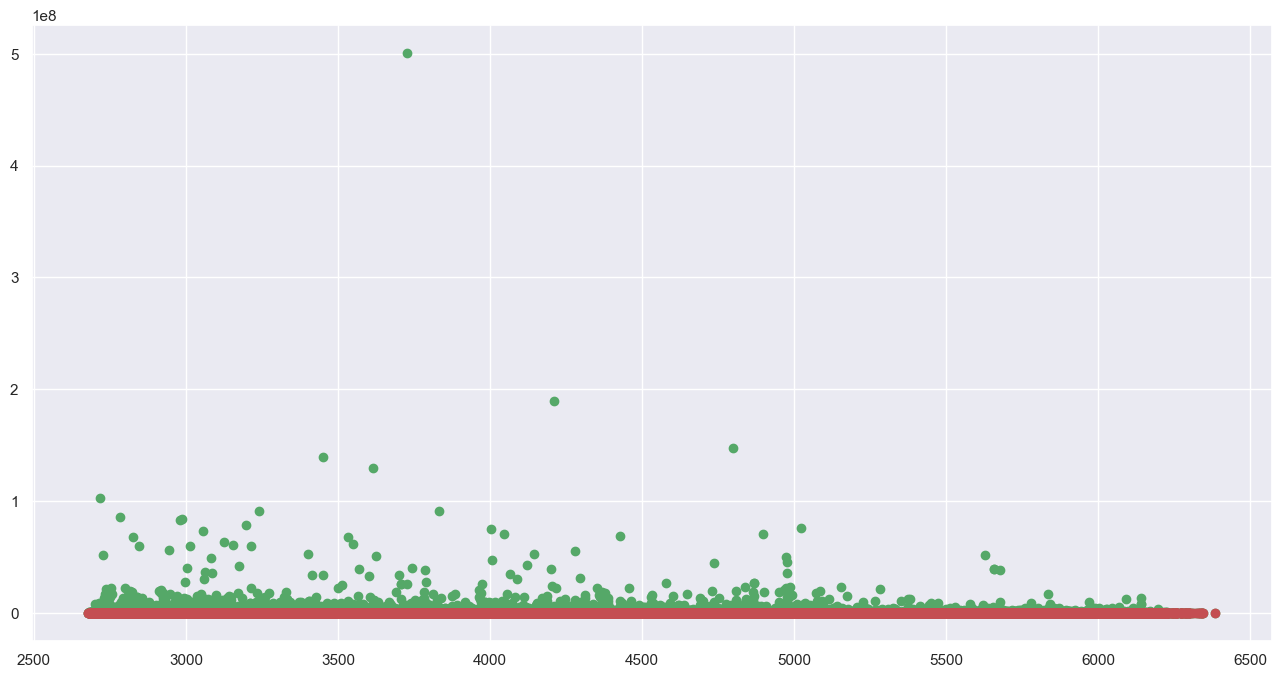

In [9]:
#PLot the linear regression (LR) line using the obtained LR equation
f = plt.figure(figsize=(16,8))
plt.scatter(trainXDD, trainYVC, color ='g')
plt.scatter(trainXDD, trainYVC_predicted, color = 'r')
plt.show()

### Checking the trained Model
---
1. Check the goodness of fit of trained model
2. Check the Prediction Accuracy of the model on the Test Set
3. Print the metrics for Goodness of Fit and Prediction Accuracy appropriate in this scenario

### Checking the goodness of fit of the trained model
--- 
How we check the goodness of fit?
- Explained Variance (R^2)
   - The higher the R^2 value, the better the fit/model
   - 0 <= R^2 <= 1
- Mean Square Error (MSE)
   - The lower the MSE value, the better the fit/model.  

In [10]:
#Calculating the Mean Squared Error (MSE)
def MSE(actual, predicted):
    return np.mean(np.square(np.array(actual)-np.array(predicted)))
#Calculating the Explained Variance
print("Explained Variance (R^2) of model \t:", linRegModel.score(trainXDD, trainYVC))

mse = MSE(trainYVC, trainYVC_predicted)
print("Mean Squared Error (MSE) of model\t:", mse)
print("Root Mean Squared Error (RMSE) of model\t:", np.sqrt(mse))

Explained Variance (R^2) of model 	: 0.00010264925641301215
Mean Squared Error (MSE) of model	: 1386000784656.2908
Root Mean Squared Error (RMSE) of model	: 1177285.345469097


---
### Checking the Prediction Accuracy on the Test Set

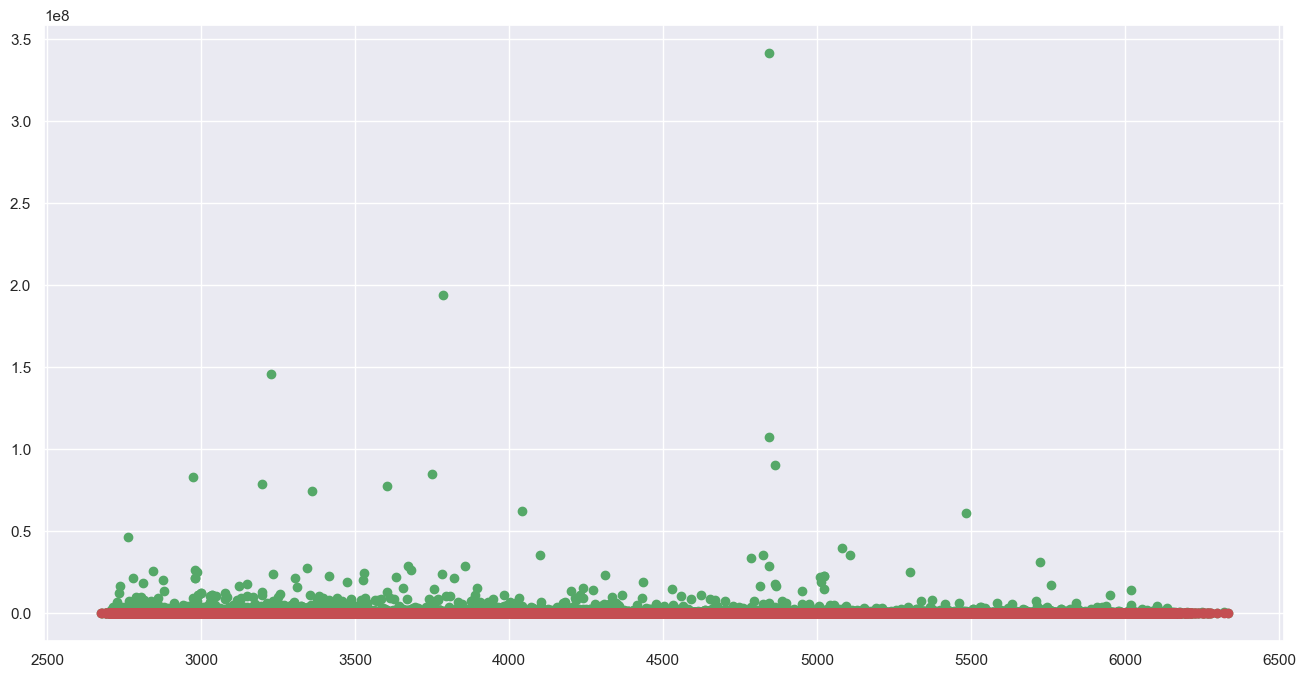

In [11]:
#Predict videoViewCount (testYVC_predicted) values according to dateDifference test (testXDD)
testYVC_predicted = linRegModel.predict(testXDD)

#Plot the Predictions
f = plt.figure(figsize=(16,8))
plt.scatter(testXDD, testYVC, color='g')
plt.scatter(testXDD, testYVC_predicted, color='r')
plt.show()

In [12]:
#Calculating the Explained Variance (R^2)
print("Explained Variance (R^2) of test set\t\t:", linRegModel.score(testXDD, testYVC))
mse= MSE(testYVC, testYVC_predicted)

print("Mean Squared Error (MSE) of test set\t\t:", mse)
print("Root Mean Squared Error (RMSE) of test set\t:", np.sqrt(mse))

Explained Variance (R^2) of test set		: 1.9432326988422233e-05
Mean Squared Error (MSE) of test set		: 1938431338439.0686
Root Mean Squared Error (RMSE) of test set	: 1392275.5971570674


In [13]:
#Calculating the Explained Variance
print("Explained Variance (R^2) of model \t\t:", linRegModel.score(trainXDD, trainYVC))

mse = MSE(trainYVC, trainYVC_predicted)
print("Mean Squared Error (MSE) of model\t\t:", mse)
print("Root Mean Squared Error (RMSE) of model\t\t:", np.sqrt(mse))

mse= MSE(testYVC, testYVC_predicted)
print()
print("Explained Variance (R^2) of test set\t\t:", linRegModel.score(testXDD, testYVC))
print("Mean Squared Error (MSE) of test set\t\t:", mse)
print("Root Mean Squared Error (RMSE) of test set\t:", np.sqrt(mse))

Explained Variance (R^2) of model 		: 0.00010264925641301215
Mean Squared Error (MSE) of model		: 1386000784656.2908
Root Mean Squared Error (RMSE) of model		: 1177285.345469097

Explained Variance (R^2) of test set		: 1.9432326988422233e-05
Mean Squared Error (MSE) of test set		: 1938431338439.0686
Root Mean Squared Error (RMSE) of test set	: 1392275.5971570674


### Regression between dateDifference (Predictor Variable) and channelViewCount (Response Variable)

Predictor Variable: dateDifference
- dateDifference is the numeric variable that measures the data difference between published date of video and date as of 30rd March 2023

Response Variable: channelViewCount
- channelViewCount is the numeric variable that measures the number of viewers for each unique channel in the dataset

#### Part (a) Uni-Variate Linear Regression Model
---
Build a Linear Regression Model to predict:
- channelViewCount (Response) using dateDifference (Predictor) 

> Regression Model: channelViewCount = a*dateDifference + b

Extract the variables with the associated data in respective dataframe

In [14]:
#Response 
channelViewCount= pd.DataFrame(youtubeData['channelViewCount'])
#Predictor
dateDifference= pd.DataFrame(youtubeData['dateDifference'])

### Regression via Random Train-Test Split
---
Draw out sub-datasets from main dataset randomly for training model and test model

Thereafter, perform linear regression on the two models

In [15]:
trainXDD, testXDD, trainYCVC, testYCVC = train_test_split(dateDifference, channelViewCount, test_size=0.25, random_state =42)

In [16]:
#Performing Linear Regression on the train dataset between (response) channelViewCount and (predictor) dateDifference
reg = LinearRegression() #Creating linear regression object
reg.fit(trainXDD, trainYCVC)

LinearRegression()

#### Obtaining Parameters of the Linear Regression Line
---
- LR equation line: channelViewCount = a* dateDifference + b
    - a: co-efficient
    - b: y-intercept


In [17]:
print('Intercept of Regression Line \t: b= ', reg.intercept_)
print('Coefficients of Regression Line : a= ', reg.coef_)

Intercept of Regression Line 	: b=  [1.64873629e+08]
Coefficients of Regression Line : a=  [[-28782.42695874]]


### Regression Line Equation
---
channelViewCount = -28758.05 *dateDifference + 1.649e+08

In [18]:
#Through prediction of videoViewCount via dateDifference using the trained model
trainYCVC_predicted = reg.predict(trainXDD)

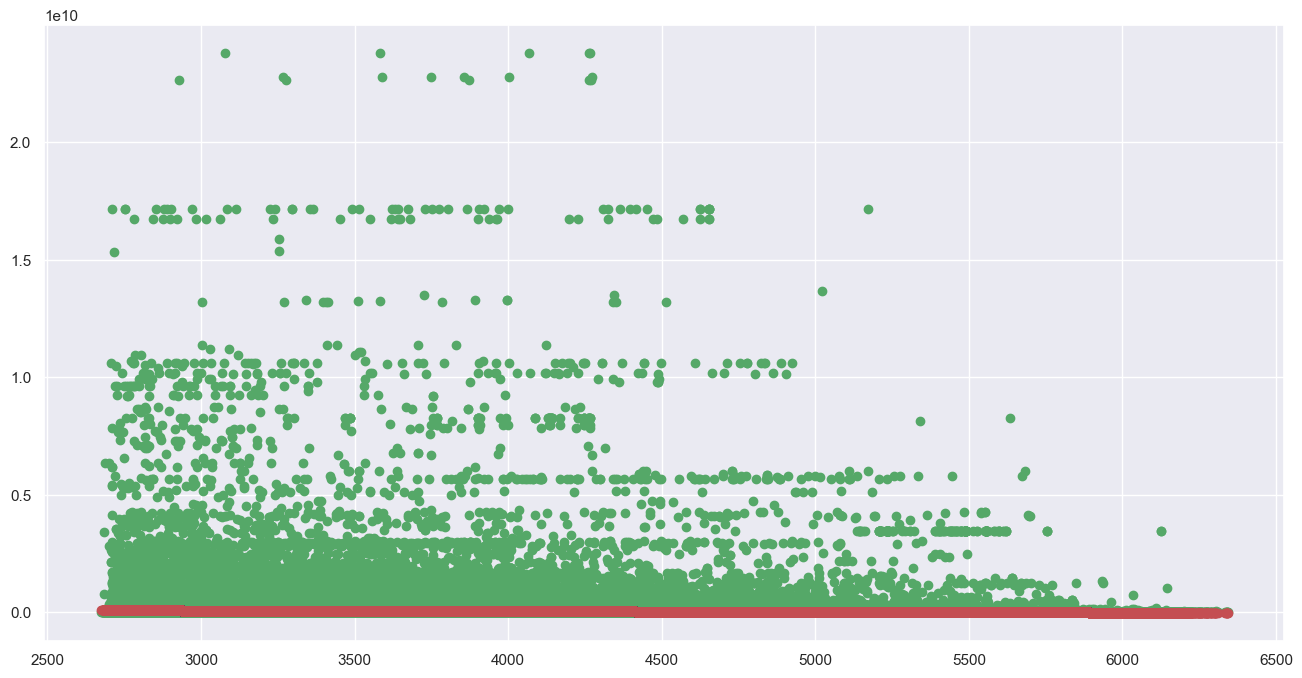

In [19]:
#PLot the linear regression (LR) line using the obtained LR equation
f = plt.figure(figsize=(16,8))
plt.scatter(trainXDD, trainYCVC, color ='g')
plt.scatter(trainXDD, trainYCVC_predicted, color = 'r')
plt.show()

### Checking the trained Model
---
1. Check the goodness of fit of trained model
2. Check the Prediction Accuracy of the model on the Test Set
3. Print the metrics for Goodness of Fit and Prediction Accuracy appropriate in this scenario

### Checking the goodness of fit of the trained model
--- 
How we check the goodness of fit?
- Explained Variance (R^2)
   - The higher the R^2 value, the better the fit/model
   - 0 <= R^2 <= 1
- Mean Square Error (MSE)
   - The lower the MSE value, the better the fit/model.  

In [20]:
#Calculating the Explained Variance
print("Explained Variance (R^2) of model \t:", reg.score(trainXDD, trainYCVC))

mse = MSE(trainYCVC, trainYCVC_predicted)
print("Mean Squared Error (MSE) of model\t:", mse)
print("Root Mean Squared Error (RMSE) of model\t:", np.sqrt(mse))

Explained Variance (R^2) of model 	: 0.0026407392357435944
Mean Squared Error (MSE) of model	: 2.1161028468199376e+17
Root Mean Squared Error (RMSE) of model	: 460011178.86633337


---
### Checking the Prediction Accuracy on the Test Set

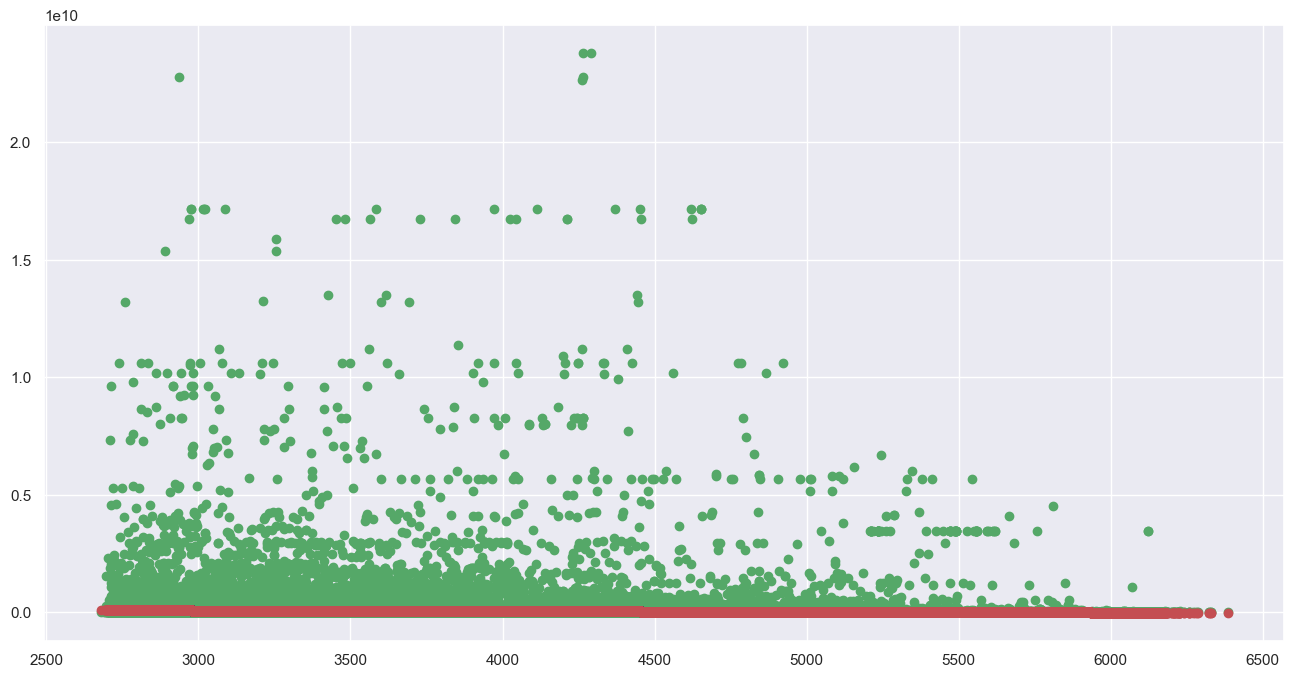

In [21]:
#Predict videoViewCount (testYVC_predicted) values according to dateDifference test (testXDD)
testYCVC_predicted = reg.predict(testXDD)

#Plot the Predictions
f = plt.figure(figsize=(16,8))
plt.scatter(testXDD, testYCVC, color='g')
plt.scatter(testXDD, testYCVC_predicted, color='r')
plt.show()

In [22]:
#Calculating the Explained Variance
print("Explained Variance (R^2) of test \t:", reg.score(testXDD, testYCVC))

mse = MSE(testYCVC, testYCVC_predicted)
print("Mean Squared Error (MSE) of test\t:", mse)
print("Root Mean Squared Error (RMSE) of test\t:", np.sqrt(mse))

Explained Variance (R^2) of test 	: 0.0021692447455570196
Mean Squared Error (MSE) of test	: 2.261252504236057e+17
Root Mean Squared Error (RMSE) of test	: 475526287.8365461


In [23]:
#Calculating the Explained Variance
print("Explained Variance (R^2) of model \t:", reg.score(trainXDD, trainYCVC))

mse = MSE(trainYCVC, trainYCVC_predicted)
print("Mean Squared Error (MSE) of model\t:", mse)
print("Root Mean Squared Error (RMSE) of model\t:", np.sqrt(mse))

print()
#Calculating the Explained Variance
print("Explained Variance (R^2) of test \t:", reg.score(testXDD, testYCVC))

mse = MSE(testYCVC, testYCVC_predicted)
print("Mean Squared Error (MSE) of test\t:", mse)
print("Root Mean Squared Error (RMSE) of test\t:", np.sqrt(mse))

Explained Variance (R^2) of model 	: 0.0026407392357435944
Mean Squared Error (MSE) of model	: 2.1161028468199376e+17
Root Mean Squared Error (RMSE) of model	: 460011178.86633337

Explained Variance (R^2) of test 	: 0.0021692447455570196
Mean Squared Error (MSE) of test	: 2.261252504236057e+17
Root Mean Squared Error (RMSE) of test	: 475526287.8365461


### Lasso Regression Implementation to improve accuracy of models

In [24]:
LassoReg = linear_model.Lasso(alpha =77, max_iter=100, tol=0.1)
LassoReg.fit(trainXDD, trainYCVC)
LassoReg.fit(testXDD, testYCVC)

Lasso(alpha=77, max_iter=100, tol=0.1)

In [25]:
print("Accuracy score of trained model using Lasso Regression\t: ",LassoReg.score(trainXDD, trainYCVC))
print("Accuracy score of test model using Lasso Regression\t: ",LassoReg.score(testXDD, testYCVC))

Accuracy score of trained model using Lasso Regression	:  0.0026129803698605736
Accuracy score of test model using Lasso Regression	:  0.0021952601271643113


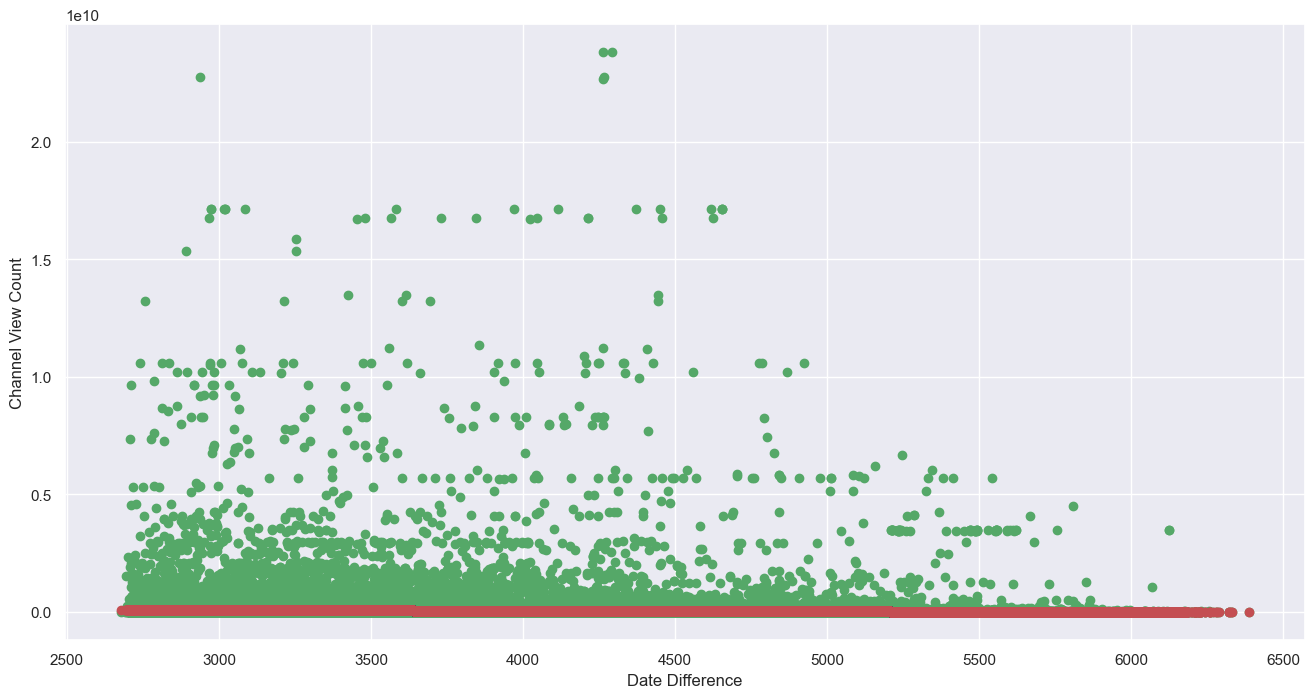

In [26]:
#Predict videoViewCount (testYVC_predicted) values according to dateDifference test (testXDD)
testYCVC_predicted = LassoReg.predict(testXDD)

#Plot the Predictions
f = plt.figure(figsize=(16,8))
plt.scatter(testXDD, testYCVC, color='g')
plt.scatter(testXDD, testYCVC_predicted, color='r')
plt.xlabel("Date Difference")
plt.ylabel("Channel View Count")
plt.show()

## Multi-Variate Regression between channelViewCount and other variables 
Other variables:
1. subscriberCount
2. likes/views
3. dislikes/views
4. videoViewCount

### Filtering youtubeData dataframe to include variables we want to do regression with channelViewCount

In [27]:
Cols = ['channelViewCount','videoViewCount', 'subscriberCount','likes/views', 'likes/dislikes',  'videoCount', 'elapsedtime','channelelapsedtime']

In [28]:
UDF = youtubeData[Cols]
UDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571960 entries, 0 to 571959
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   channelViewCount    571960 non-null  int64  
 1   videoViewCount      571960 non-null  int64  
 2   subscriberCount     571960 non-null  int64  
 3   likes/views         571960 non-null  float64
 4   likes/dislikes      571960 non-null  float64
 5   videoCount          571960 non-null  int64  
 6   elapsedtime         571960 non-null  int64  
 7   channelelapsedtime  571960 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 34.9 MB


#### Part (a) Multi-Variate Regression Model
---
Build a Regression Model to predict:
- channelViewCount (Response) using subscriberCount, videoViewCount, likes/views and likes/dislikes (Predictors) 

Extract the variables with the associated data in respective dataframe

In [29]:
x = pd.DataFrame(UDF.drop('channelViewCount', axis=1))
y = pd.DataFrame(UDF['channelViewCount'])

### Regression via Random Train-Test Split
---
Draw out sub-datasets from main dataset randomly for training model and test model

Thereafter, perform linear regression on the two models

In [30]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.25, random_state =42)

In [31]:
#Performing Linear Regression on the train dataset between (response) channelViewCount and (predictor) dateDifference
reg = LinearRegression() #Creating linear regression object
reg.fit(trainX, trainY)

#Through prediction of channelViewCount via multi-variables using the trained model
trainY_predicted = reg.predict(trainX)
#Through prediction of channelViewCount via multi-variables using the test model
testY_predicted = reg.predict(testX)
print("Accuracy Score of Trained Model\t: ",reg.score(trainX, trainY))
print("Accuracy Score of Test Model\t: ",reg.score(testX, testY))

Accuracy Score of Trained Model	:  0.7801547853932231
Accuracy Score of Test Model	:  0.7747107829395794


In [32]:
#Calculating the Explained Variance
print("Explained Variance (R^2) of model \t:", reg.score(trainX, trainY))

mse = MSE(trainY, trainY_predicted)
print("Mean Squared Error (MSE) of model\t:", mse)
print("Root Mean Squared Error (RMSE) of model\t:", np.sqrt(mse))

print()
#Calculating the Explained Variance
print("Explained Variance (R^2) of test \t:", reg.score(testX, testY))

mse = MSE(testY, testY_predicted)
print("Mean Squared Error (MSE) of test\t:", mse)
print("Root Mean Squared Error (RMSE) of test\t:", np.sqrt(mse))

Explained Variance (R^2) of model 	: 0.7801547853932231
Mean Squared Error (MSE) of model	: 4.664468489846434e+16
Root Mean Squared Error (RMSE) of model	: 215973806.04708603

Explained Variance (R^2) of test 	: 0.7747107829395794
Mean Squared Error (MSE) of test	: 5.105432996253485e+16
Root Mean Squared Error (RMSE) of test	: 225952052.35300443


### Decide which variable is the best to predict channelViewCount
---
Tools to use:
1. Correlation Matrix
2. Heat Map representing the correlation between variable and channelViewCount 

Train Set : (428970, 1) (428970, 7)
Test Set  : (142990, 1) (142990, 7)
Correlation matrix:
                    channelViewCount  videoViewCount  subscriberCount  \
channelViewCount            1.000000        0.110021         0.875364   
videoViewCount              0.110021        1.000000         0.108575   
subscriberCount             0.875364        0.108575         1.000000   
likes/views                -0.001662       -0.002775         0.012802   
likes/dislikes              0.062043        0.047415         0.150248   
videoCount                  0.298883       -0.000160         0.235129   
elapsedtime                -0.050362       -0.008418        -0.074853   
channelelapsedtime          0.047108       -0.001931         0.038753   

                    likes/views  likes/dislikes  videoCount  elapsedtime  \
channelViewCount      -0.001662        0.062043    0.298883    -0.050362   
videoViewCount        -0.002775        0.047415   -0.000160    -0.008418   
subscriberCount       

<Axes: >

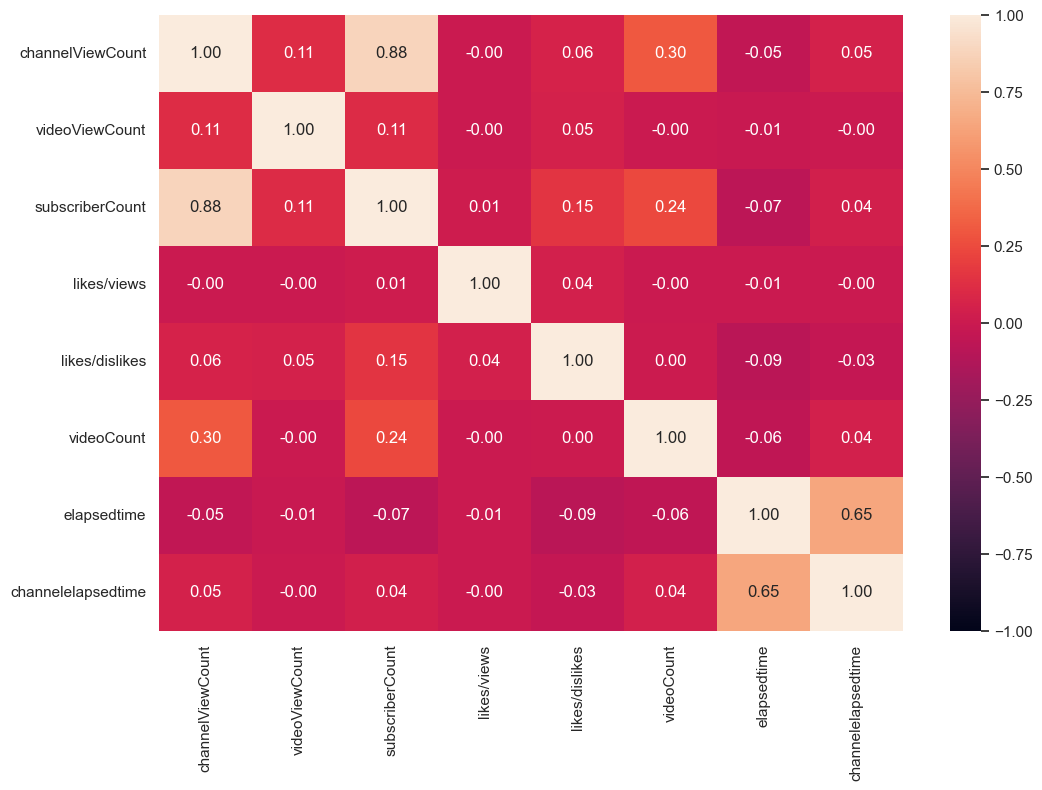

In [33]:
y = pd.DataFrame(youtubeData["channelViewCount"])
X = pd.DataFrame(youtubeData[['videoViewCount', 'subscriberCount','likes/views', 'likes/dislikes',  'videoCount', 'elapsedtime','channelelapsedtime']])
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)
print("Correlation matrix:")
print(trainDF.corr())
f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Results from the above heat map
---
From the heat map, we can tell that subscriberCount and channelViewCount has the highest correlation between each other.
Secondarily, videoCount and channelViewCount has a weak correlation. 

Hence, primarily we can conclude that subscriberCount affects channelViewCount and then videoCount can also affect channelViewCount. 

We would then analyse their regression accuracy via:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic Net Regression

### Functions definition for above mentioned regression methods

In [34]:
#Other Functions
def Average(lst):
    return sum(lst)/len(lst)

Genre=['Autos & Vehicles', 'Comedy', 'Education','Entertainment','Film & Animation','Gaming','Howto & Style','Movies','Music','News & Politics','People & Blogs','Pets & Animals','Science & Technology','Shows','Sports','Trailers','Travel & Events']

#### Linear Regression

In [35]:
def linearRegression(col, predictorStr, flag):

    youtubeData = pd.read_csv('Updated.csv')
    #if flag is 1, consider genre in the regression.
    #If flag is not 1, ignore genre in the regression
    if(flag==1): 
        youtubeData = youtubeData.loc[youtubeData['Title'] == col]
    # Recall the Total-HP Dataset
    channelViewCount = pd.DataFrame(youtubeData['channelViewCount'])   # Response
    #videoCount = pd.DataFrame(youtubeData['videoCount'])               # Predictor
    predictor = pd.DataFrame(youtubeData[predictorStr])               # Predictor

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, channelViewCount, test_size = 0.30)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print("Linear Regression")
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    trainr2.append(linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    trainmse.append(mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    testr2.append(linreg.score(X_test, y_test))
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    testmse.append(mean_squared_error(y_test, y_test_pred))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

#### Ridge Regression

In [36]:
def ridgeRegression(col, predictorStr, flag):

    youtubeData = pd.read_csv('Updated.csv')
    #if flag is 1, consider genre in the regression.
    #If flag is not 1, ignore genre in the regression
    if(flag==1): 
        youtubeData = youtubeData.loc[youtubeData['Title'] == col]
    # Recall the Total-HP Dataset
    channelViewCount = pd.DataFrame(youtubeData['channelViewCount'])   # Response
    #videoCount = pd.DataFrame(youtubeData['videoCount'])               # Predictor
    predictor = pd.DataFrame(youtubeData[predictorStr])               # Predictor

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, channelViewCount, test_size = 0.30)


    # Ridge Regression using Train Data
    rr = Ridge(alpha=0.01)
    rr.fit(X_train, y_train)      

    # Coefficients of the Ridge Regression line
    print("Ridge Regression")
    print('Intercept of Regression \t: b = ', rr.intercept_)
    print('Coefficients of Regression \t: a = ', rr.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = rr.predict(X_train)
    y_test_pred = rr.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", rr.score(X_train, y_train))
    trainr2.append(rr.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    trainmse.append(mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", rr.score(X_test, y_test))
    testr2.append(rr.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    testmse.append(mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

#### Lasso Regression

In [37]:
def lassoRegression(col, predictorStr, flag):

    youtubeData = pd.read_csv('Updated.csv')
    #if flag is 1, consider genre in the regression.
    #If flag is not 1, ignore genre in the regression
    if(flag==1): 
        youtubeData = youtubeData.loc[youtubeData['Title'] == col]
    # Recall the Total-HP Dataset
    channelViewCount = pd.DataFrame(youtubeData['channelViewCount'])   # Response
    #videoCount = pd.DataFrame(youtubeData['videoCount'])               # Predictor
    predictor = pd.DataFrame(youtubeData[predictorStr])               # Predictor

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, channelViewCount, test_size = 0.30)


    # Lasso Regression using Train Data
    model_lasso = Lasso(alpha=0.01)
    model_lasso.fit(X_train, y_train) 

    # Coefficients of the Lasso Regression line
    print("Lasso Regression")
    print('Intercept of Regression \t: b = ', model_lasso.intercept_)
    print('Coefficients of Regression \t: a = ', model_lasso.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = model_lasso.predict(X_train)
    y_test_pred = model_lasso.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model_lasso.score(X_train, y_train))
    trainr2.append(model_lasso.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    trainmse.append(mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model_lasso.score(X_test, y_test))
    testr2.append(model_lasso.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    testmse.append(mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

#### Elastic Net Regression

In [38]:
def elasticNetRegression(col, predictorStr, flag):

    youtubeData = pd.read_csv('Updated.csv')
    #if flag is 1, consider genre in the regression.
    #If flag is not 1, ignore genre in the regression
    if(flag==1): 
        youtubeData = youtubeData.loc[youtubeData['Title'] == col]
    # Recall the Total-HP Dataset
    channelViewCount = pd.DataFrame(youtubeData['channelViewCount'])   # Response
    #videoCount = pd.DataFrame(youtubeData['videoCount'])               # Predictor
    predictor = pd.DataFrame(youtubeData[predictorStr])               # Predictor

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, channelViewCount, test_size = 0.30)


    # Elastic Net Regression using Train Data
    model_enet = ElasticNet(alpha = 0.01)
    model_enet.fit(X_train, y_train) 

    # Coefficients of the Elastic Net Regression line
    print("Elastic Net Regression")
    print('Intercept of Regression \t: b = ', model_enet.intercept_)
    print('Coefficients of Regression \t: a = ', model_enet.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = model_enet.predict(X_train)
    y_test_pred = model_enet.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model_enet.score(X_train, y_train))
    trainr2.append(model_enet.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    trainmse.append(mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model_enet.score(X_test, y_test))
    testr2.append(model_enet.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    testmse.append(mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

### subscriberCount vs channelViewCount

#### Linear Regression

Linear Regression
Intercept of Regression 	: b =  [-6351460.39561889]
Coefficients of Regression 	: a =  [[675.6027982]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7673989685062921
Mean Squared Error (MSE) 	: 4.9814276703853224e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7559403996152092
Mean Squared Error (MSE) 	: 5.35868587027508e+16



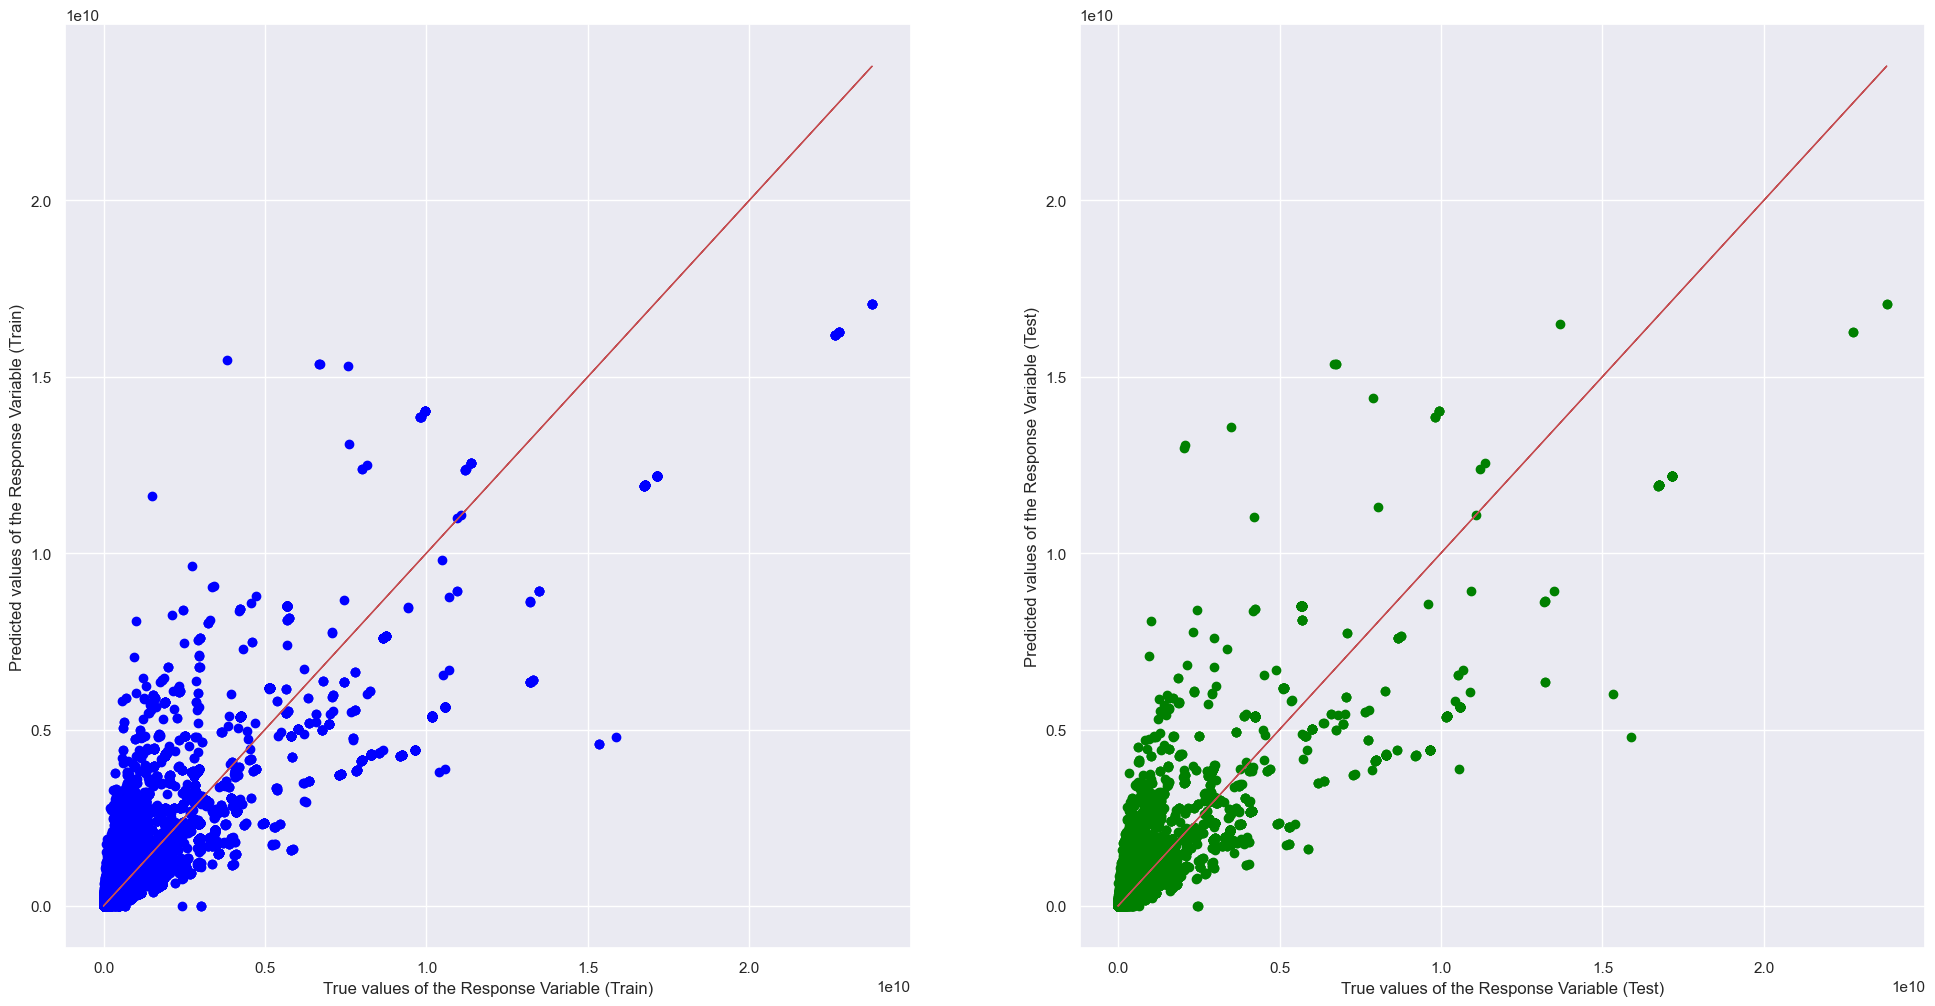

In [39]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=0

predictorStr ='subscriberCount'
linearRegression(flag,predictorStr, flag)

#### Ridge Regression

Ridge Regression
Intercept of Regression 	: b =  [-6455518.59402812]
Coefficients of Regression 	: a =  [[677.09675502]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7711474066868058
Mean Squared Error (MSE) 	: 5.074709432747046e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7452339983629694
Mean Squared Error (MSE) 	: 5.142942645822088e+16



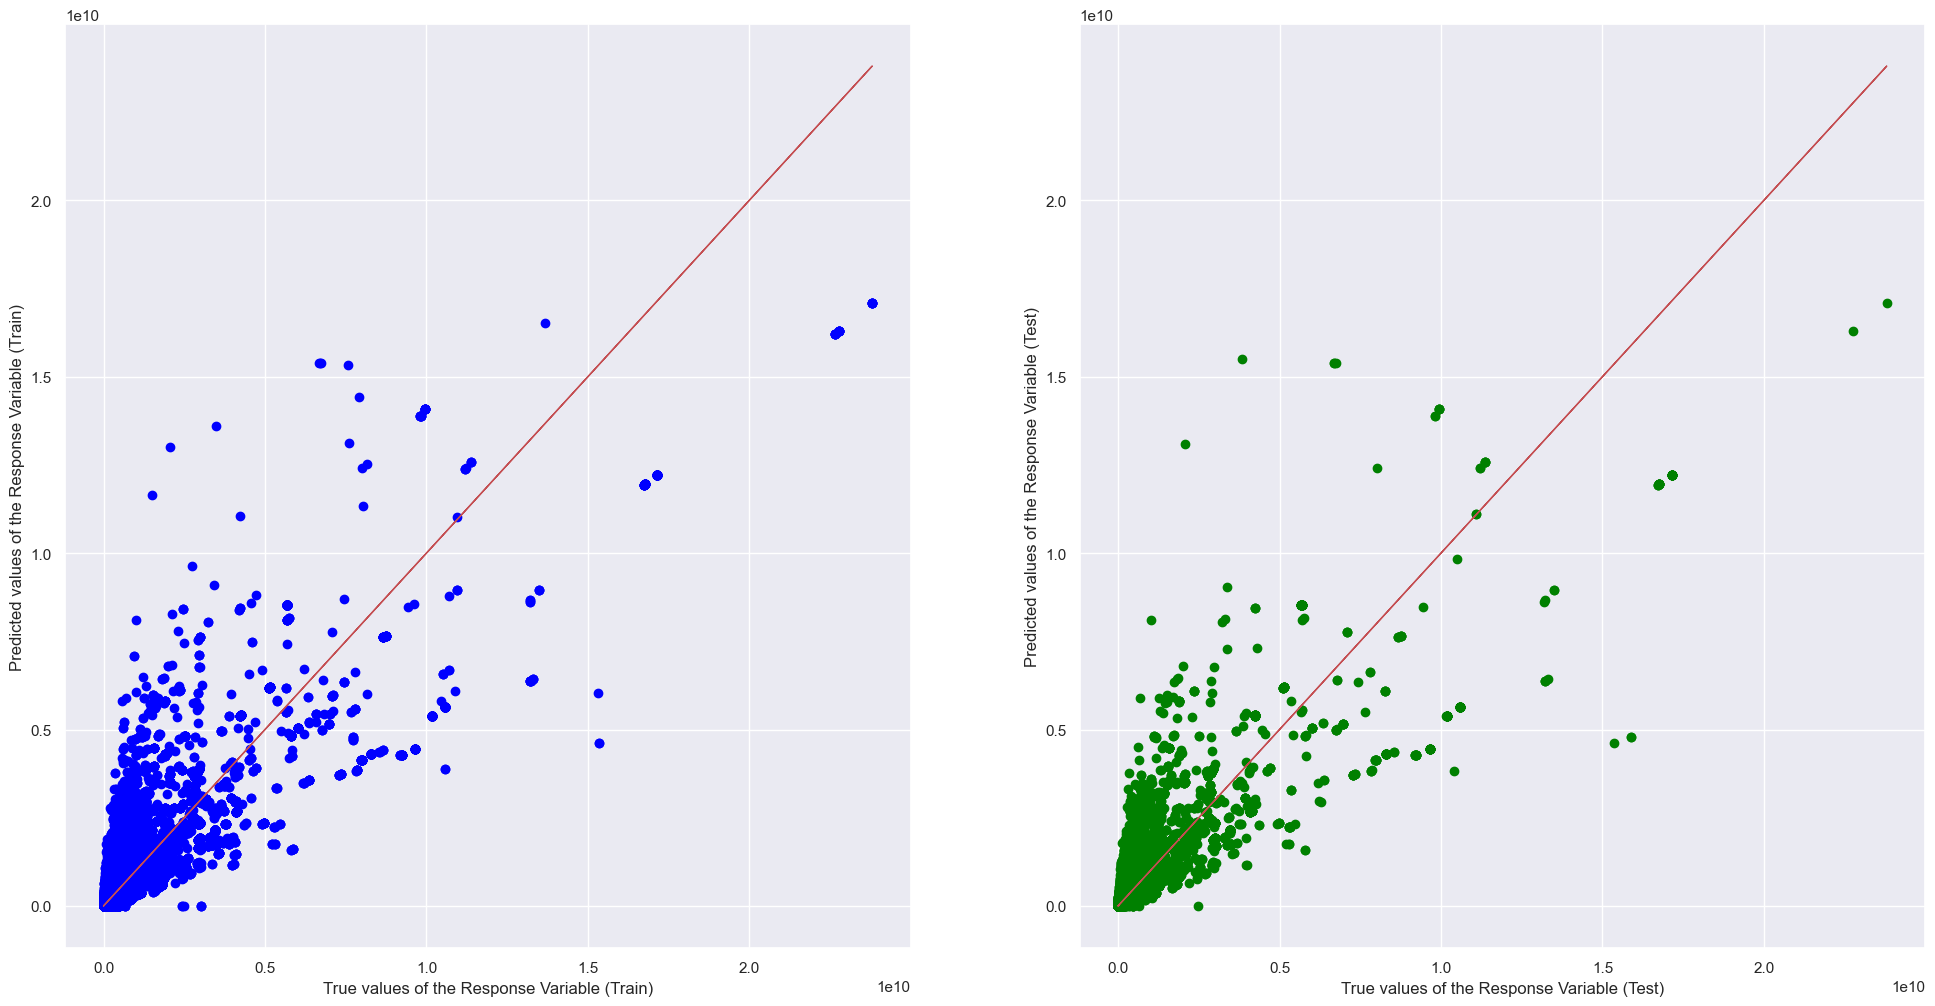

In [40]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=0

predictorStr ='subscriberCount'
ridgeRegression(flag,predictorStr, flag)

#### Lasso Regression

C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+21, tolerance: 8.350e+18
  model = cd_fast.enet_coordinate_descent(


Lasso Regression
Intercept of Regression 	: b =  [-5688347.15734397]
Coefficients of Regression 	: a =  [665.96831411]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7604957916634327
Mean Squared Error (MSE) 	: 4.995070359221477e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7709913691261528
Mean Squared Error (MSE) 	: 5.327594272876602e+16



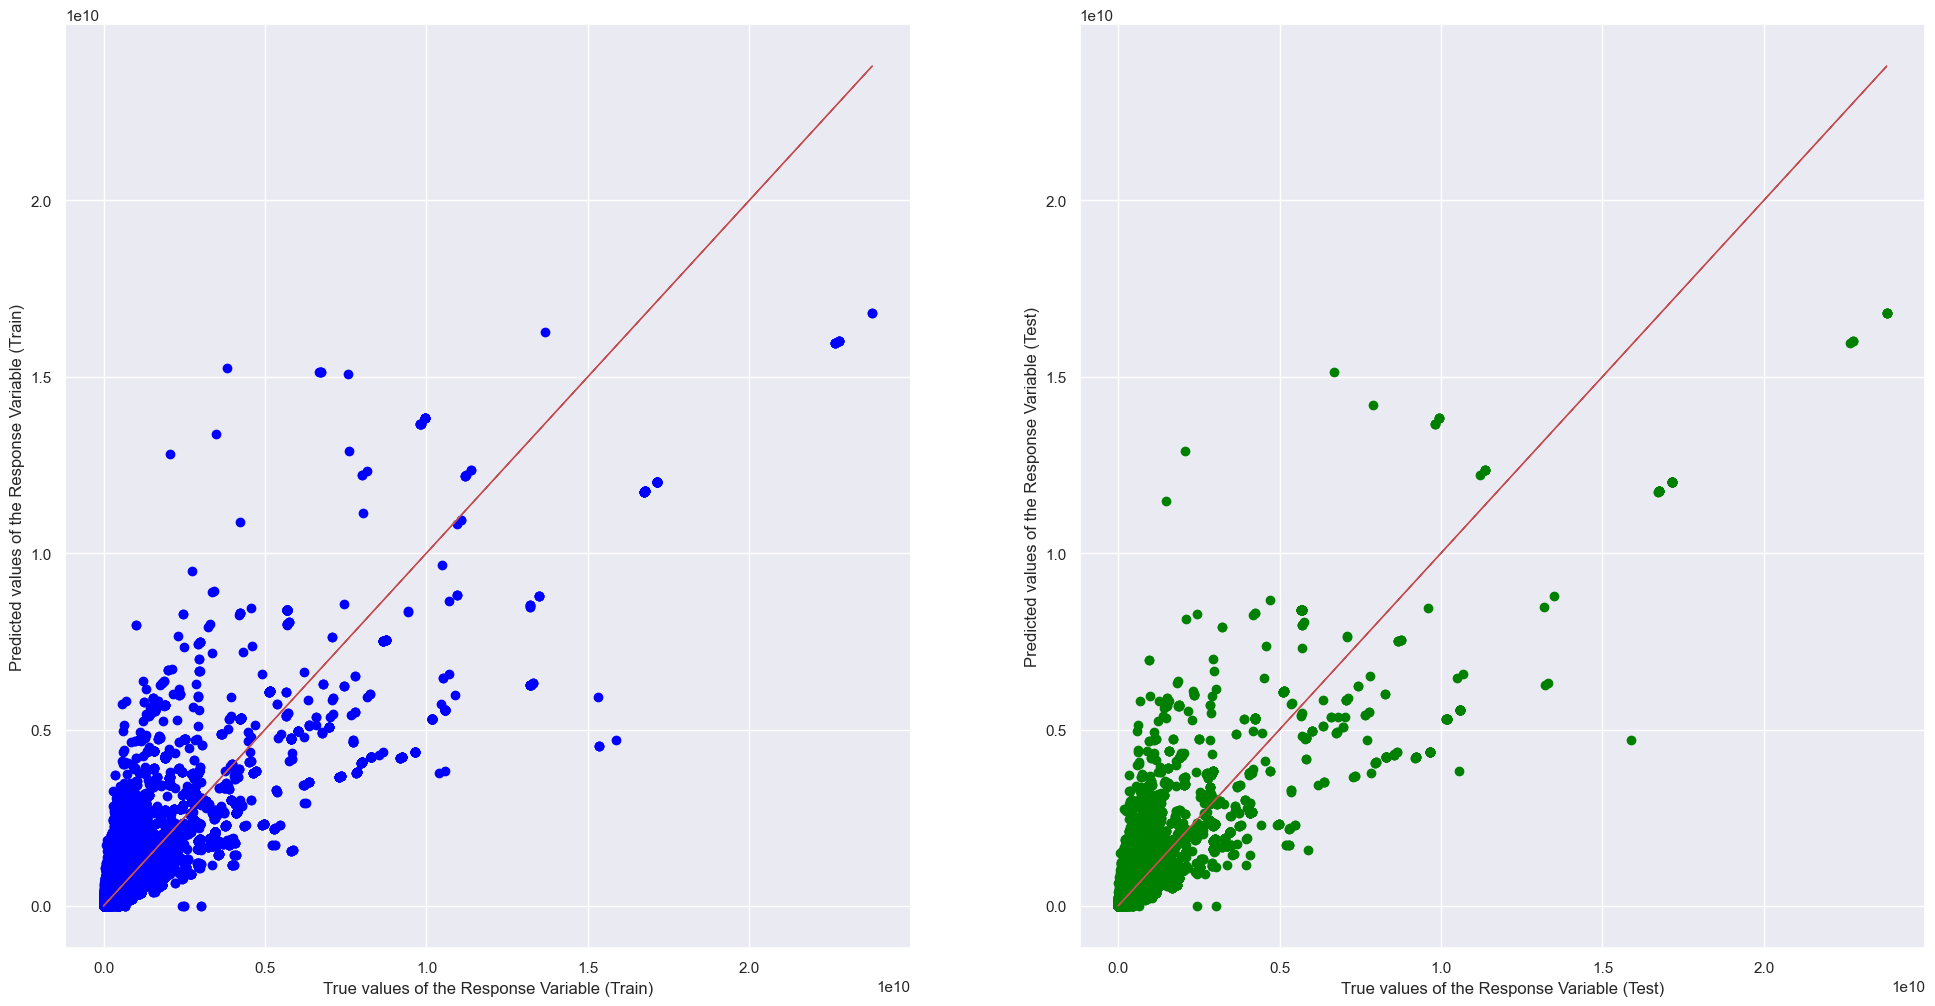

In [41]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=0

predictorStr ='subscriberCount'
lassoRegression(flag,predictorStr, flag)

#### Elastic Net Regression

C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.049e+21, tolerance: 8.660e+18
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression
Intercept of Regression 	: b =  [-6584745.71832883]
Coefficients of Regression 	: a =  [682.27773035]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7660464428341887
Mean Squared Error (MSE) 	: 5.060281446743258e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.758258564879665
Mean Squared Error (MSE) 	: 5.1875079007543784e+16



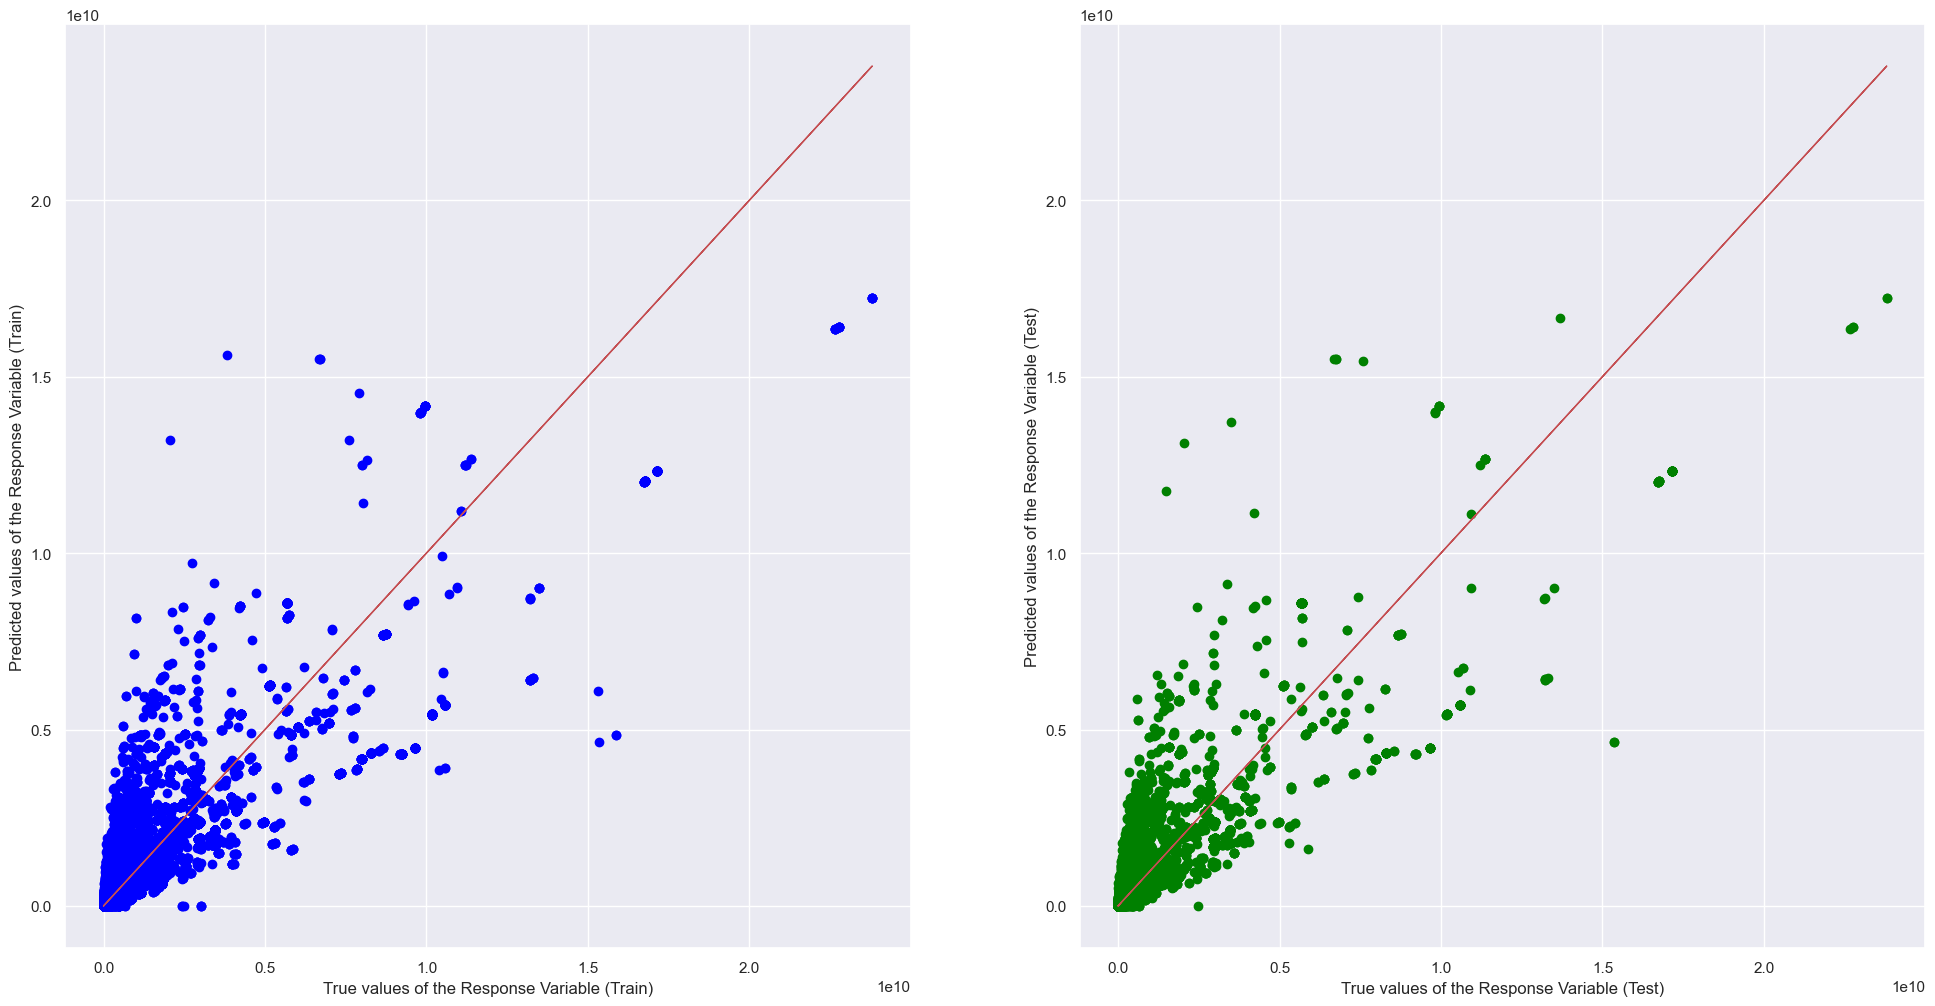

In [42]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=0

predictorStr ='subscriberCount'
elasticNetRegression(flag,predictorStr, flag)

### videoCount vs channelViewCount for each genre

#### Linear Regression

Autos & Vehicles
Linear Regression
Intercept of Regression 	: b =  [5502579.16322164]
Coefficients of Regression 	: a =  [[9680.01433959]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1846779835195469
Mean Squared Error (MSE) 	: 3634856830242271.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3372554398276425
Mean Squared Error (MSE) 	: 6506663169947387.0



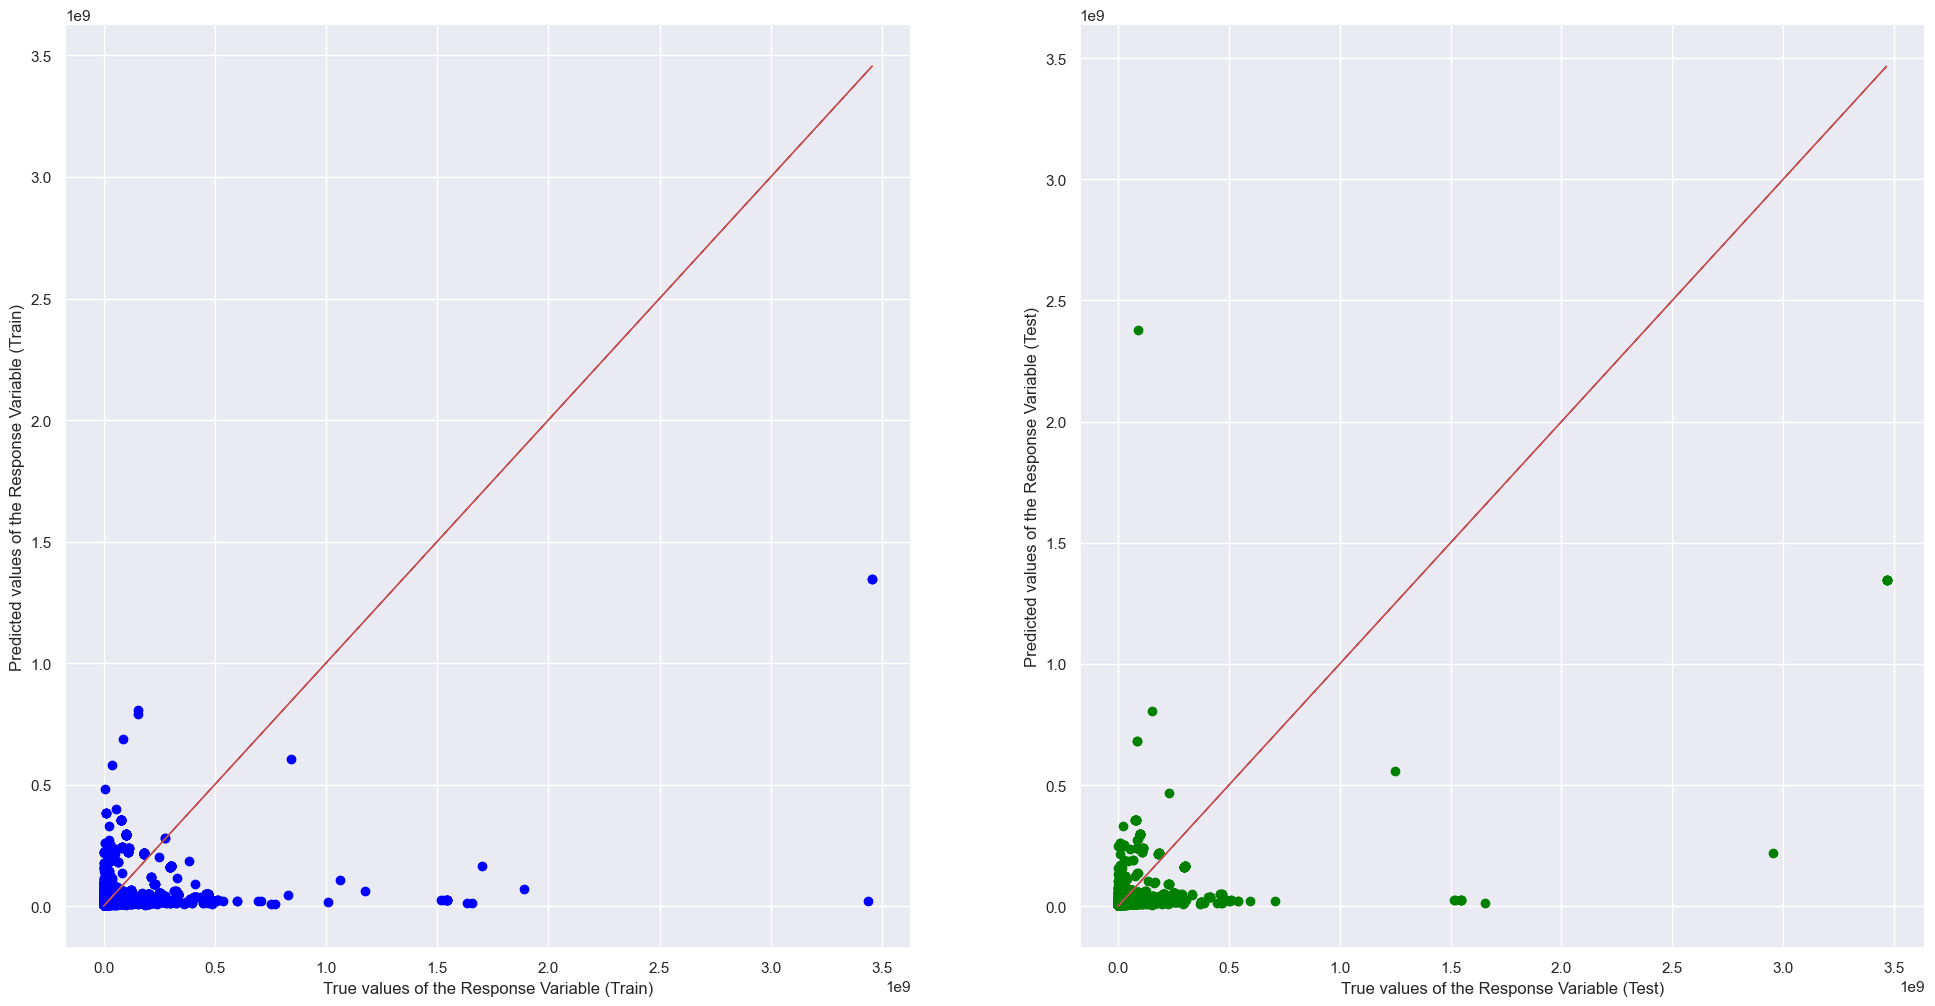

Comedy
Linear Regression
Intercept of Regression 	: b =  [12218019.83264766]
Coefficients of Regression 	: a =  [[77681.36532208]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11636404533816547
Mean Squared Error (MSE) 	: 9.303730498789648e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.003835333845285338
Mean Squared Error (MSE) 	: 1.2897921362547402e+17



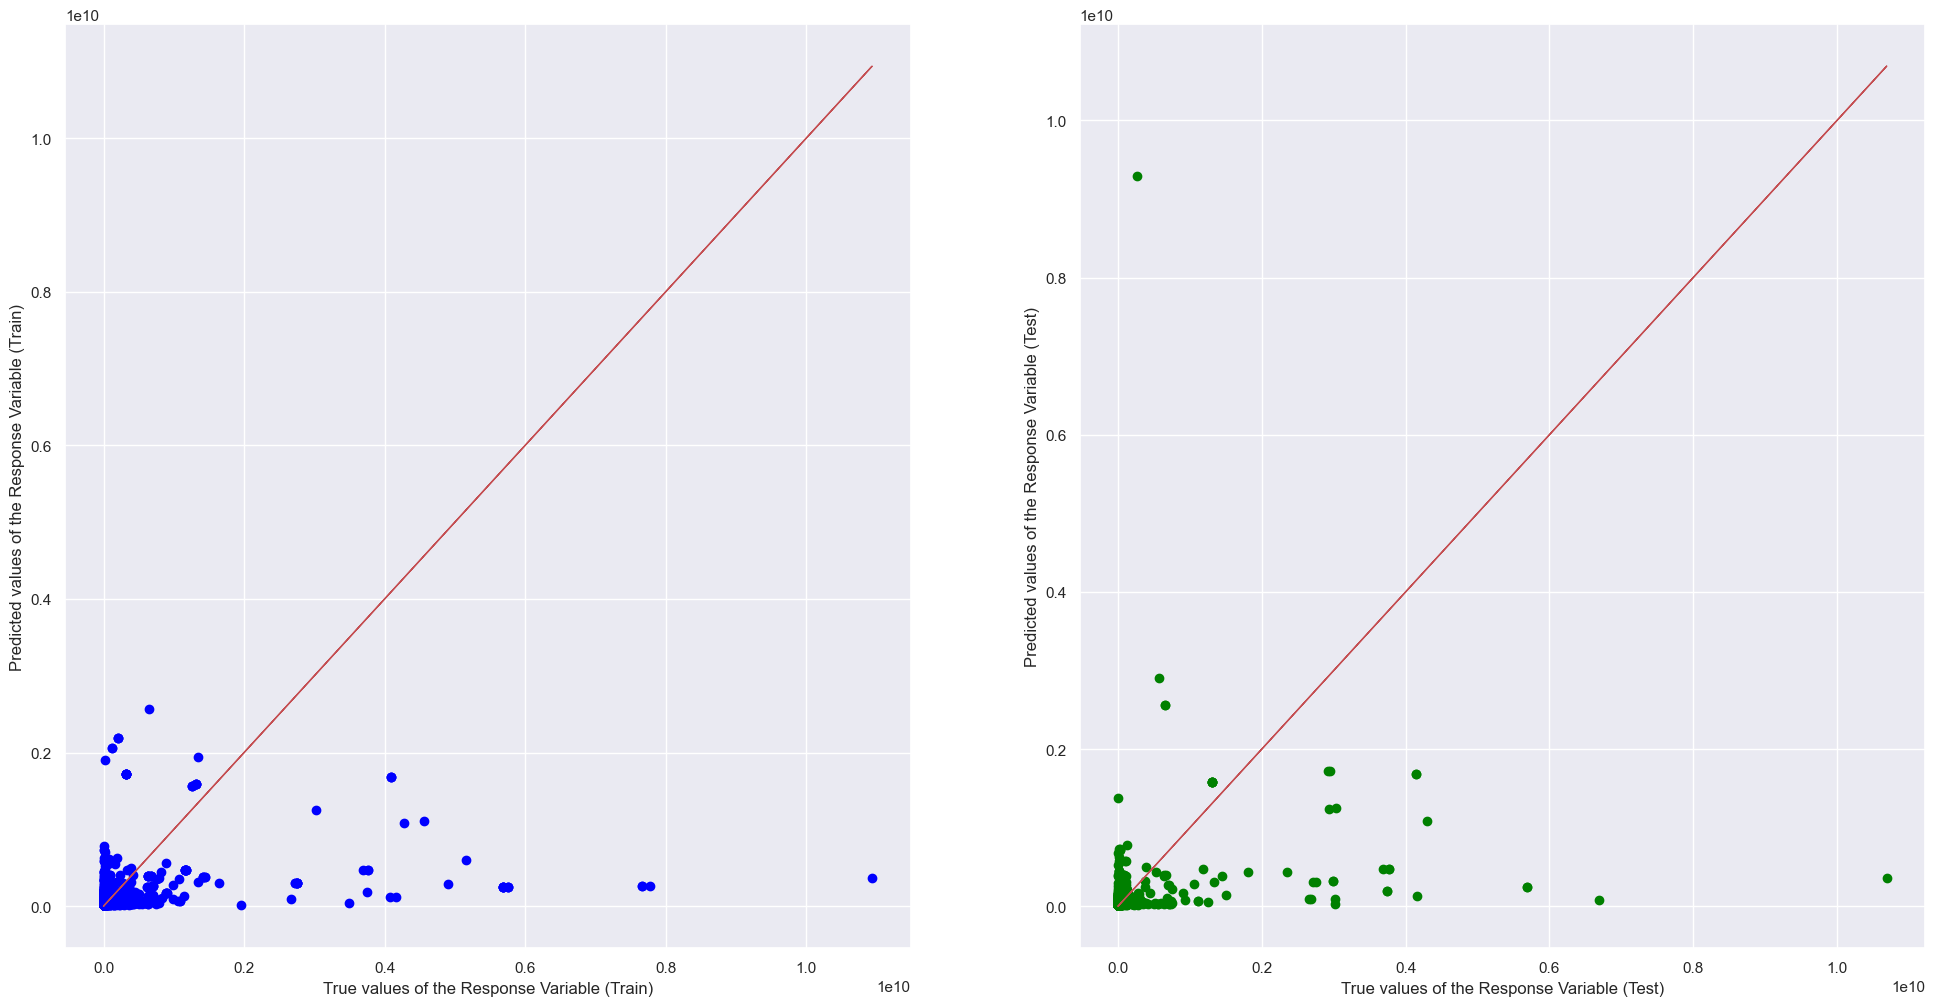

Education
Linear Regression
Intercept of Regression 	: b =  [14388453.82794372]
Coefficients of Regression 	: a =  [[5105.60304726]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01619699459270818
Mean Squared Error (MSE) 	: 2.23258224183275e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.007526919804498711
Mean Squared Error (MSE) 	: 4.0313518469523864e+16



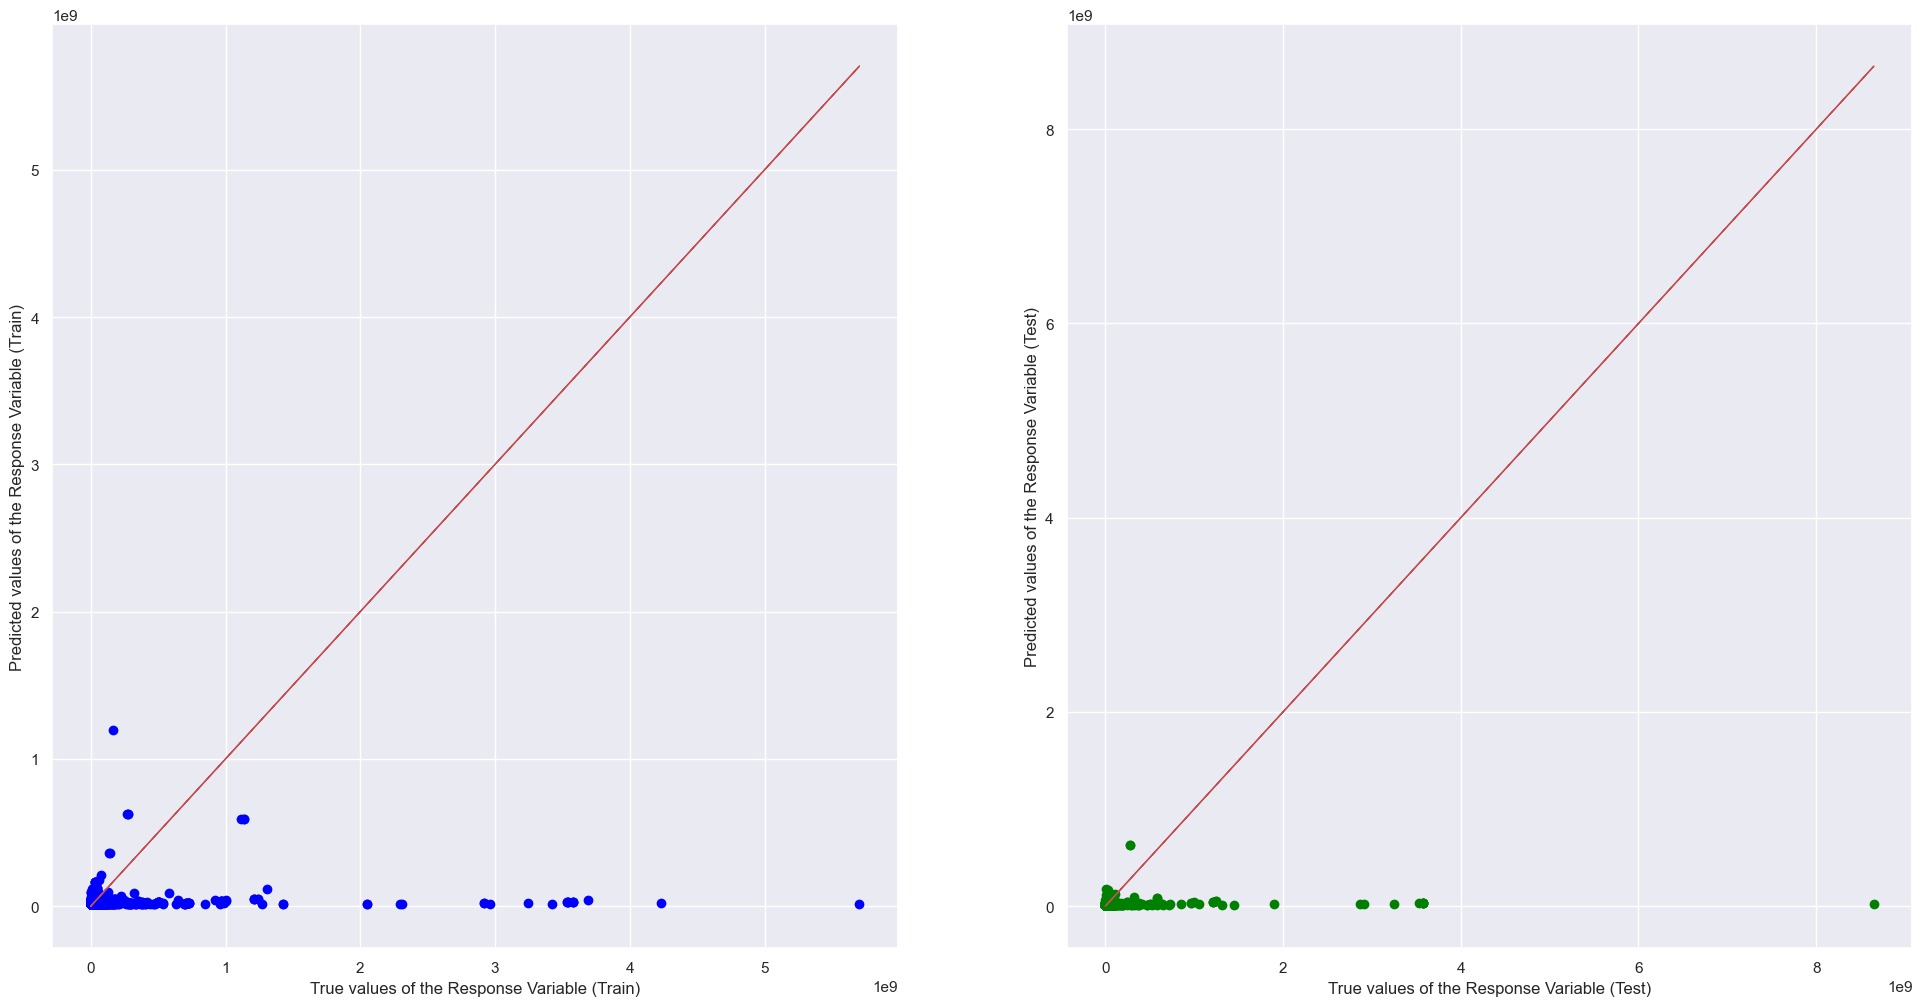

Entertainment
Linear Regression
Intercept of Regression 	: b =  [78407848.29240328]
Coefficients of Regression 	: a =  [[21069.82137978]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11322133883388164
Mean Squared Error (MSE) 	: 6.177998317538377e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11705070123752881
Mean Squared Error (MSE) 	: 6.916427732530486e+17



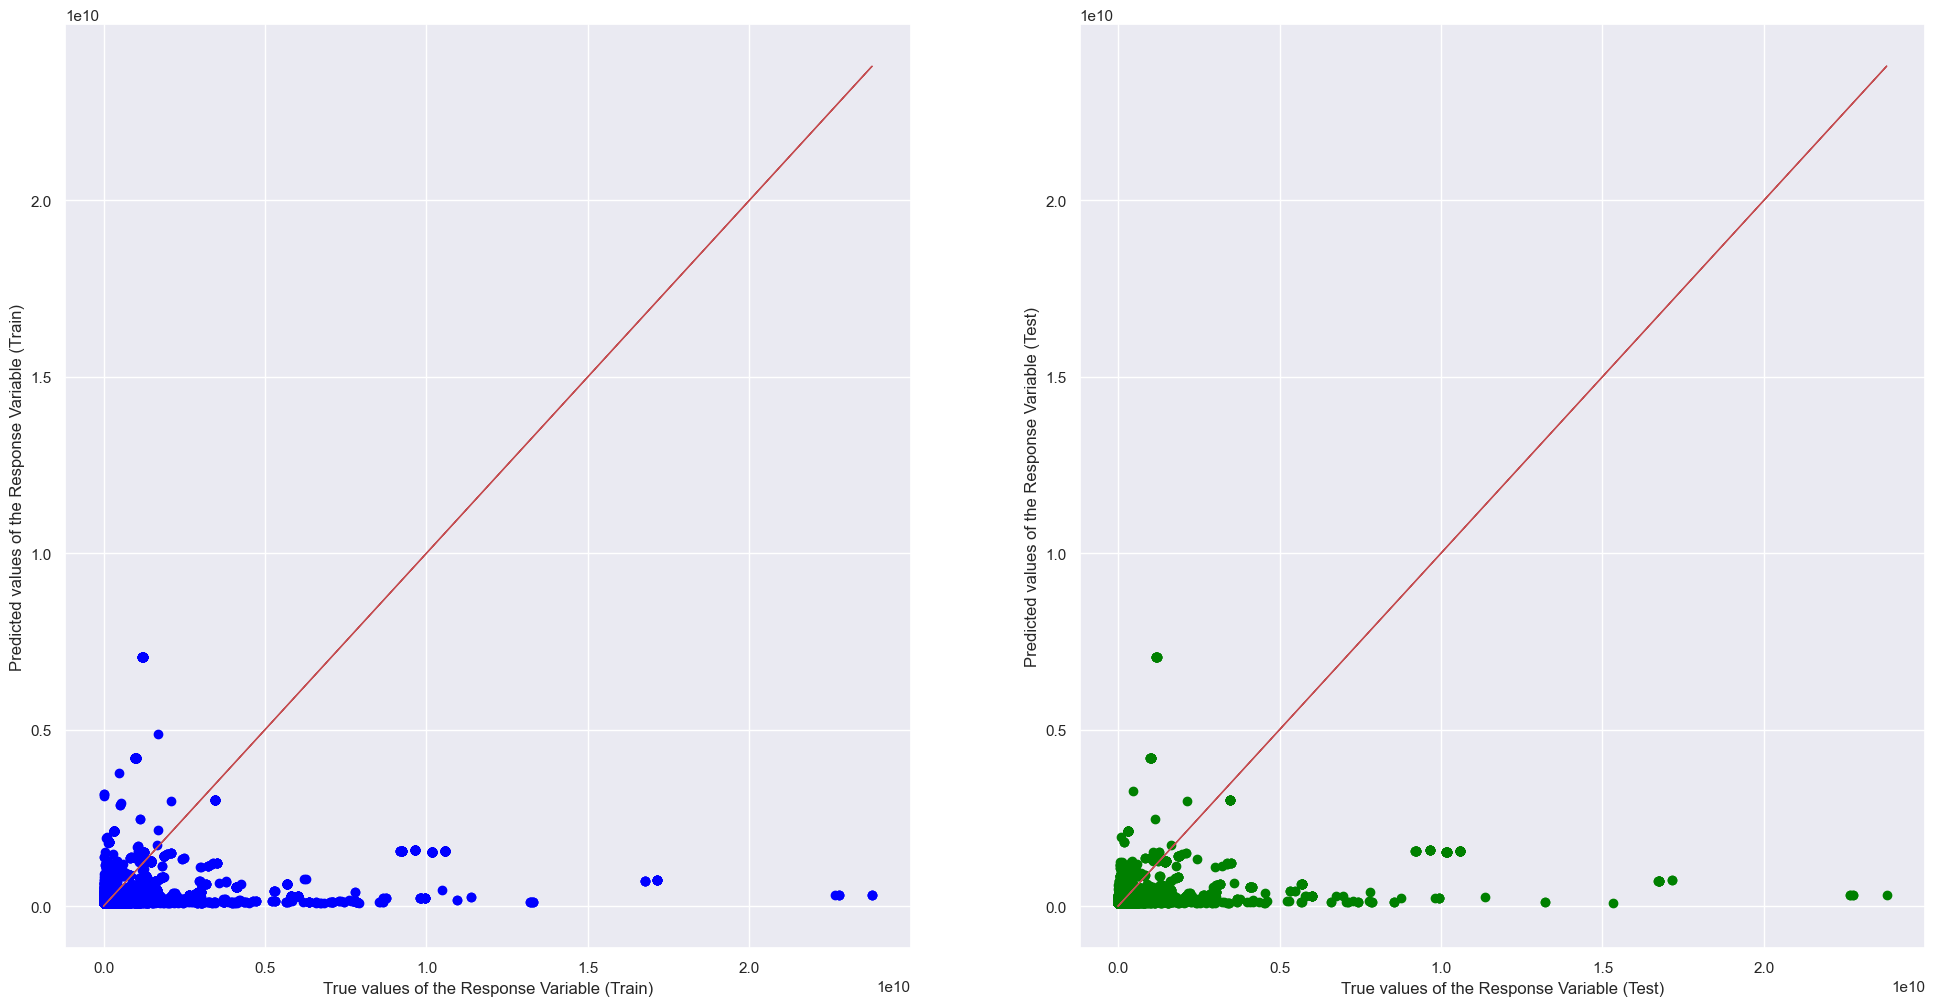

Film & Animation
Linear Regression
Intercept of Regression 	: b =  [-8485212.35095176]
Coefficients of Regression 	: a =  [[197542.19785968]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4935867534239641
Mean Squared Error (MSE) 	: 2.647240892310983e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.24745213833915103
Mean Squared Error (MSE) 	: 4.412901867248338e+17



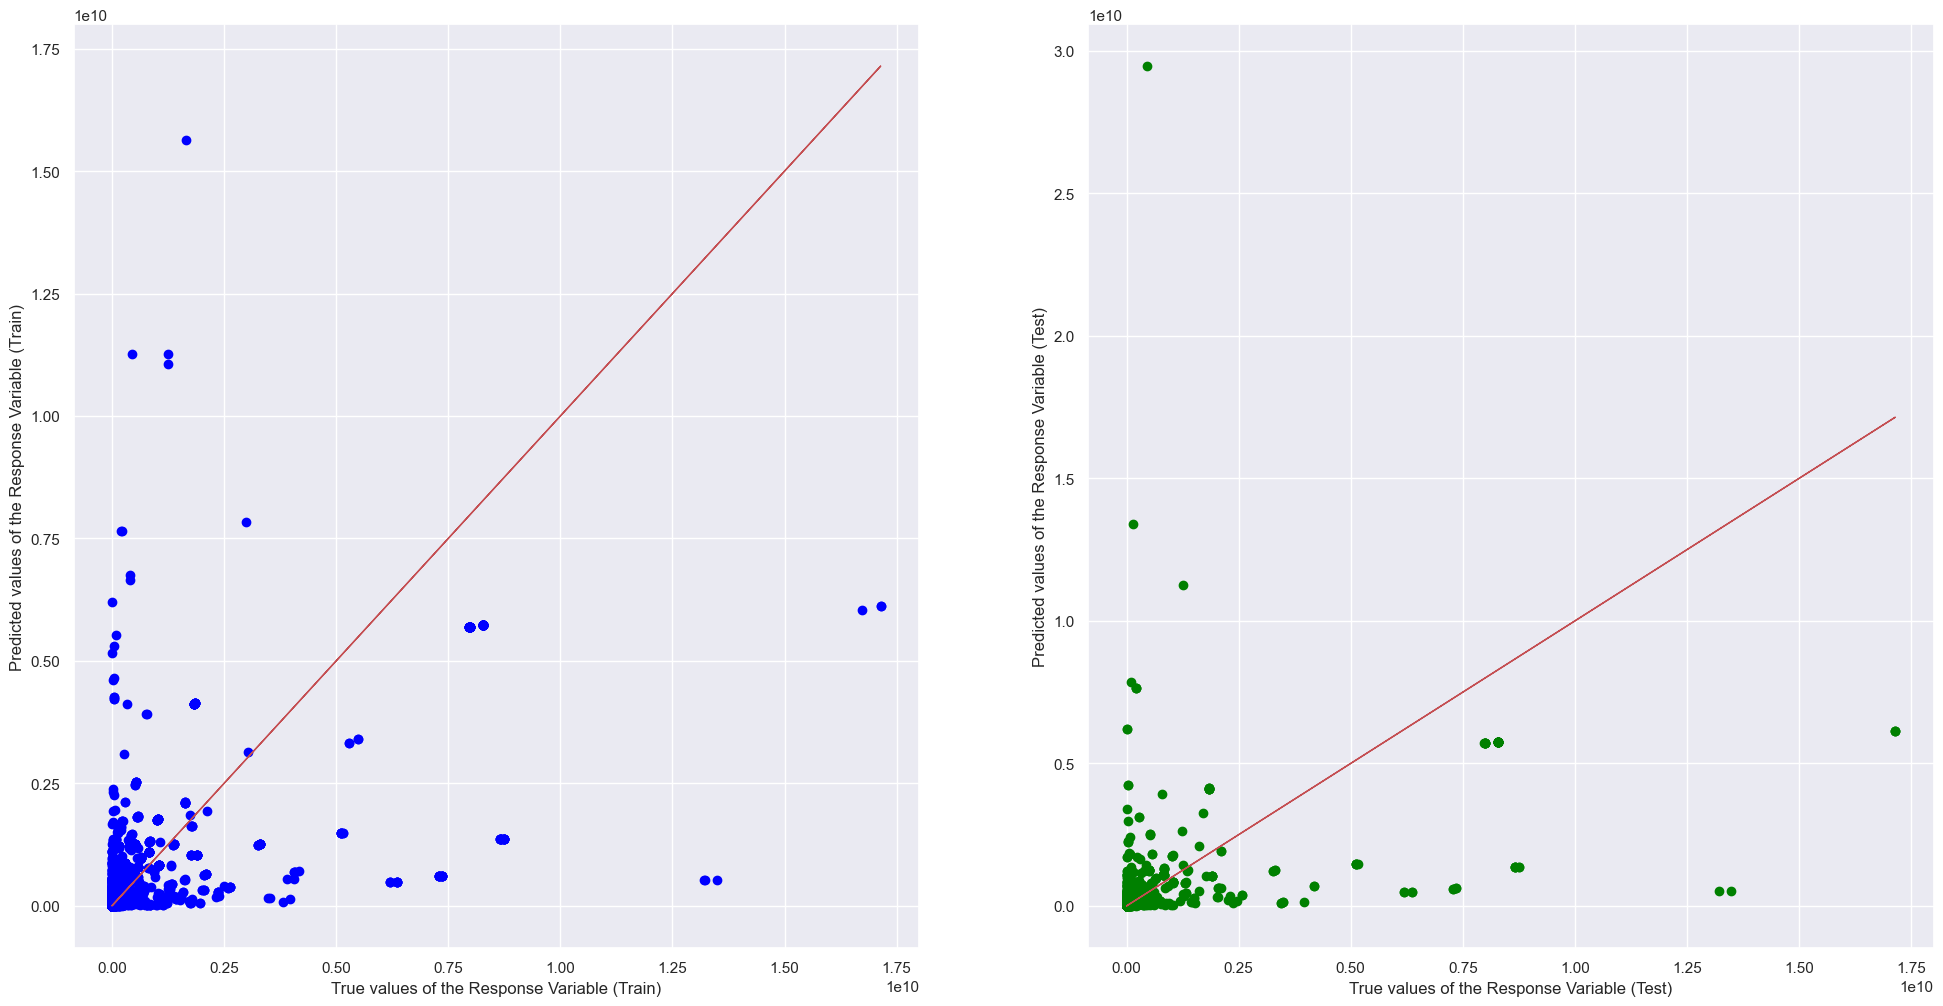

Gaming
Linear Regression
Intercept of Regression 	: b =  [28883394.44891076]
Coefficients of Regression 	: a =  [[17459.24883756]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0850297236192955
Mean Squared Error (MSE) 	: 5.69392654002965e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.10208215350324601
Mean Squared Error (MSE) 	: 5.504394256205644e+16



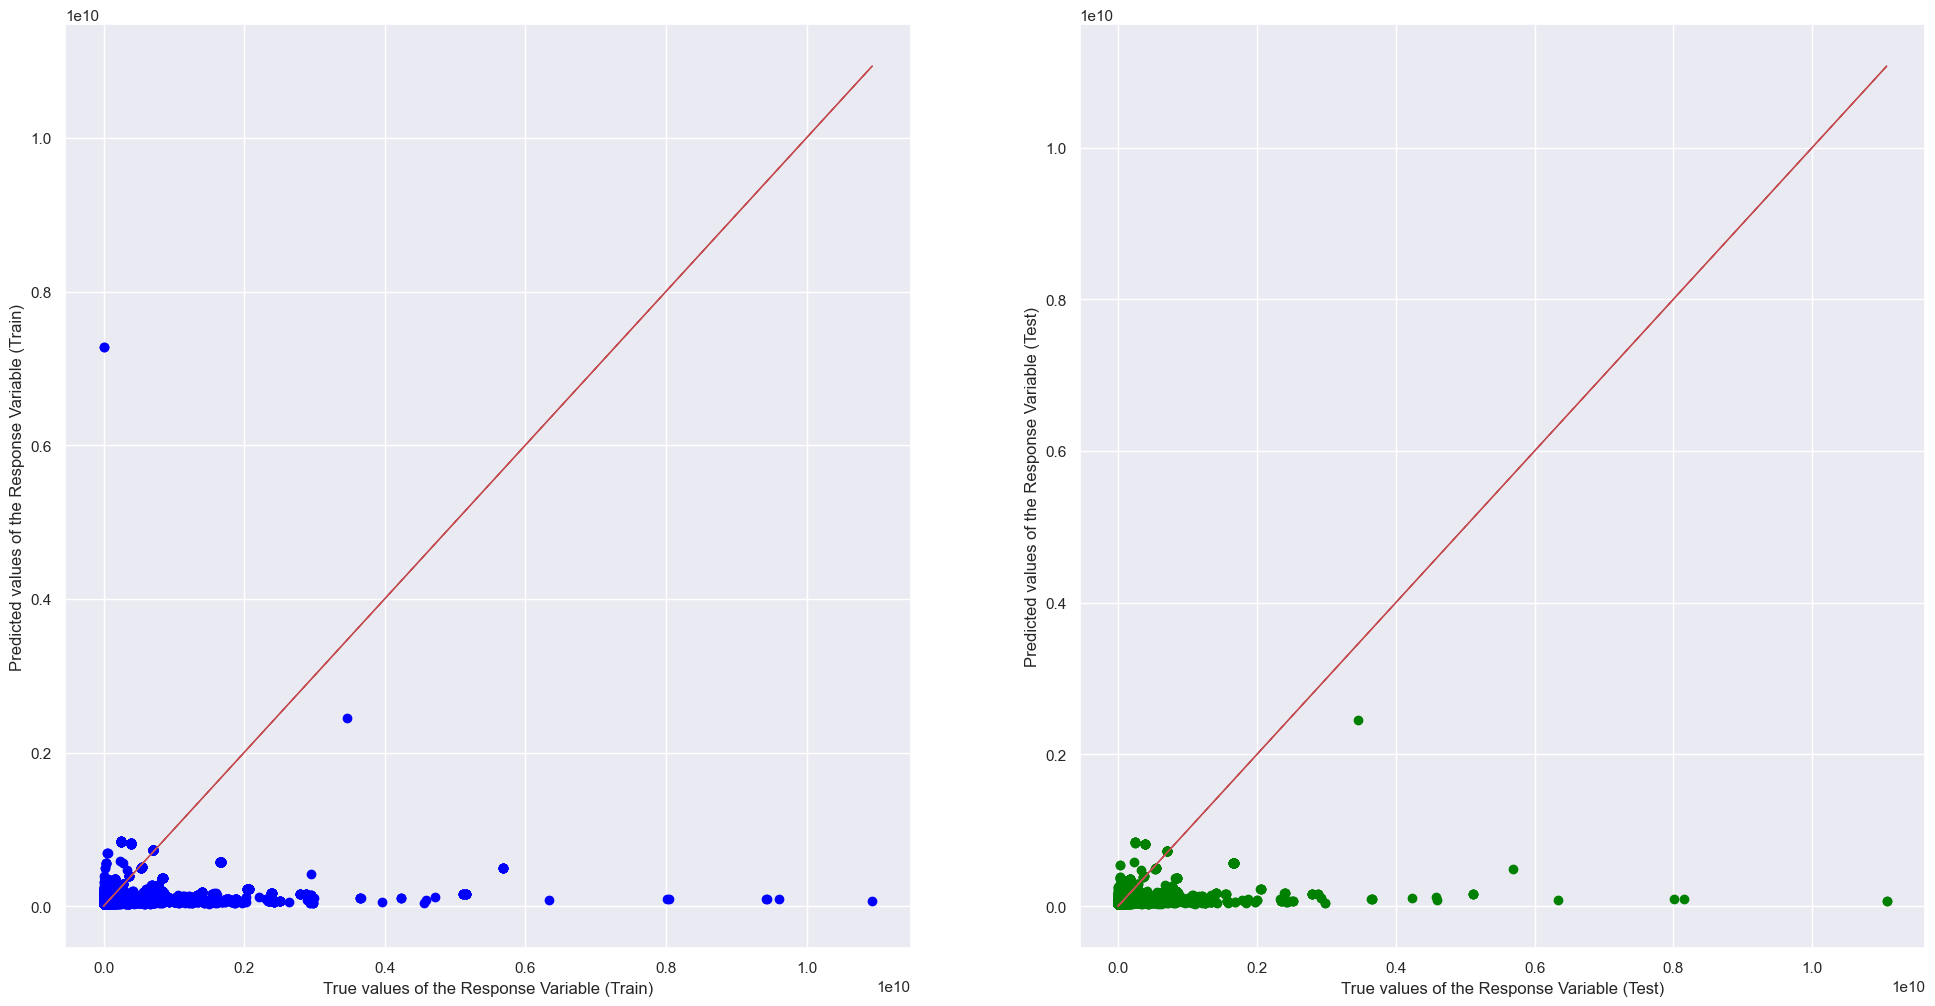

Howto & Style
Linear Regression
Intercept of Regression 	: b =  [20016115.07400092]
Coefficients of Regression 	: a =  [[22722.92857762]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.40751968888907486
Mean Squared Error (MSE) 	: 6.6486592152903384e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5286860713216122
Mean Squared Error (MSE) 	: 3.2842838789917268e+16



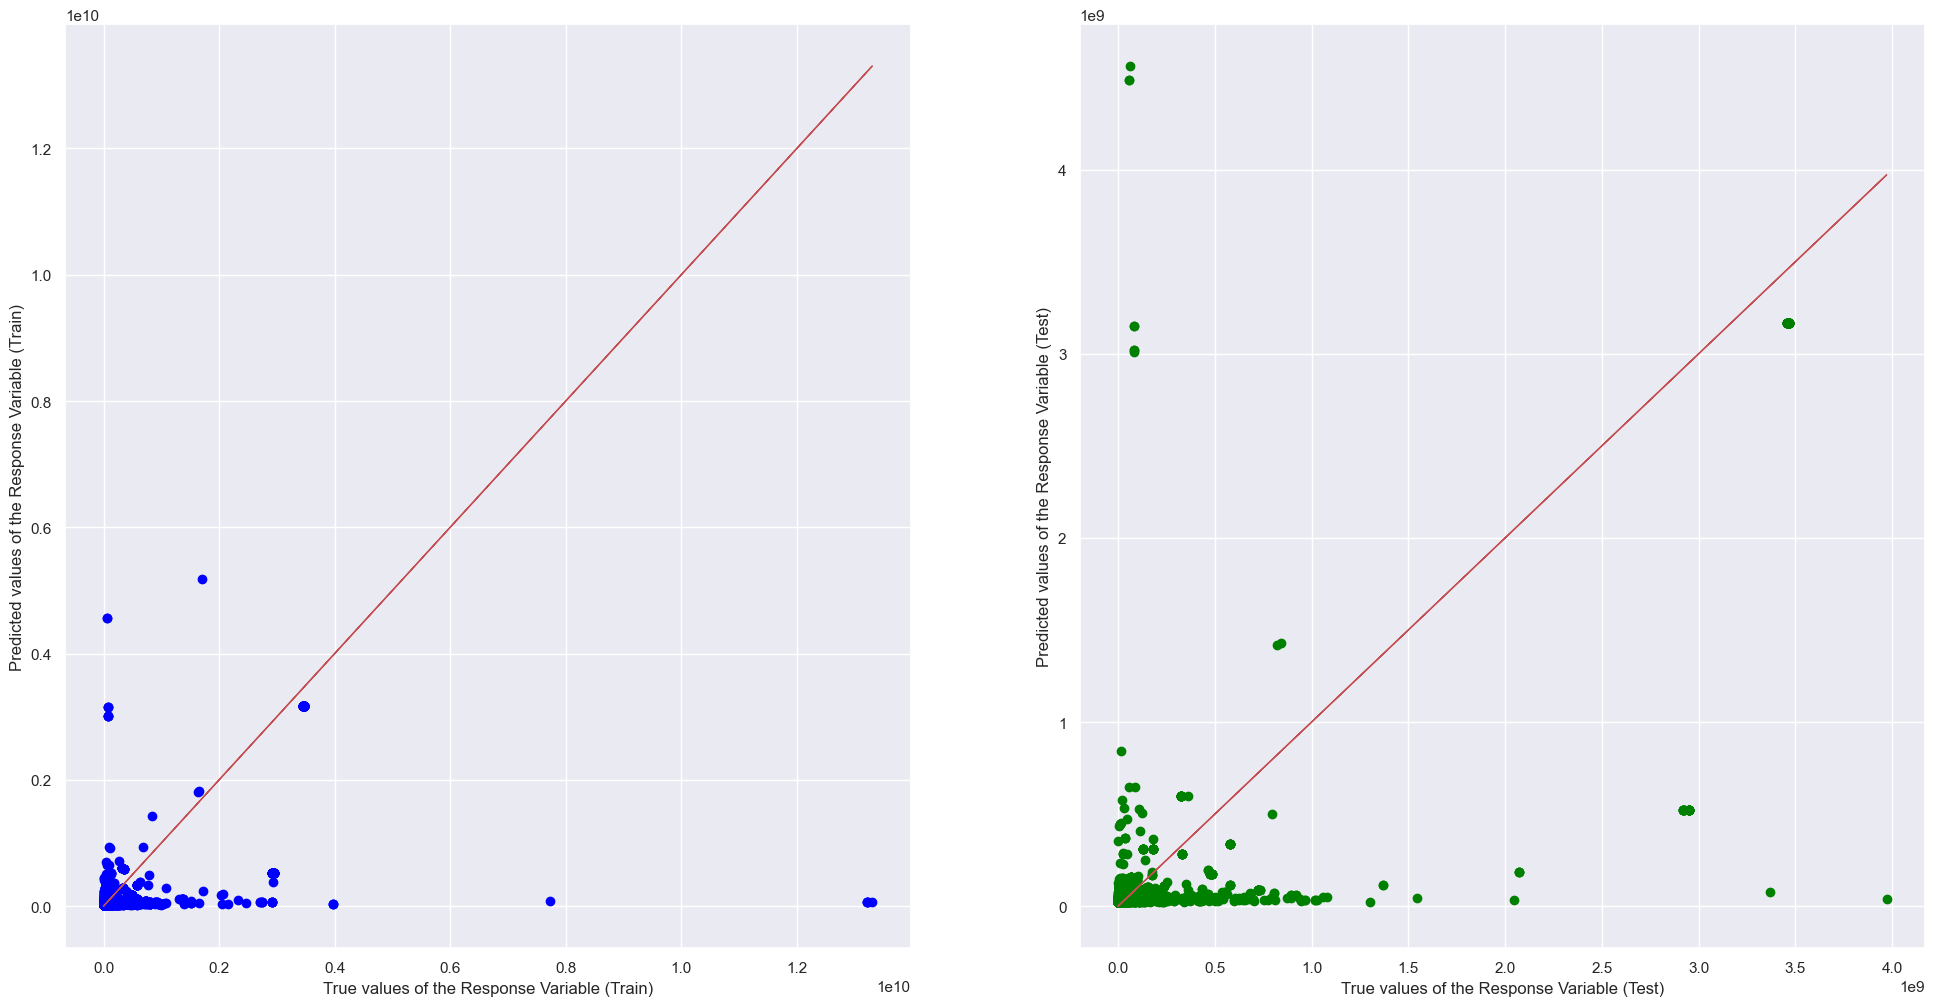

Movies
Linear Regression
Intercept of Regression 	: b =  [-7082360.47038327]
Coefficients of Regression 	: a =  [[166274.37979094]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.5612511283791264e-17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.6969917415644284
Mean Squared Error (MSE) 	: 1122416027322100.4



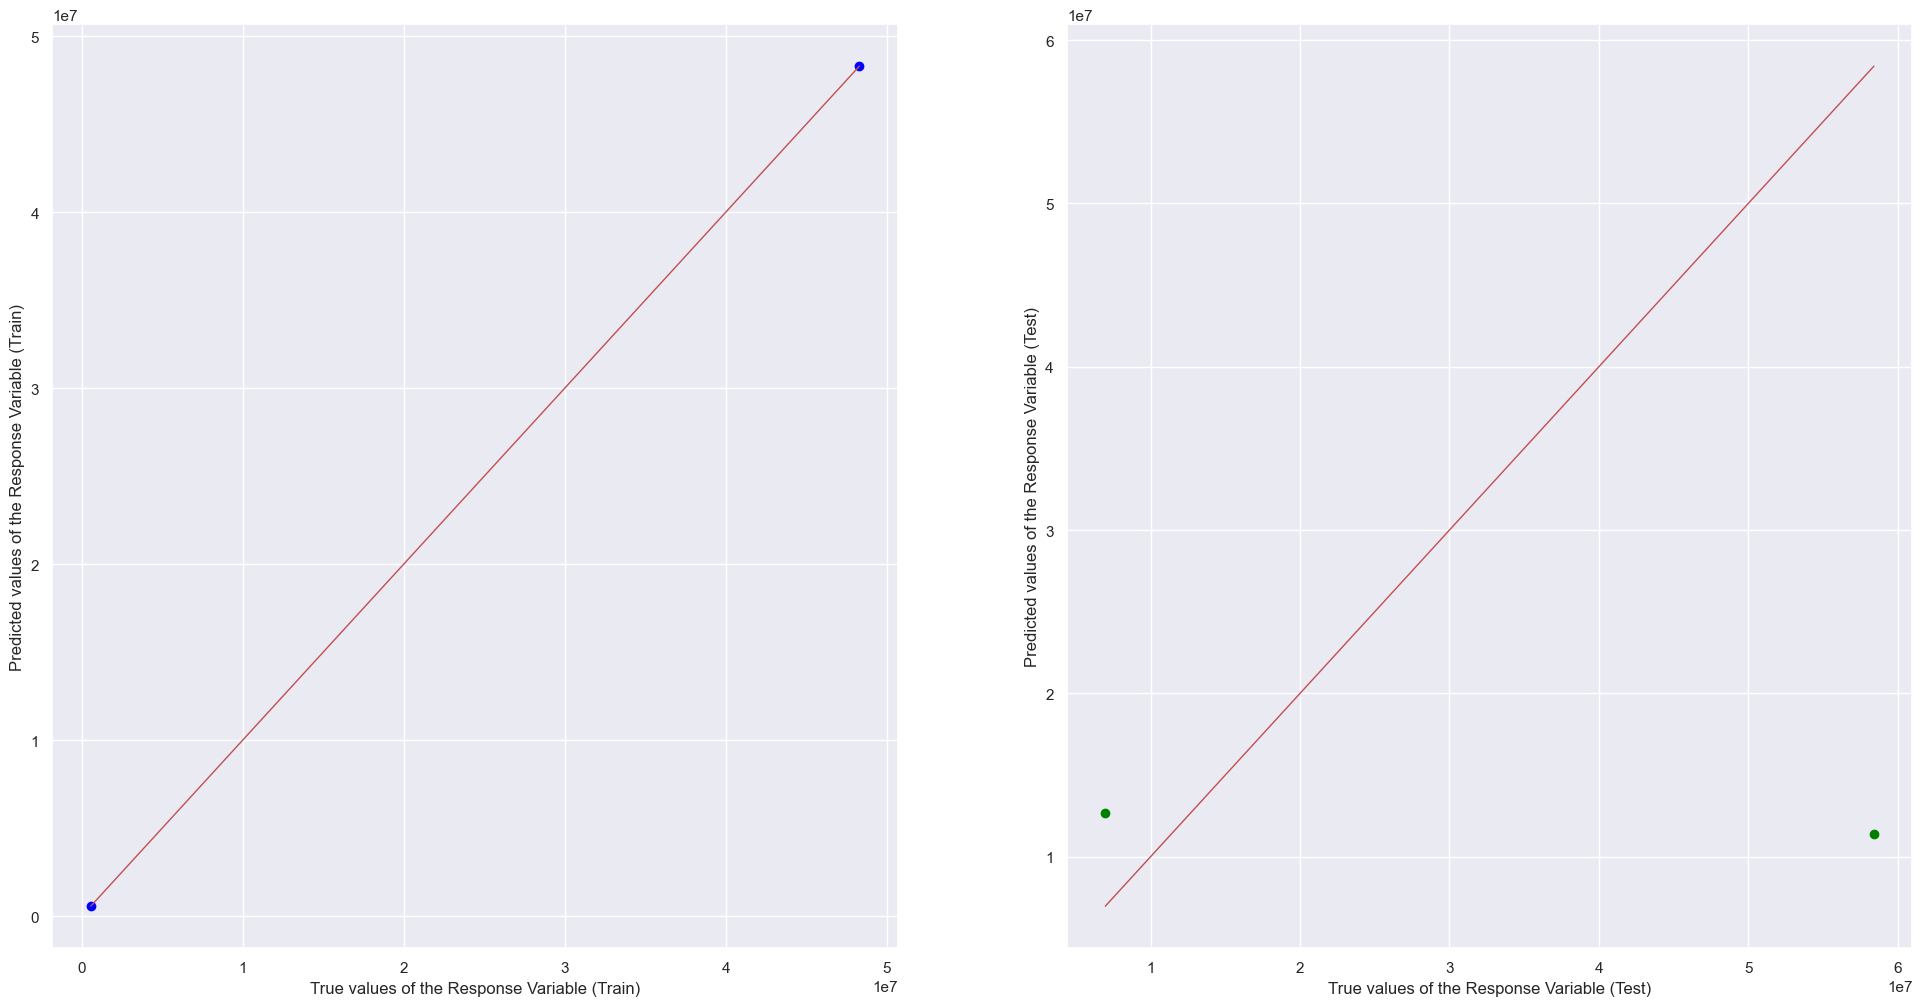

Music
Linear Regression
Intercept of Regression 	: b =  [15003509.67059259]
Coefficients of Regression 	: a =  [[29334.05250597]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03603623896305608
Mean Squared Error (MSE) 	: 1.1233060926678662e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.03222330565323672
Mean Squared Error (MSE) 	: 1.4838371351905754e+17



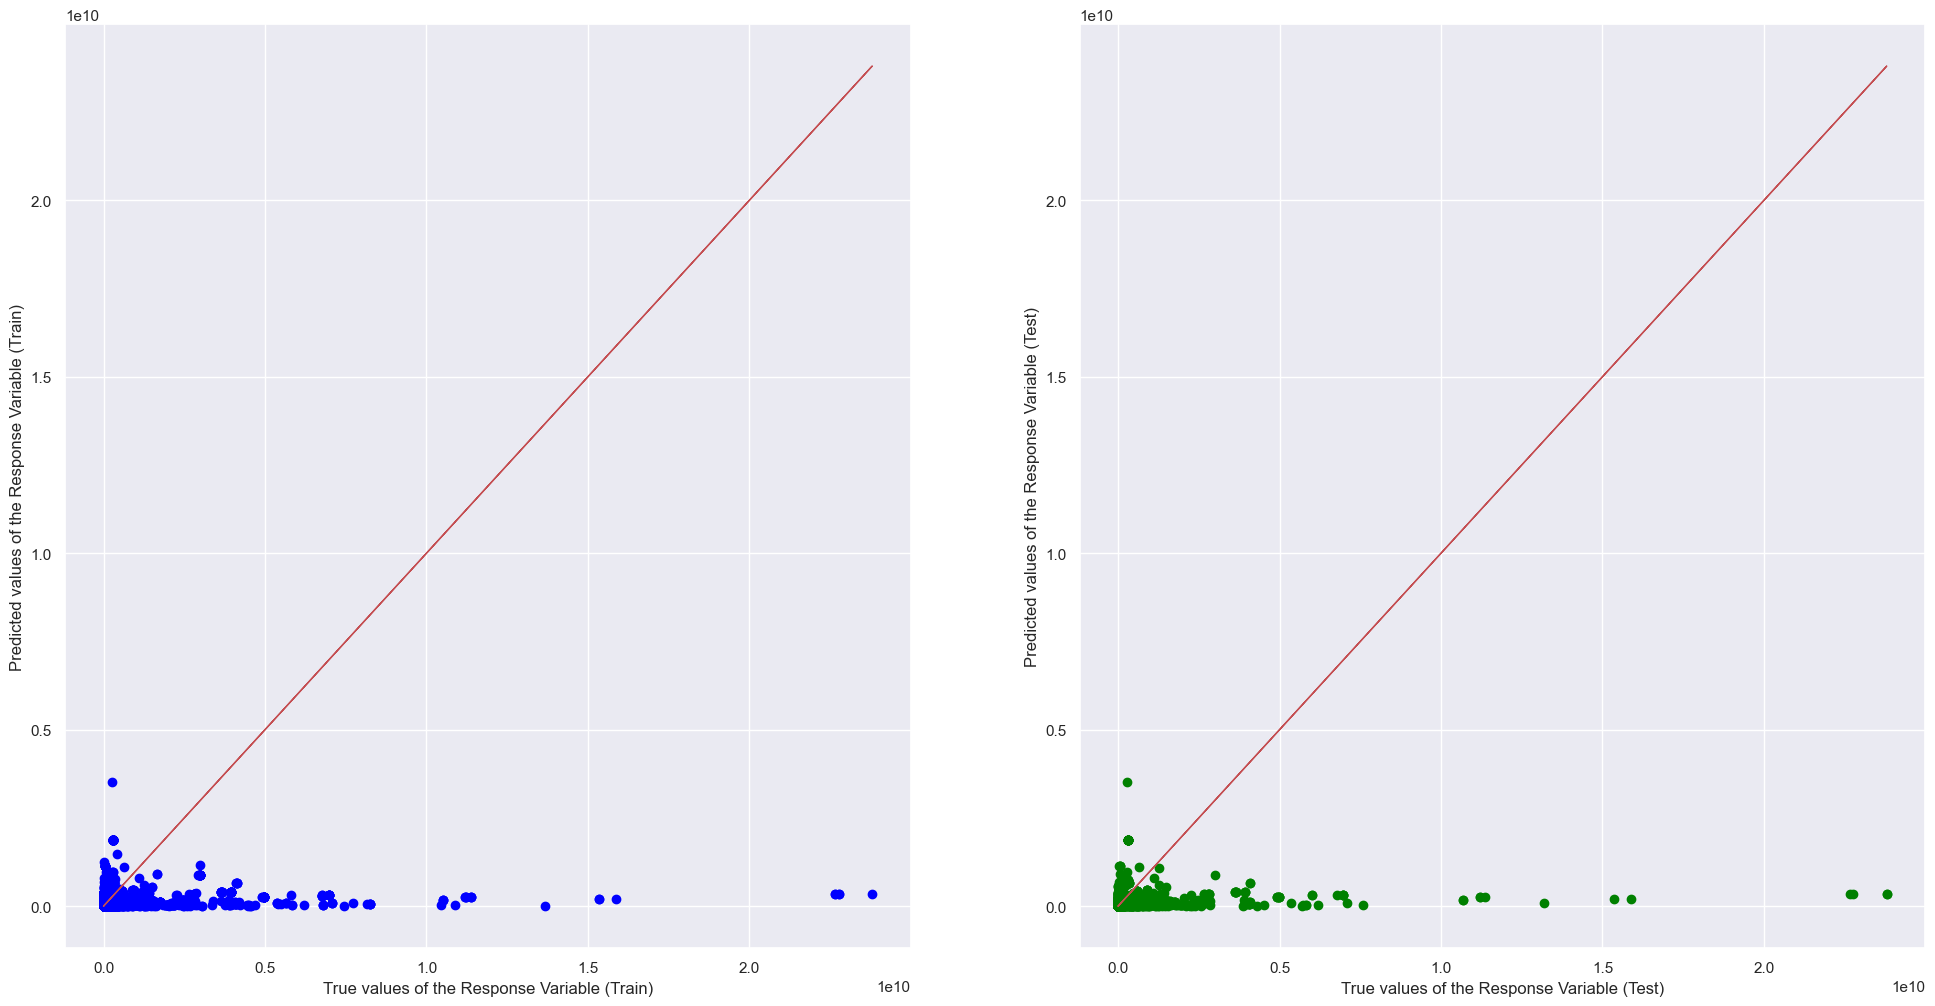

News & Politics
Linear Regression
Intercept of Regression 	: b =  [41096570.9722306]
Coefficients of Regression 	: a =  [[6899.30293446]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.32398145748622487
Mean Squared Error (MSE) 	: 1.3974305807908522e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3205674487660075
Mean Squared Error (MSE) 	: 1.6609851326788218e+17



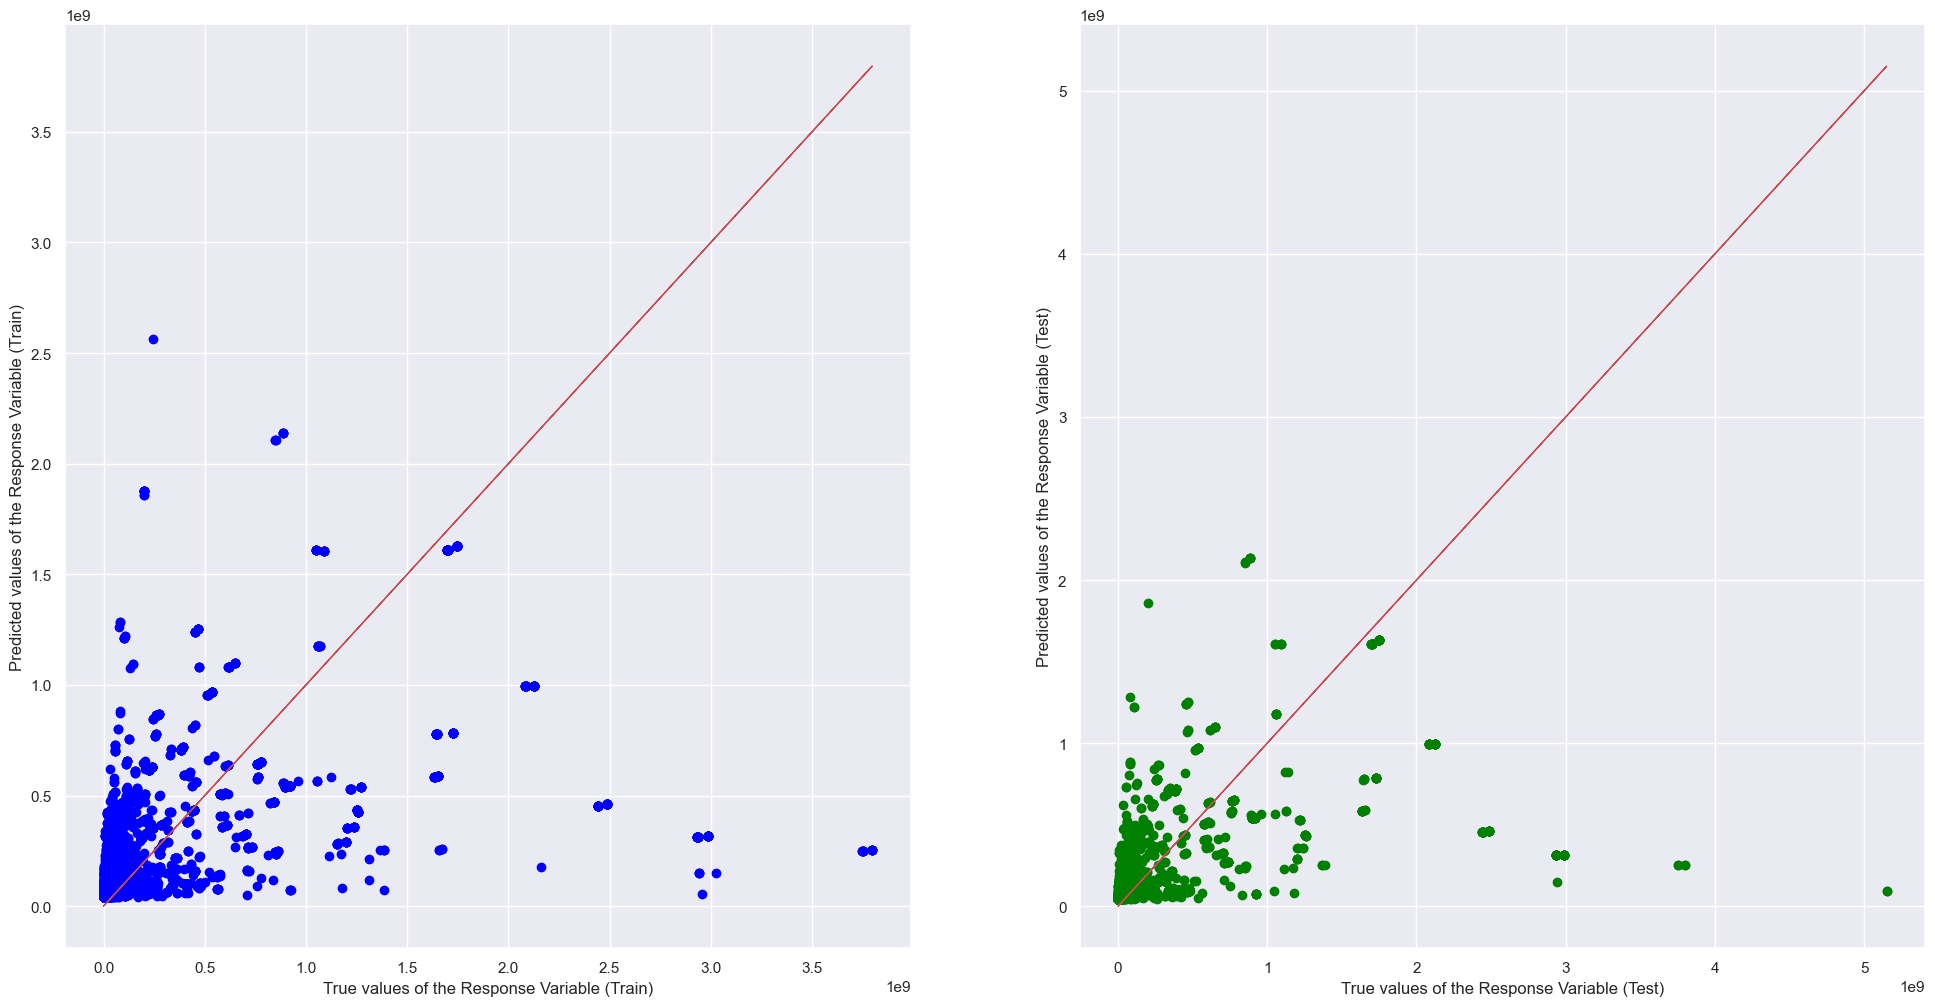

People & Blogs
Linear Regression
Intercept of Regression 	: b =  [6449786.33521626]
Coefficients of Regression 	: a =  [[5533.93026511]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.013582926503056258
Mean Squared Error (MSE) 	: 1.3369998692563966e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.013066395130274966
Mean Squared Error (MSE) 	: 1.8088535313826544e+16



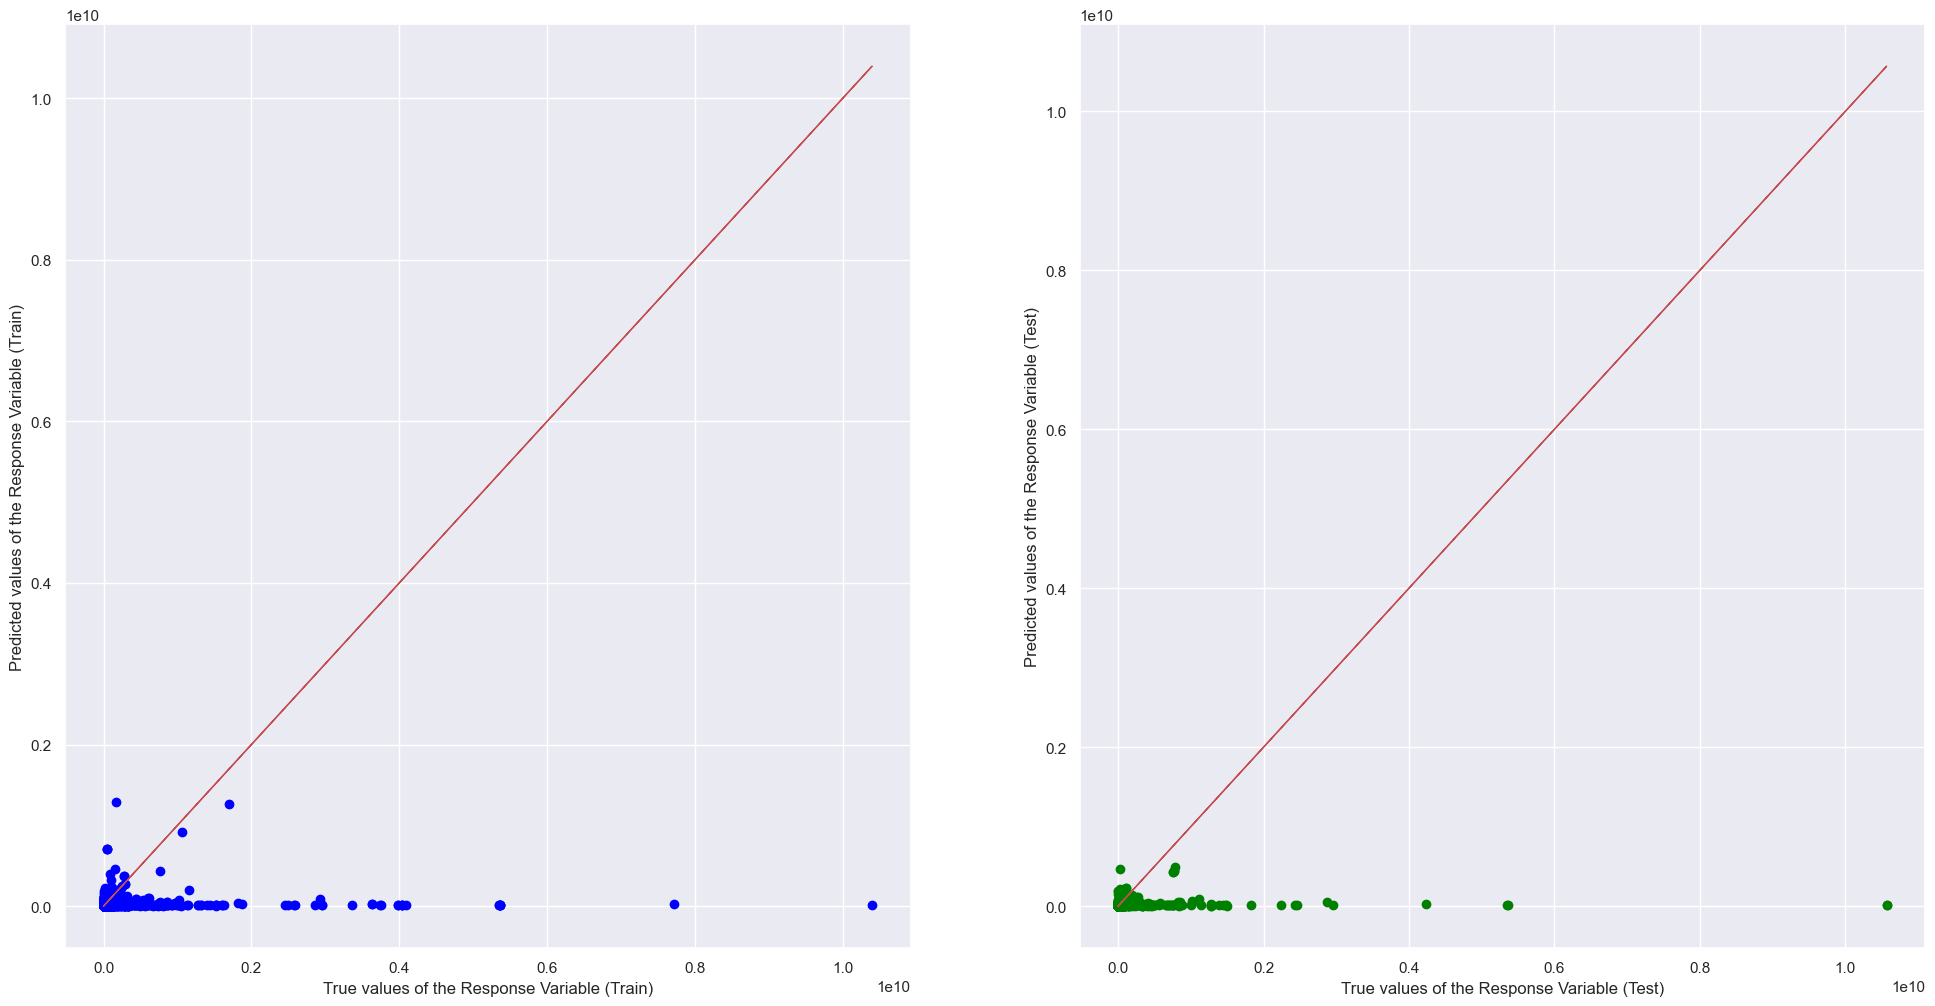

Pets & Animals
Linear Regression
Intercept of Regression 	: b =  [3256309.06911797]
Coefficients of Regression 	: a =  [[18332.02664353]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4901360228731678
Mean Squared Error (MSE) 	: 1.1245854786737322e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.535878718548358
Mean Squared Error (MSE) 	: 2934268553727698.0



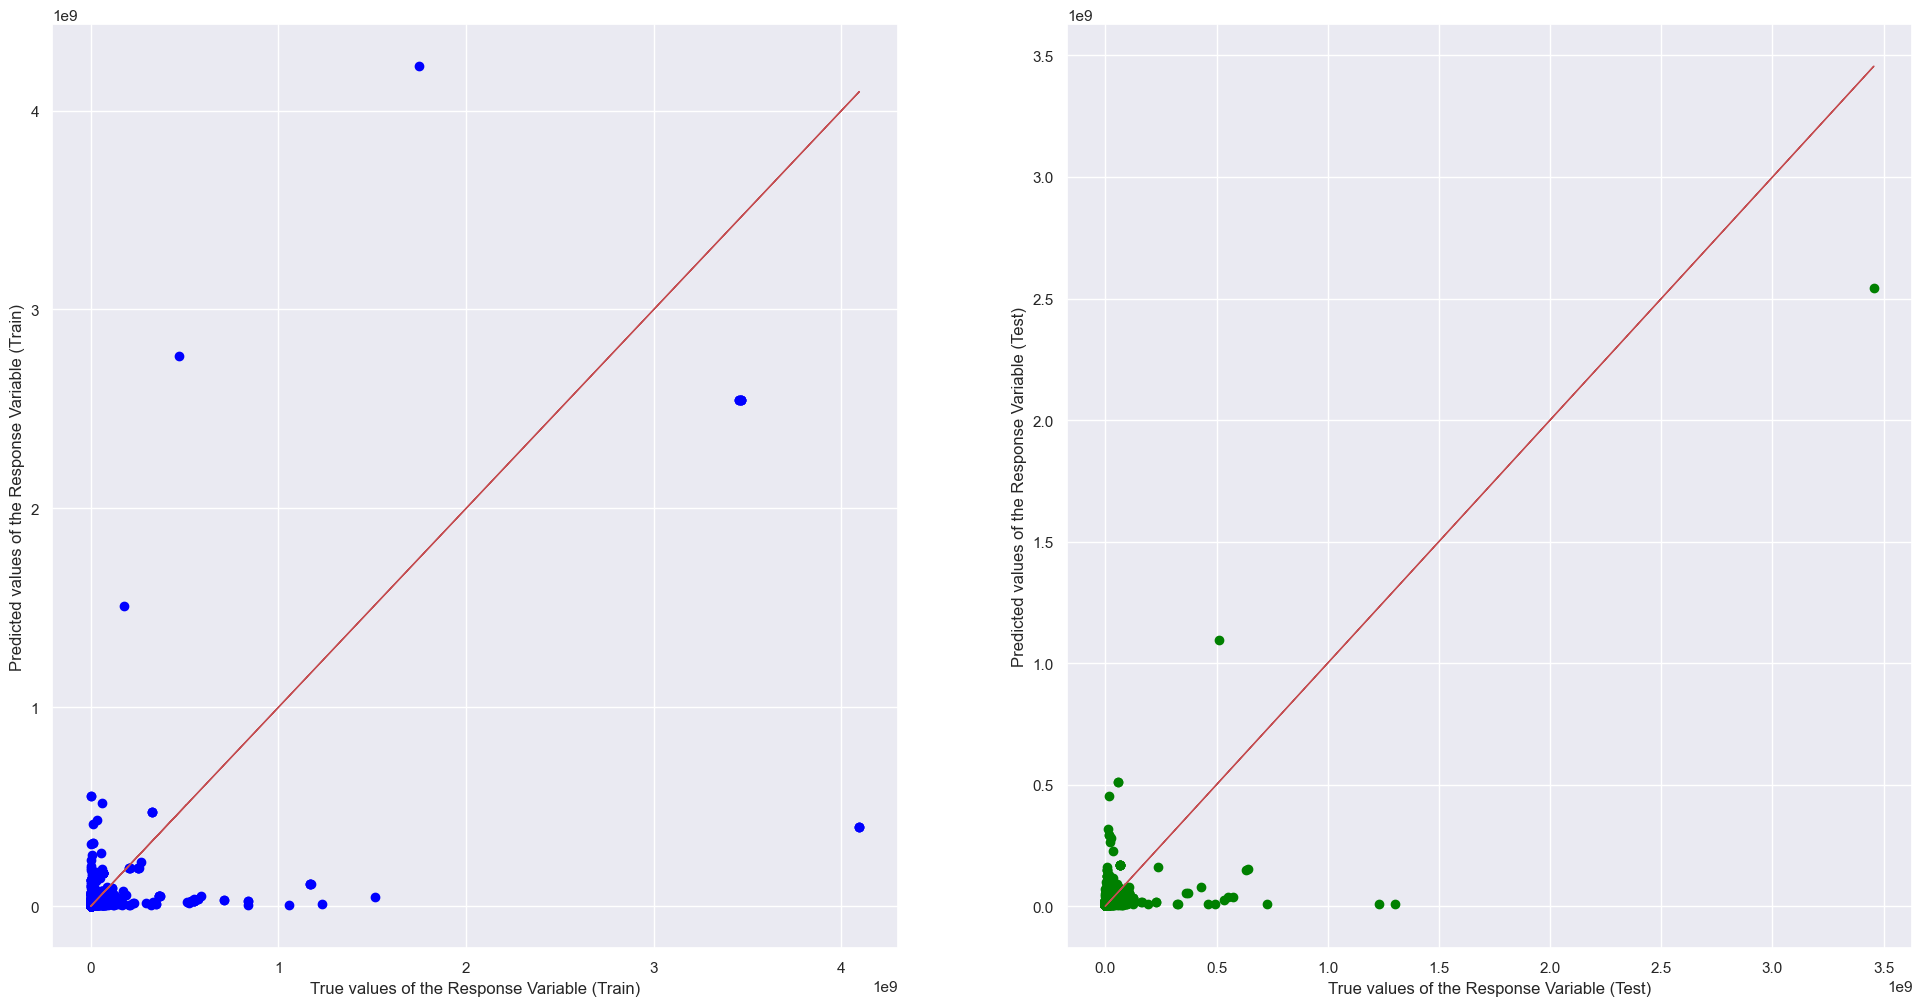

Science & Technology
Linear Regression
Intercept of Regression 	: b =  [8741935.93622588]
Coefficients of Regression 	: a =  [[22876.34208876]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4515746575130548
Mean Squared Error (MSE) 	: 1.3101874844022528e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.21550206034147368
Mean Squared Error (MSE) 	: 1.015294774485352e+16



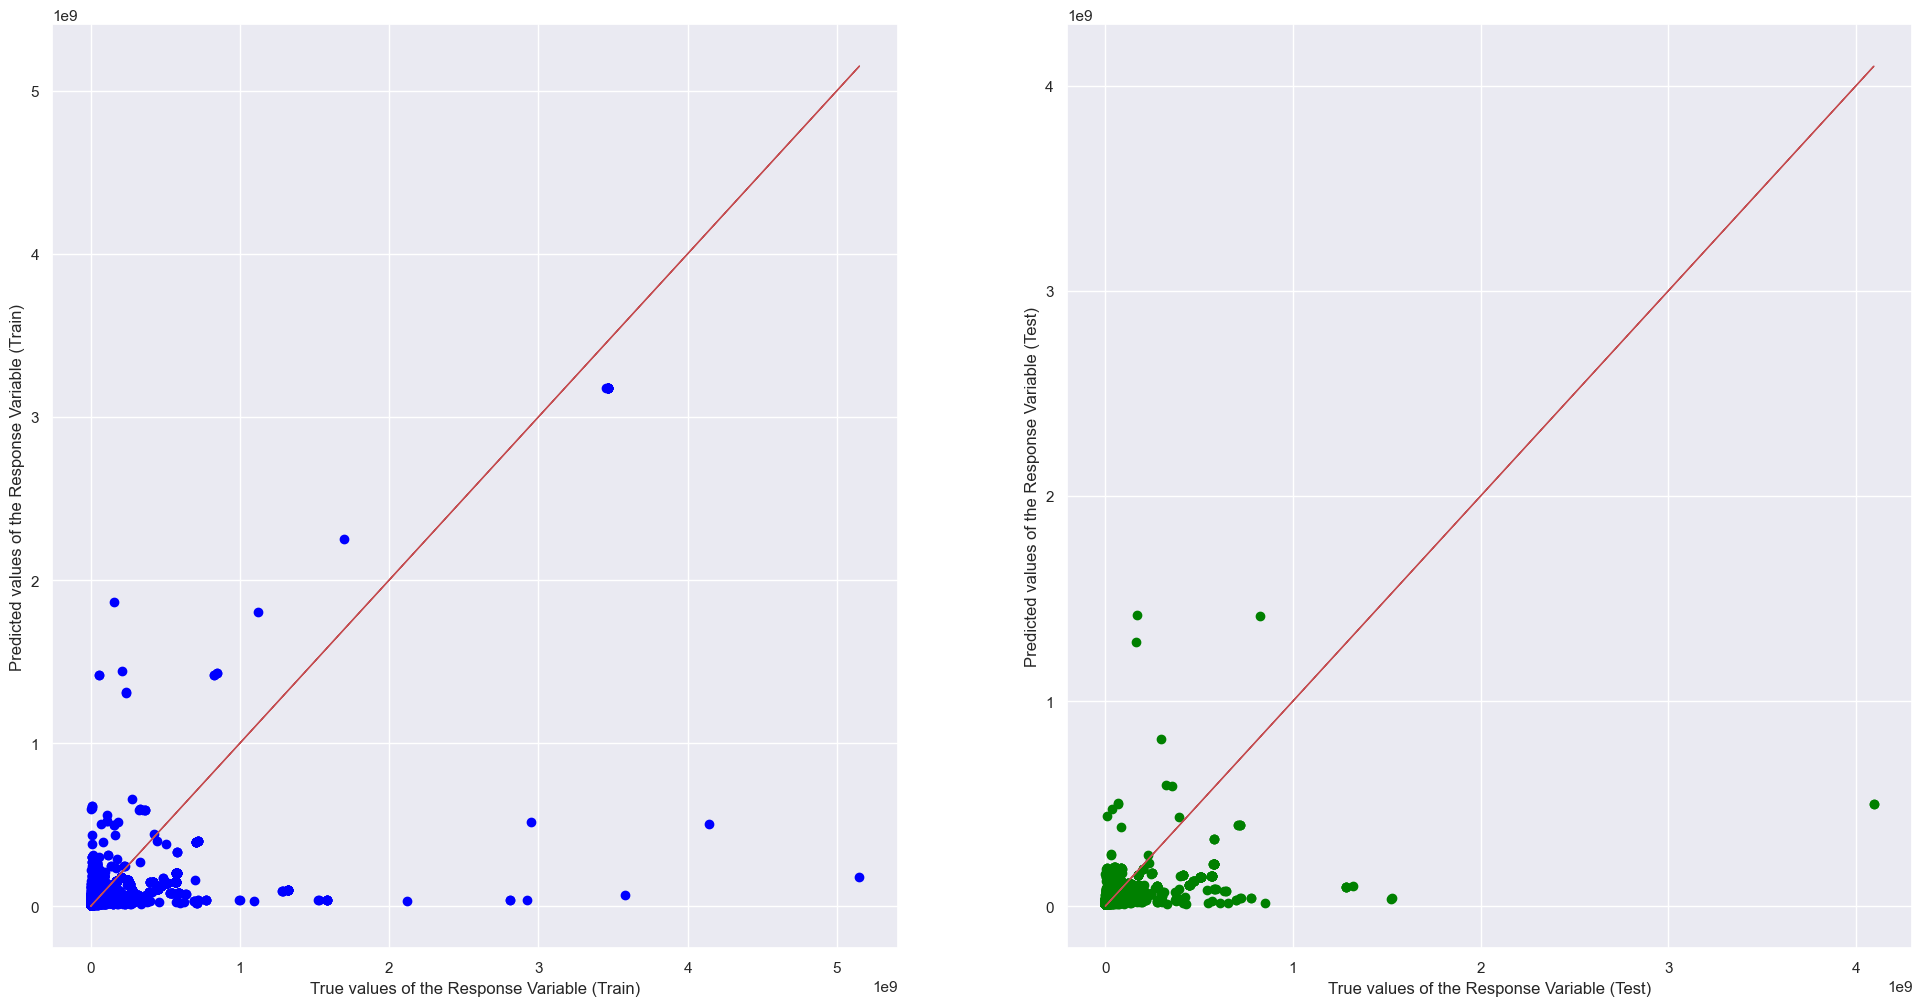

Shows
Linear Regression
Intercept of Regression 	: b =  [6.36349387e+08]
Coefficients of Regression 	: a =  [[43301.58842832]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10178419473254208
Mean Squared Error (MSE) 	: 6.125155040459632e+18

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06851856537539547
Mean Squared Error (MSE) 	: 3.0407906771292037e+18



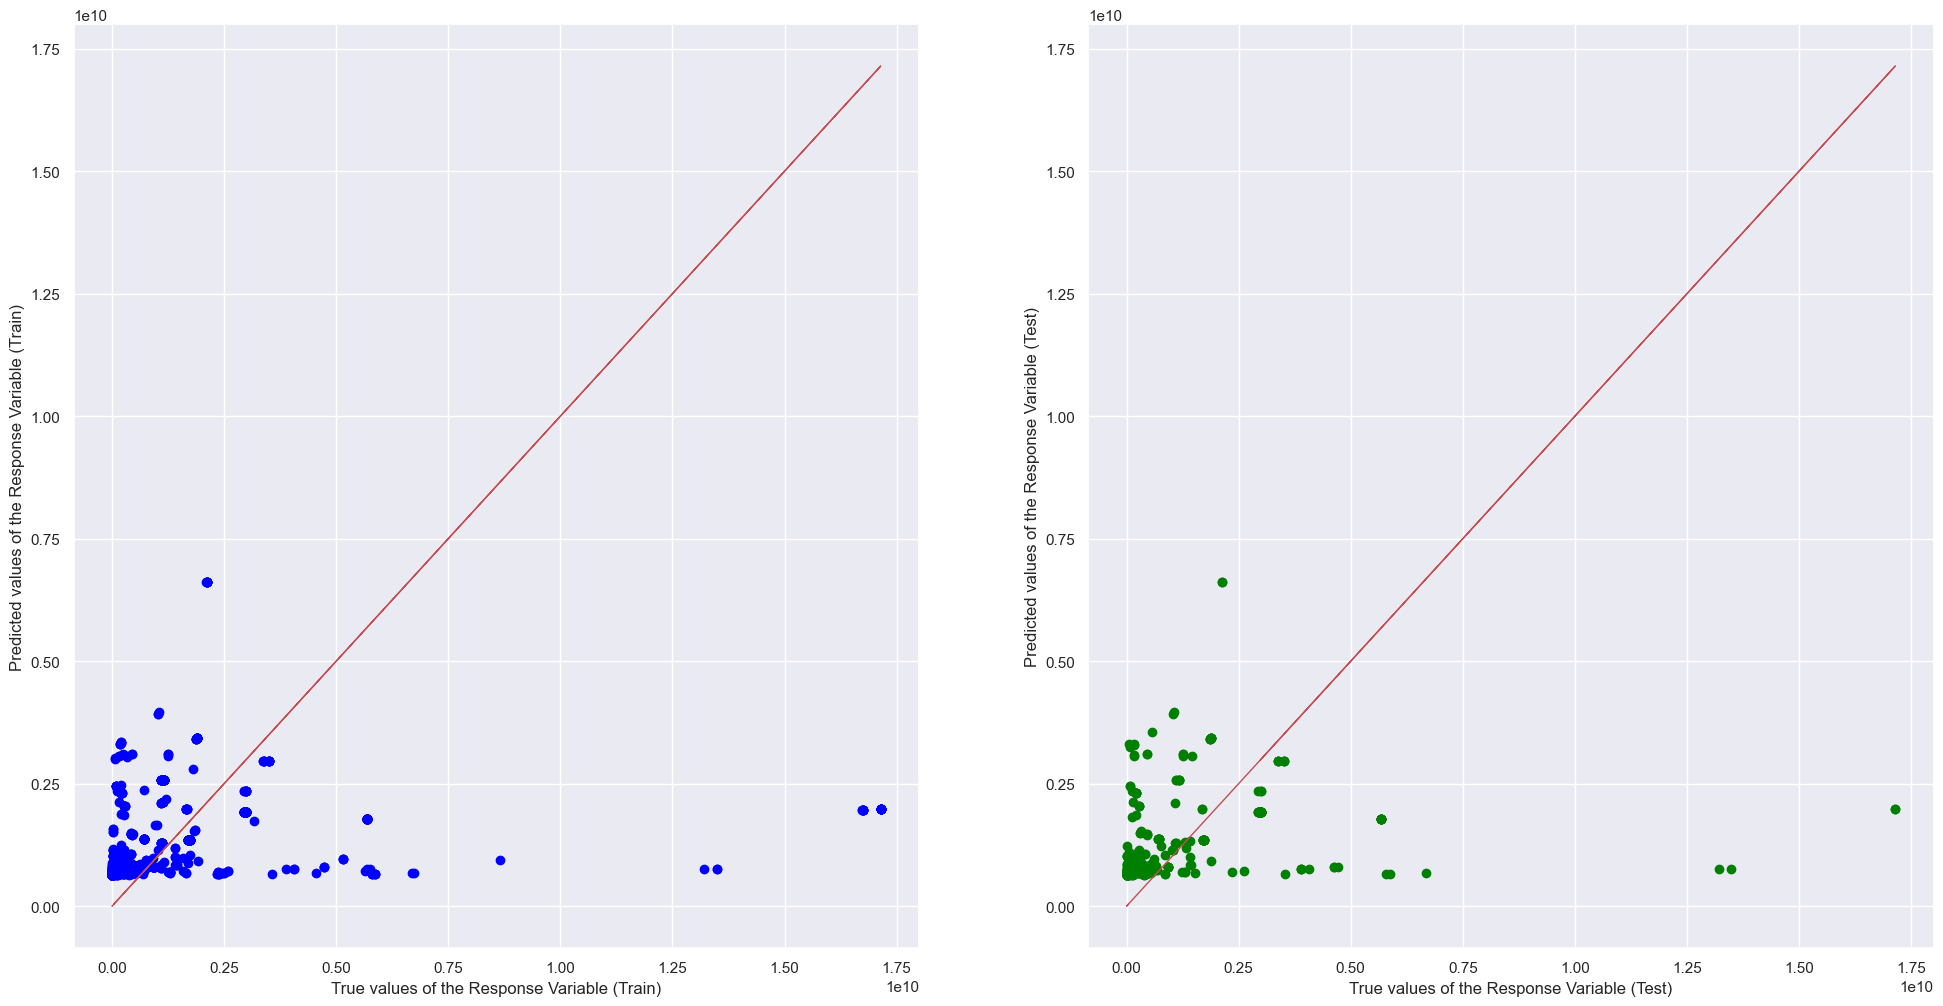

Sports
Linear Regression
Intercept of Regression 	: b =  [7334607.20078523]
Coefficients of Regression 	: a =  [[21591.18870703]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07866393300600938
Mean Squared Error (MSE) 	: 2.5679621391525616e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07030317254366547
Mean Squared Error (MSE) 	: 1.889218813958717e+17



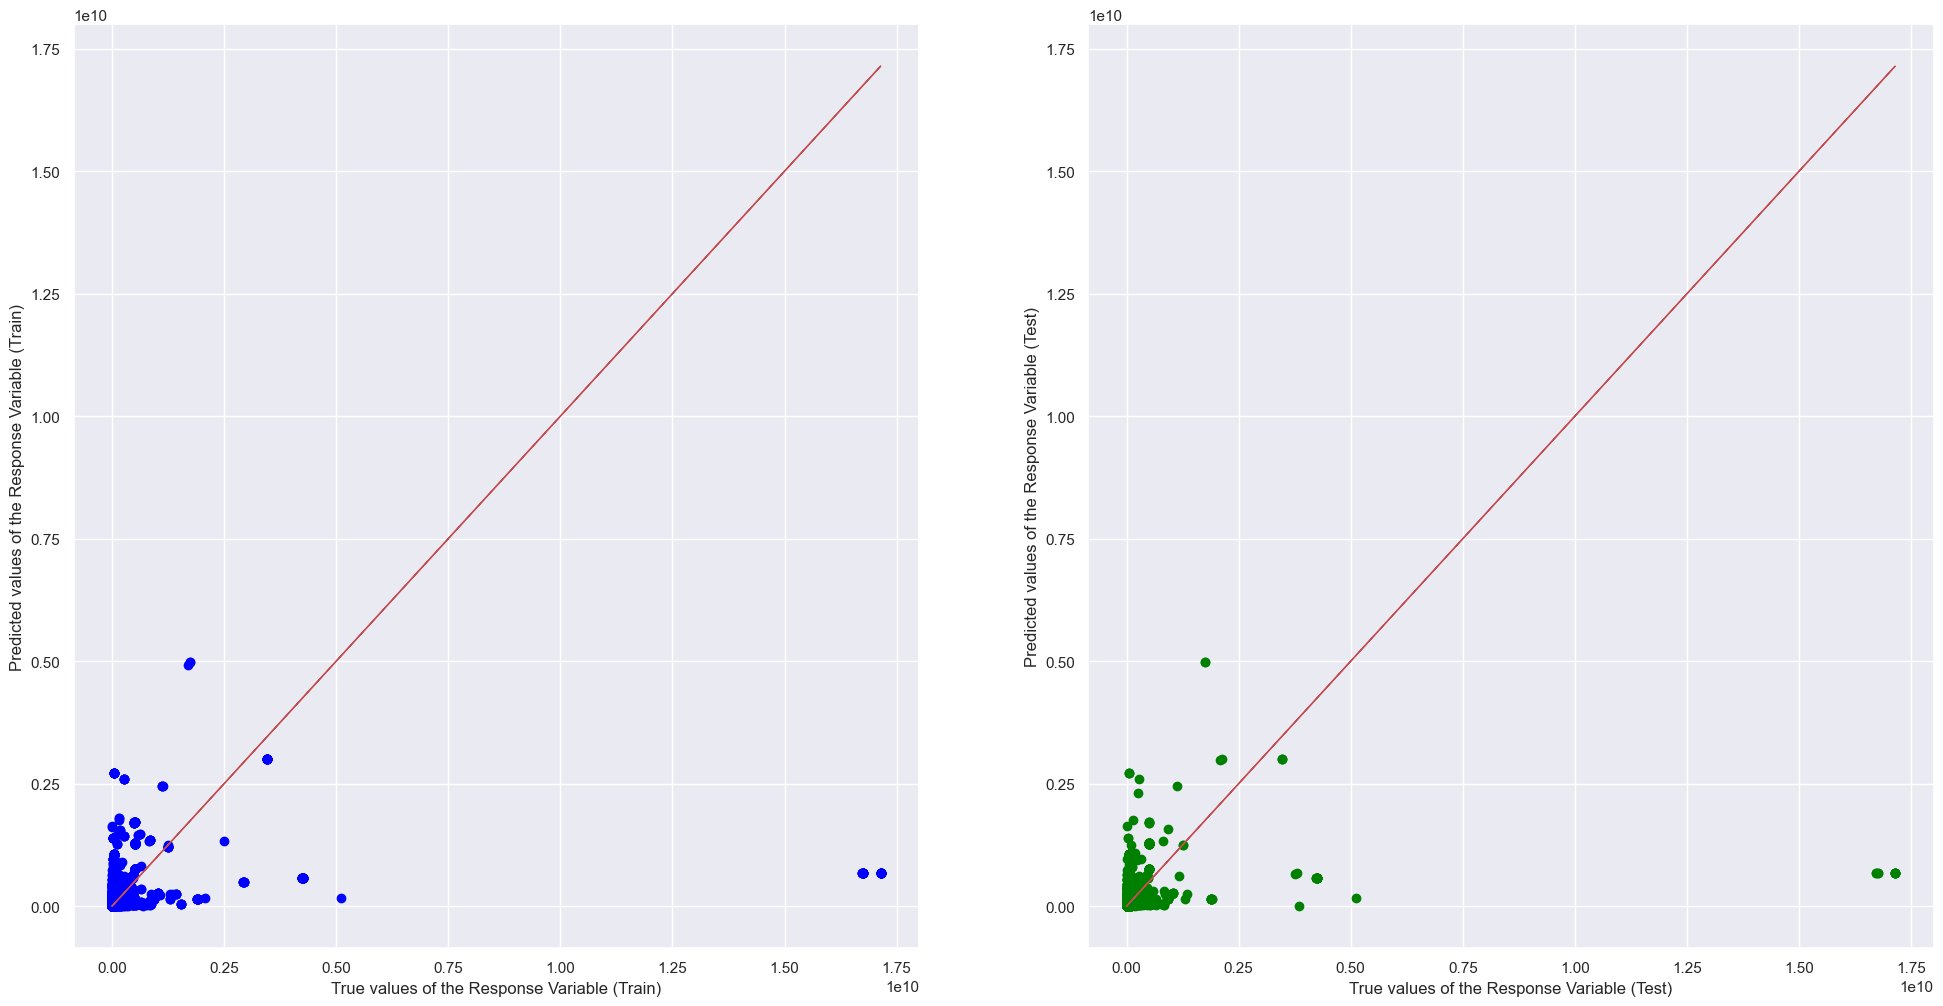

Trailers
Linear Regression
Intercept of Regression 	: b =  [-11873566.81385159]
Coefficients of Regression 	: a =  [[37645.16264469]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.15099356947206366
Mean Squared Error (MSE) 	: 4.761638738126002e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09658134966009946
Mean Squared Error (MSE) 	: 7.630446781573877e+16



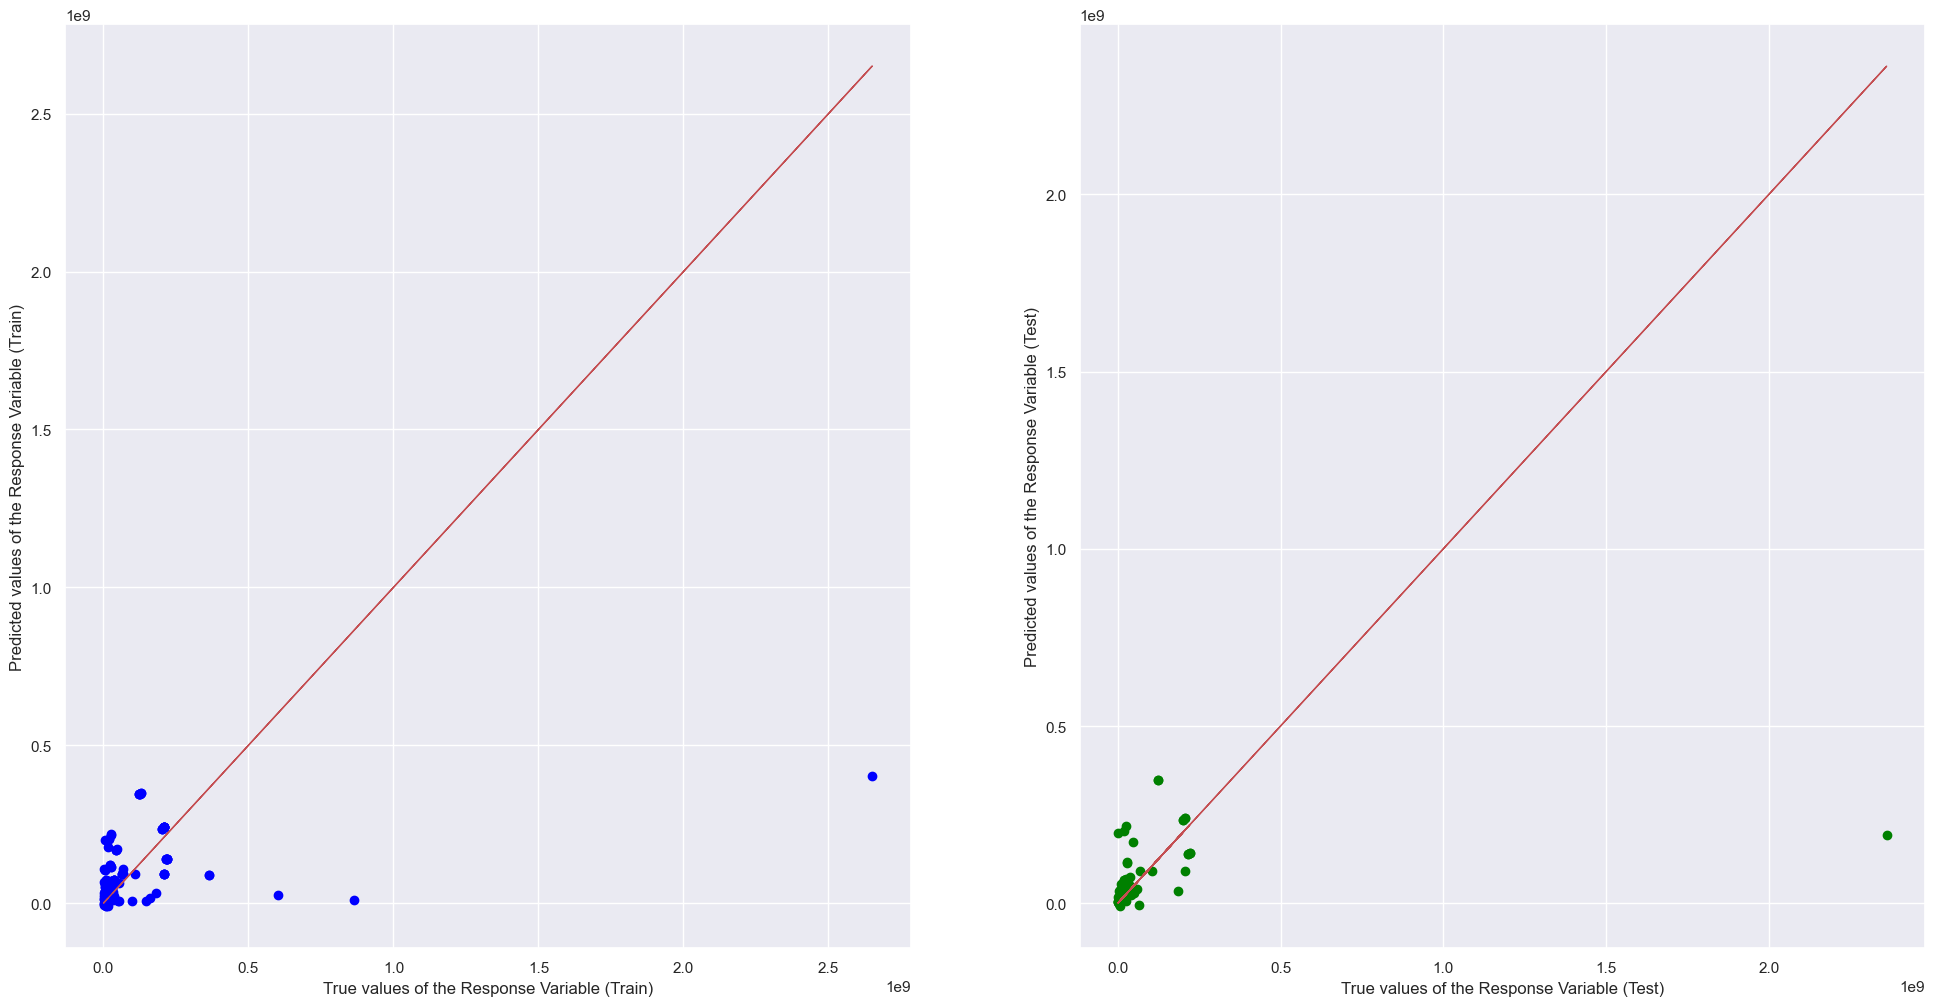

Average Train R^2: 	: 0.25395934554786326
Average Train MSE: 	: 4.902691750124966e+17
Average Test R^2: 	: 0.12497112702081548
Average Test MSE: 	: 3.155885348351428e+17


In [43]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=1    
predictorStr = 'videoCount'

for i in range (0,16):
    print(Genre[i])
    linearRegression(Genre[i], predictorStr, flag)
    

print("Average Train R^2: \t:",Average(trainr2))
print("Average Train MSE: \t:",Average(trainmse))
print("Average Test R^2: \t:",Average(testr2))
print("Average Test MSE: \t:",Average(testmse))

#### Ridge Regression

Autos & Vehicles
Ridge Regression
Intercept of Regression 	: b =  [4547877.74873241]
Coefficients of Regression 	: a =  [[11238.6917108]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2937290451828217
Mean Squared Error (MSE) 	: 4521558778412828.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.17719795300849628
Mean Squared Error (MSE) 	: 4349026772330252.0



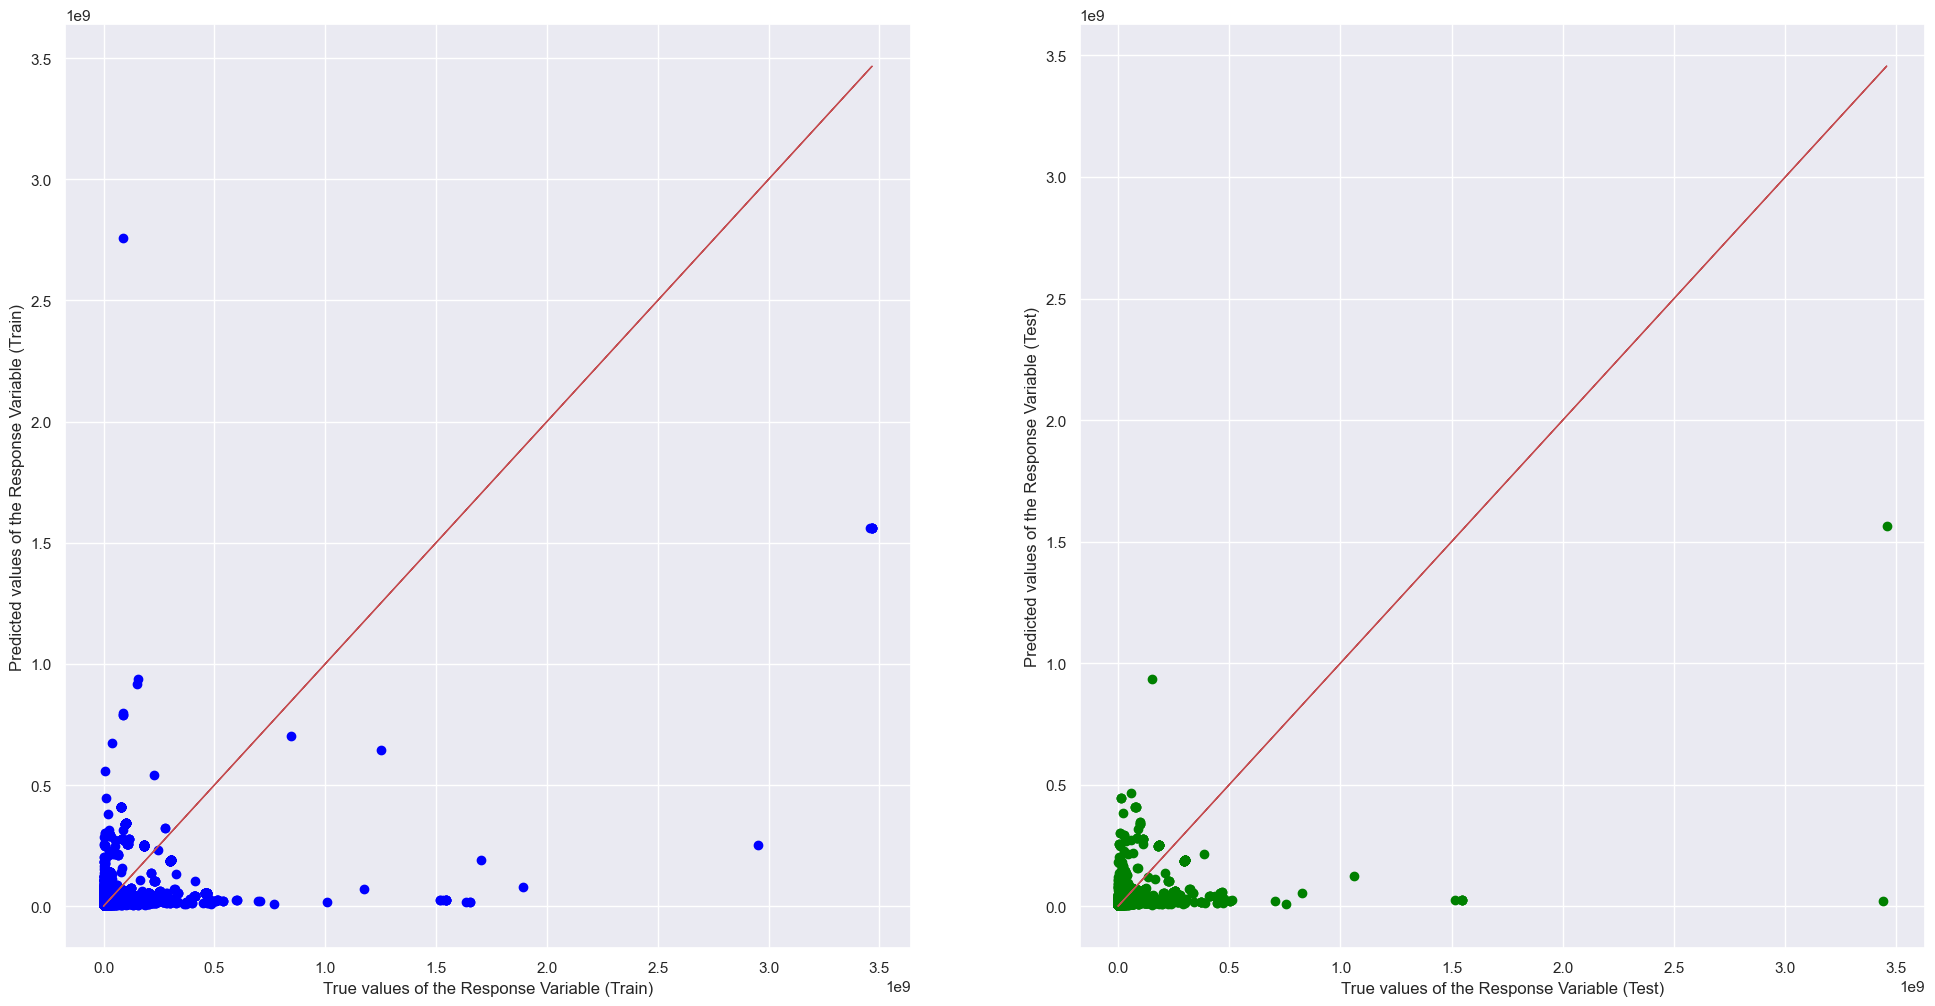

Comedy
Ridge Regression
Intercept of Regression 	: b =  [20240405.4265334]
Coefficients of Regression 	: a =  [[51087.68860615]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09785608081849495
Mean Squared Error (MSE) 	: 8.83660555371778e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08058906501900198
Mean Squared Error (MSE) 	: 1.347956680642745e+17



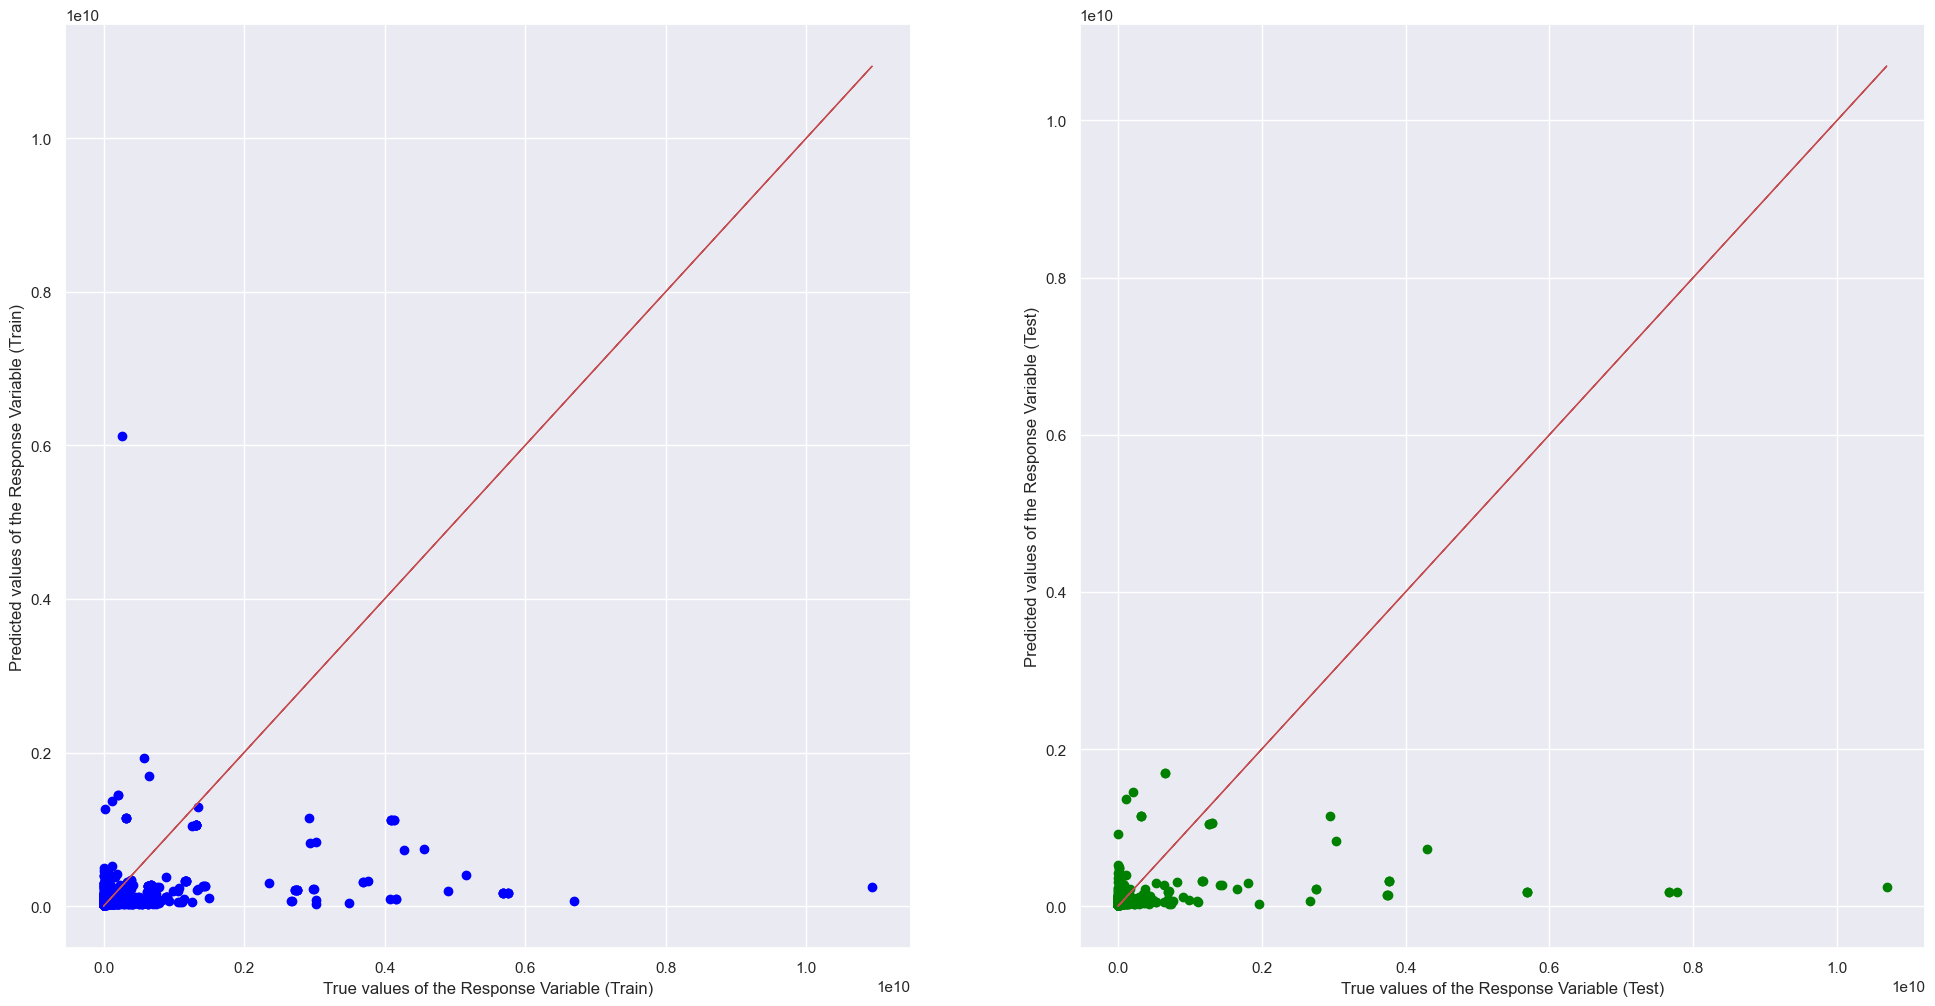

Education
Ridge Regression
Intercept of Regression 	: b =  [15449911.41143153]
Coefficients of Regression 	: a =  [[4385.3039299]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.009144145885605415
Mean Squared Error (MSE) 	: 2.760579717869896e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0189233569316275
Mean Squared Error (MSE) 	: 2.803041739145223e+16



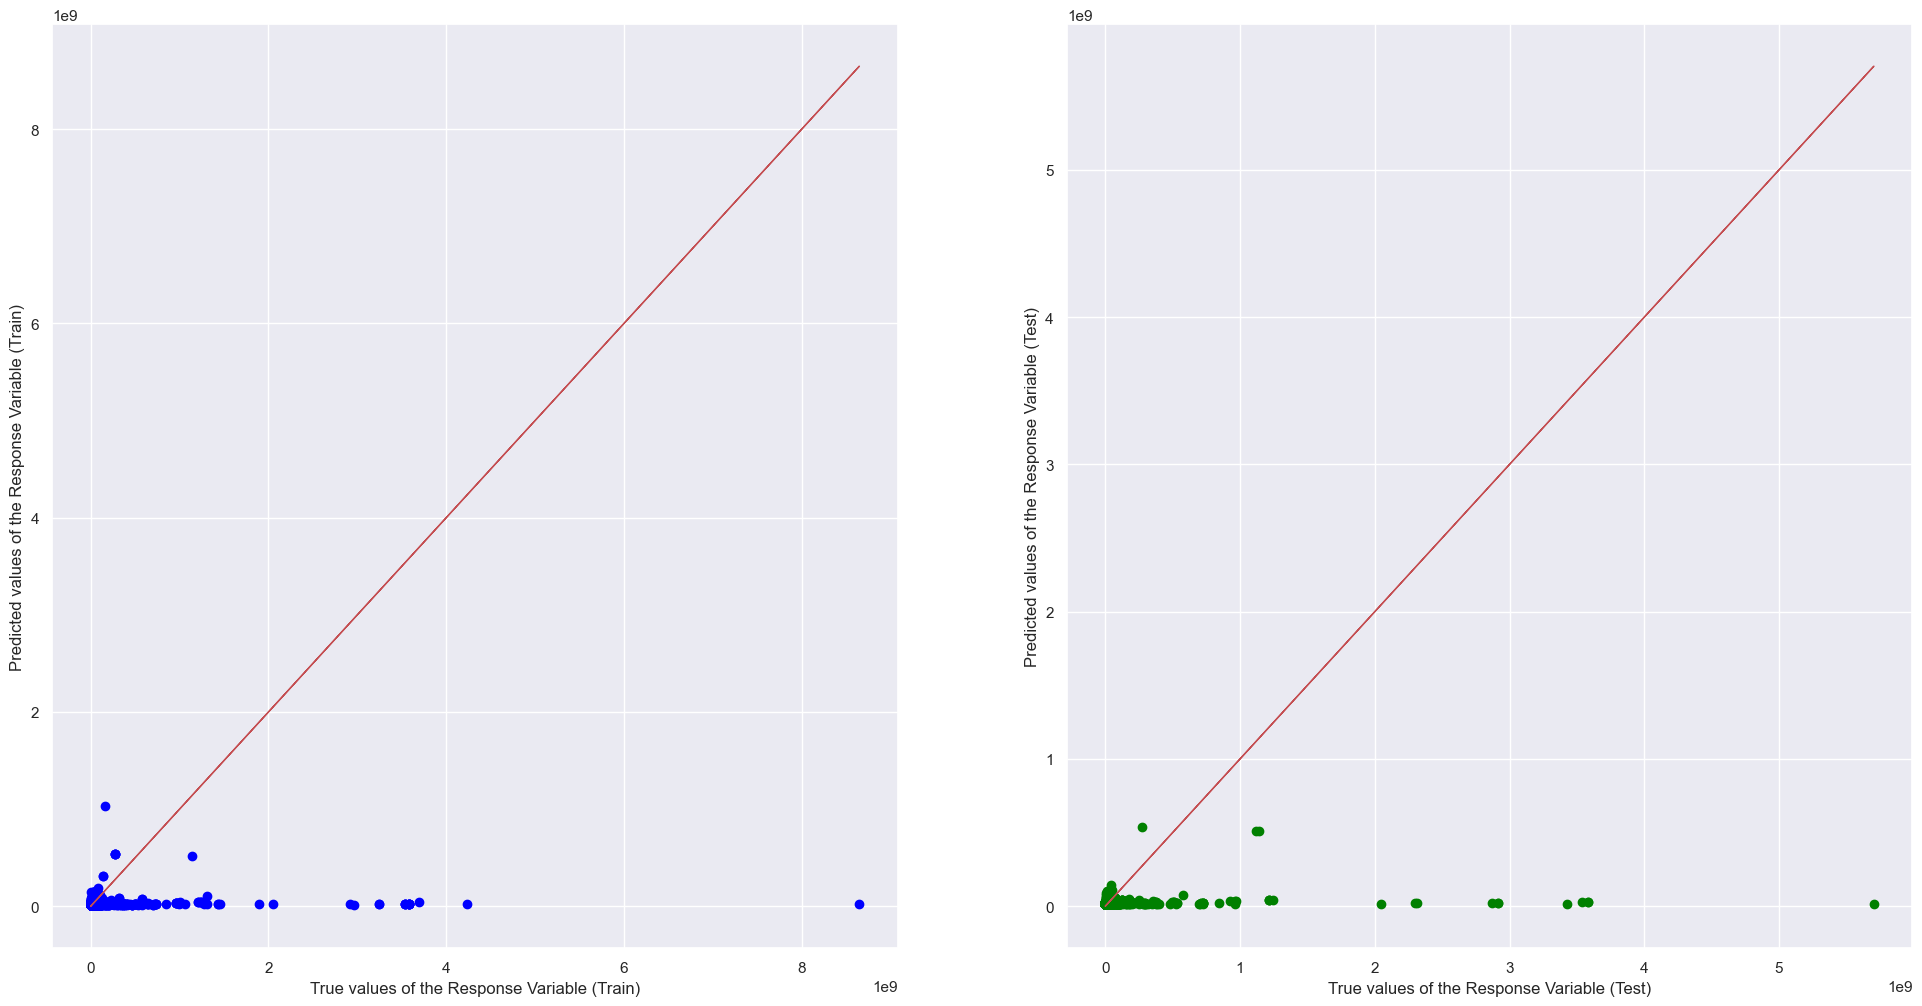

Entertainment
Ridge Regression
Intercept of Regression 	: b =  [78790478.72818026]
Coefficients of Regression 	: a =  [[21520.28266945]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10948502188309828
Mean Squared Error (MSE) 	: 6.512673116076348e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12731978091091
Mean Squared Error (MSE) 	: 6.130274266366432e+17



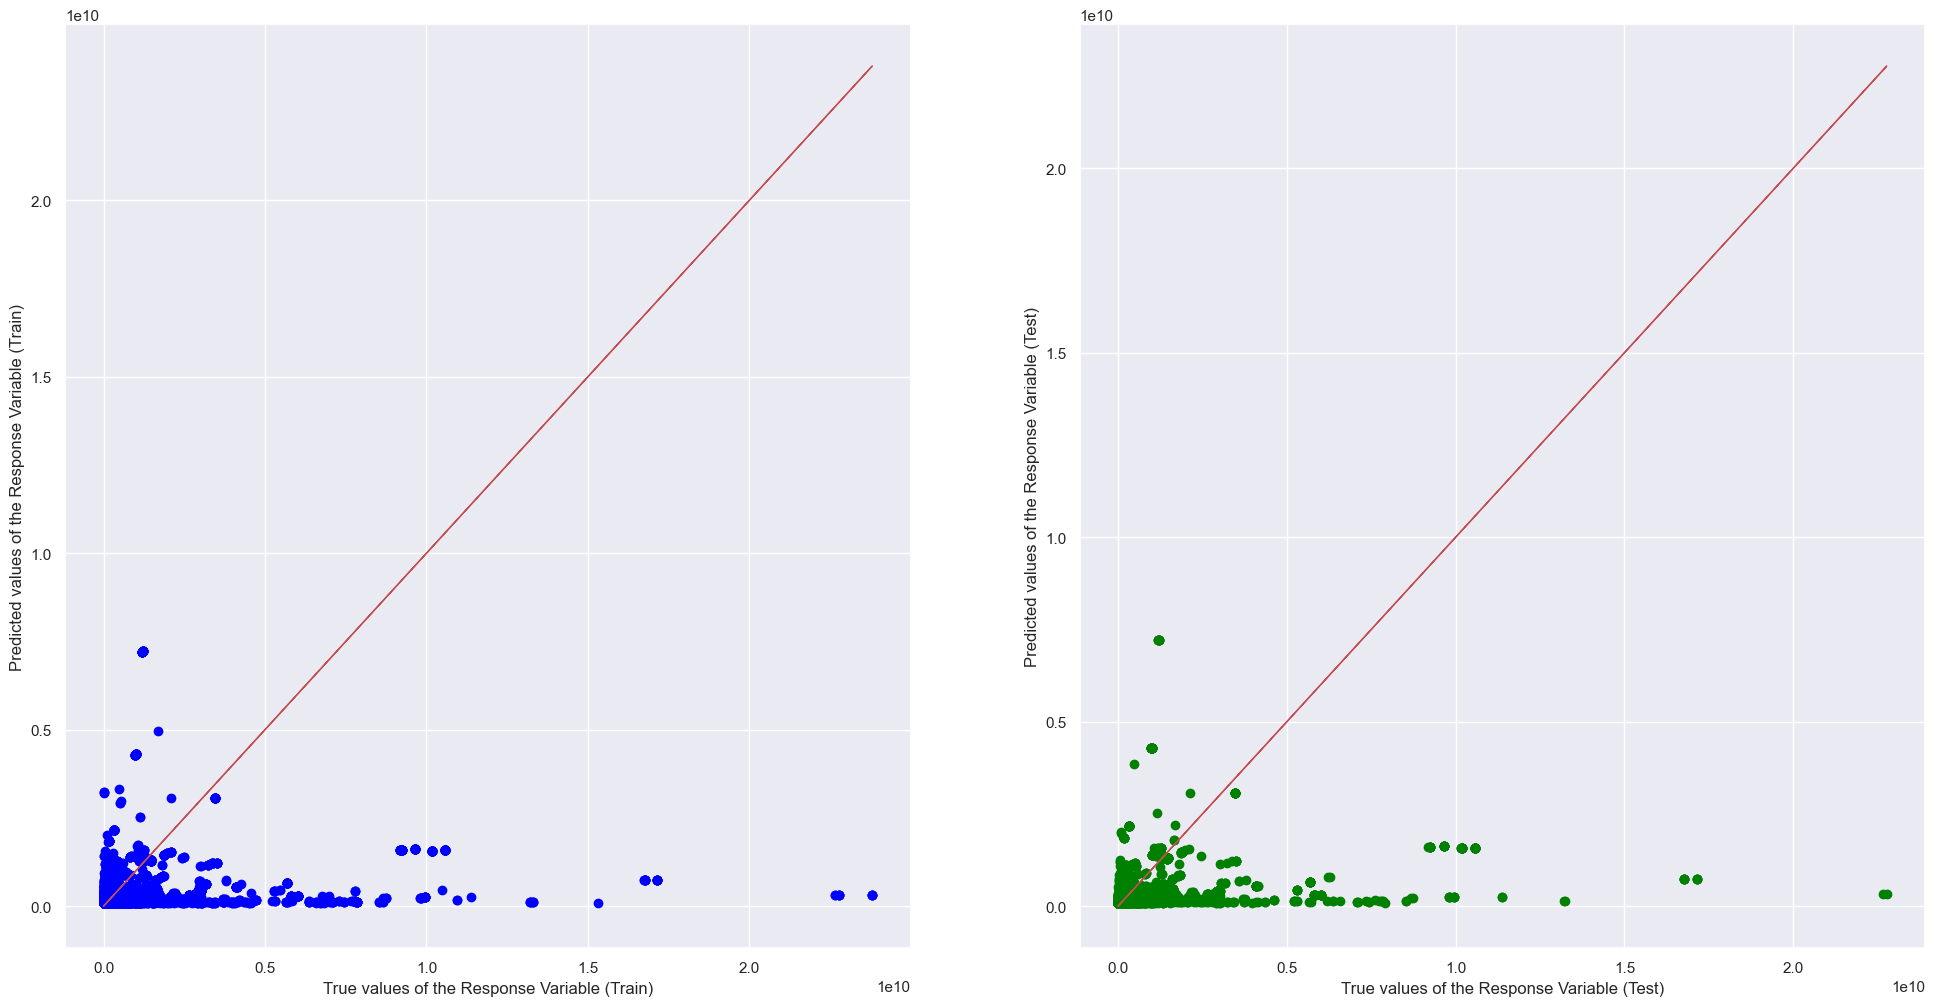

Film & Animation
Ridge Regression
Intercept of Regression 	: b =  [9626696.16892716]
Coefficients of Regression 	: a =  [[159171.02730962]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38754706925115534
Mean Squared Error (MSE) 	: 3.323156270564101e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4950842257046376
Mean Squared Error (MSE) 	: 2.7269012398927334e+17



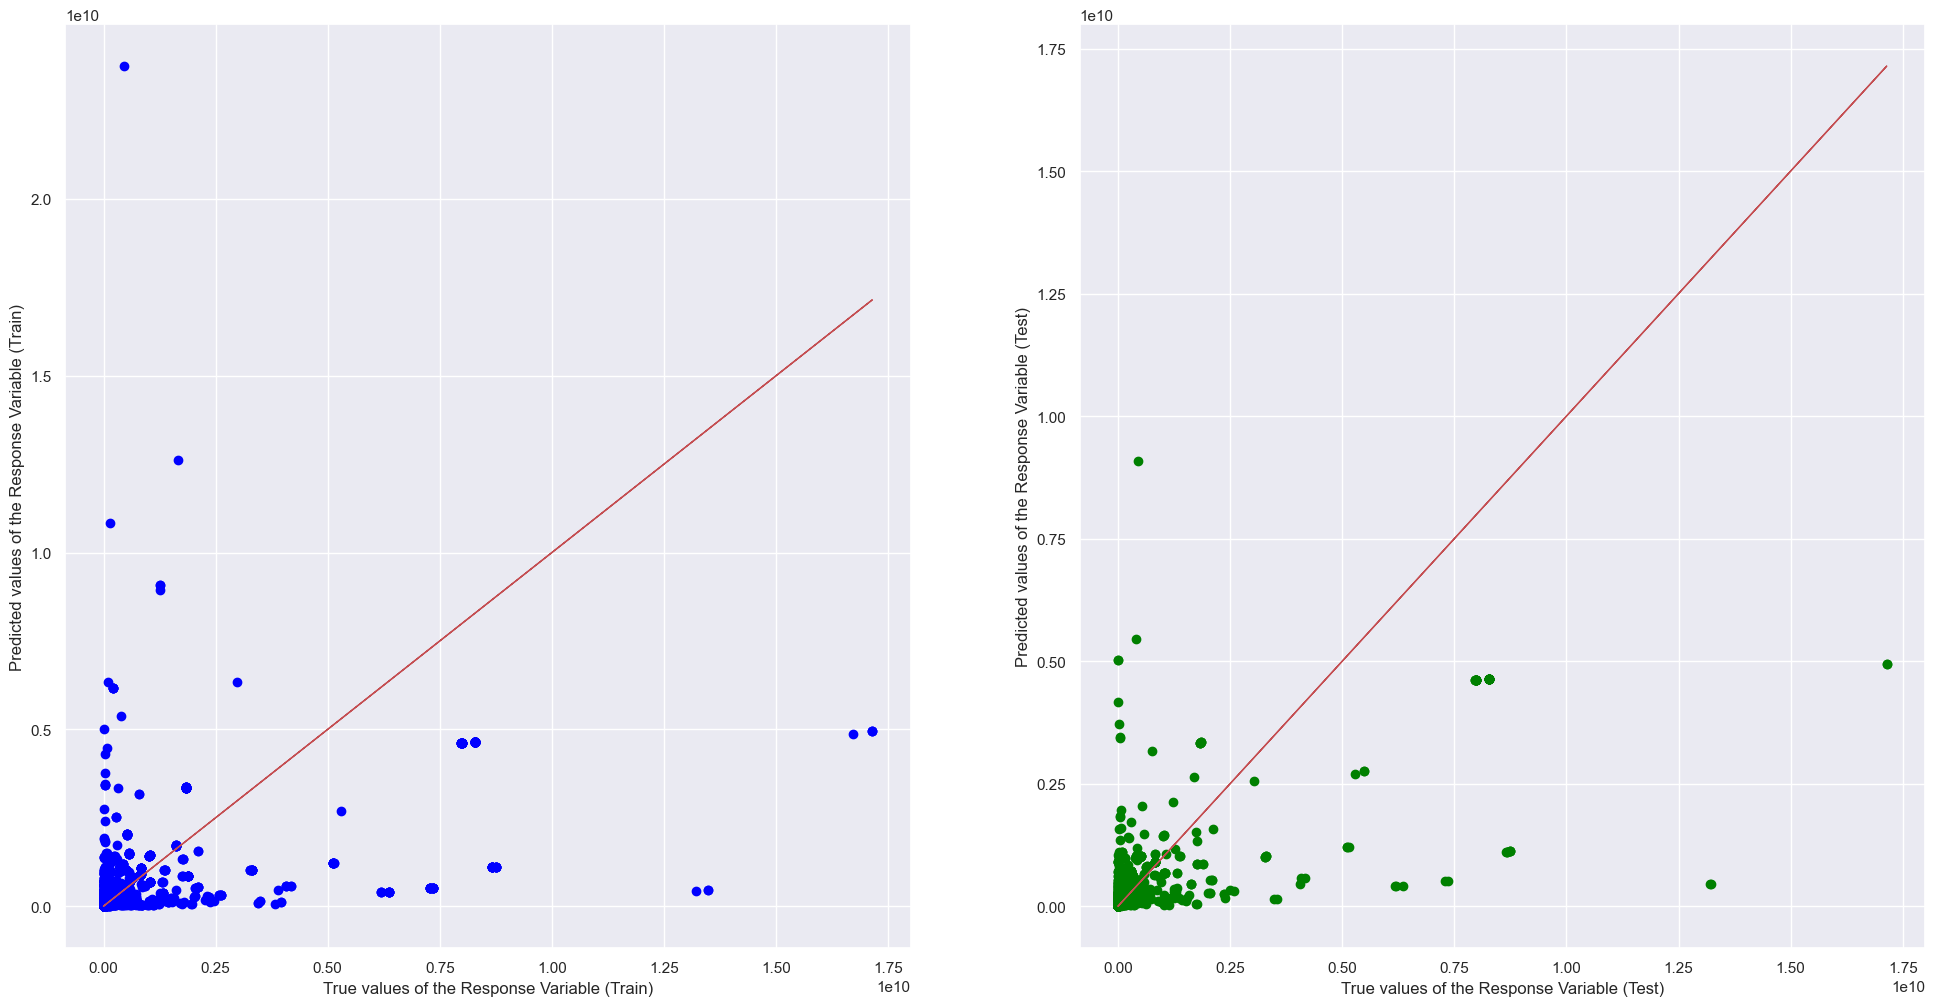

Gaming
Ridge Regression
Intercept of Regression 	: b =  [17773091.83168726]
Coefficients of Regression 	: a =  [[28672.97294758]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.12978747939417523
Mean Squared Error (MSE) 	: 5.444517758966407e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.07363345126456022
Mean Squared Error (MSE) 	: 6.497885696450669e+16



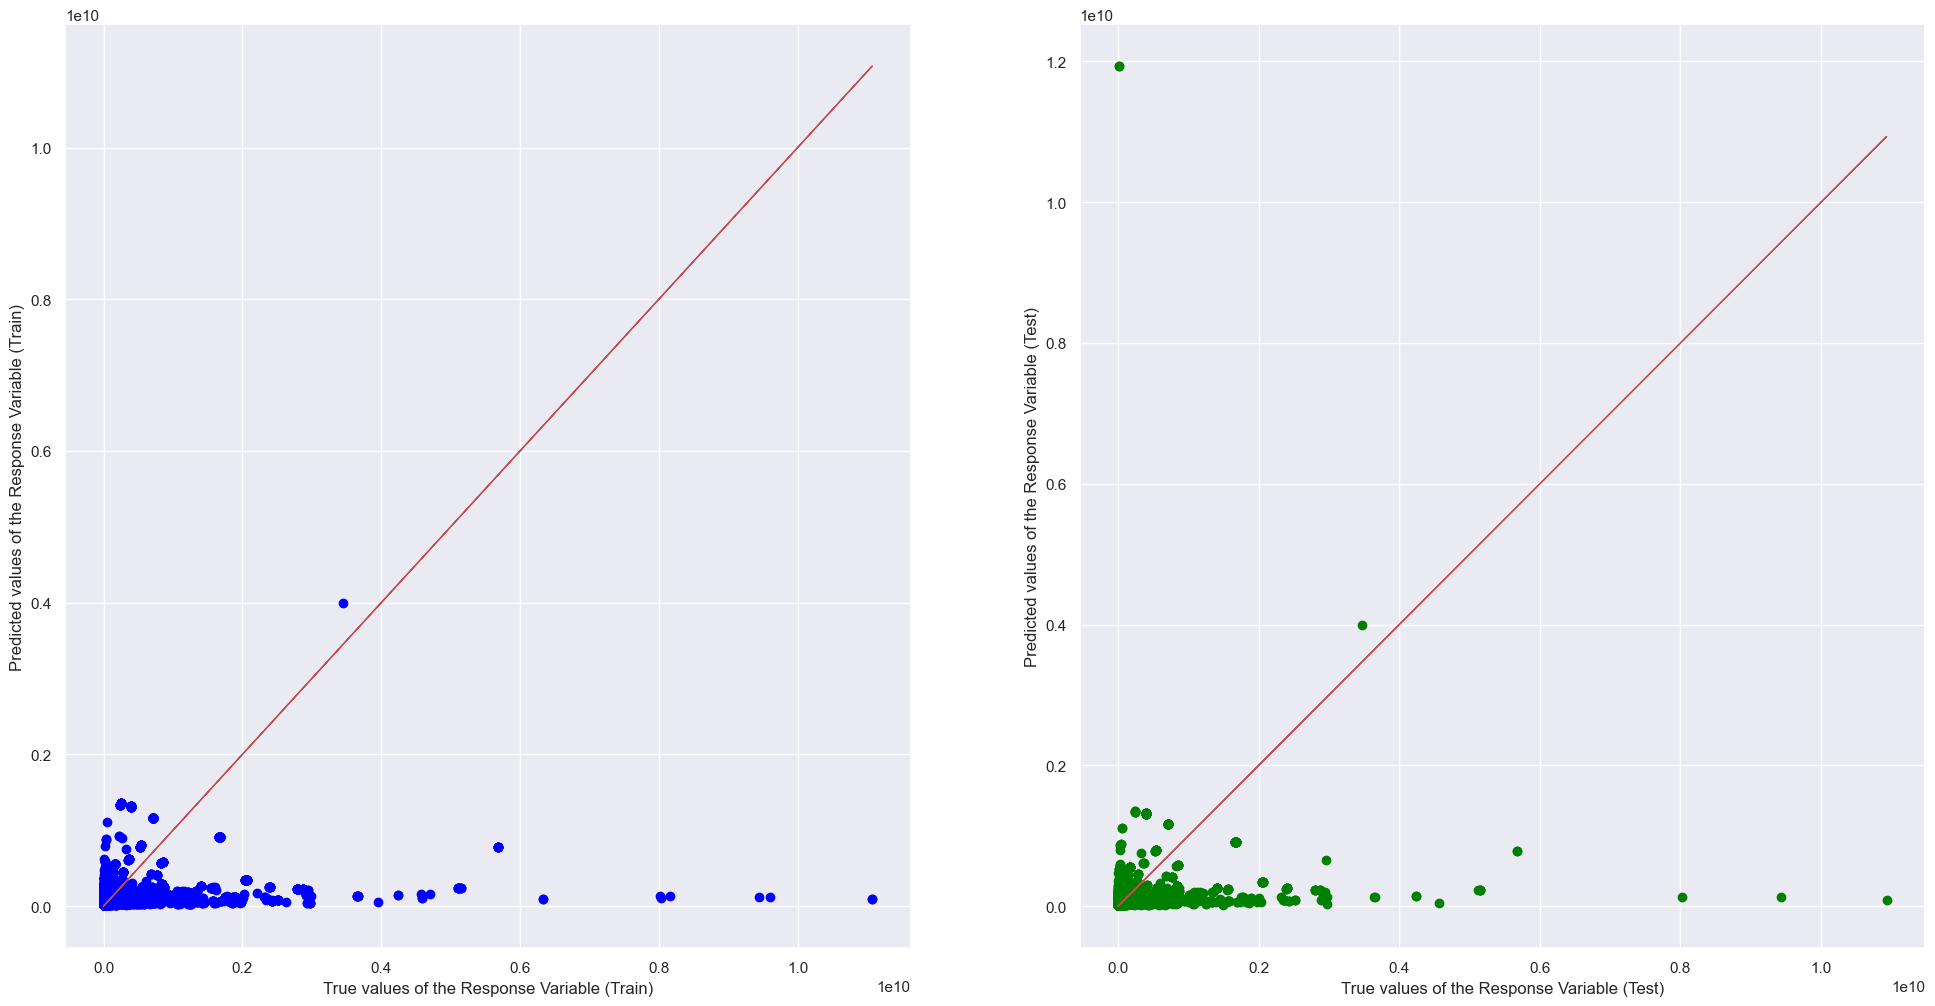

Howto & Style
Ridge Regression
Intercept of Regression 	: b =  [19797356.44953137]
Coefficients of Regression 	: a =  [[21400.19310511]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3744959353115853
Mean Squared Error (MSE) 	: 6.035880290756823e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5576577234492002
Mean Squared Error (MSE) 	: 4.7038005397282136e+16



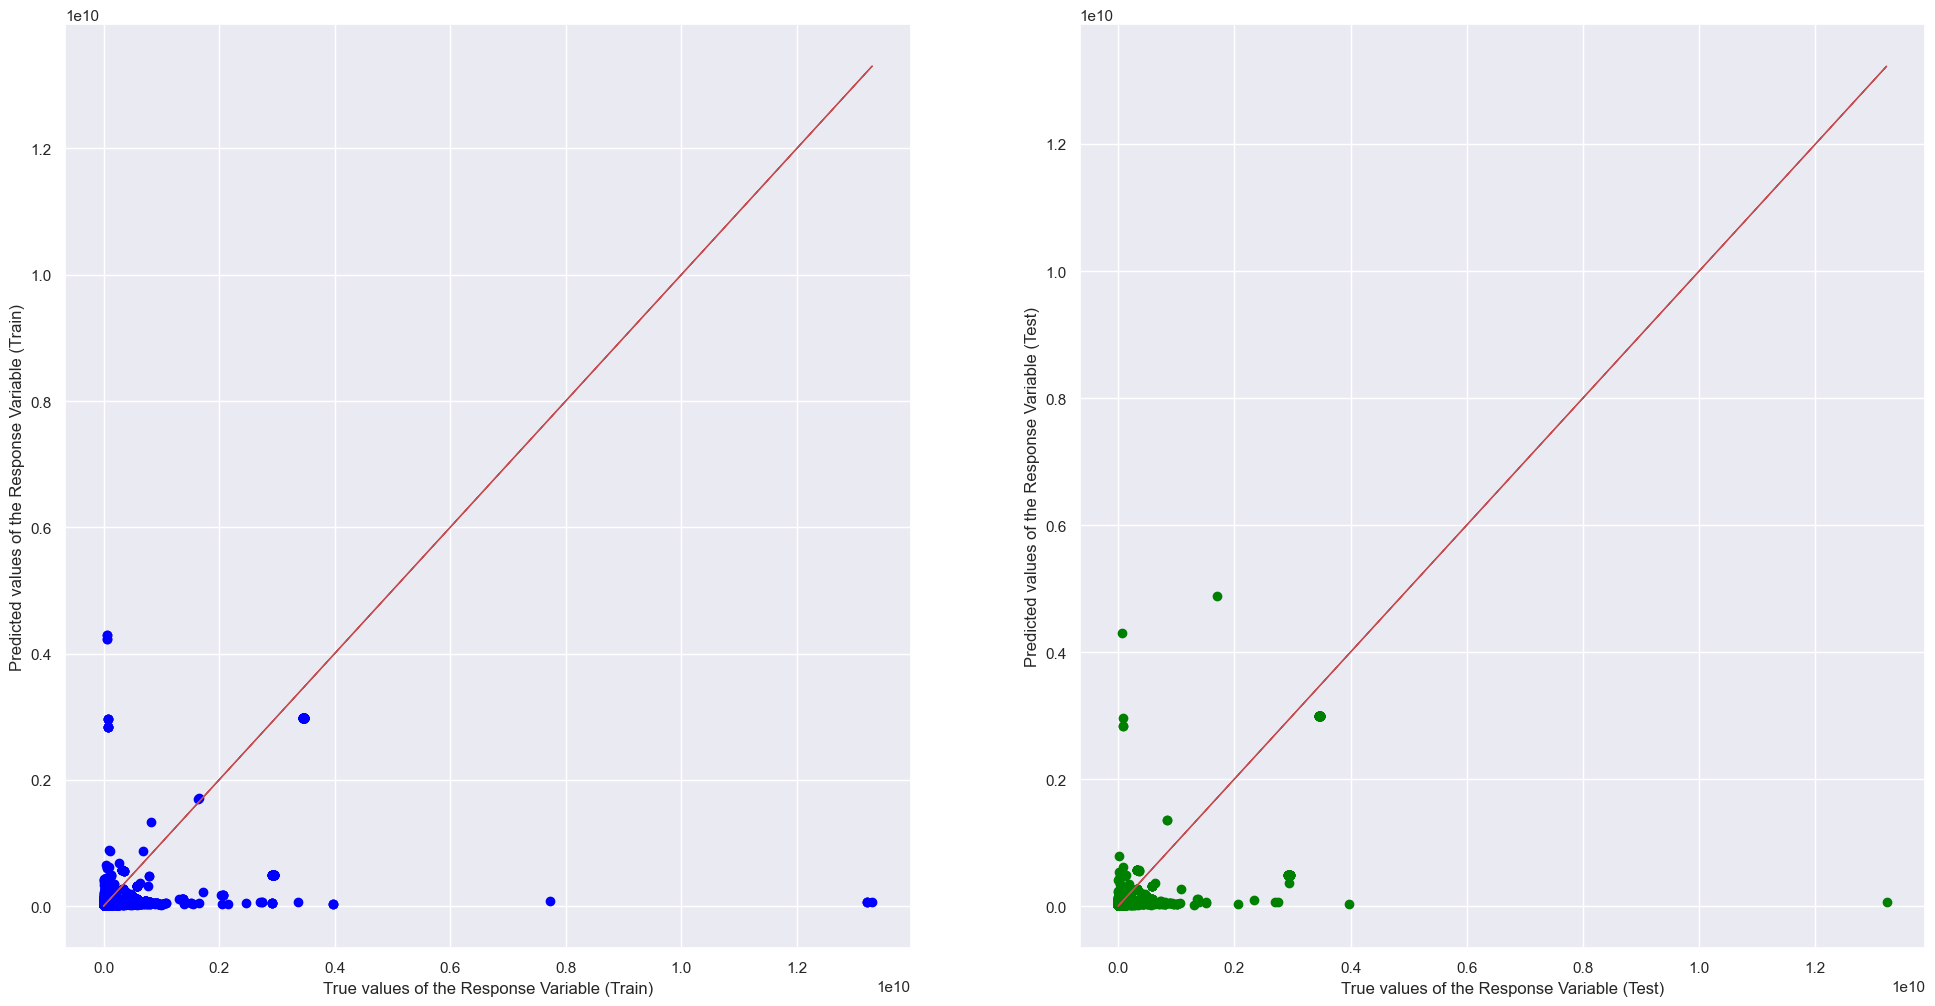

Movies
Ridge Regression
Intercept of Regression 	: b =  [-3468573.48523368]
Coefficients of Regression 	: a =  [[87714.05436647]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9999999999859147
Mean Squared Error (MSE) 	: 144.3752173731349

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -62.032682850594114
Mean Squared Error (MSE) 	: 1613349499636910.2



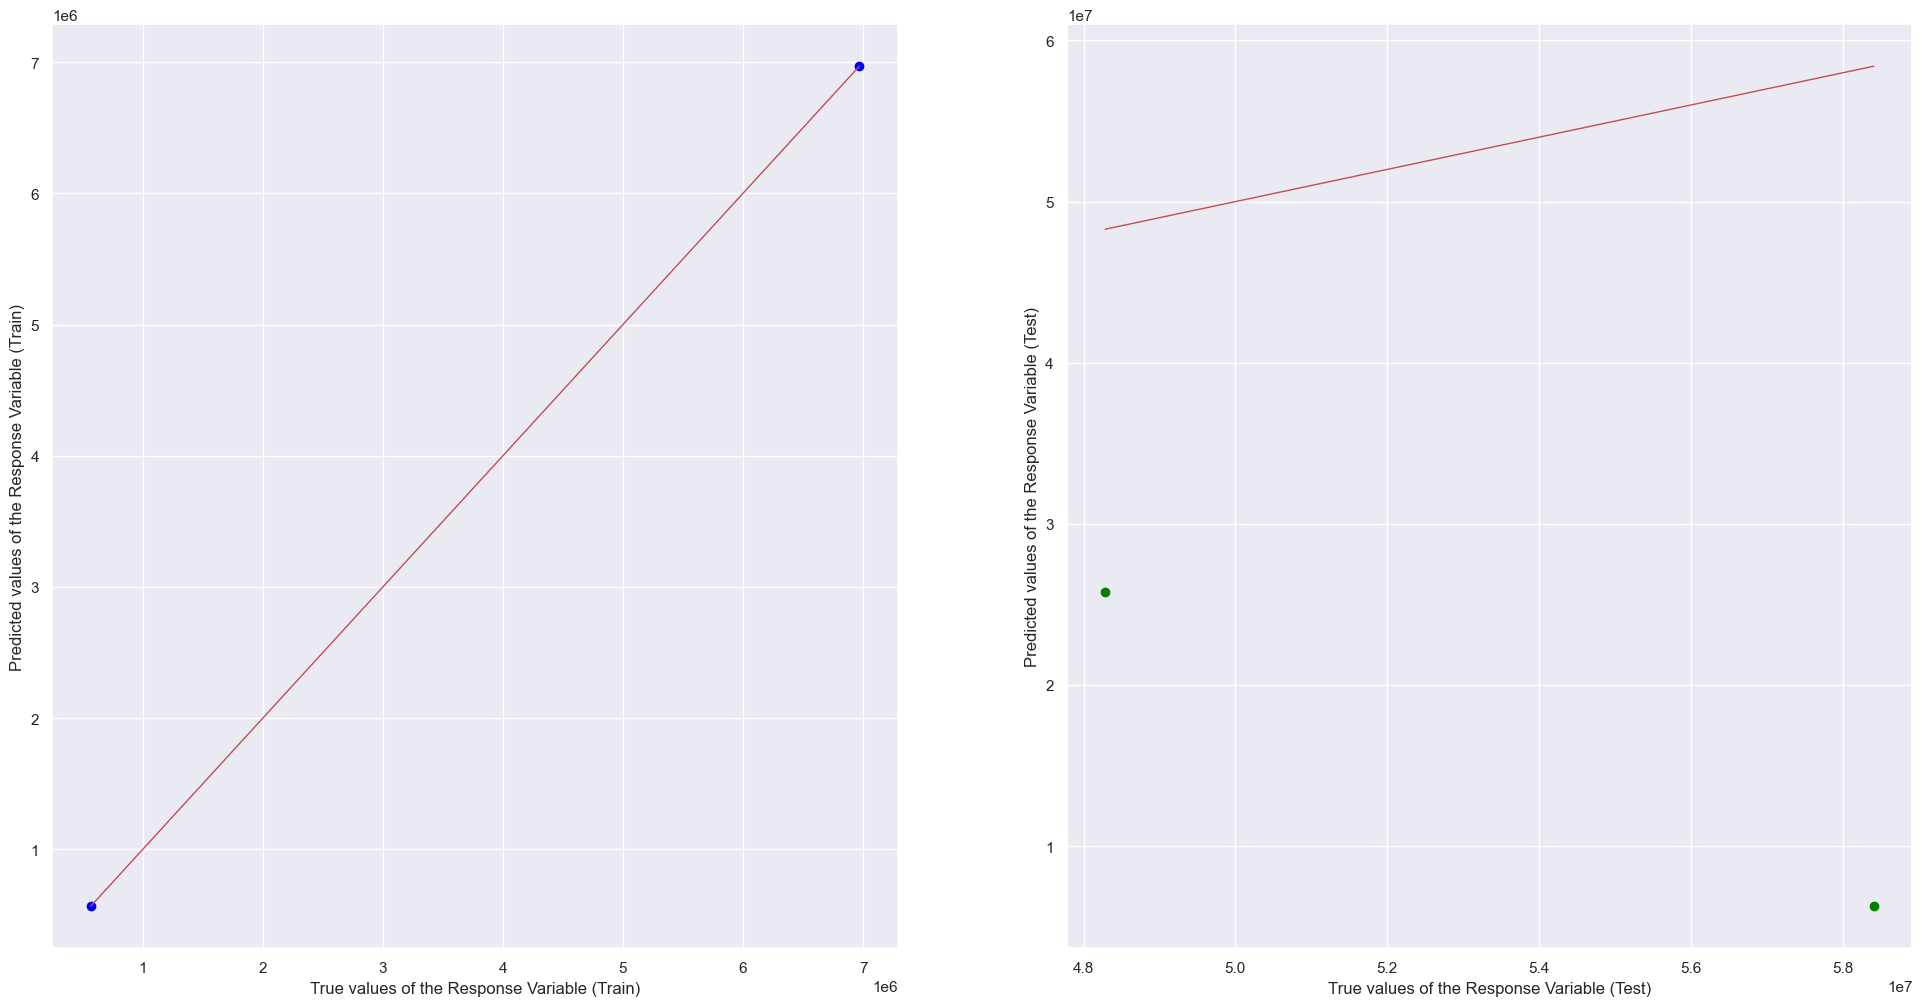

Music
Ridge Regression
Intercept of Regression 	: b =  [14433654.99989851]
Coefficients of Regression 	: a =  [[33628.55150676]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03740552483649551
Mean Squared Error (MSE) 	: 1.3134735974542118e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.02524879753858955
Mean Squared Error (MSE) 	: 1.0414761171792138e+17



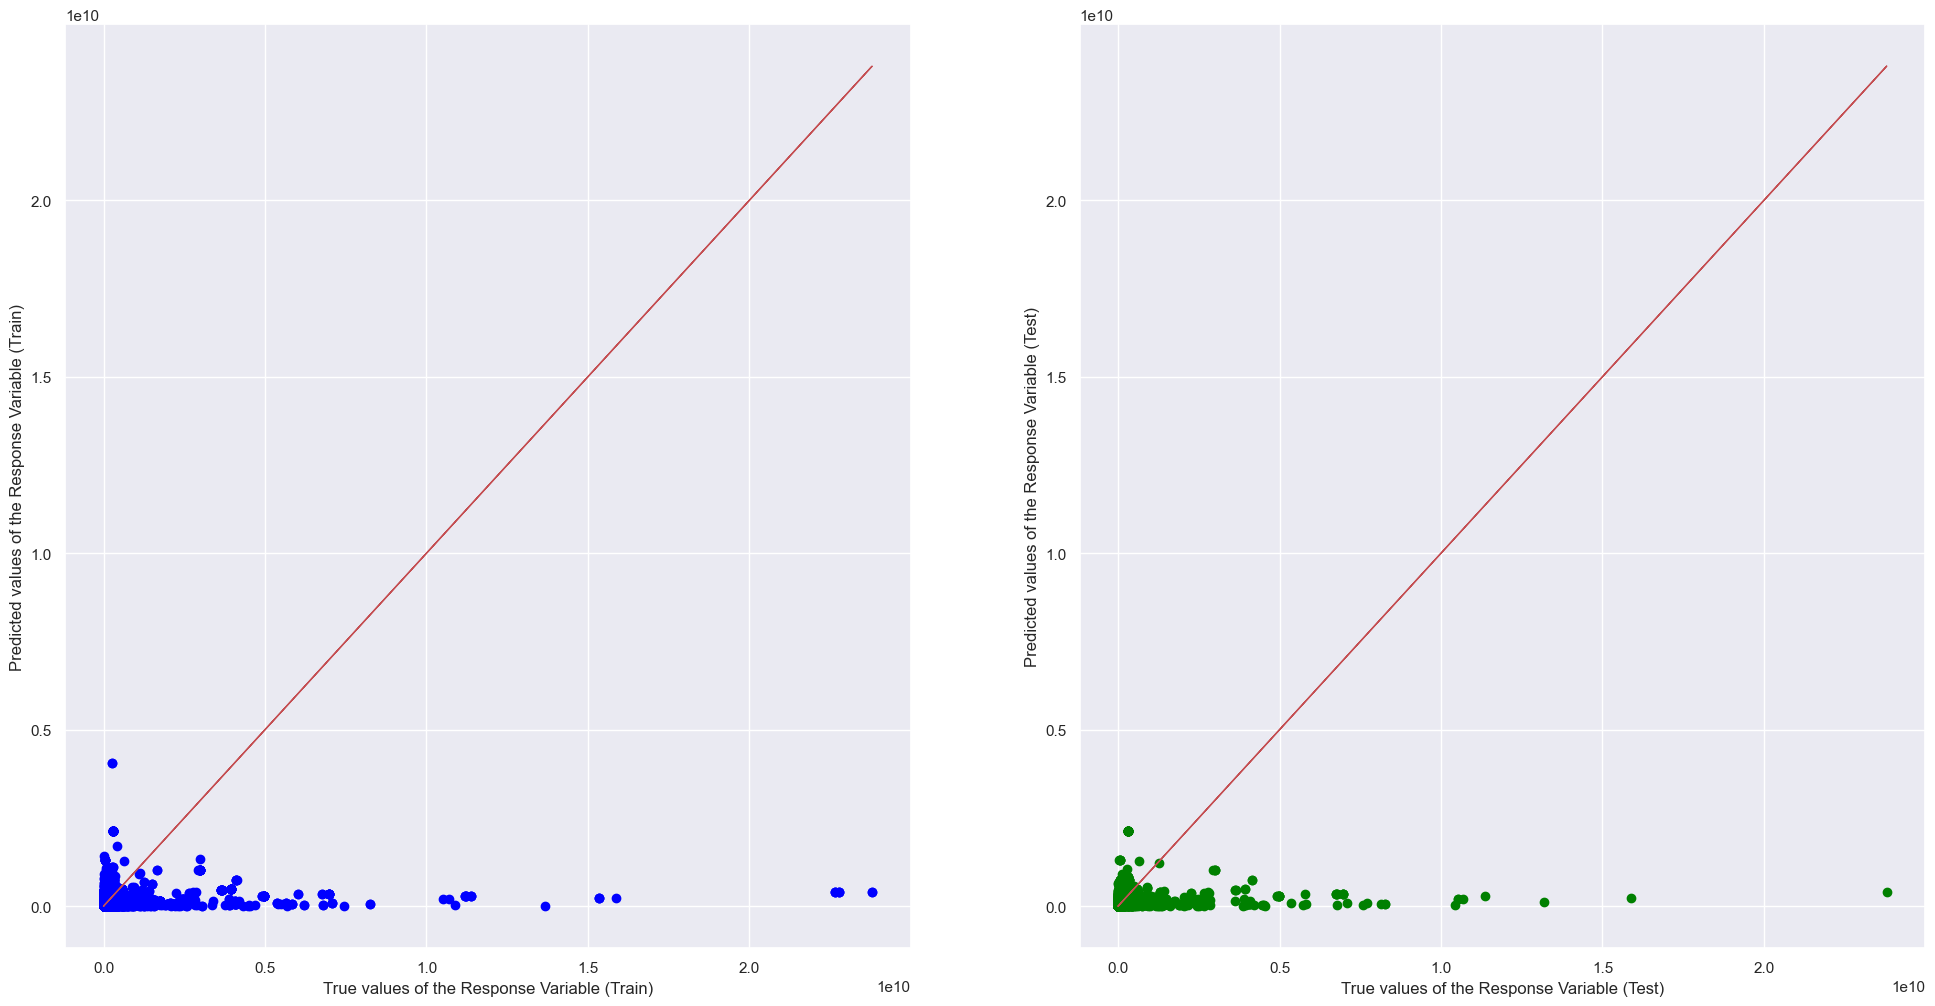

News & Politics
Ridge Regression
Intercept of Regression 	: b =  [42621914.09345959]
Coefficients of Regression 	: a =  [[7090.87426659]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.32617118457645755
Mean Squared Error (MSE) 	: 1.5048408543778698e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31541269710498465
Mean Squared Error (MSE) 	: 1.4098026046893544e+17



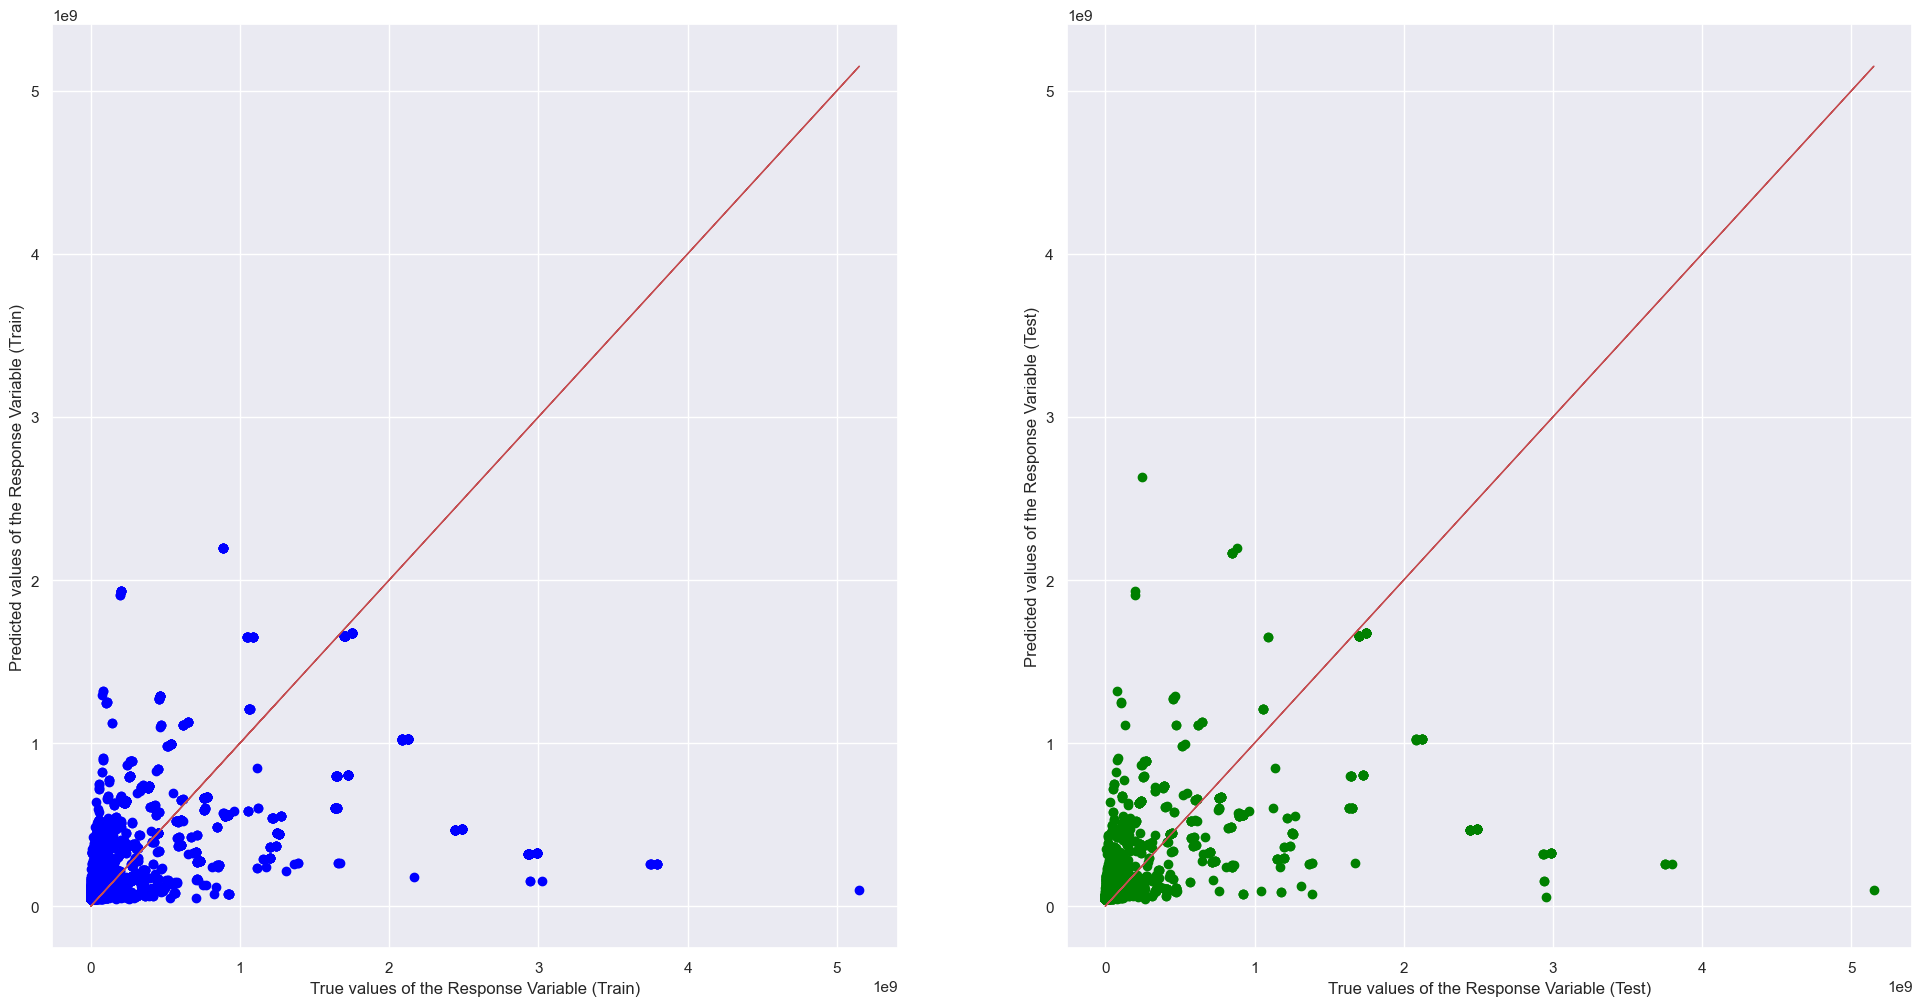

People & Blogs
Ridge Regression
Intercept of Regression 	: b =  [6610138.37073542]
Coefficients of Regression 	: a =  [[6679.61279451]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01420283696571234
Mean Squared Error (MSE) 	: 1.7065410672017274e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.010448445339248158
Mean Squared Error (MSE) 	: 9460111677872888.0



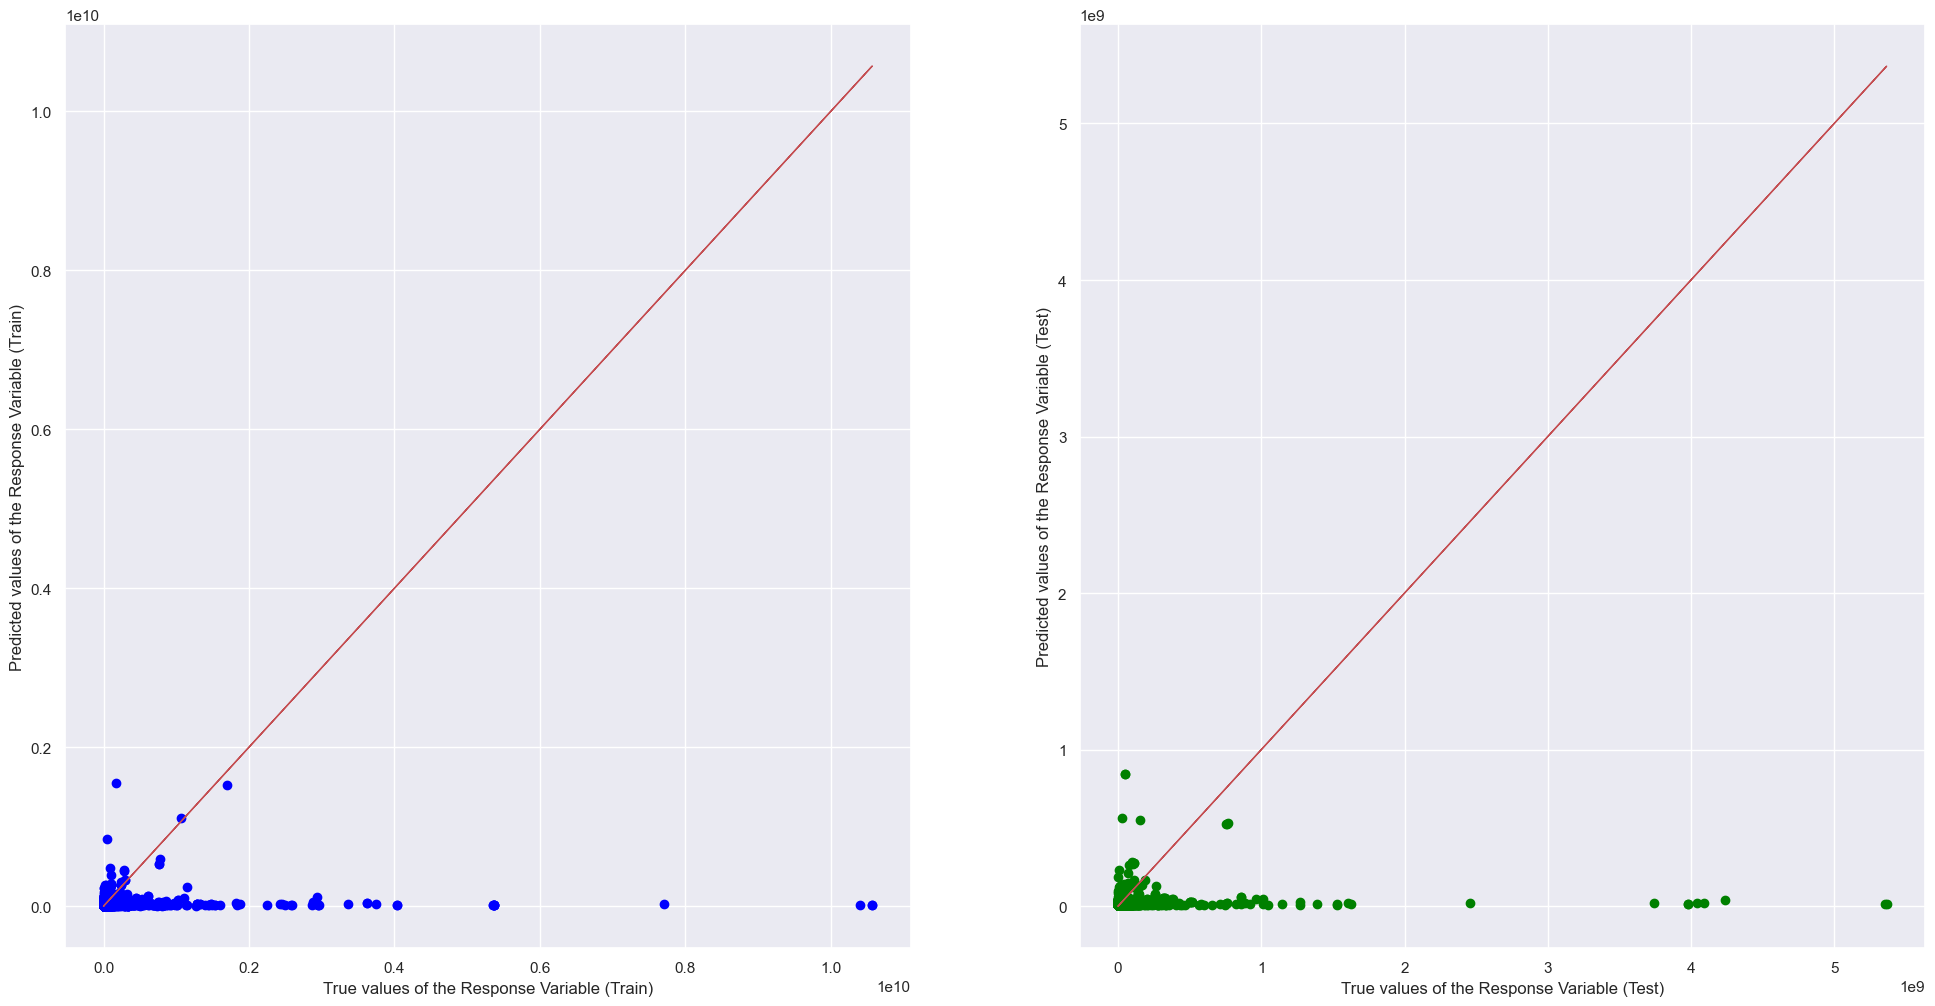

Pets & Animals
Ridge Regression
Intercept of Regression 	: b =  [101342.27059477]
Coefficients of Regression 	: a =  [[22747.77314347]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5901961322496903
Mean Squared Error (MSE) 	: 4714198893374896.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.36179057833806516
Mean Squared Error (MSE) 	: 1.9739792153088852e+16



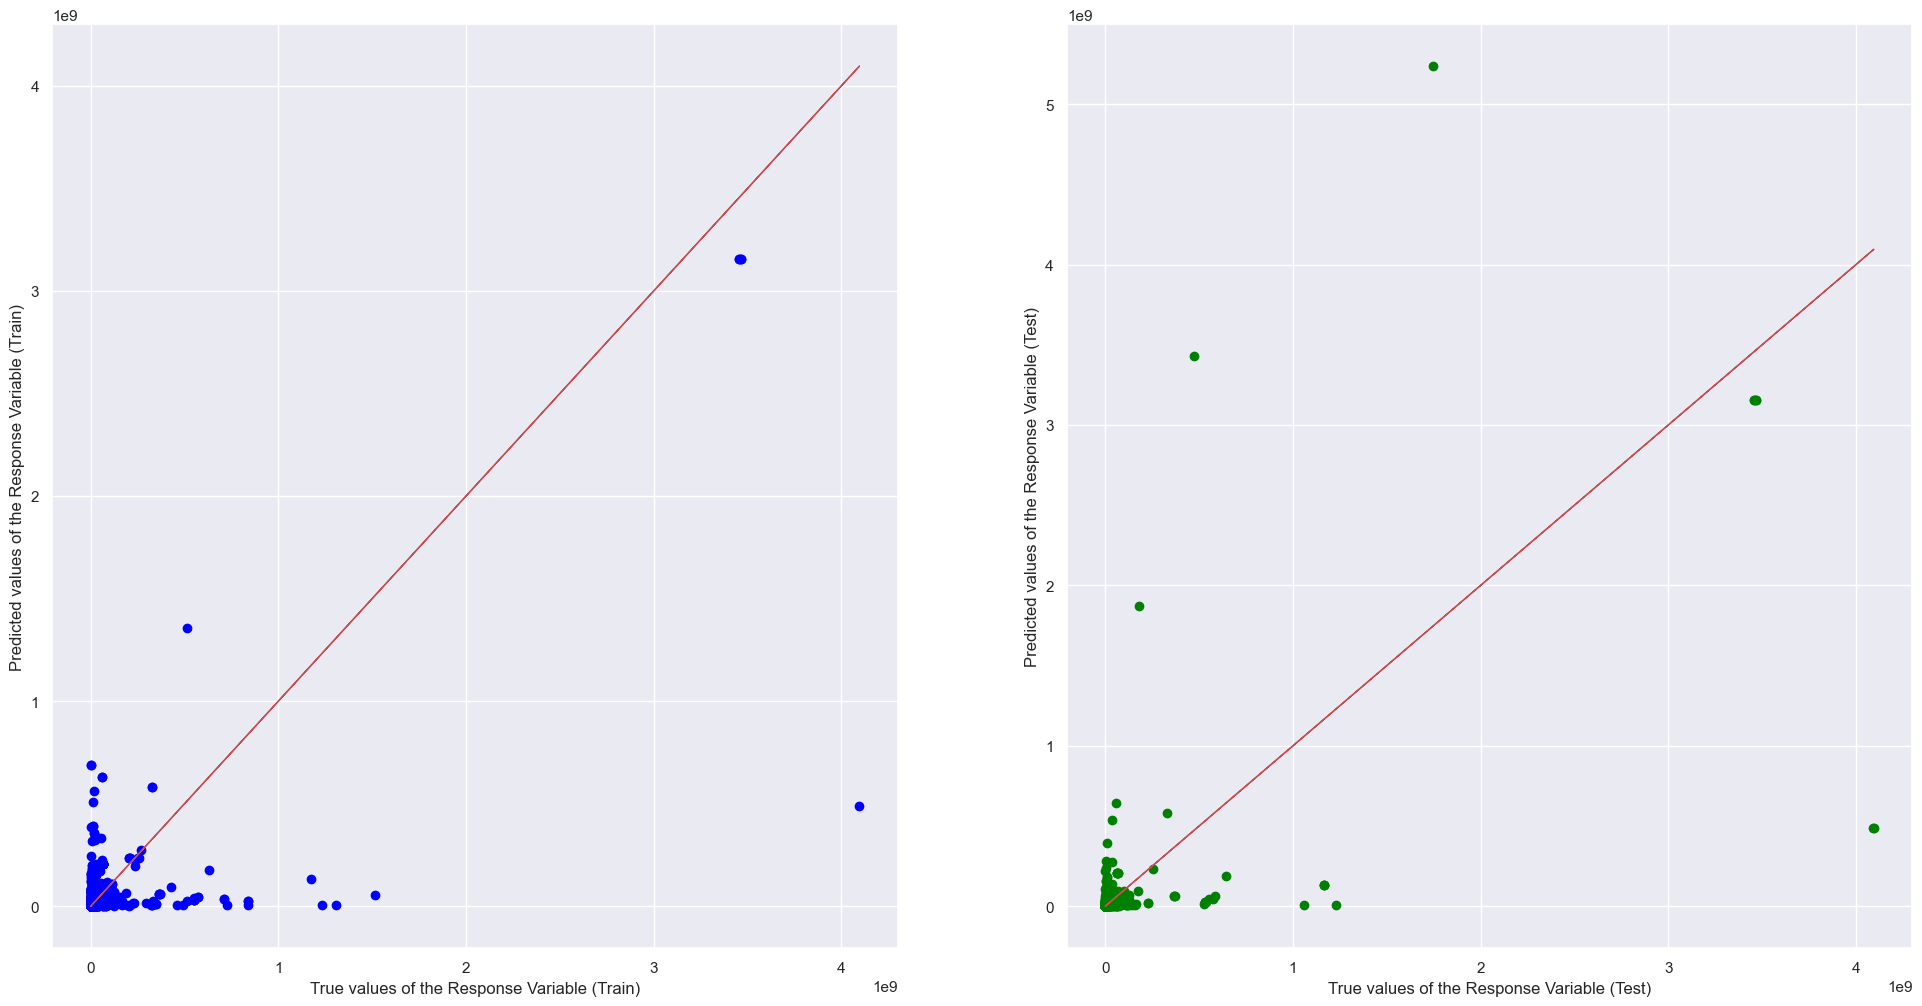

Science & Technology
Ridge Regression
Intercept of Regression 	: b =  [8711888.23256416]
Coefficients of Regression 	: a =  [[23634.75217634]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38359165407053997
Mean Squared Error (MSE) 	: 1.4065925164063332e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4874194157520514
Mean Squared Error (MSE) 	: 7919077003040412.0



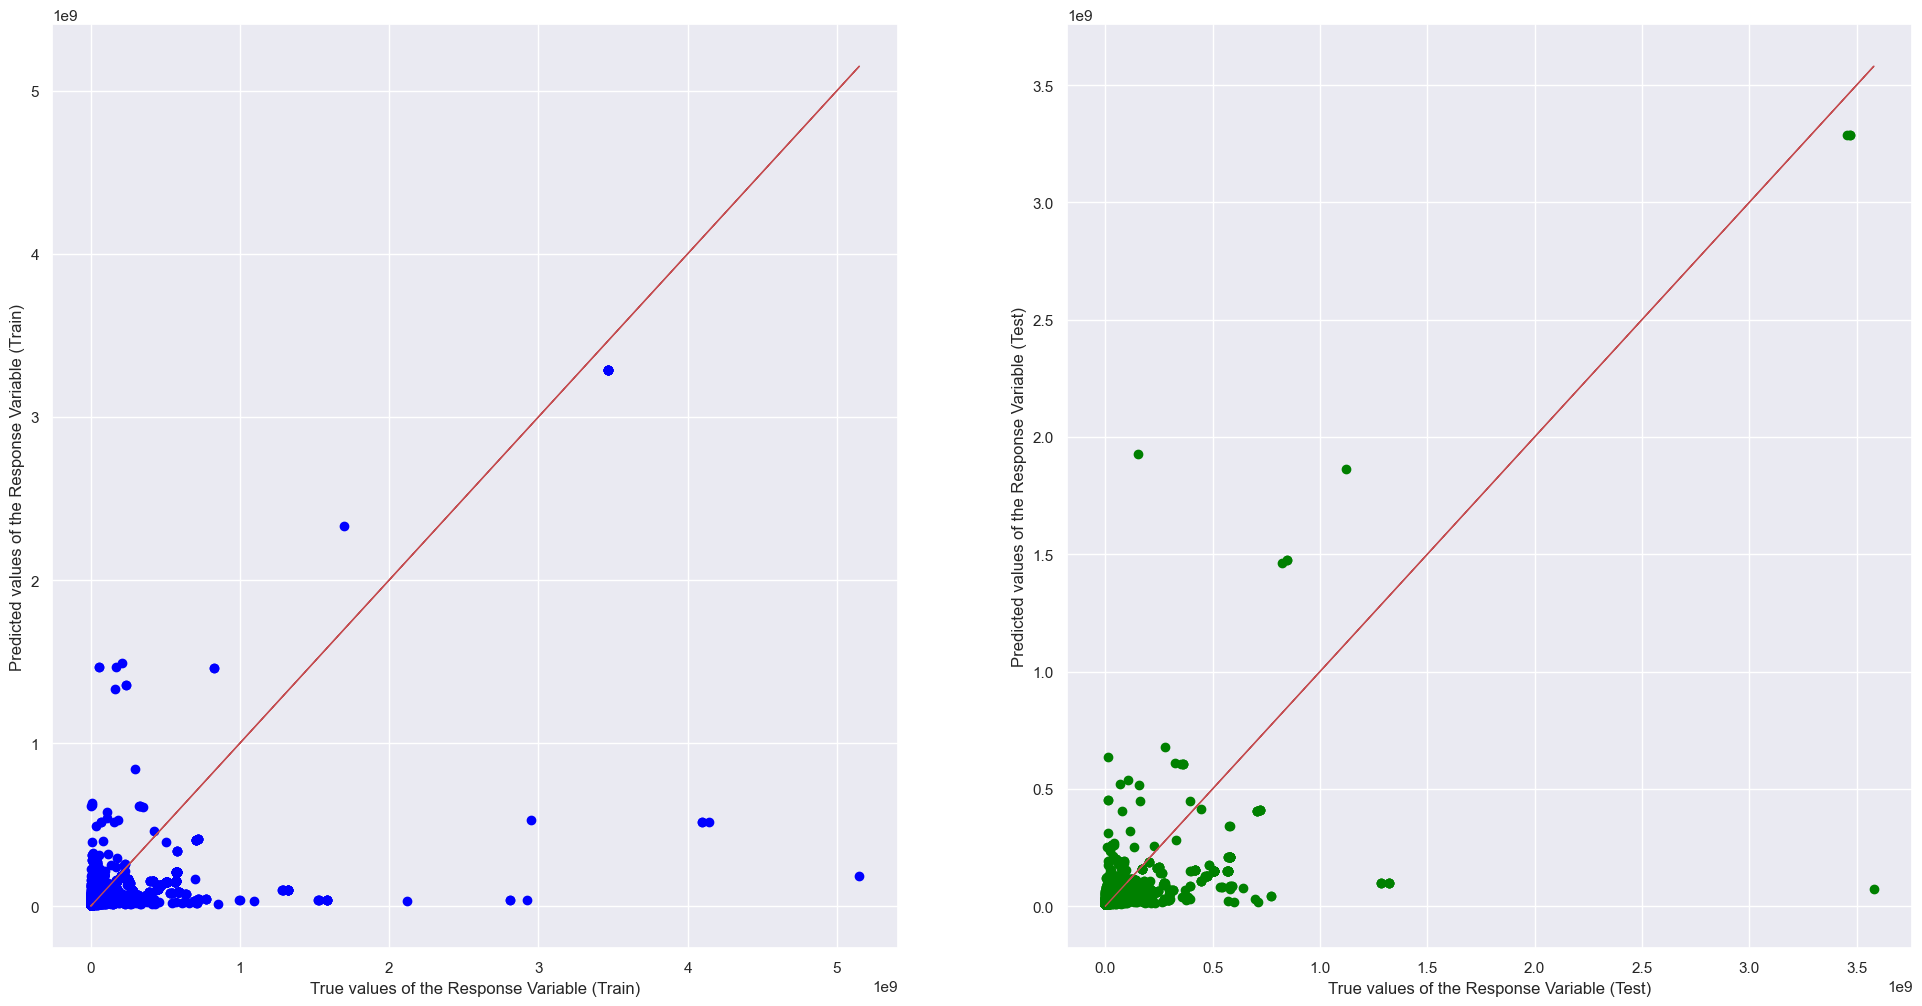

Shows
Ridge Regression
Intercept of Regression 	: b =  [5.98711938e+08]
Coefficients of Regression 	: a =  [[39885.2187782]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09632130747911316
Mean Squared Error (MSE) 	: 5.708131535492646e+18

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11766828187532785
Mean Squared Error (MSE) 	: 3.978416267072615e+18



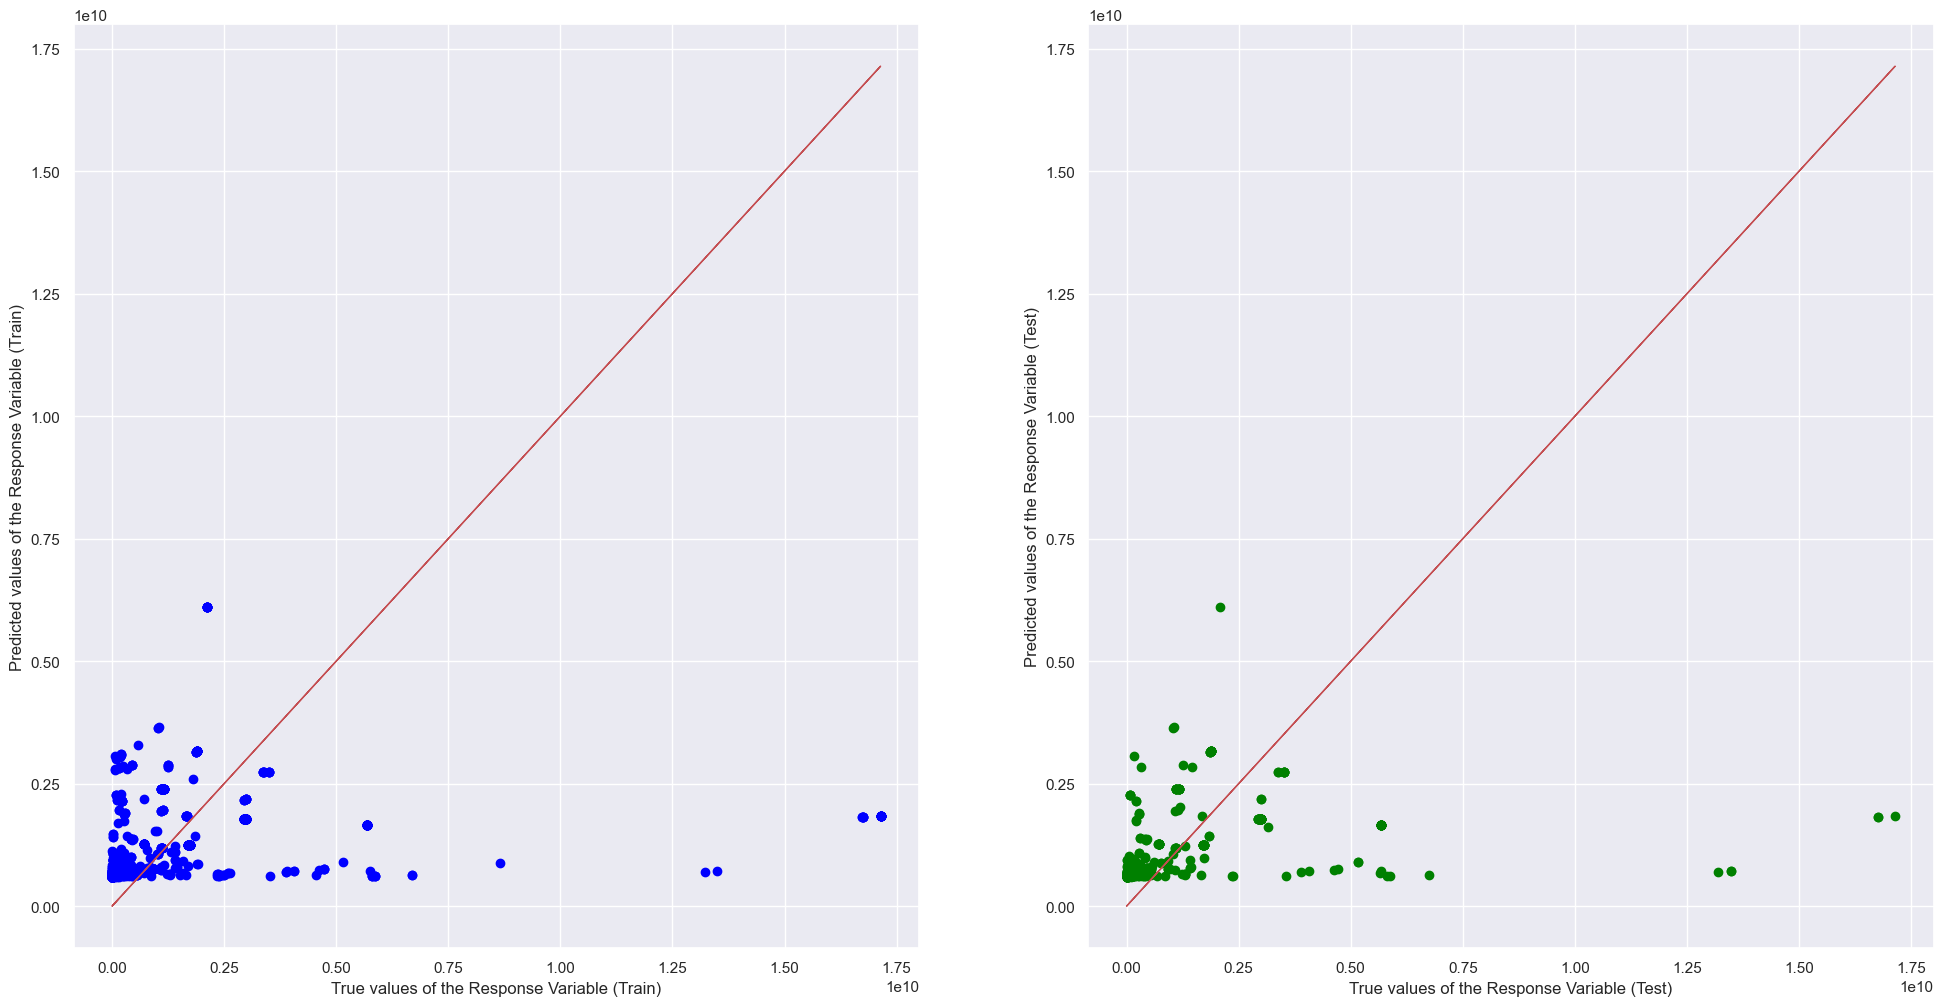

Sports
Ridge Regression
Intercept of Regression 	: b =  [7054403.41676001]
Coefficients of Regression 	: a =  [[20071.47011792]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07615780055093546
Mean Squared Error (MSE) 	: 2.2878029457431613e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07784332484243772
Mean Squared Error (MSE) 	: 2.542783502315523e+17



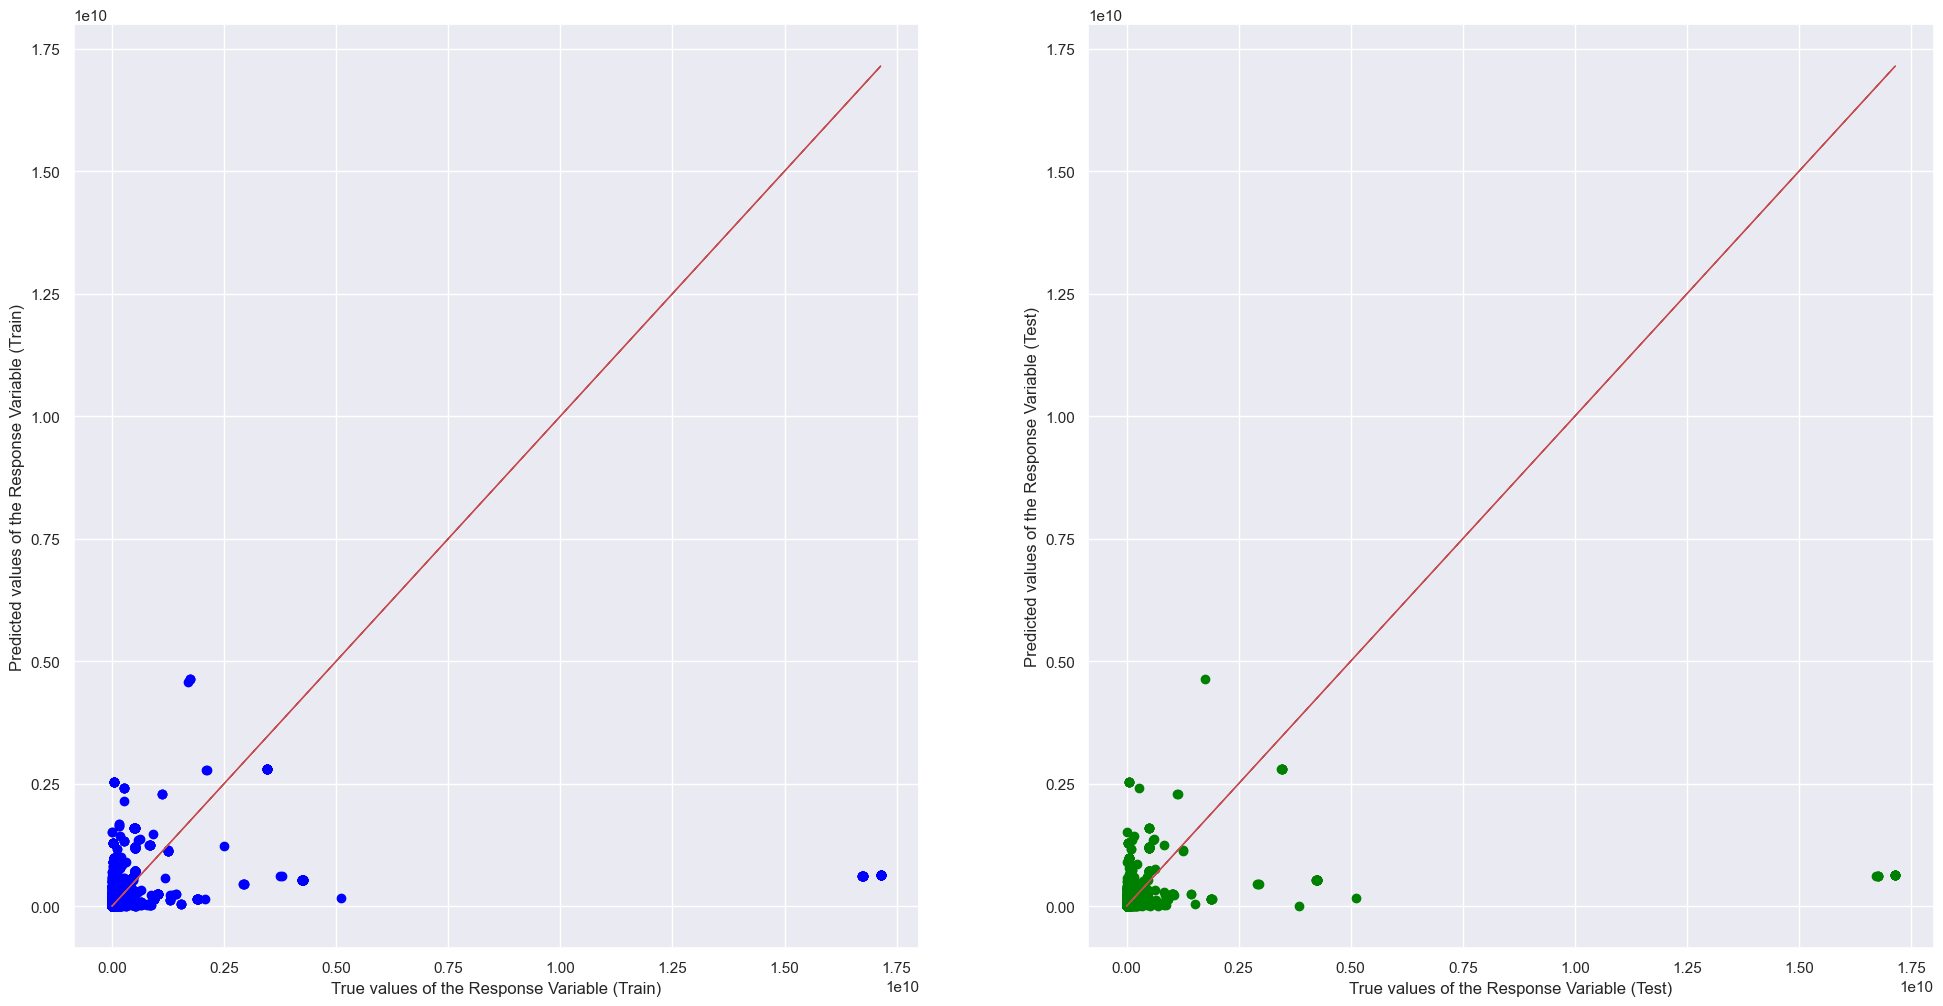

Trailers
Ridge Regression
Intercept of Regression 	: b =  [24837016.05281042]
Coefficients of Regression 	: a =  [[23890.57942412]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0592793776900391
Mean Squared Error (MSE) 	: 4.4019779122244856e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16361332884569602
Mean Squared Error (MSE) 	: 8.842246733472128e+16



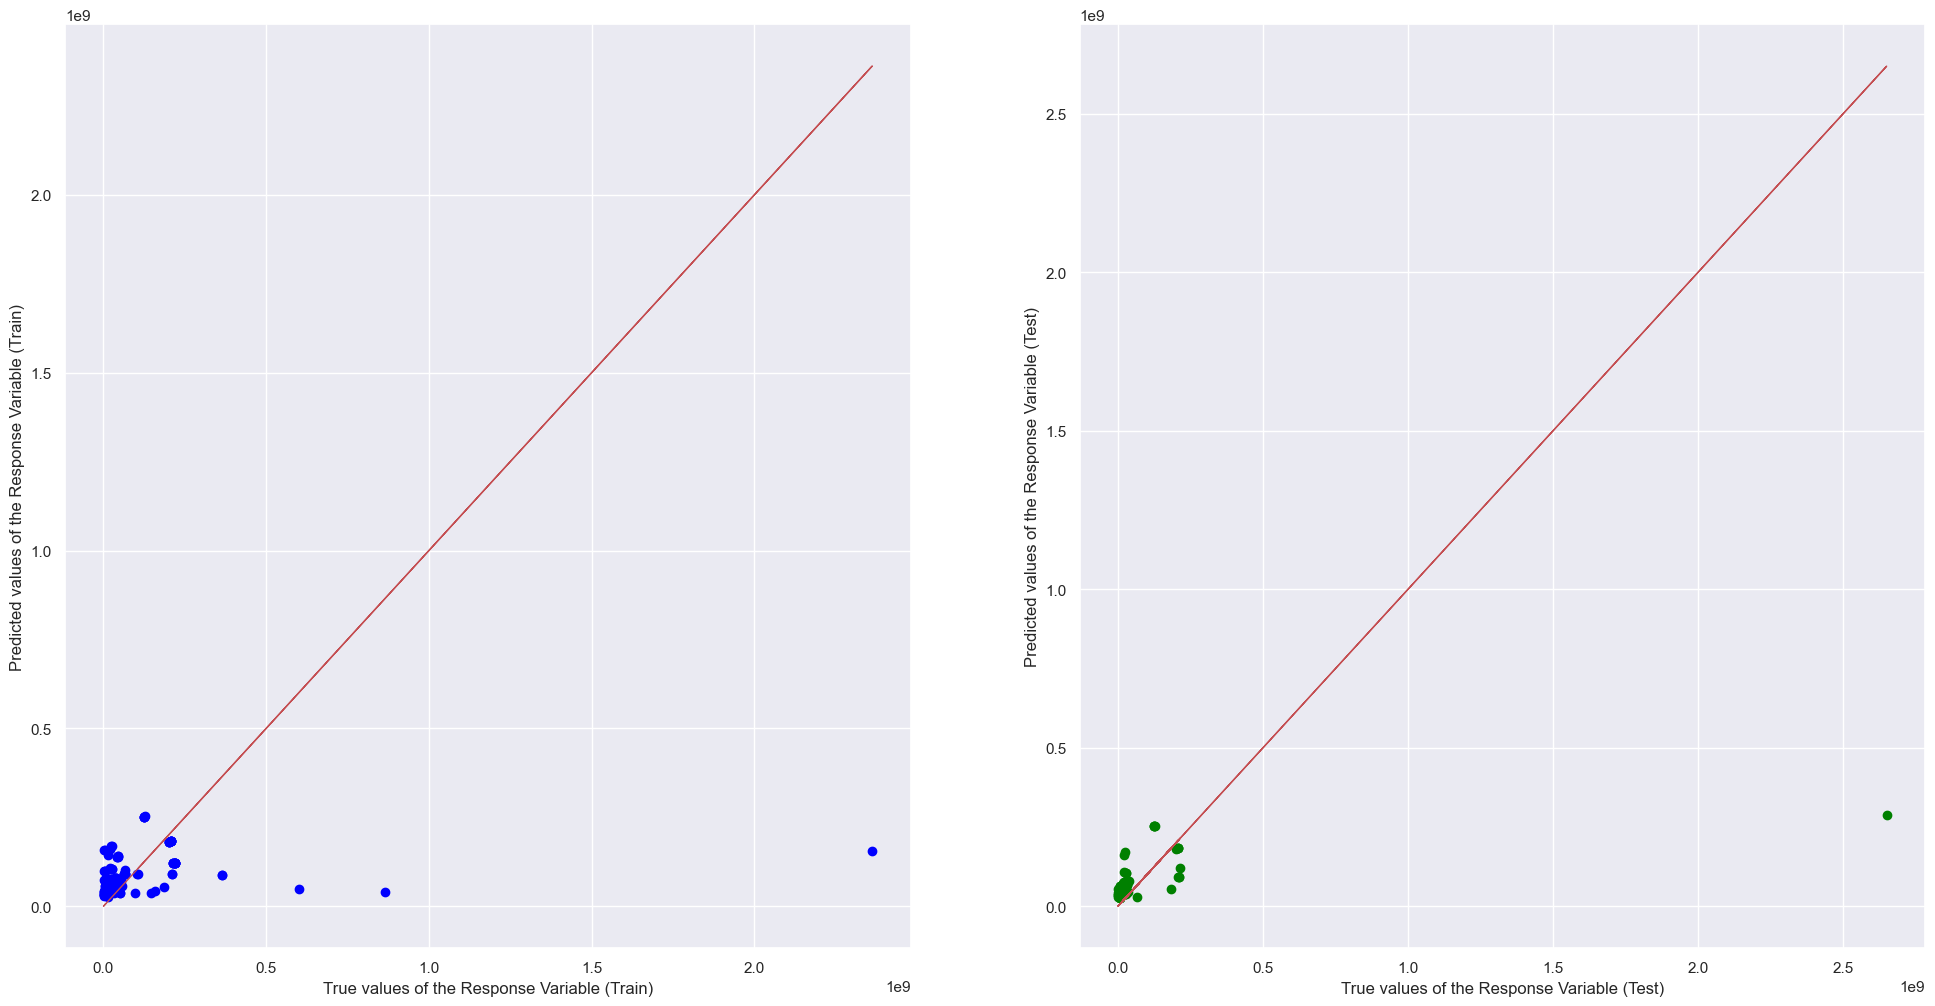

Average Train R^2: 	: 0.24908566225823964
Average Train MSE: 	: 4.698430574848398e+17
Average Test R^2: 	: -3.6931312079499
Average Test MSE: 	: 3.6061792577344666e+17


In [44]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=1
for i in range (0,16):
    print(Genre[i])
    predictorStr = 'videoCount'
    ridgeRegression(Genre[i], predictorStr, flag)
    

print("Average Train R^2: \t:",Average(trainr2))
print("Average Train MSE: \t:",Average(trainmse))
print("Average Test R^2: \t:",Average(testr2))
print("Average Test MSE: \t:",Average(testmse))

#### Lasso Regression

Autos & Vehicles
Lasso Regression
Intercept of Regression 	: b =  [4617225.77510905]
Coefficients of Regression 	: a =  [11414.03763427]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2784331467290866
Mean Squared Error (MSE) 	: 4745902904357211.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2149445135346867
Mean Squared Error (MSE) 	: 3828616877386233.5



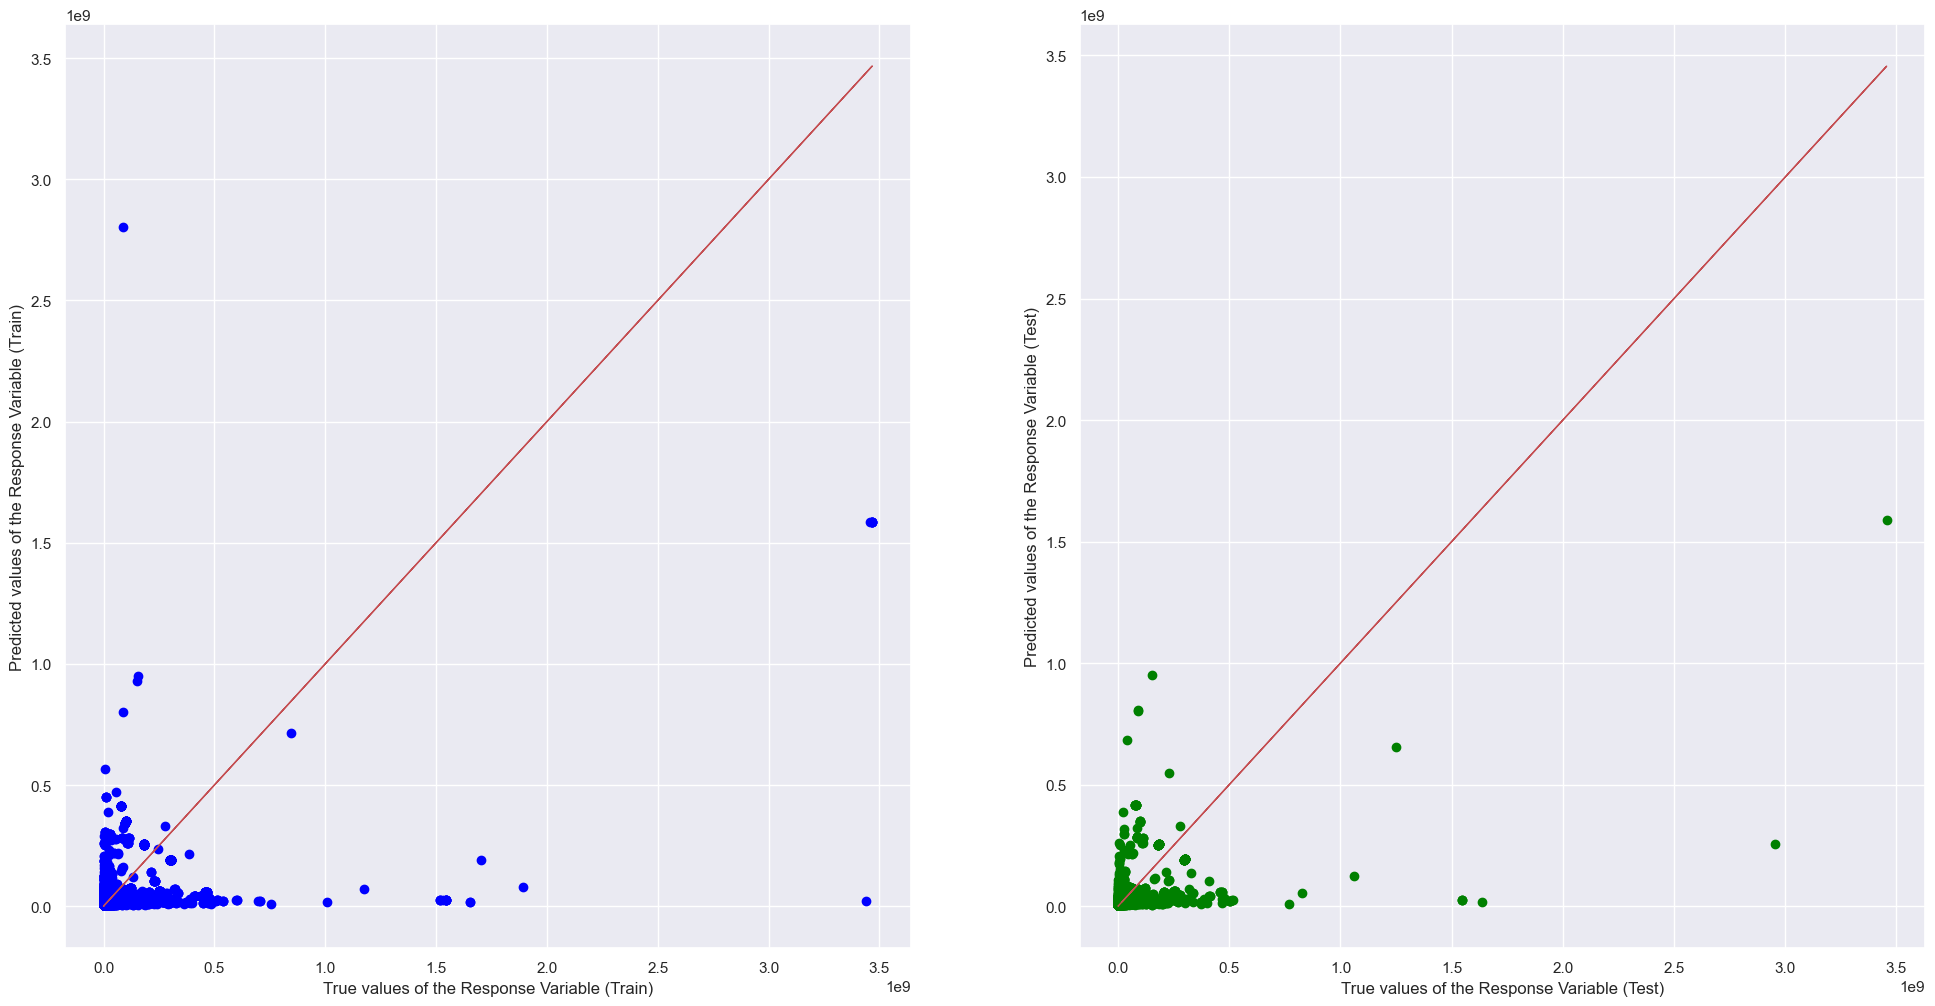

Comedy
Lasso Regression
Intercept of Regression 	: b =  [19336239.87112394]
Coefficients of Regression 	: a =  [50591.79661476]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09584006775839904
Mean Squared Error (MSE) 	: 8.944589714919179e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08293886256056715
Mean Squared Error (MSE) 	: 1.3234301491917307e+17



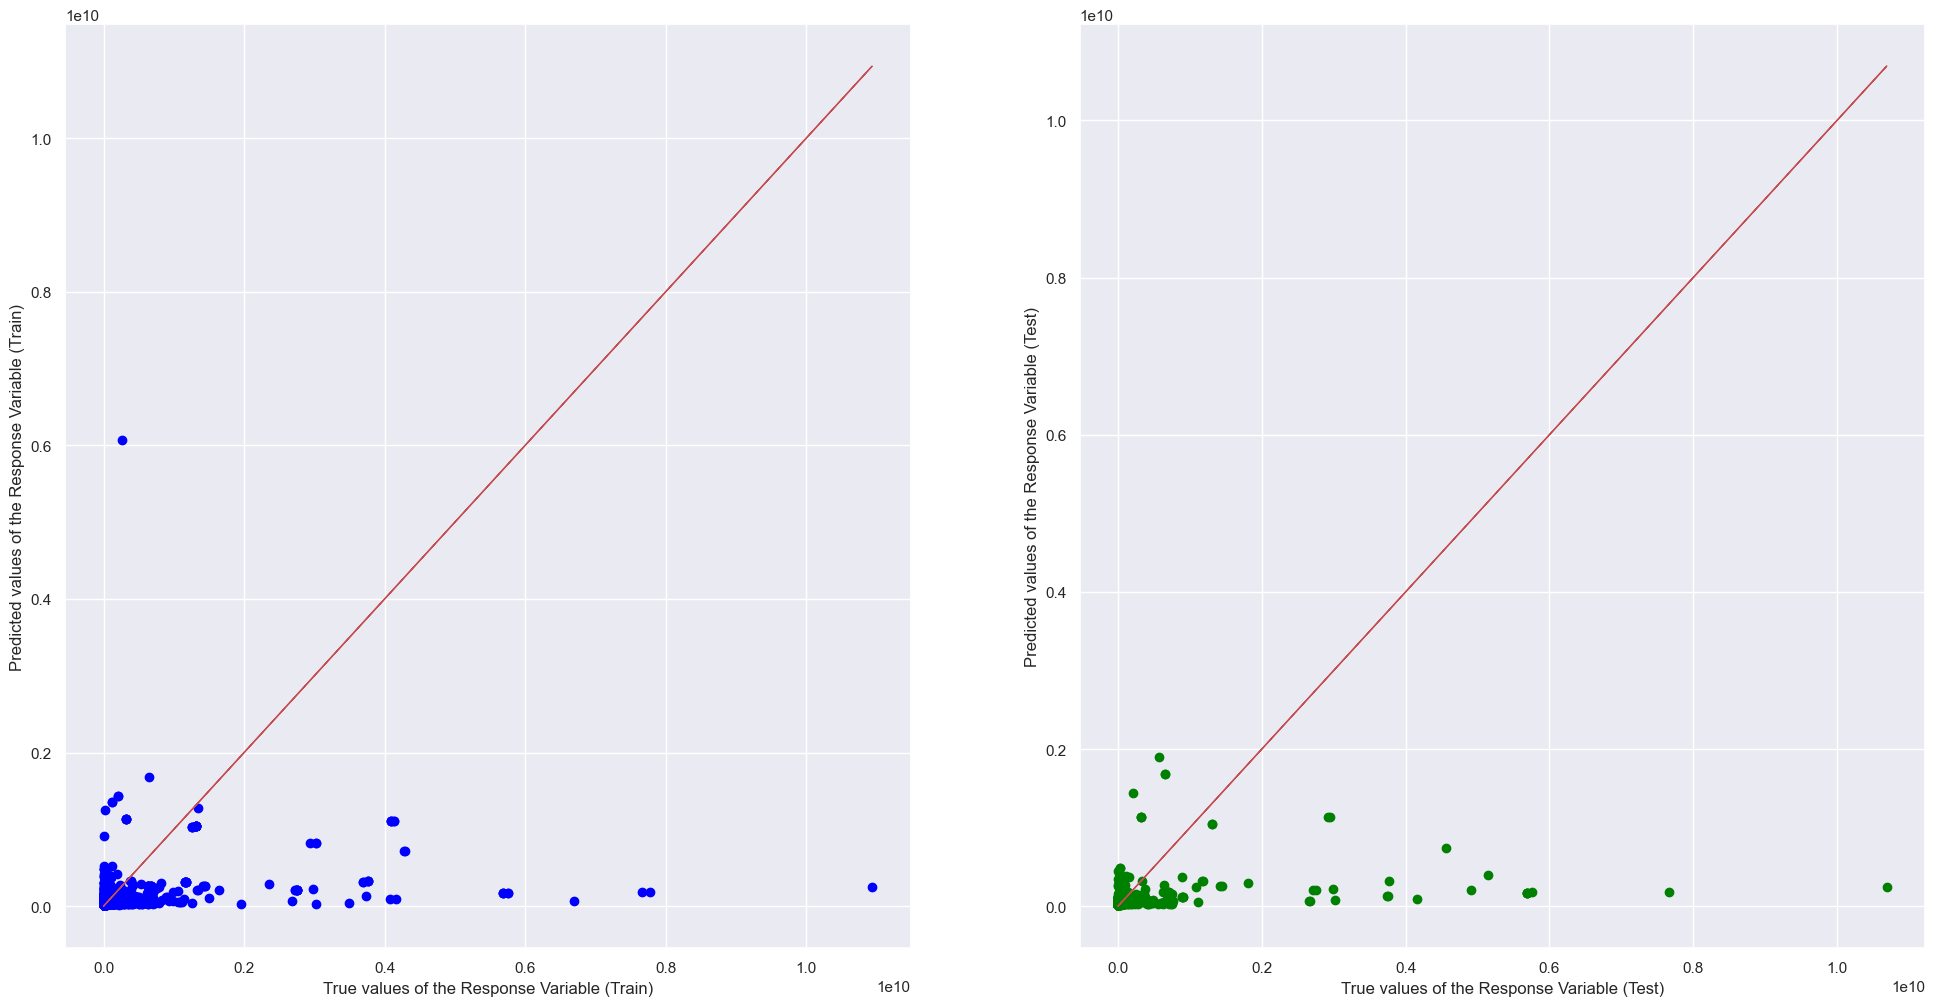

Education
Lasso Regression
Intercept of Regression 	: b =  [15149472.09394143]
Coefficients of Regression 	: a =  [6368.55823428]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.013384469522346398
Mean Squared Error (MSE) 	: 2.899729427606095e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.008983539343727753
Mean Squared Error (MSE) 	: 2.4777689946692756e+16



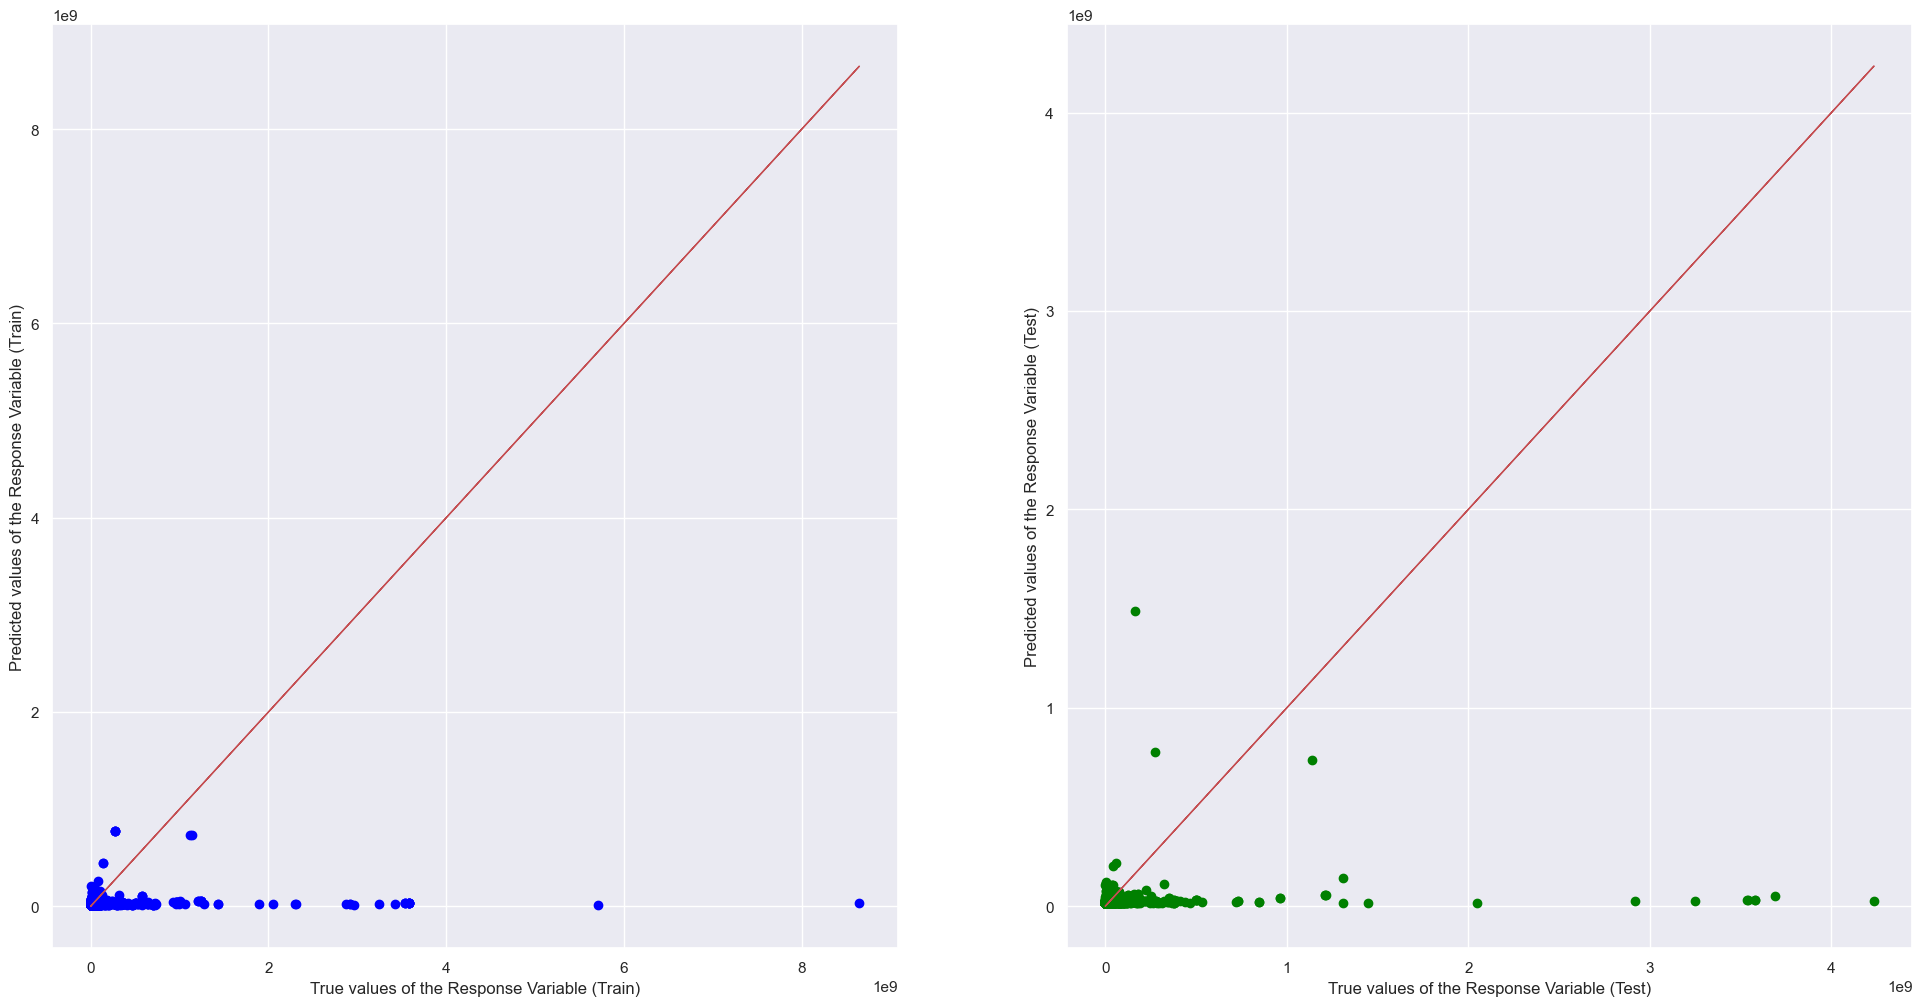

Entertainment
Lasso Regression
Intercept of Regression 	: b =  [80073641.17708531]
Coefficients of Regression 	: a =  [22081.54662581]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1070671096722996
Mean Squared Error (MSE) 	: 6.780583010241764e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1362995497485967
Mean Squared Error (MSE) 	: 5.502018832452324e+17



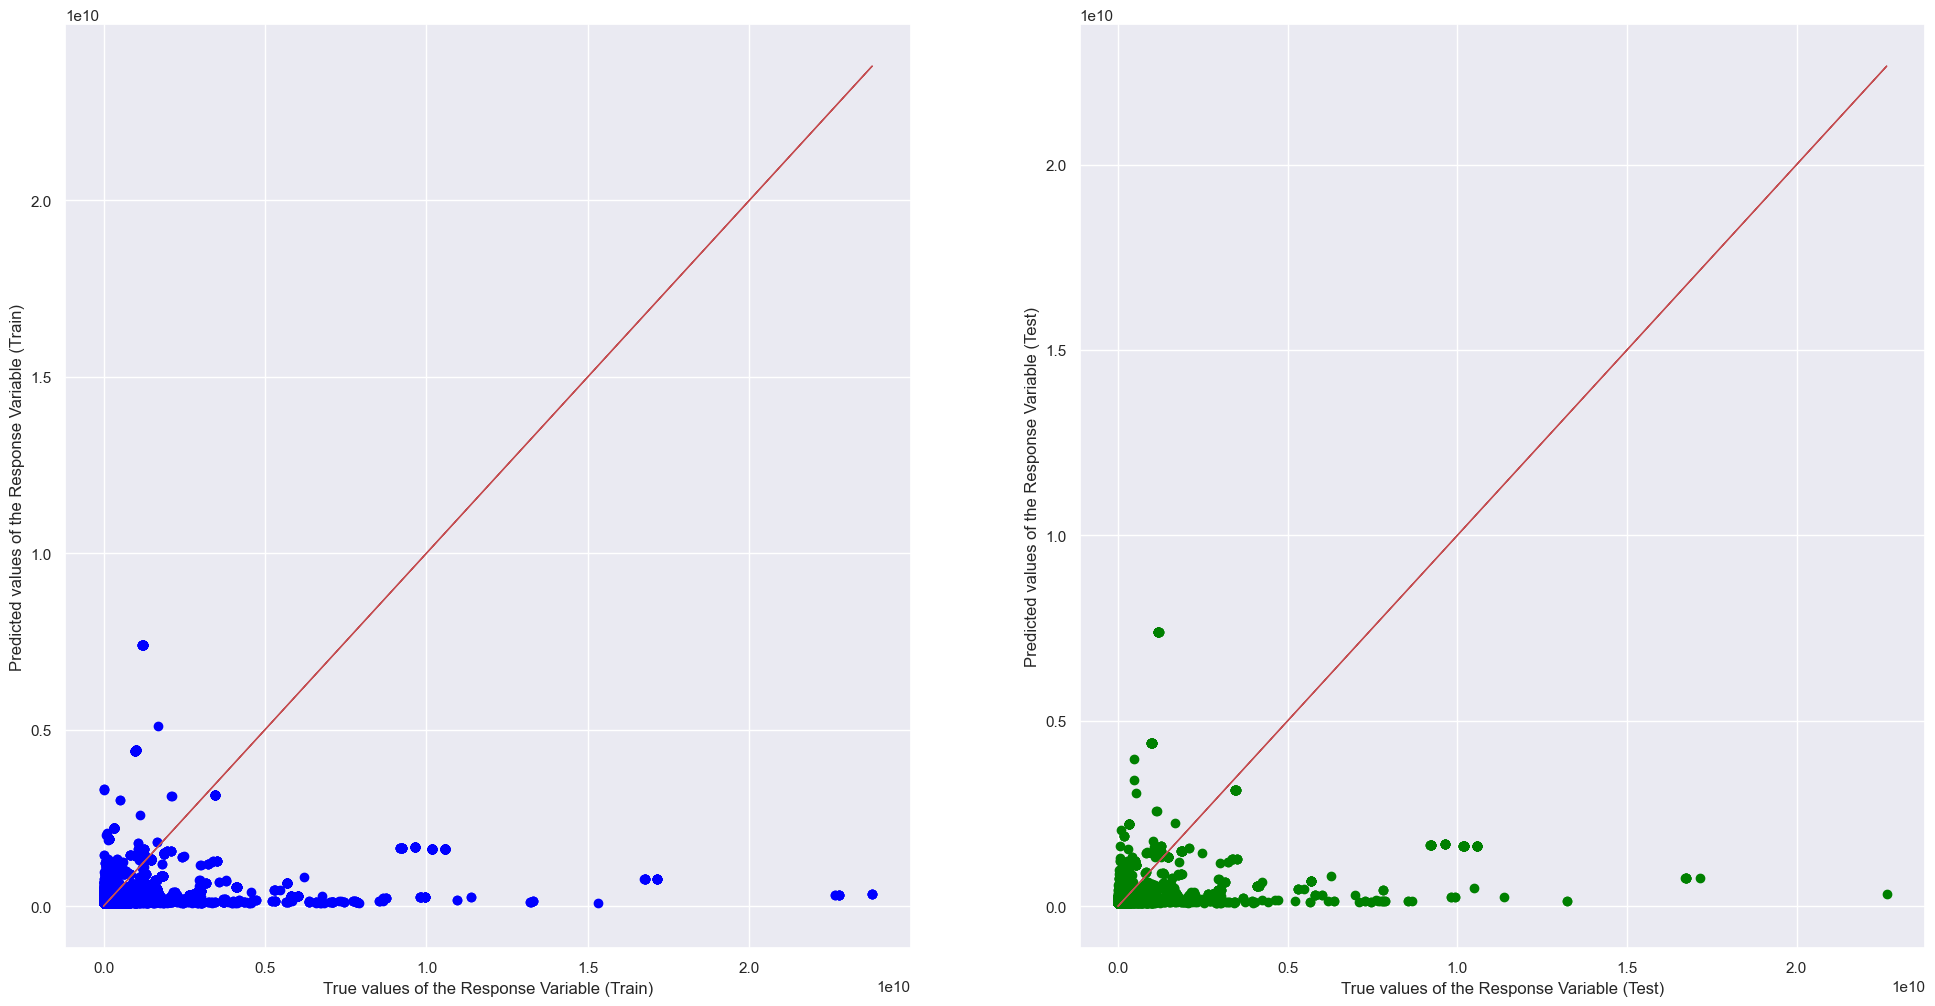

Film & Animation
Lasso Regression
Intercept of Regression 	: b =  [7712120.65965272]
Coefficients of Regression 	: a =  [165575.95969286]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39038329257136406
Mean Squared Error (MSE) 	: 3.514731414977149e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5126348799014702
Mean Squared Error (MSE) 	: 2.245838377266611e+17



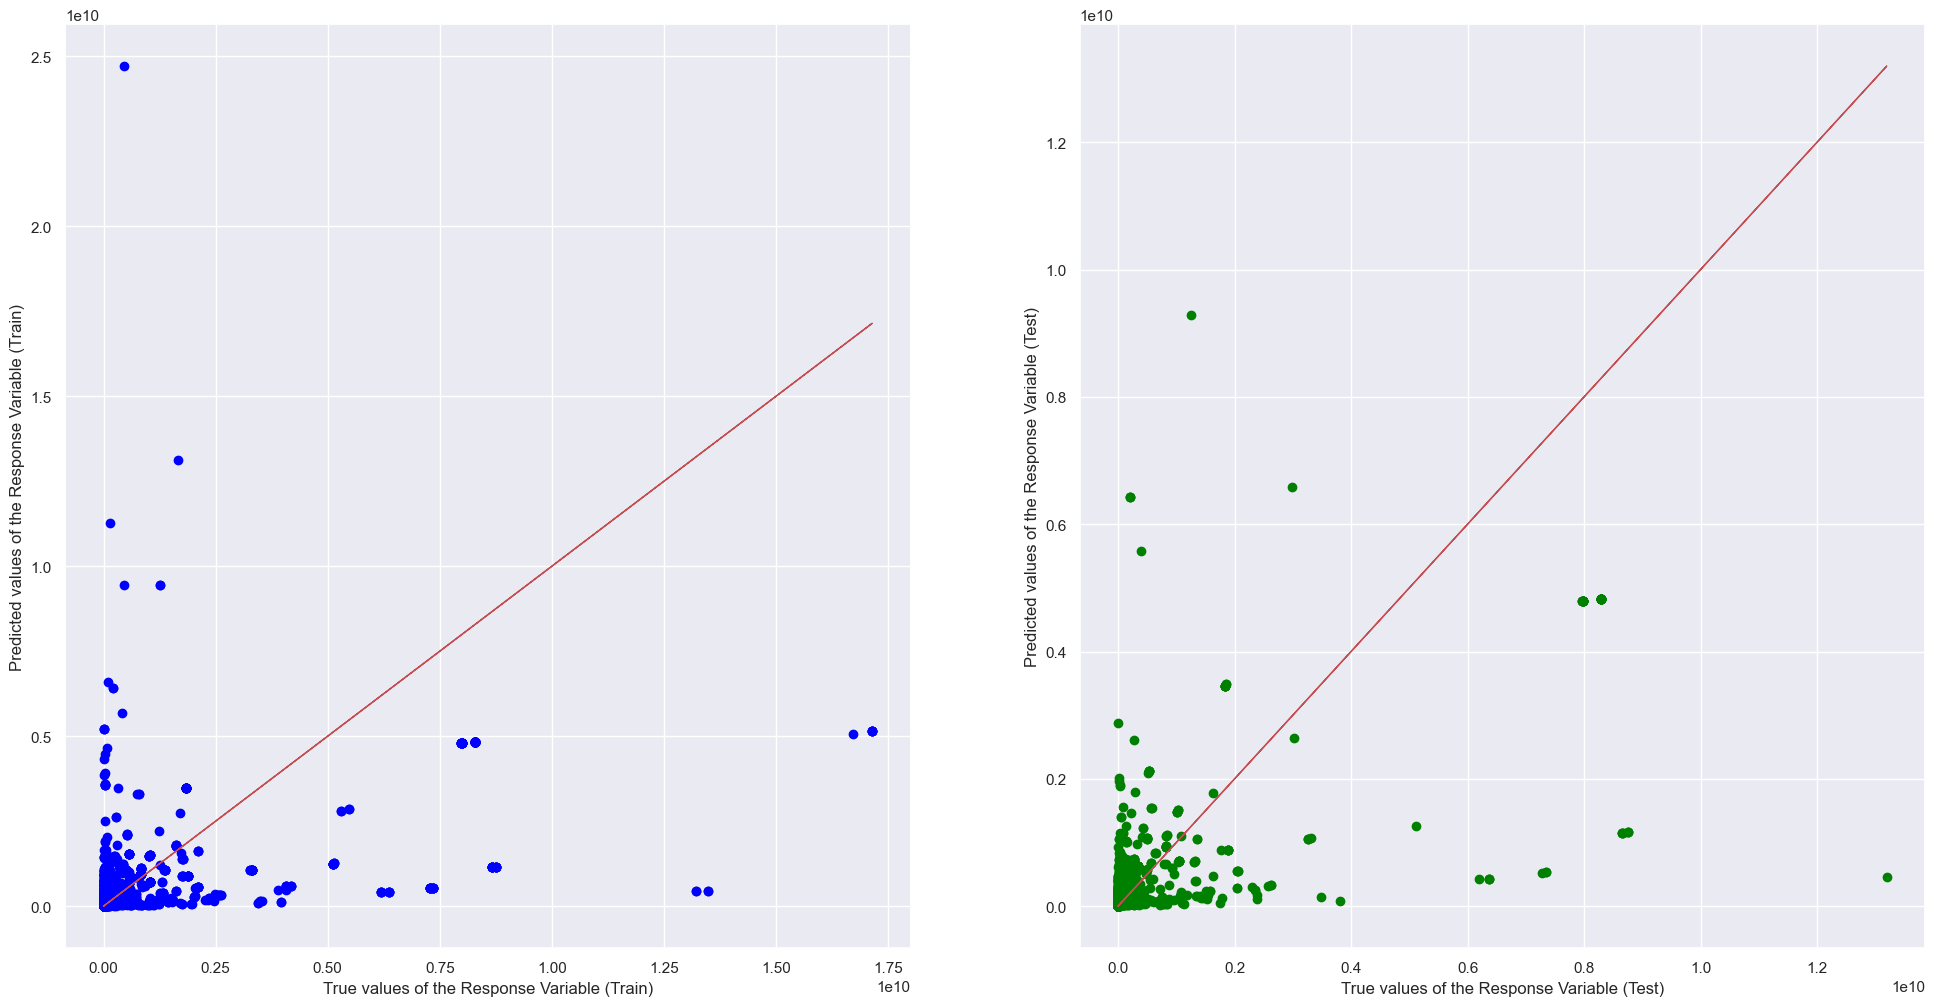

Gaming
Lasso Regression
Intercept of Regression 	: b =  [29568138.49908233]
Coefficients of Regression 	: a =  [17231.20114992]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07721417044147993
Mean Squared Error (MSE) 	: 5.9329160067899944e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12342726201788756
Mean Squared Error (MSE) 	: 4.951541872039013e+16



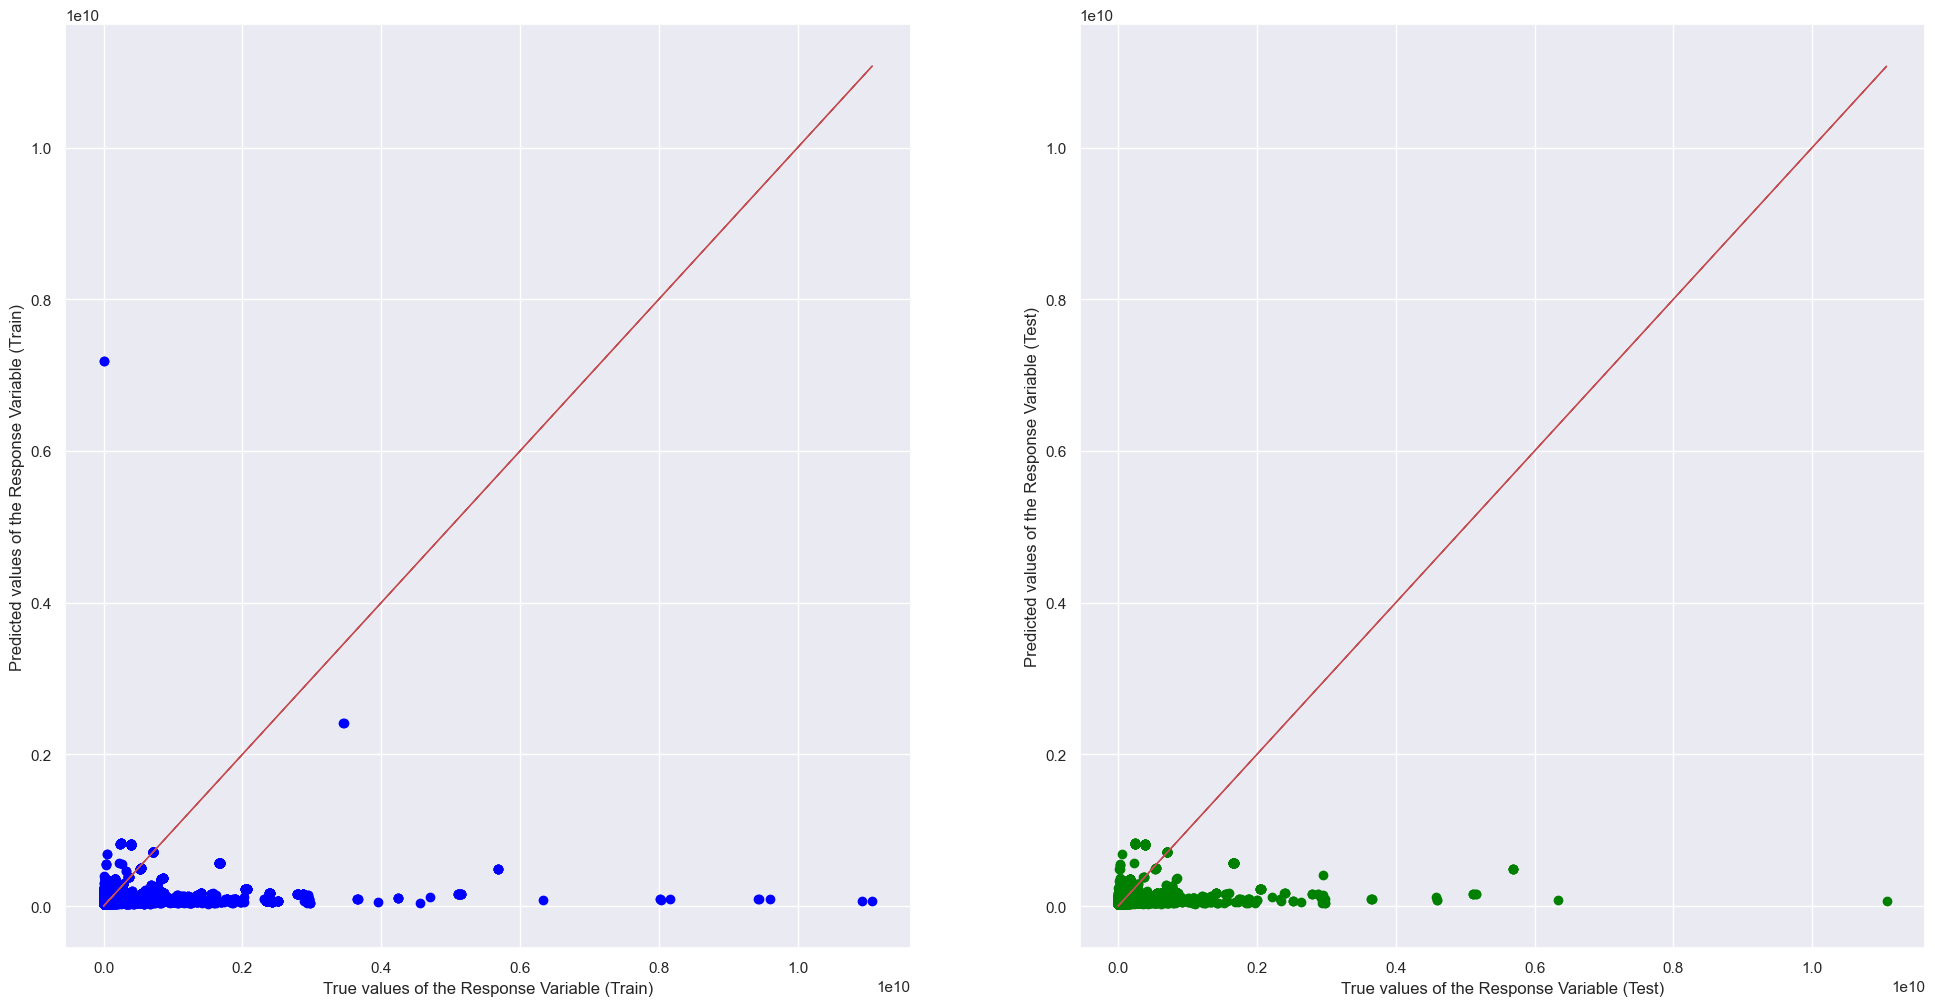

Howto & Style


C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.304e+17, tolerance: 2.421e+17
  model = cd_fast.enet_coordinate_descent(


Lasso Regression
Intercept of Regression 	: b =  [19761310.61052899]
Coefficients of Regression 	: a =  [22182.85957971]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4261142913050968
Mean Squared Error (MSE) 	: 5.9916208256266776e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45402740764582383
Mean Squared Error (MSE) 	: 4.800138662681269e+16



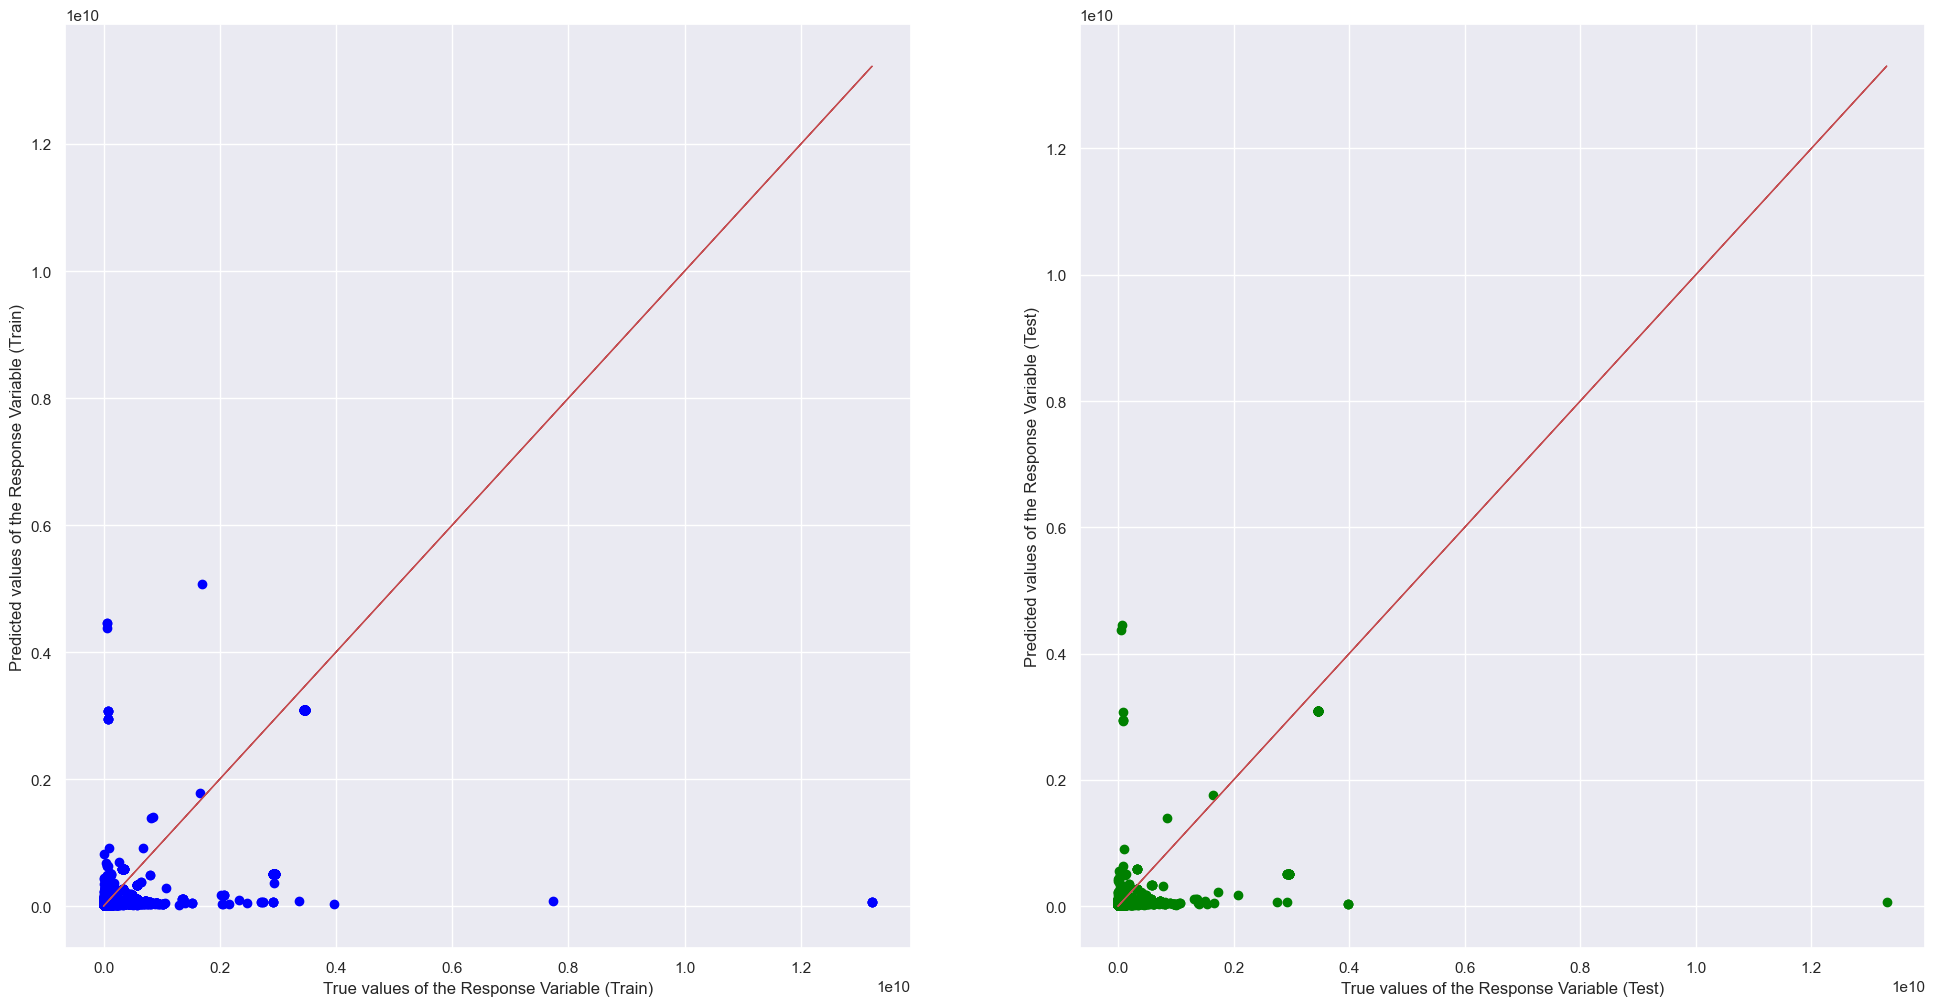

Movies
Lasso Regression
Intercept of Regression 	: b =  [-3468600.64321636]
Coefficients of Regression 	: a =  [87714.38355414]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 7.50613227411441e-08

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -62.03259110036043
Mean Squared Error (MSE) 	: 1613347151248948.5



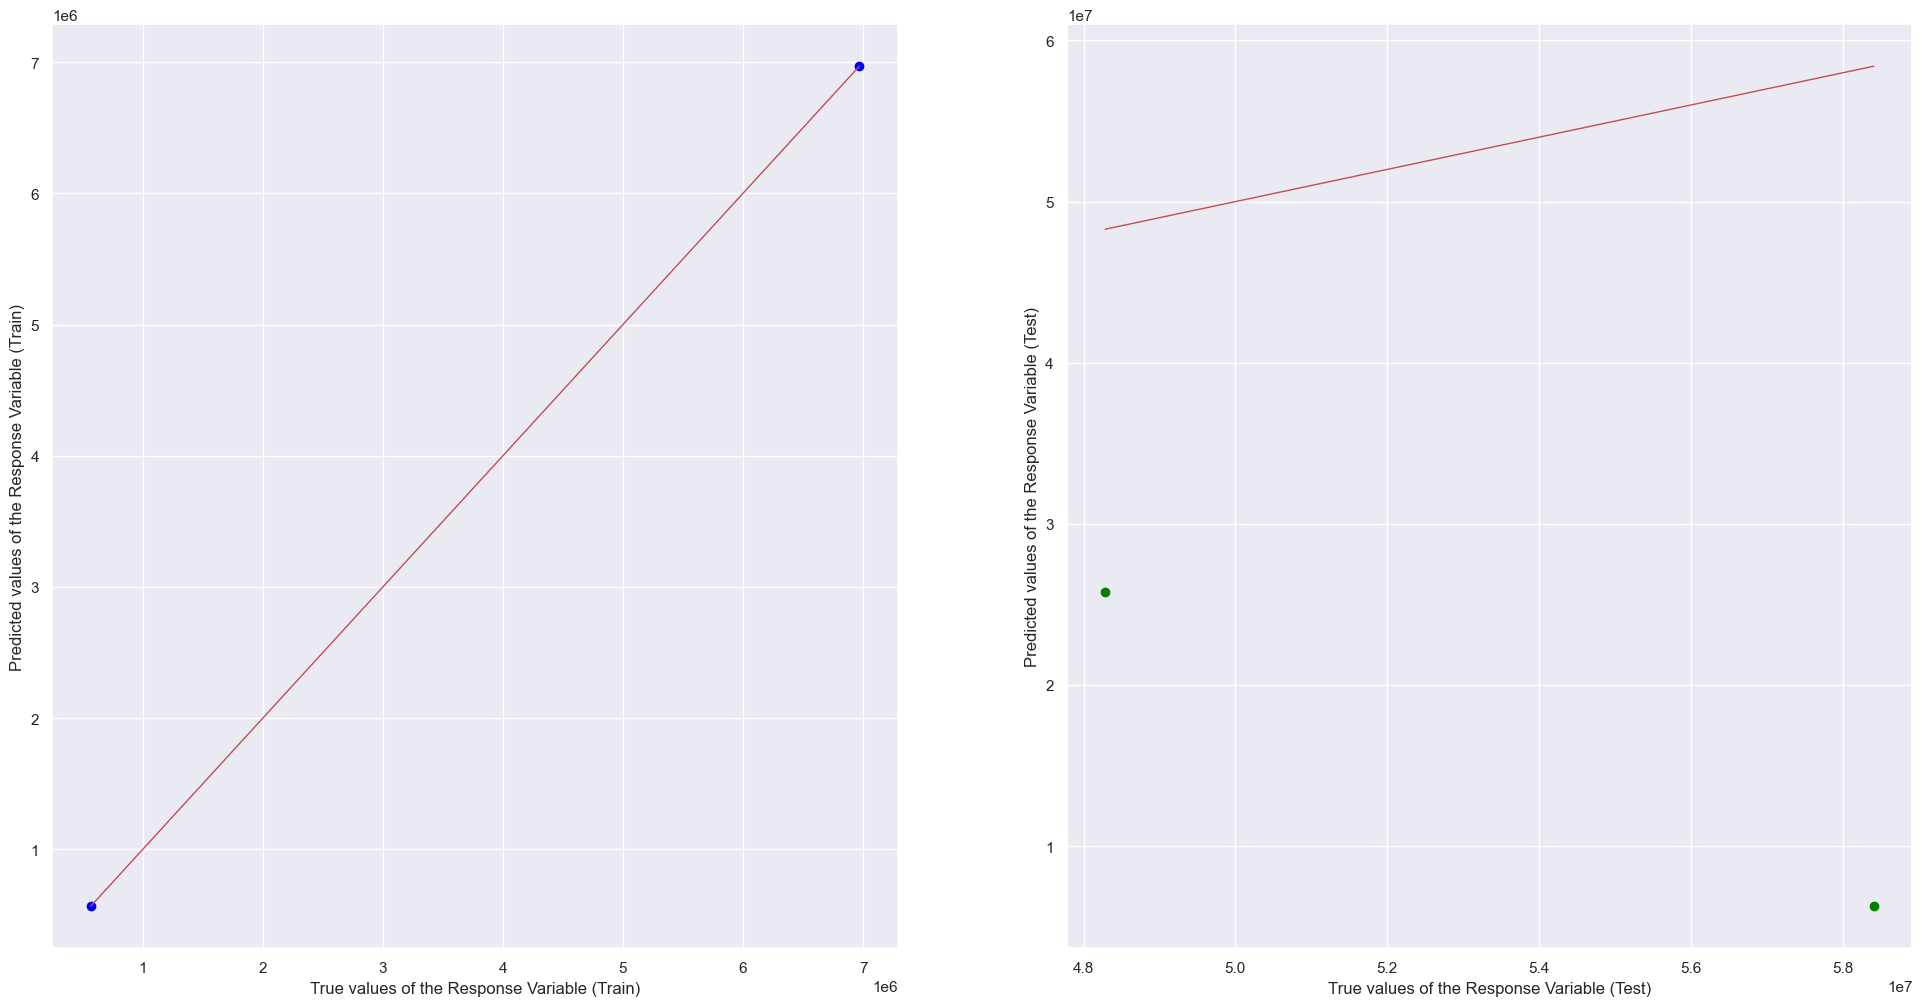

Music
Lasso Regression
Intercept of Regression 	: b =  [15930463.01642405]
Coefficients of Regression 	: a =  [30620.11918312]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03652662181049238
Mean Squared Error (MSE) 	: 1.1749144882817536e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.031044513701329213
Mean Squared Error (MSE) 	: 1.3632066589111701e+17



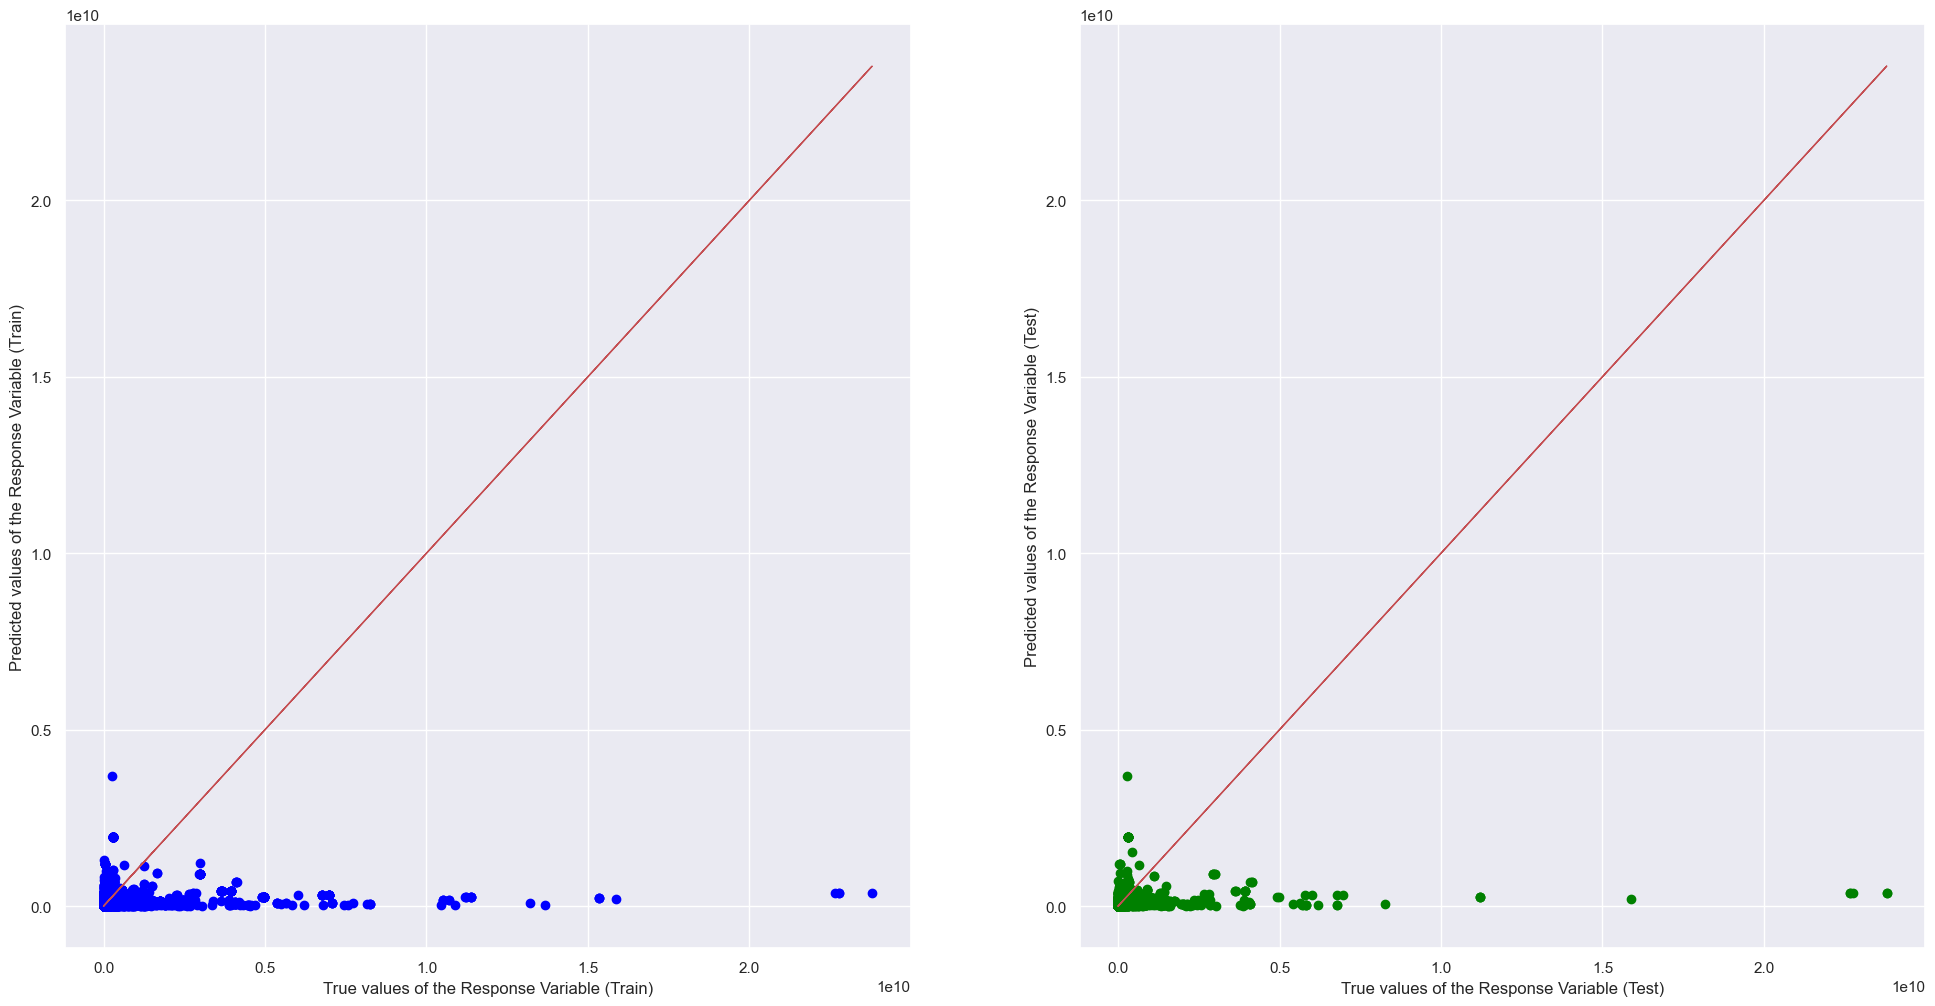

News & Politics


C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+18, tolerance: 1.501e+17
  model = cd_fast.enet_coordinate_descent(


Lasso Regression
Intercept of Regression 	: b =  [38779966.72047174]
Coefficients of Regression 	: a =  [7343.46013125]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.341024909876249
Mean Squared Error (MSE) 	: 1.4120925512613666e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.28150298006826846
Mean Squared Error (MSE) 	: 1.6313583988755693e+17



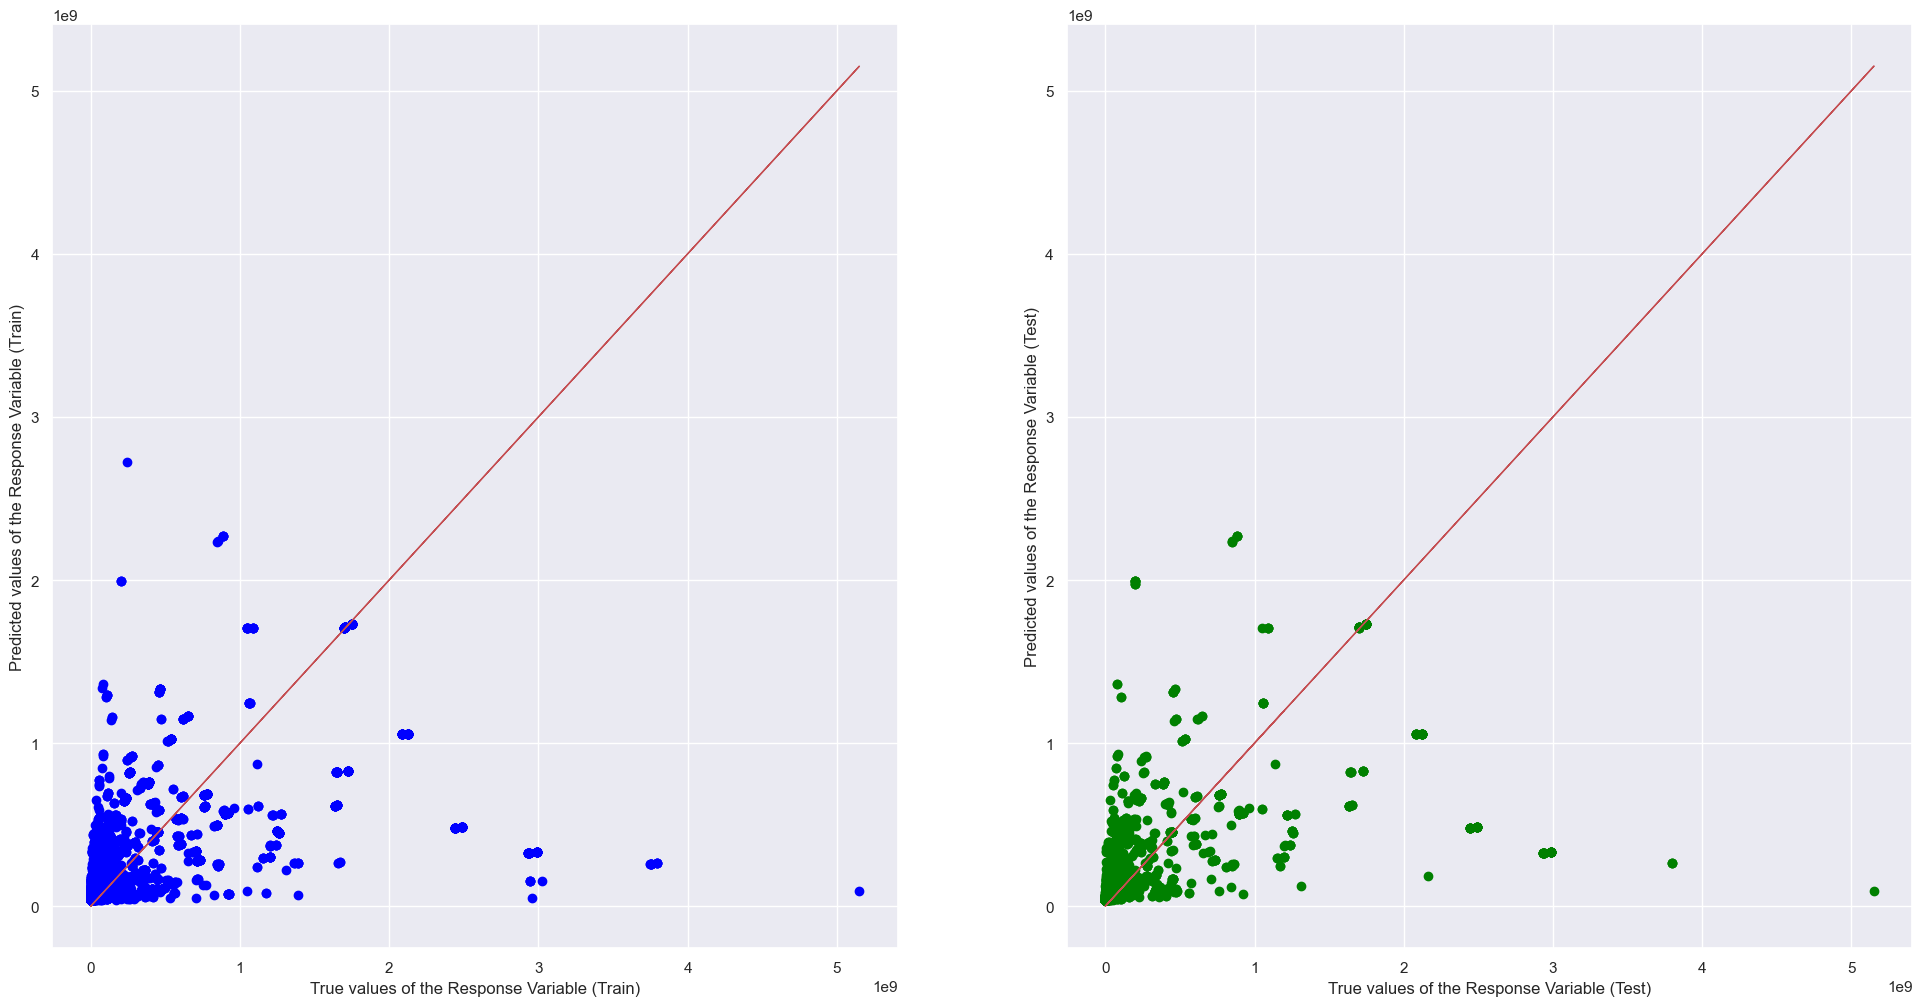

People & Blogs
Lasso Regression
Intercept of Regression 	: b =  [6691529.04232295]
Coefficients of Regression 	: a =  [6048.611739]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01263812769183914
Mean Squared Error (MSE) 	: 1.7442884767410436e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.017816582287994542
Mean Squared Error (MSE) 	: 8576934599281221.0



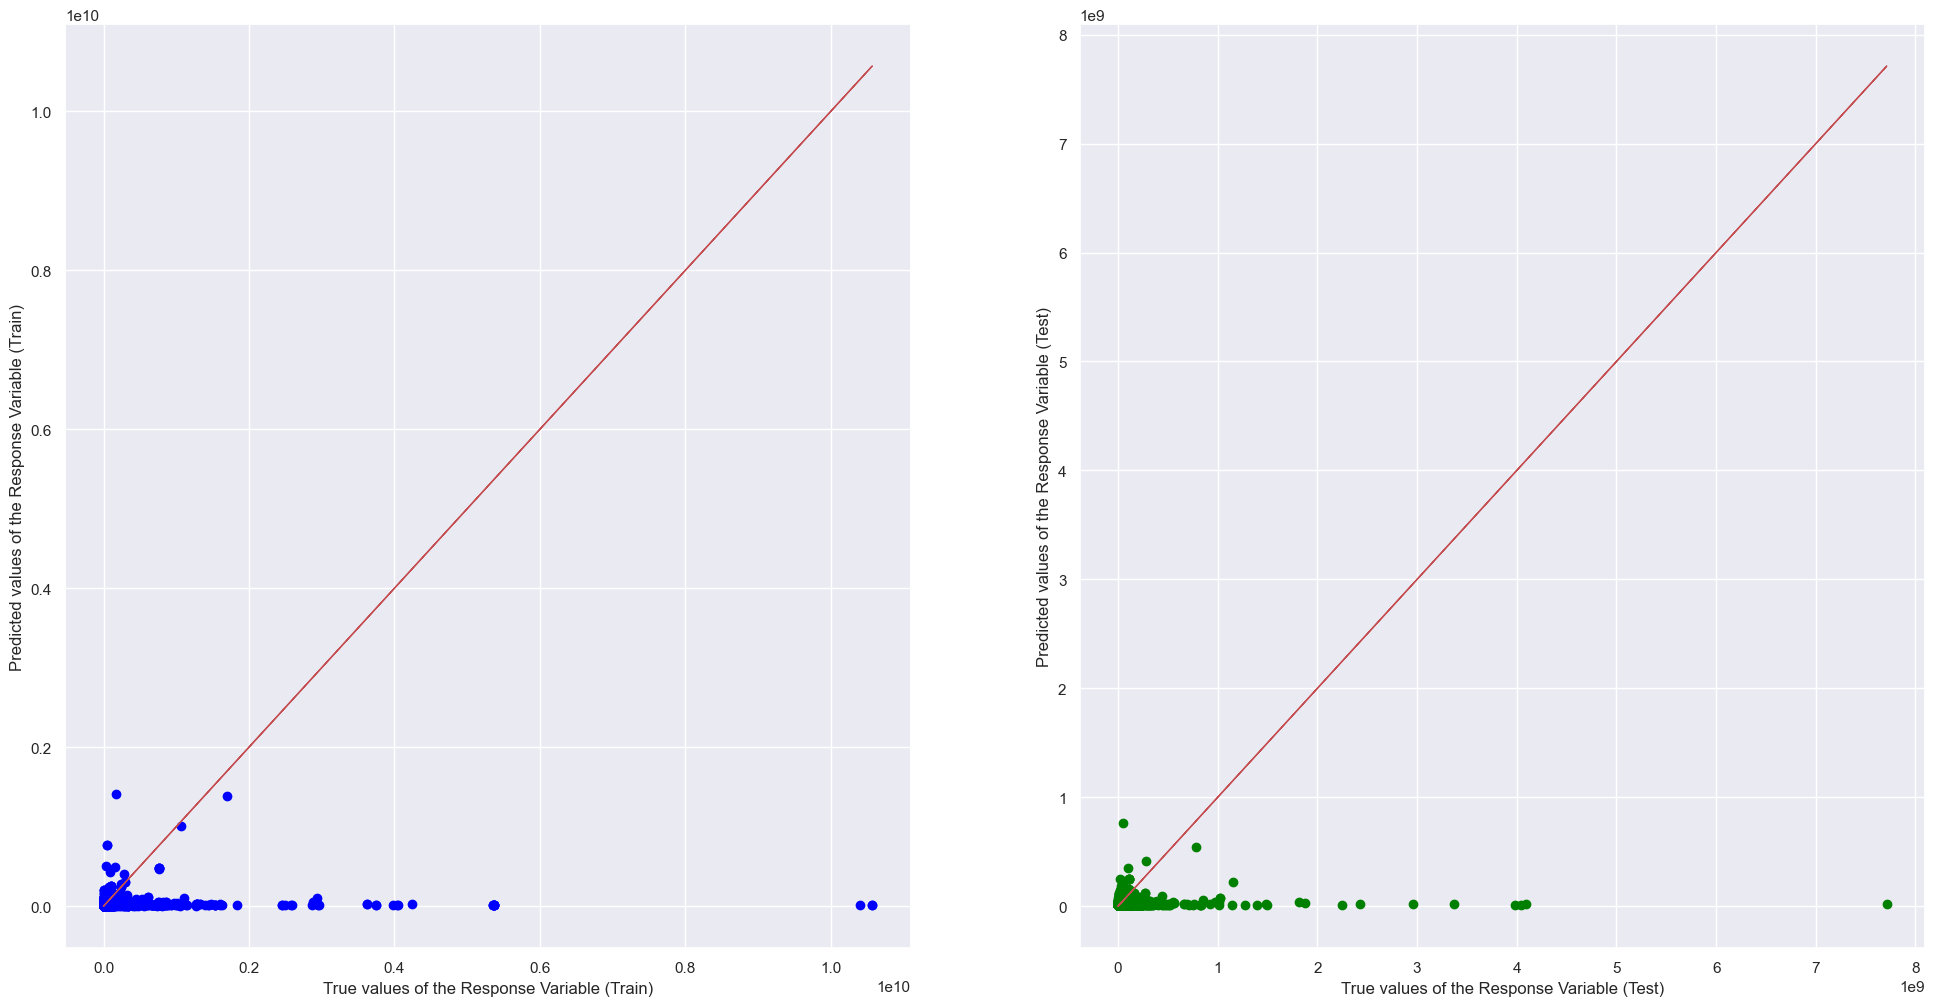

Pets & Animals
Lasso Regression
Intercept of Regression 	: b =  [1346173.26247684]
Coefficients of Regression 	: a =  [21165.43286078]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5327355401801437
Mean Squared Error (MSE) 	: 9926664050556114.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.19323659455407527
Mean Squared Error (MSE) 	: 6640004659836240.0



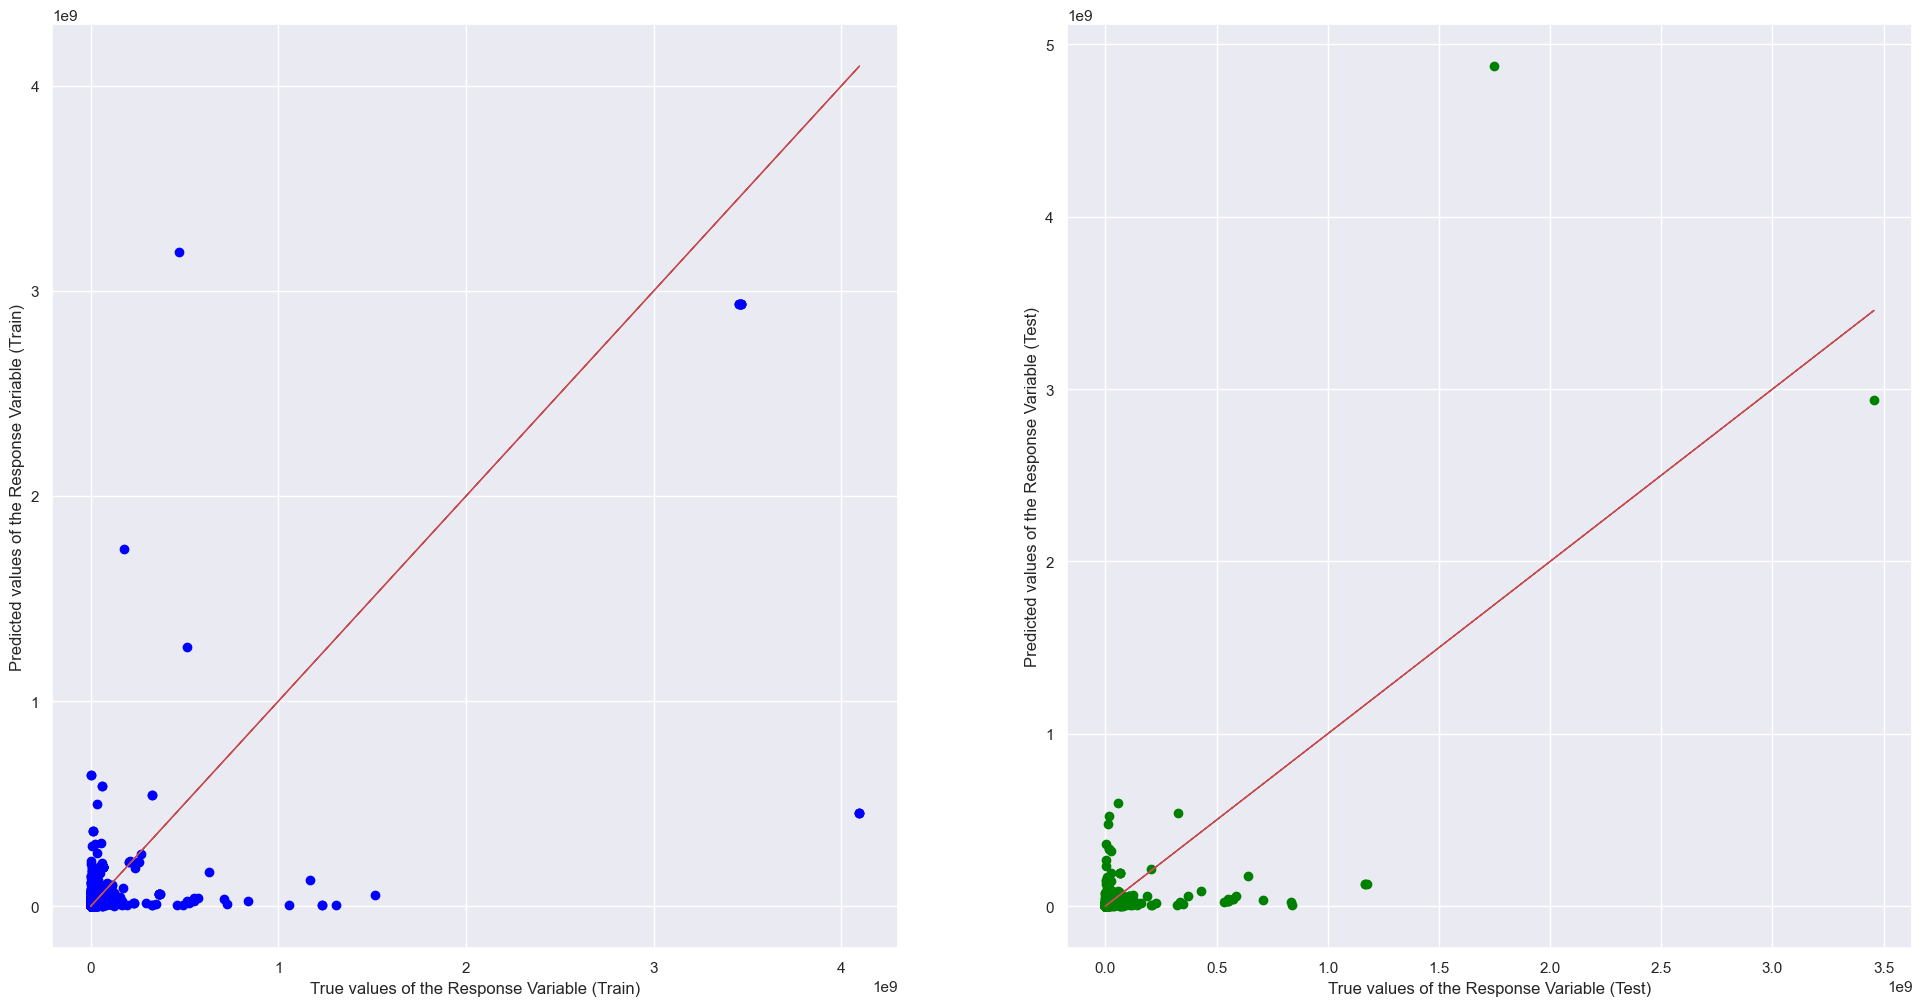

Science & Technology
Lasso Regression
Intercept of Regression 	: b =  [8282057.52446065]
Coefficients of Regression 	: a =  [23817.675729]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4063230852865871
Mean Squared Error (MSE) 	: 1.204290447483465e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4078545408365145
Mean Squared Error (MSE) 	: 1.2649507231066382e+16



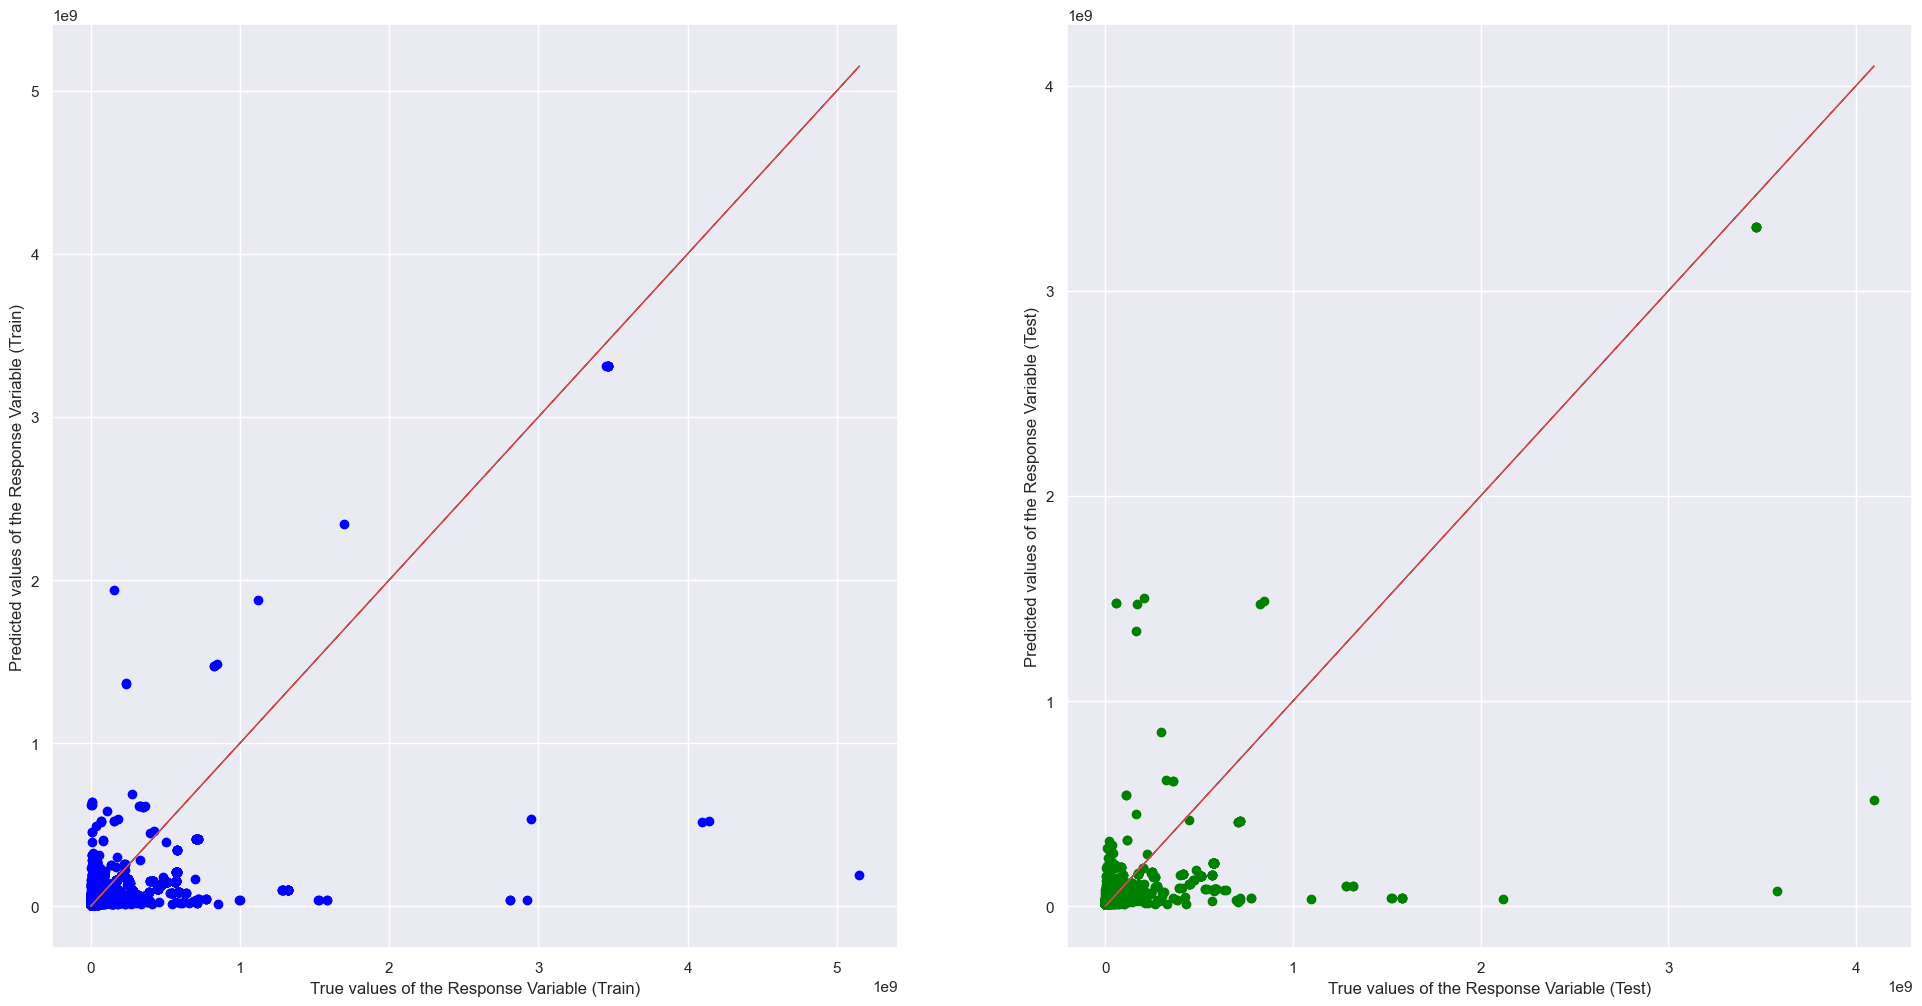

Shows


C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.538e+19, tolerance: 5.710e+17
  model = cd_fast.enet_coordinate_descent(


Lasso Regression
Intercept of Regression 	: b =  [5.62844742e+08]
Coefficients of Regression 	: a =  [36425.6559878]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10002581636122887
Mean Squared Error (MSE) 	: 4.414660713354844e+18

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09502674829932933
Mean Squared Error (MSE) 	: 7.029865056739514e+18



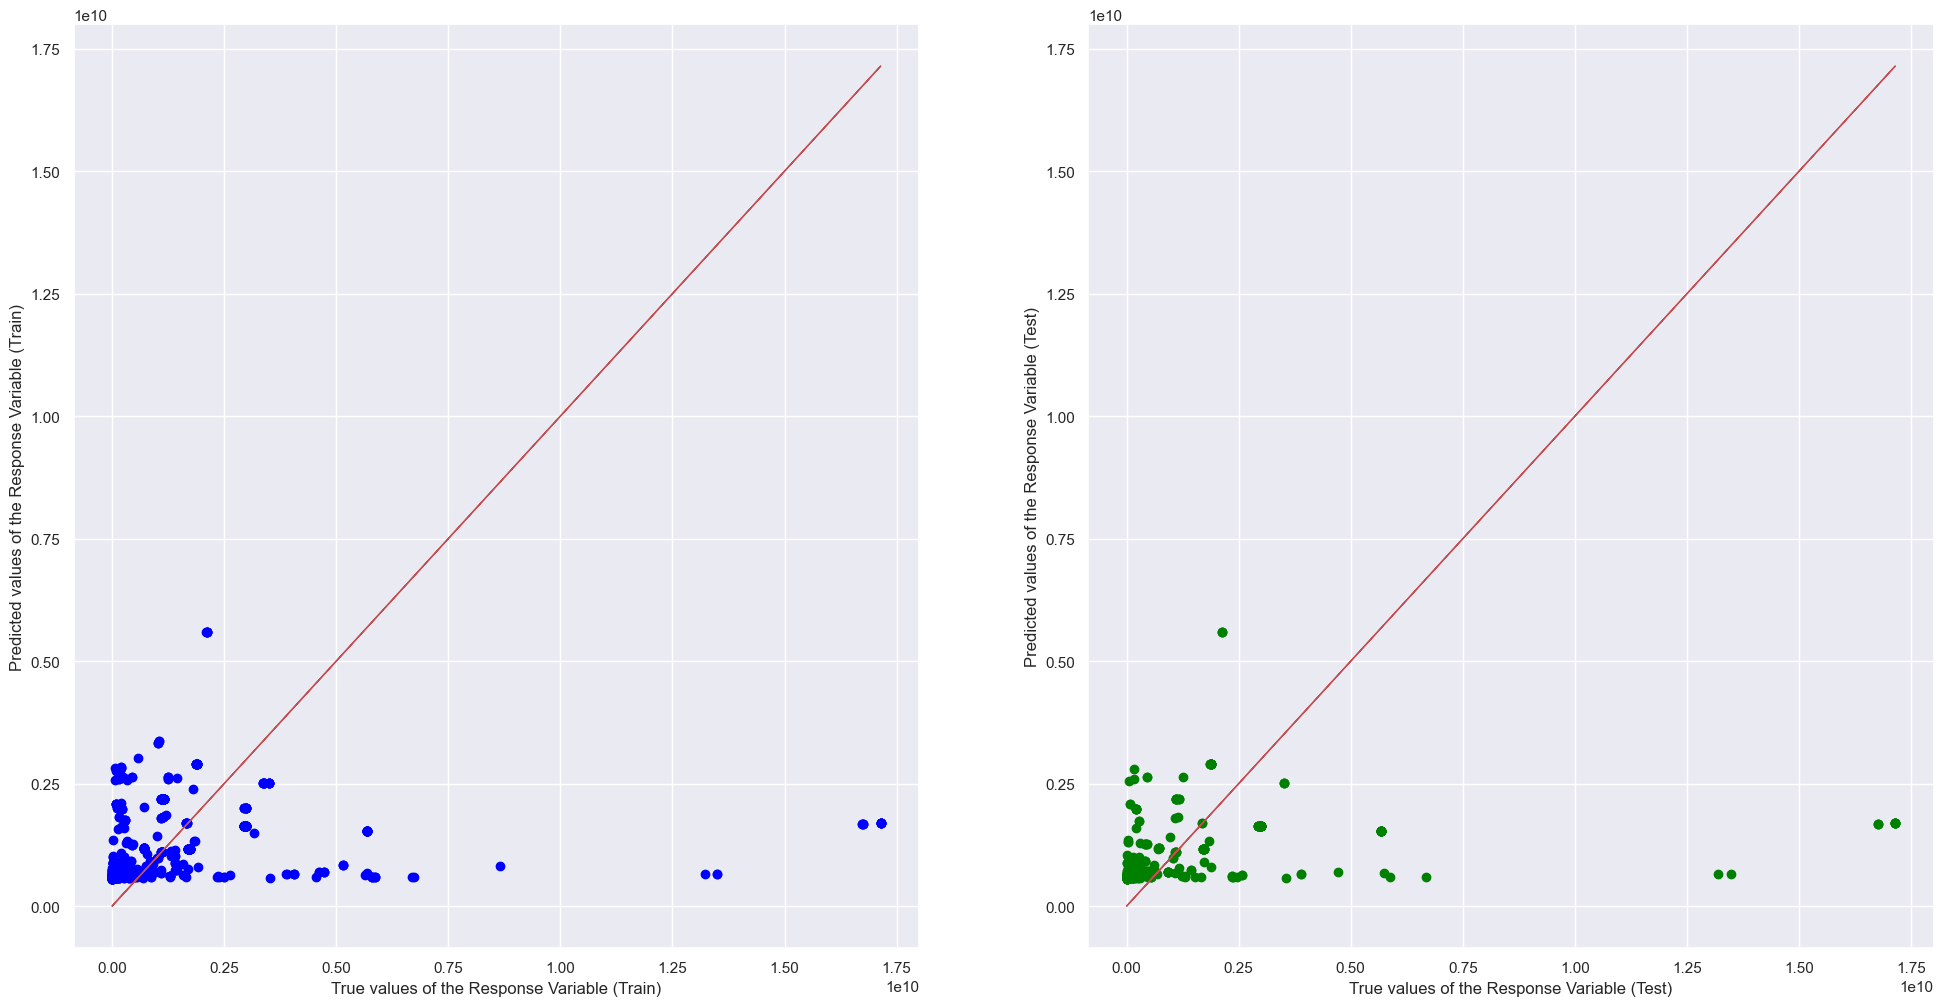

Sports
Lasso Regression
Intercept of Regression 	: b =  [7236300.93572607]
Coefficients of Regression 	: a =  [19817.42356529]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0772039475587335
Mean Squared Error (MSE) 	: 2.3006219627318982e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07538815545318123
Mean Squared Error (MSE) 	: 2.513553537217751e+17



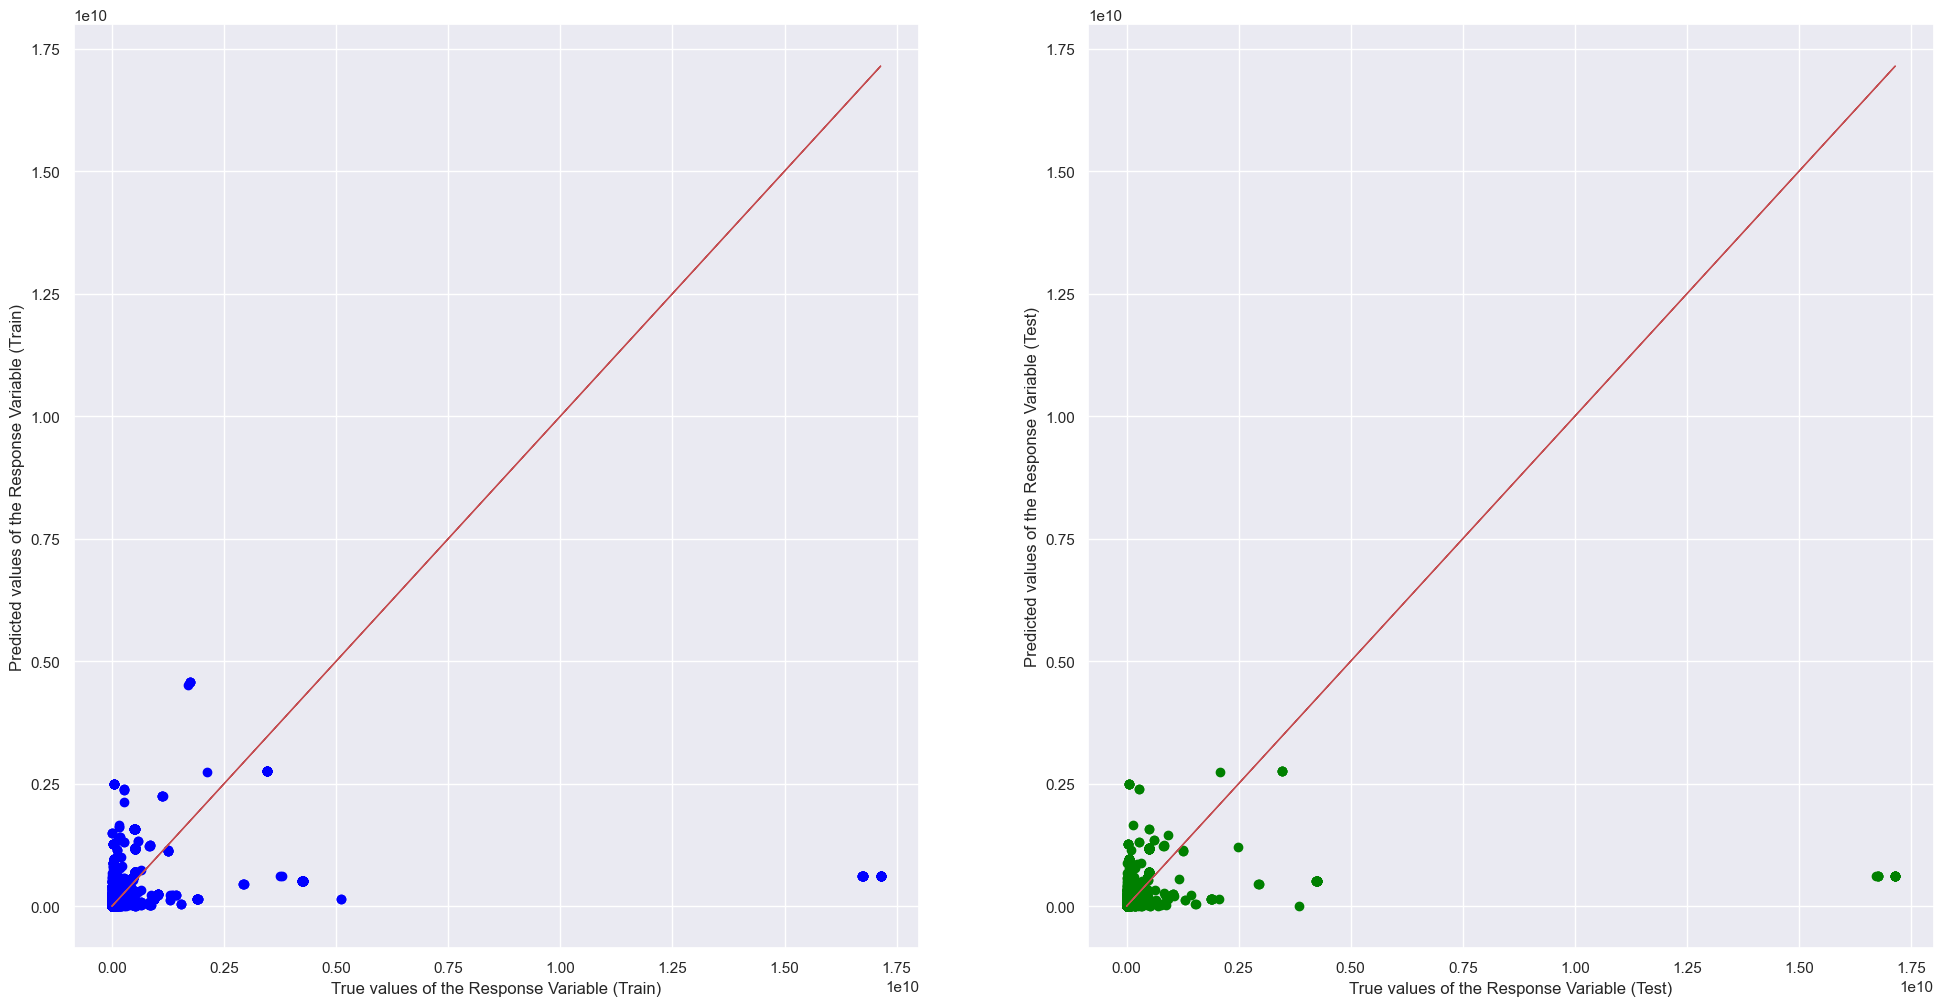

Trailers
Lasso Regression
Intercept of Regression 	: b =  [-20465724.06527711]
Coefficients of Regression 	: a =  [49215.889988]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1451638767099972
Mean Squared Error (MSE) 	: 7.699357909111608e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -1.3996993361036614
Mean Squared Error (MSE) 	: 1.2223241298566584e+16



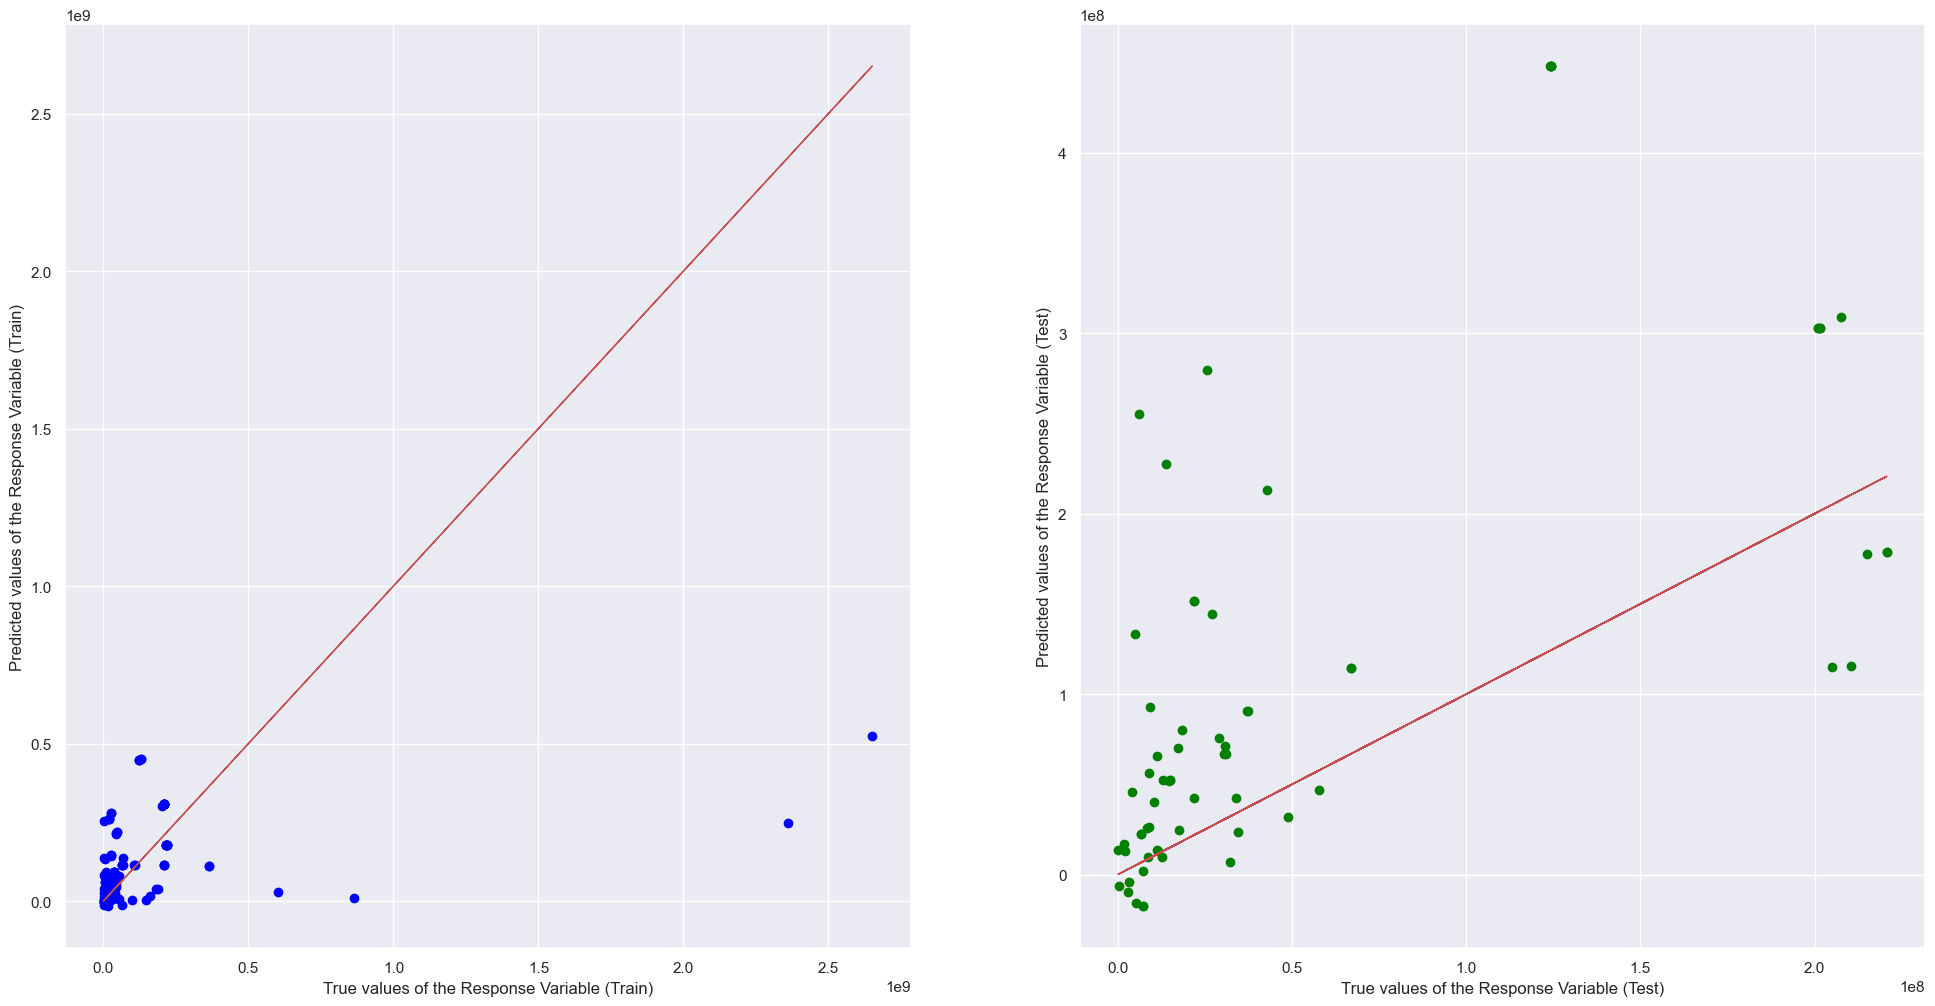

Average Train R^2: 	: 0.252504904592209
Average Train MSE: 	: 3.932372219463707e+17
Average Test R^2: 	: -3.7998227691569144
Average Test MSE: 	: 5.409769874526444e+17


In [45]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=1
for i in range (0,16):
    print(Genre[i])
    predictorStr = 'videoCount'
    lassoRegression(Genre[i], predictorStr, flag)
    

print("Average Train R^2: \t:",Average(trainr2))
print("Average Train MSE: \t:",Average(trainmse))
print("Average Test R^2: \t:",Average(testr2))
print("Average Test MSE: \t:",Average(testmse))

#### Elastic Net Regression

Autos & Vehicles
Elastic Net Regression
Intercept of Regression 	: b =  [2687705.53888427]
Coefficients of Regression 	: a =  [14513.34971721]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3913153680868664
Mean Squared Error (MSE) 	: 4219718433026624.5

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.37138304501494224
Mean Squared Error (MSE) 	: 5549354850570292.0



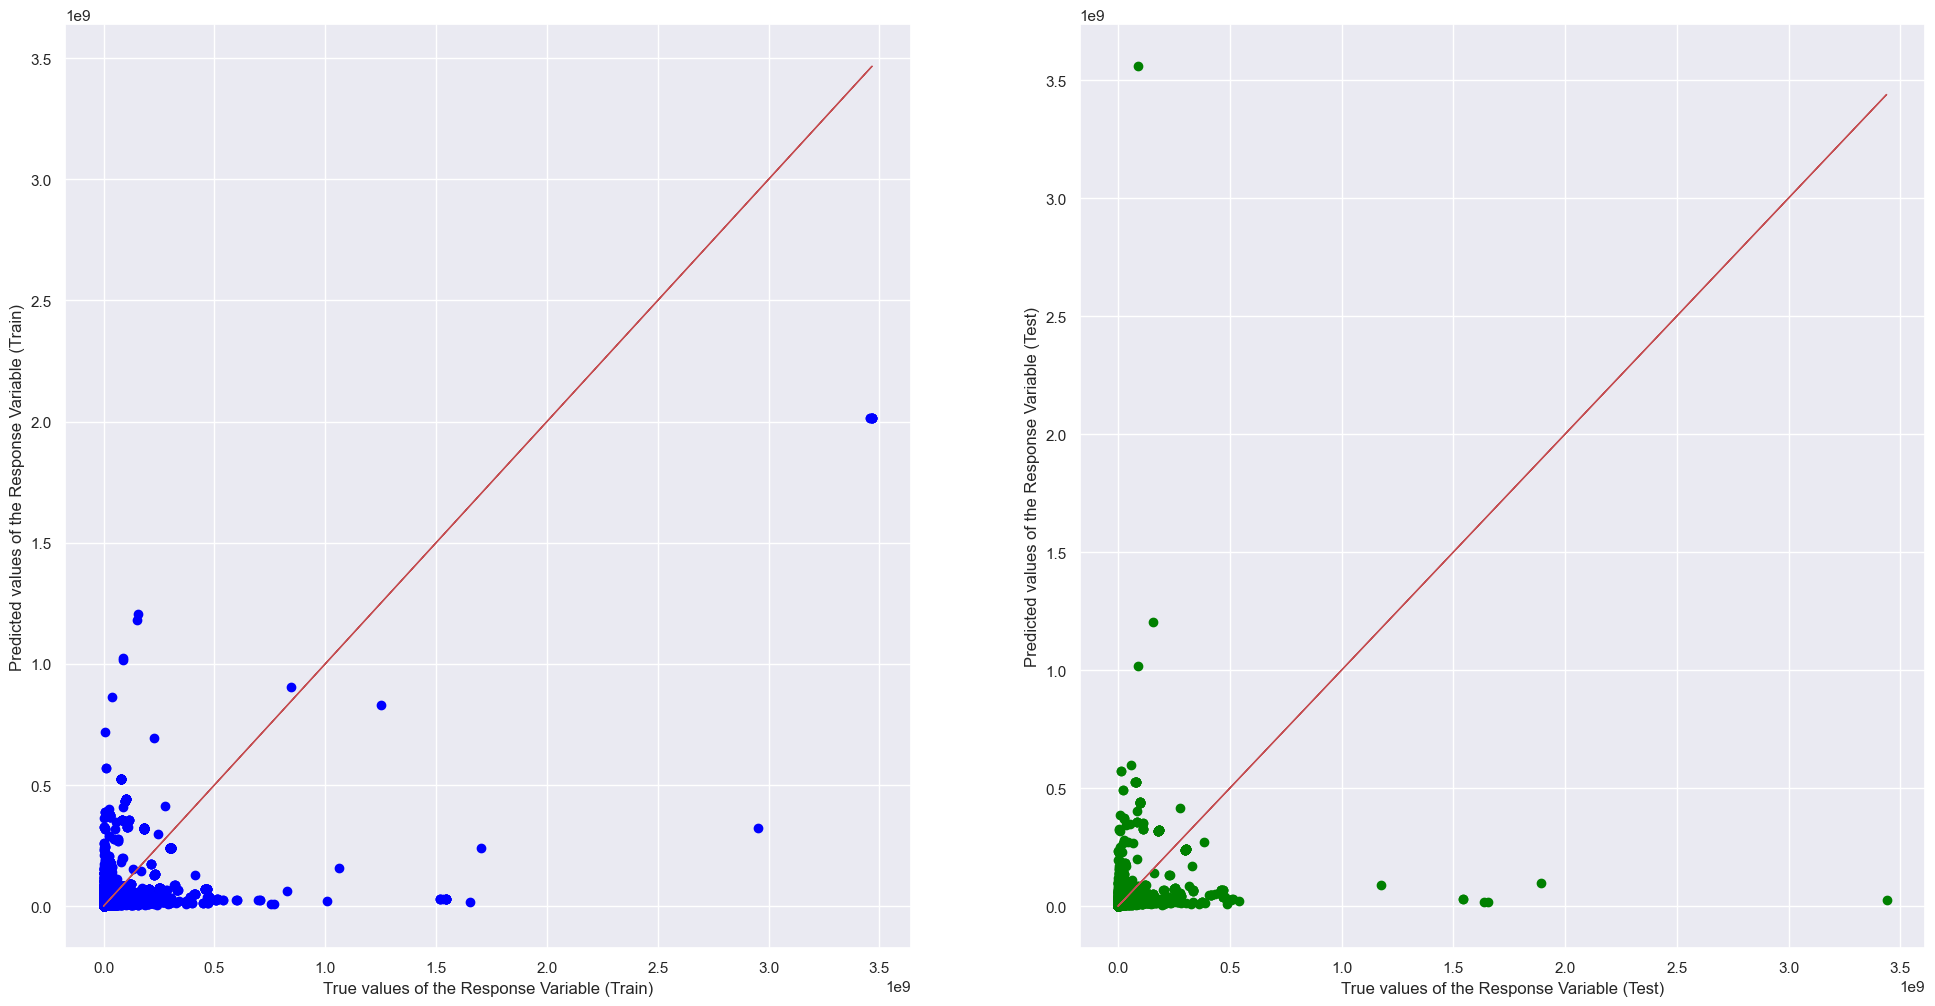

Comedy
Elastic Net Regression
Intercept of Regression 	: b =  [23545881.45722176]
Coefficients of Regression 	: a =  [49407.76034092]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0736356686786801
Mean Squared Error (MSE) 	: 1.161400122316781e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15027253584692712
Mean Squared Error (MSE) 	: 7.021470460276008e+16



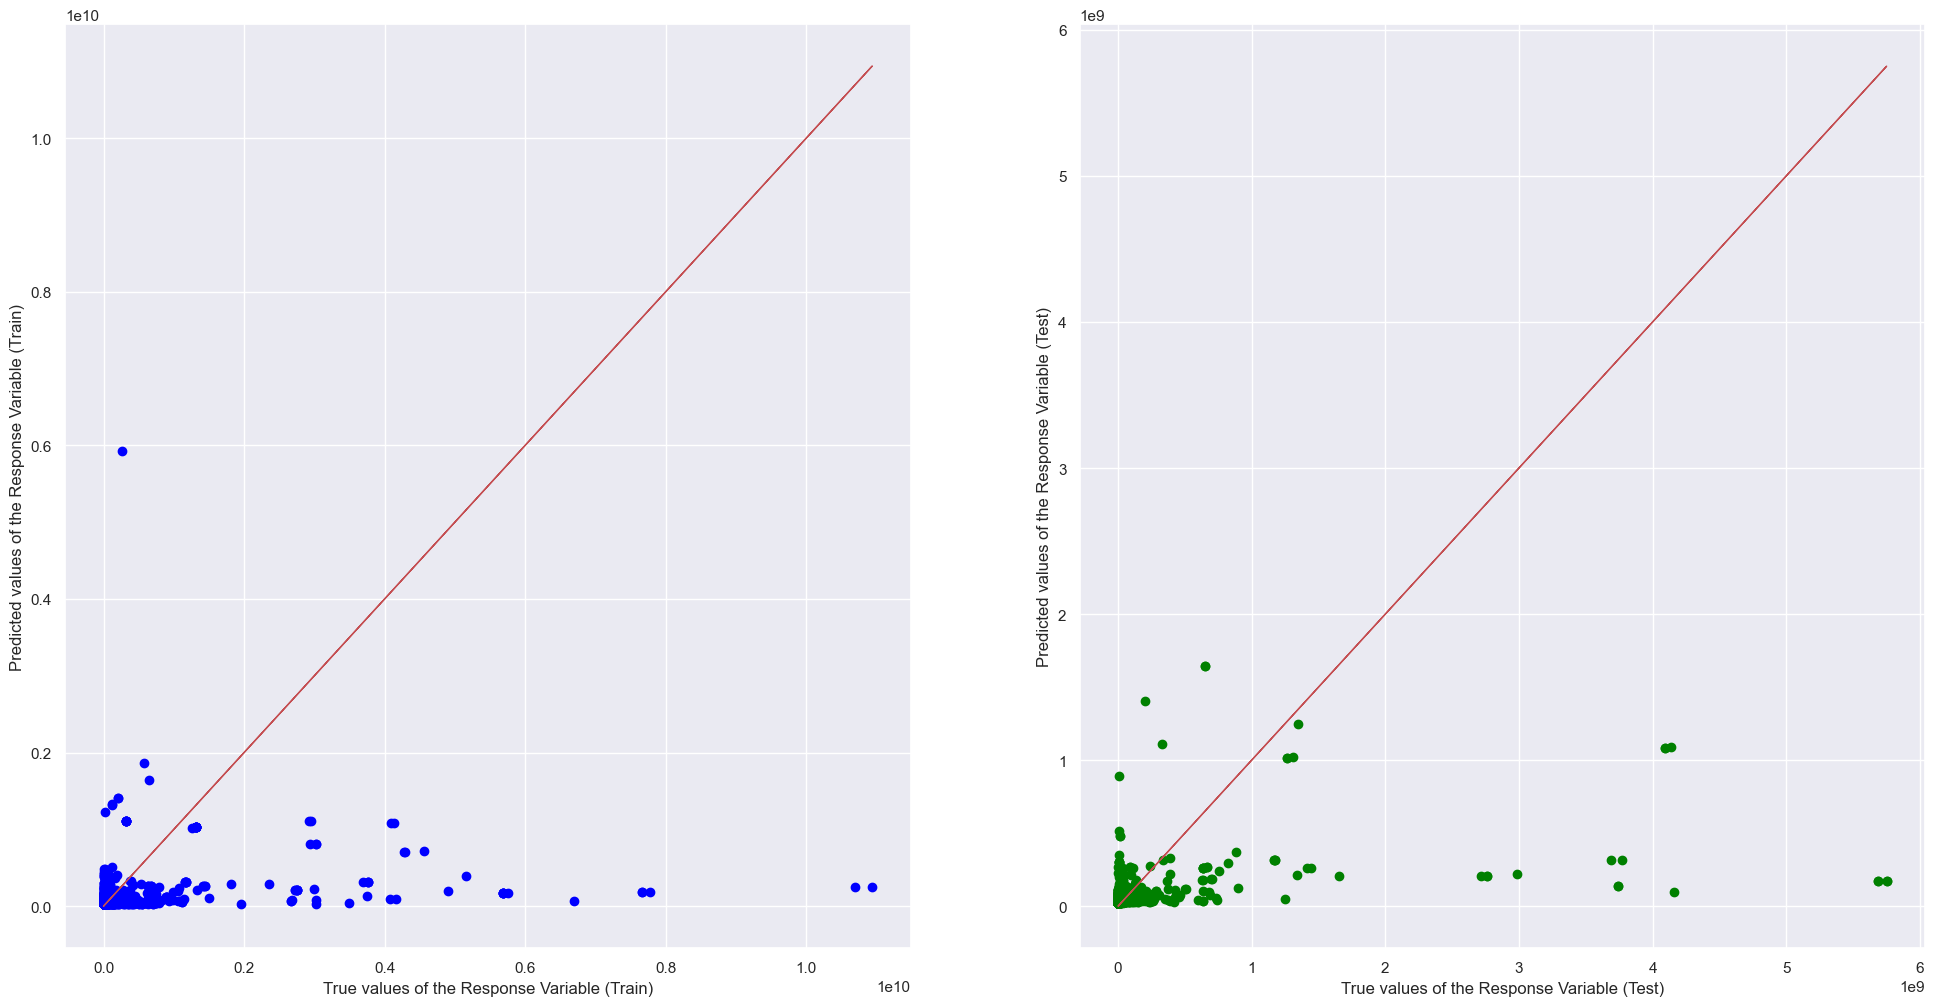

Education
Elastic Net Regression
Intercept of Regression 	: b =  [15549735.12144055]
Coefficients of Regression 	: a =  [5322.55383596]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.013246693579118118
Mean Squared Error (MSE) 	: 2.9069678379051988e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.010817127836239337
Mean Squared Error (MSE) 	: 2.4572241359349476e+16



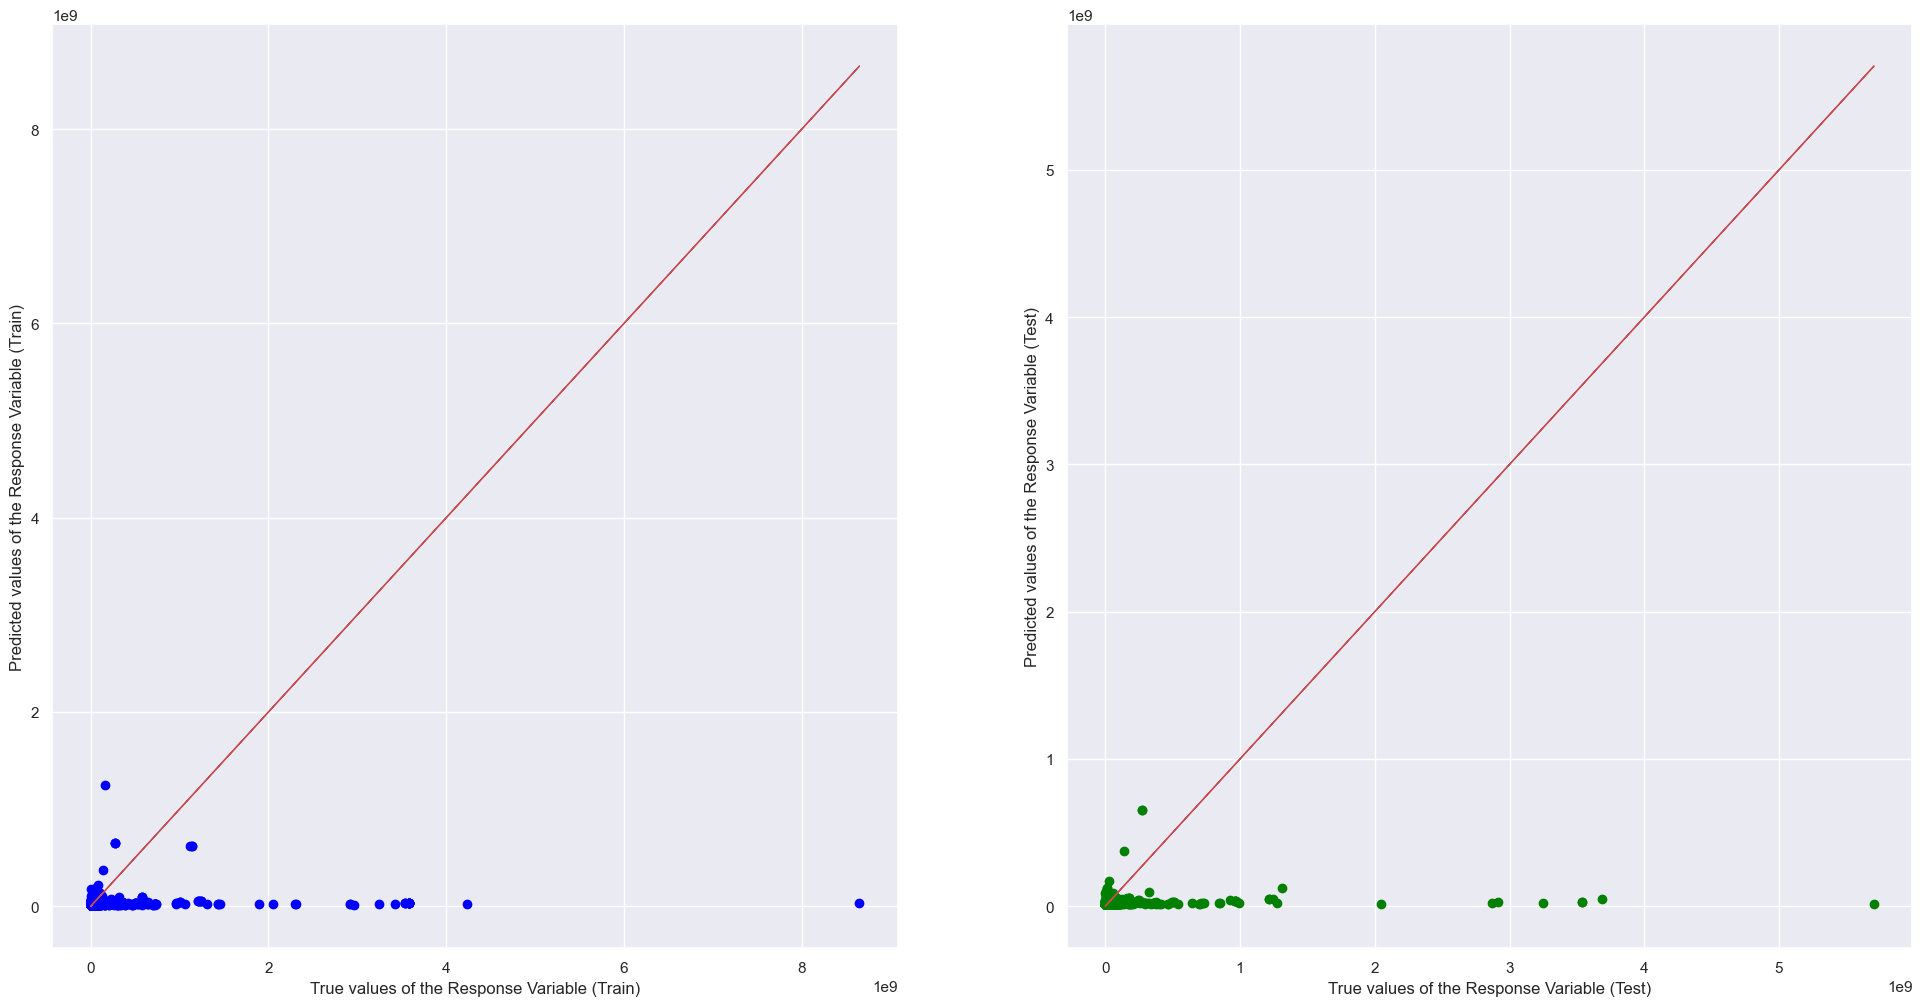

Entertainment
Elastic Net Regression
Intercept of Regression 	: b =  [76970282.65788403]
Coefficients of Regression 	: a =  [22764.5227128]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11442065348229968
Mean Squared Error (MSE) 	: 6.4379404138865e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11568884805388113
Mean Squared Error (MSE) 	: 6.301997942524389e+17



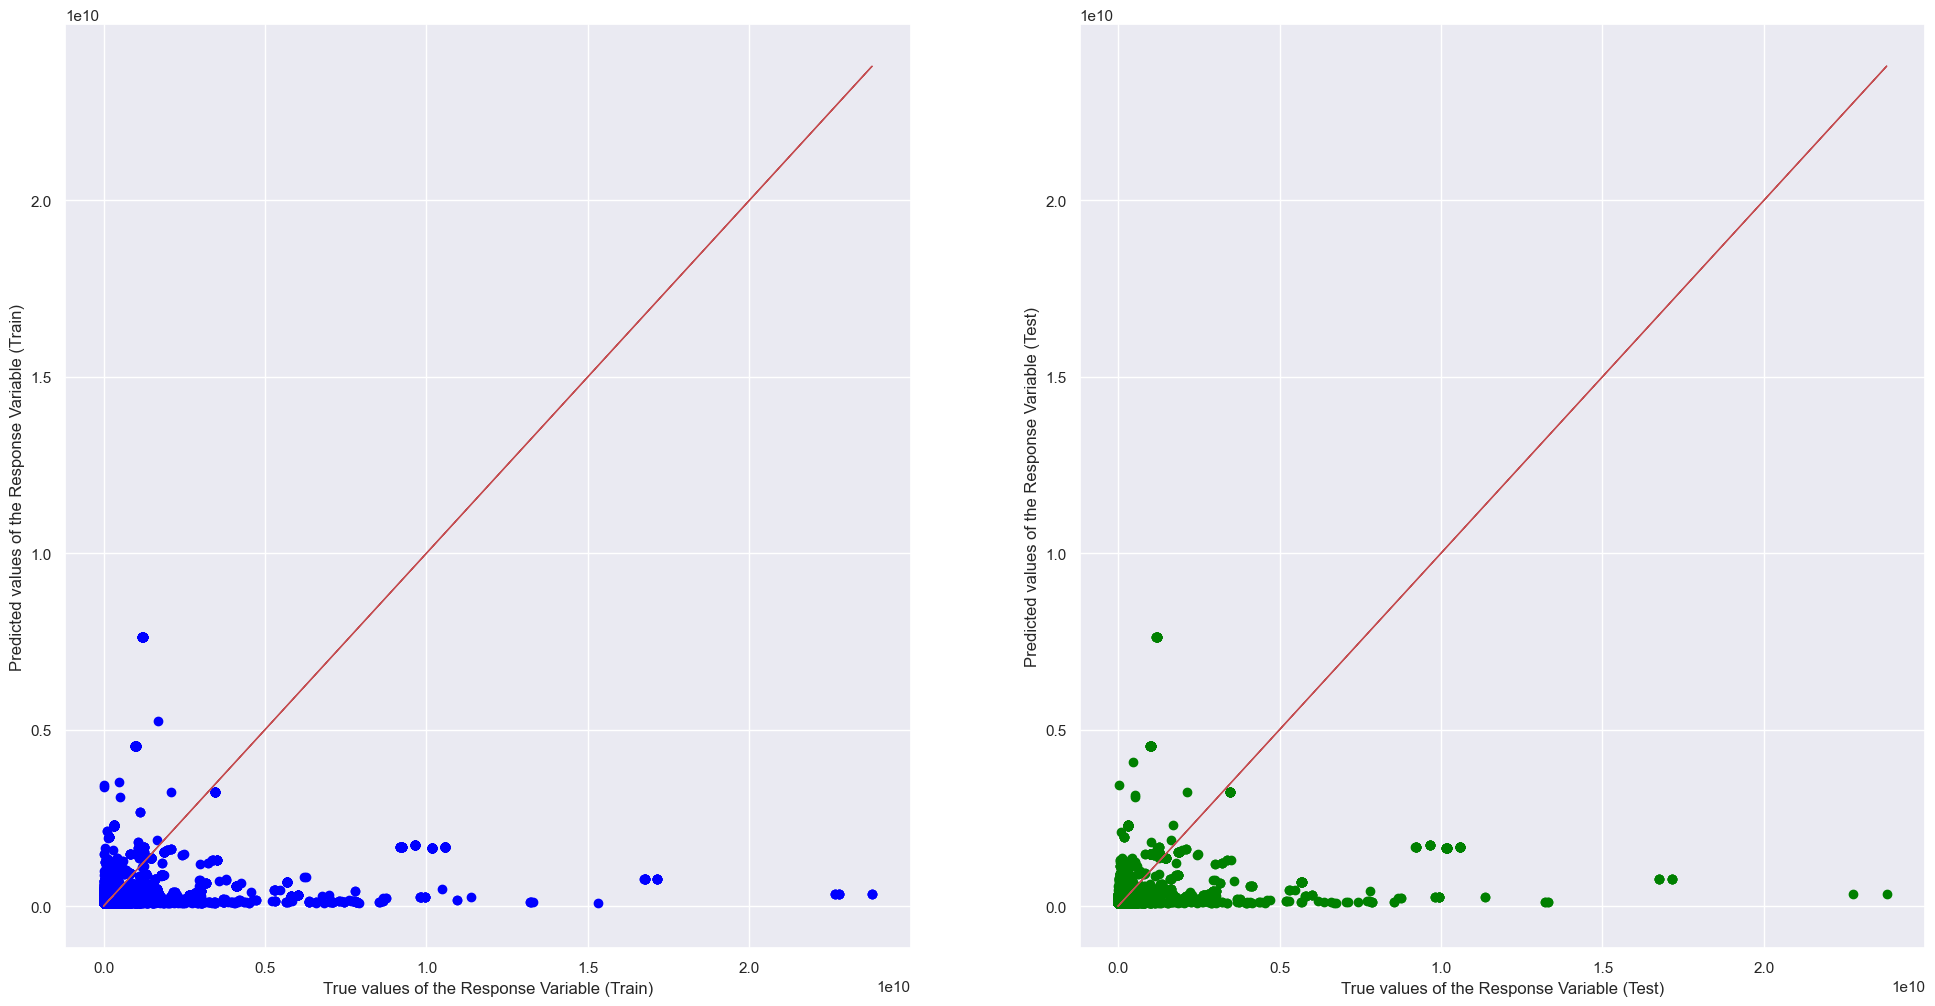

Film & Animation
Elastic Net Regression
Intercept of Regression 	: b =  [-5442268.31977466]
Coefficients of Regression 	: a =  [188404.11792999]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.46351412335070075
Mean Squared Error (MSE) 	: 2.6867514553135142e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3370271607796502
Mean Squared Error (MSE) 	: 4.226466213751411e+17



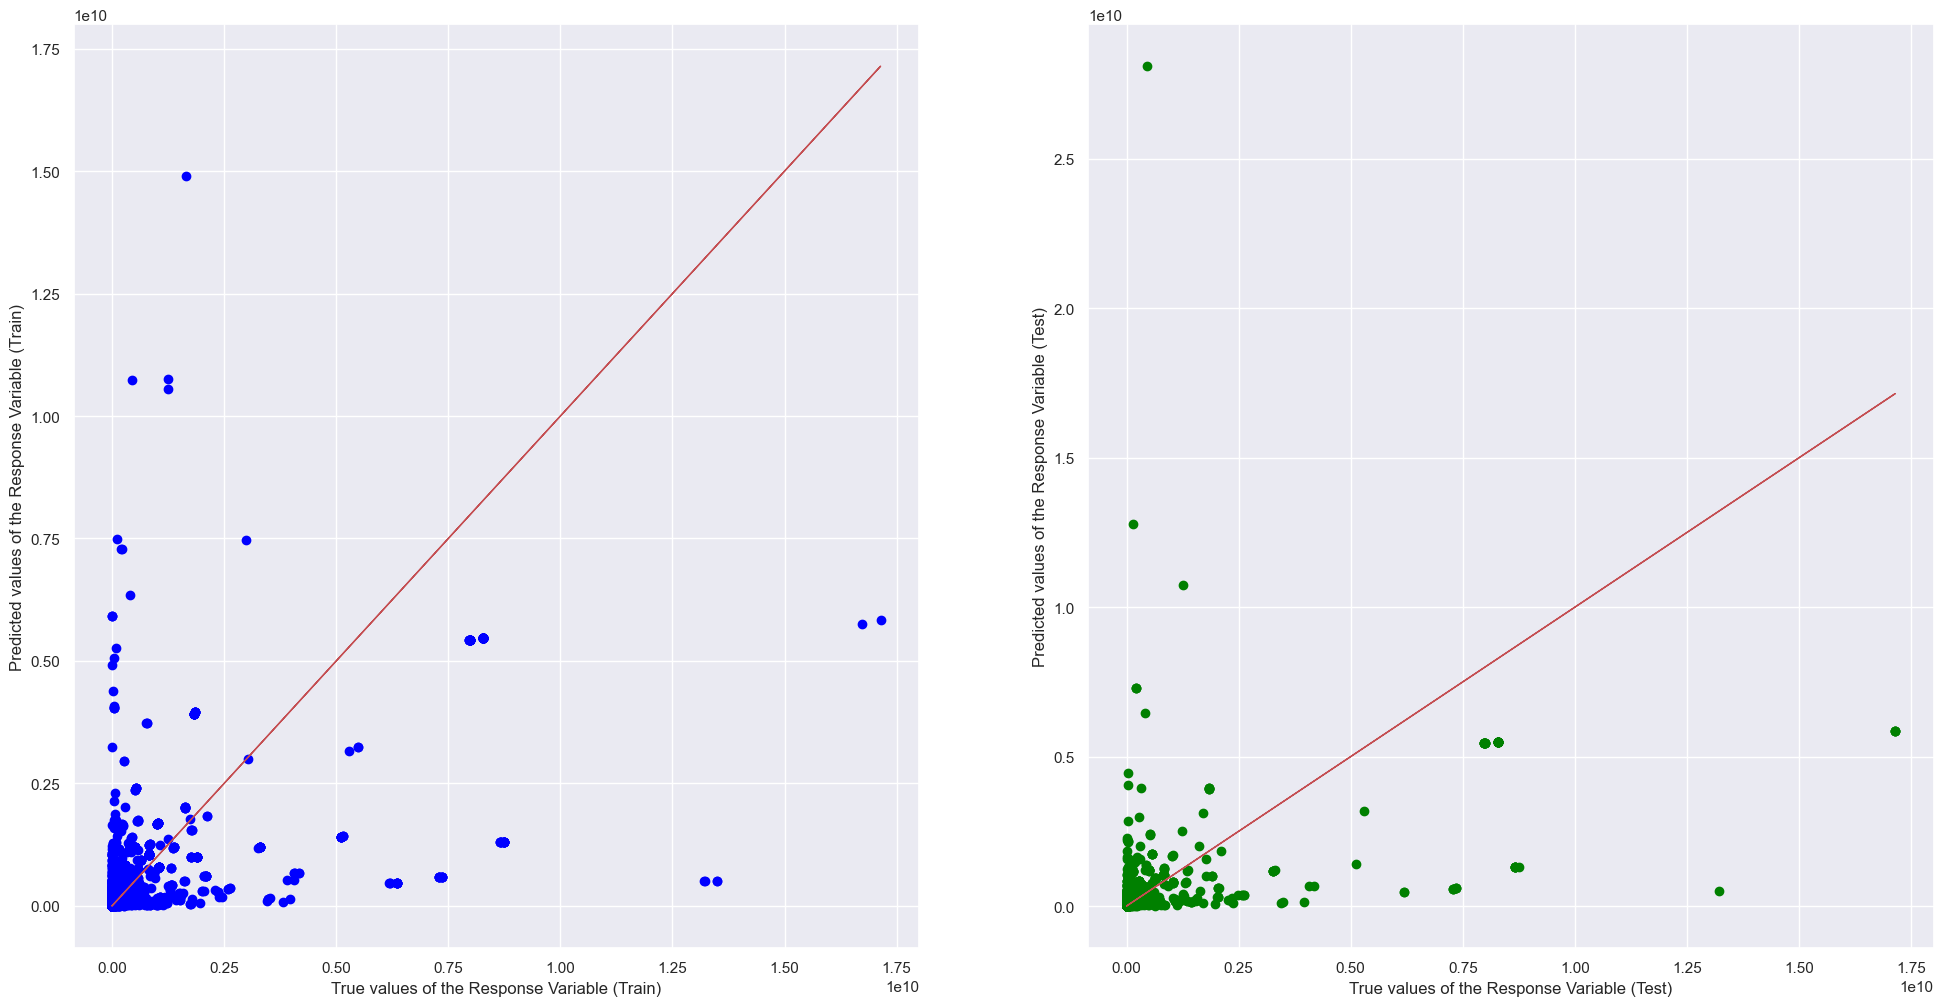

Gaming
Elastic Net Regression
Intercept of Regression 	: b =  [24847238.6546122]
Coefficients of Regression 	: a =  [21283.69777545]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09428870518648125
Mean Squared Error (MSE) 	: 5.707888232763392e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07987836001145965
Mean Squared Error (MSE) 	: 5.470953260287043e+16



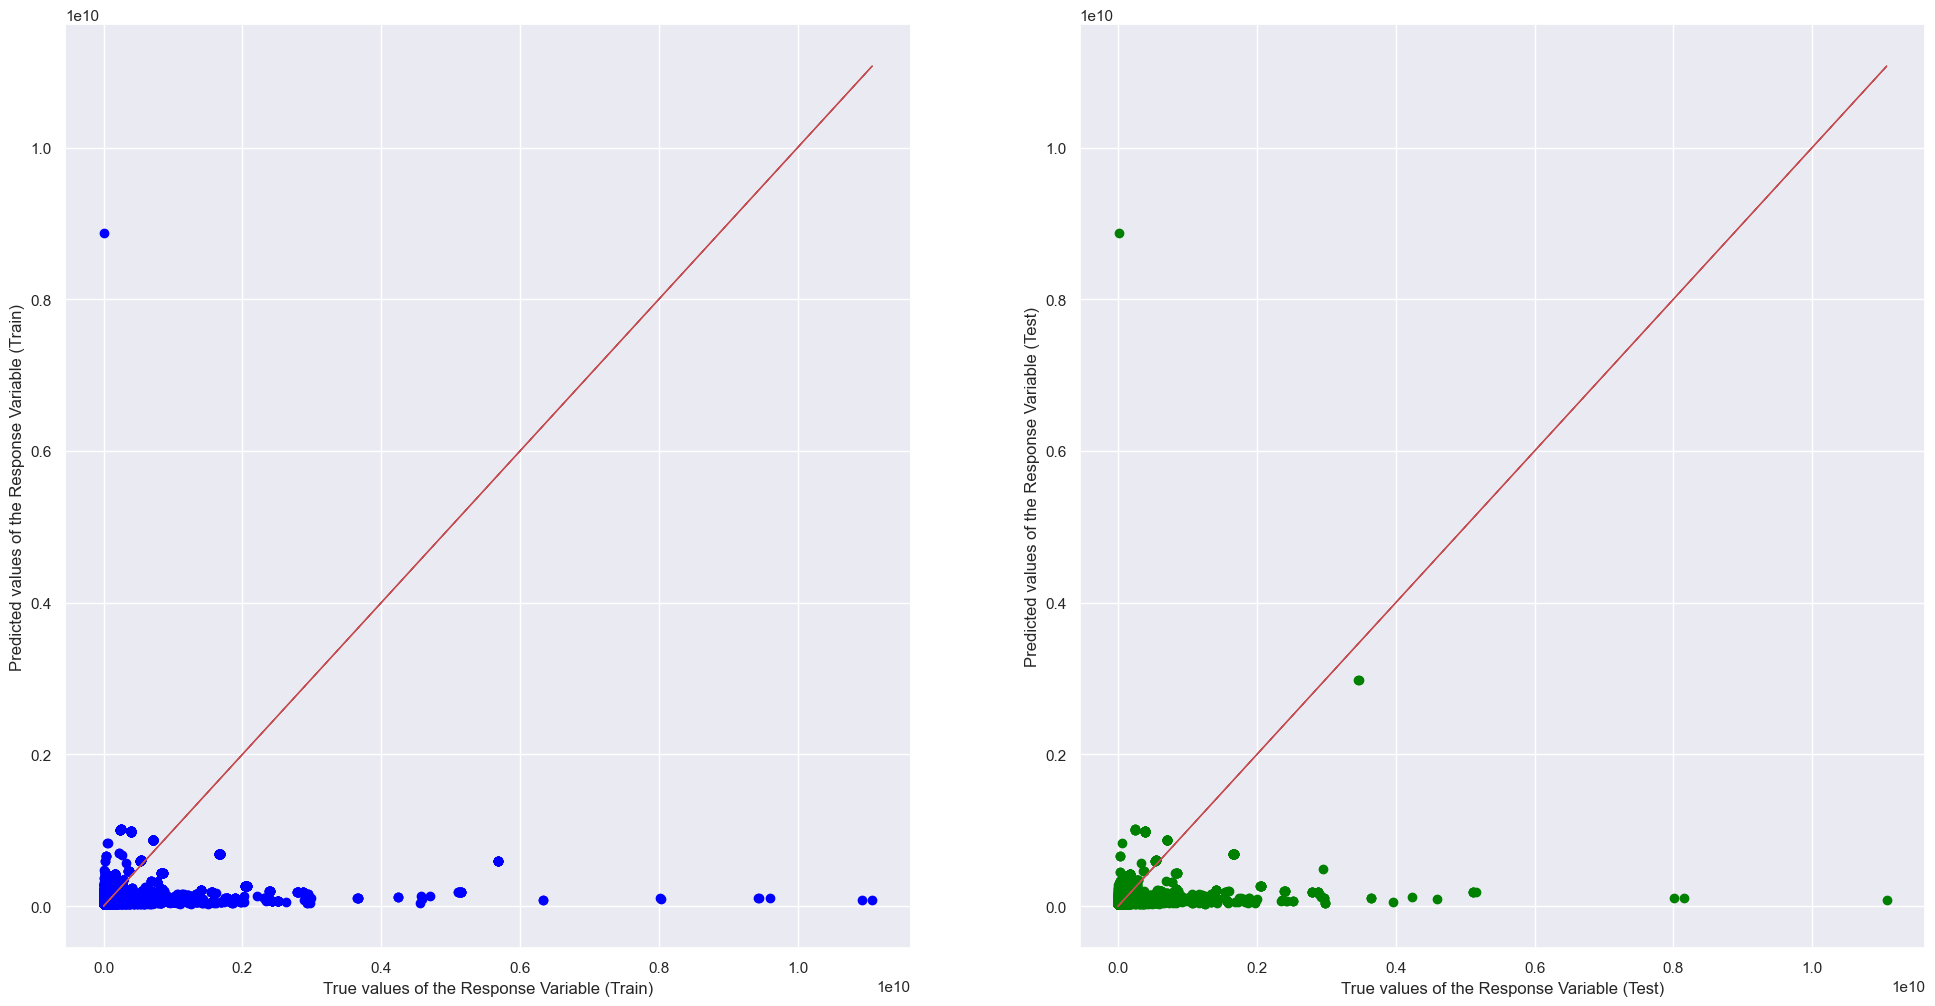

Howto & Style
Elastic Net Regression
Intercept of Regression 	: b =  [20830055.037281]
Coefficients of Regression 	: a =  [21068.79459838]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37595174394371766
Mean Squared Error (MSE) 	: 6.315087143269009e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5737957547222343
Mean Squared Error (MSE) 	: 4.066393394482616e+16



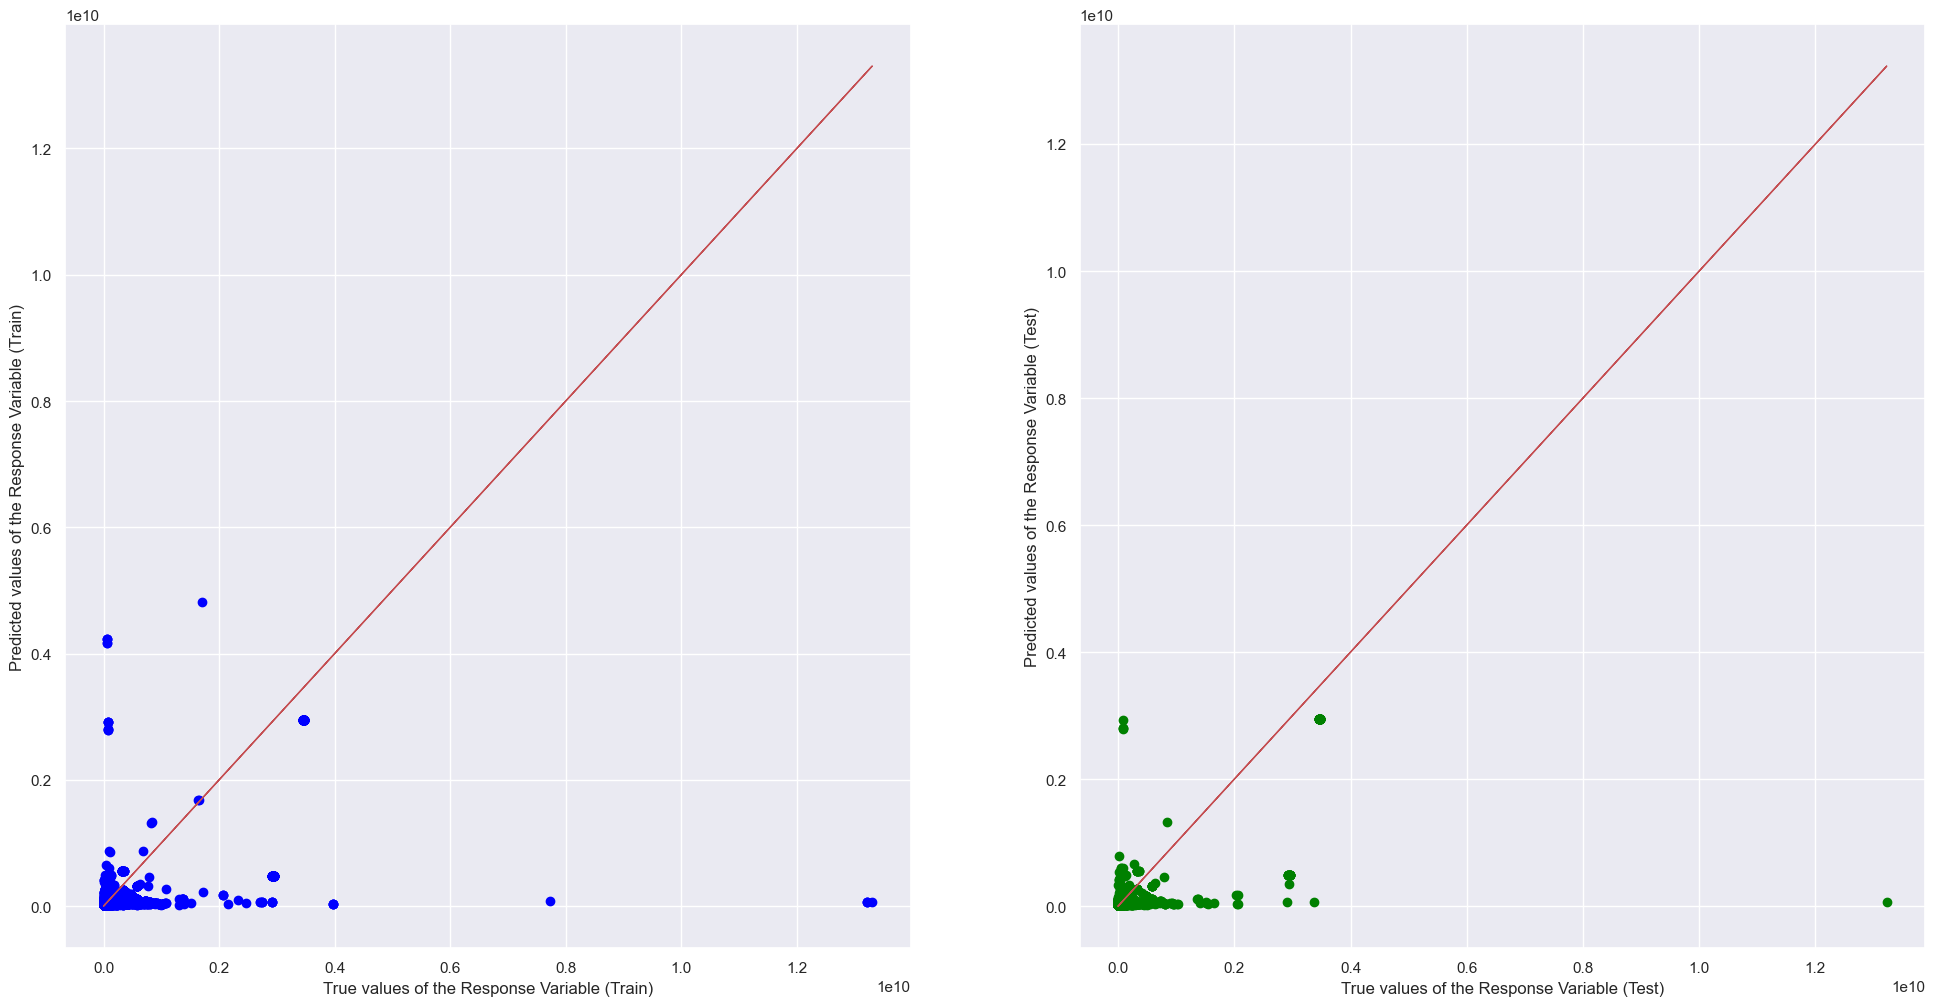

Movies
Elastic Net Regression
Intercept of Regression 	: b =  [63464585.89375623]
Coefficients of Regression 	: a =  [-45578.30582773]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9999999999998354
Mean Squared Error (MSE) 	: 4.21530945288991

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -306.56498619719906
Mean Squared Error (MSE) 	: 3152566476673580.0



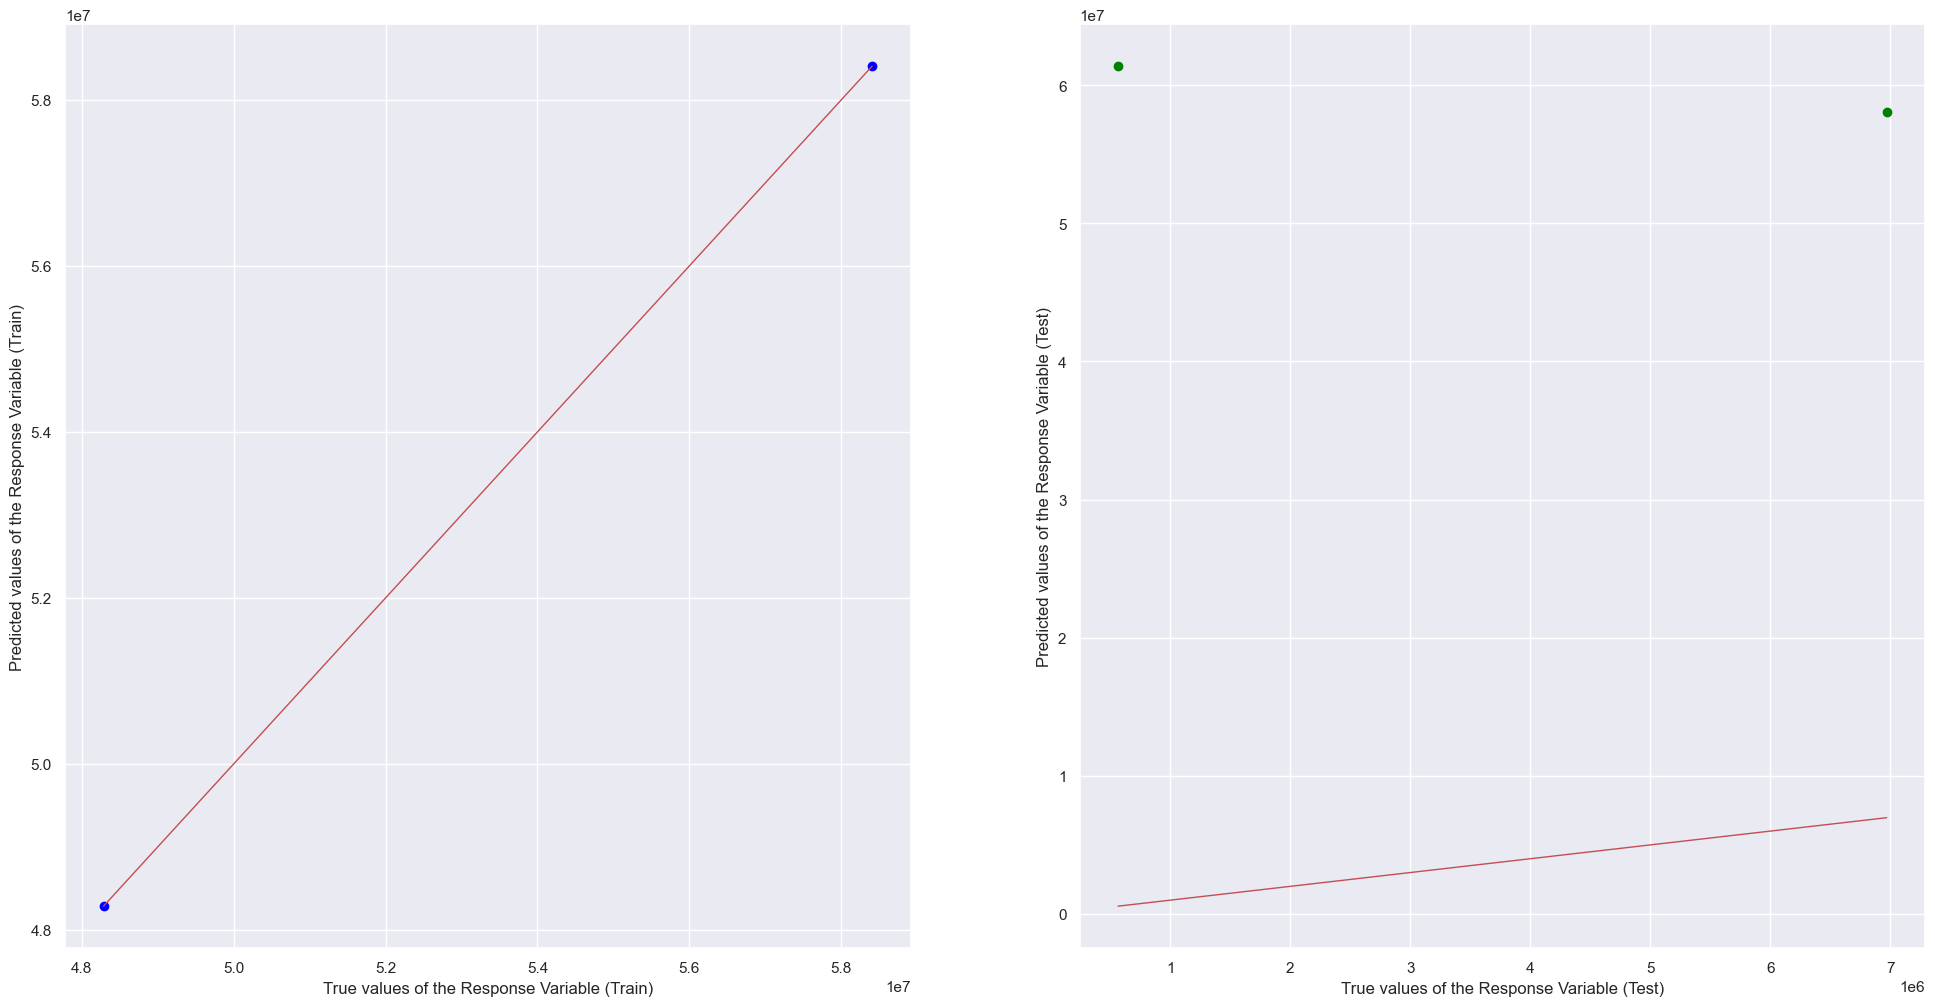

Music
Elastic Net Regression
Intercept of Regression 	: b =  [15307897.93233539]
Coefficients of Regression 	: a =  [27965.62877907]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.033722474807425185
Mean Squared Error (MSE) 	: 1.1057471137943893e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.03571398514502455
Mean Squared Error (MSE) 	: 1.5256166827774448e+17



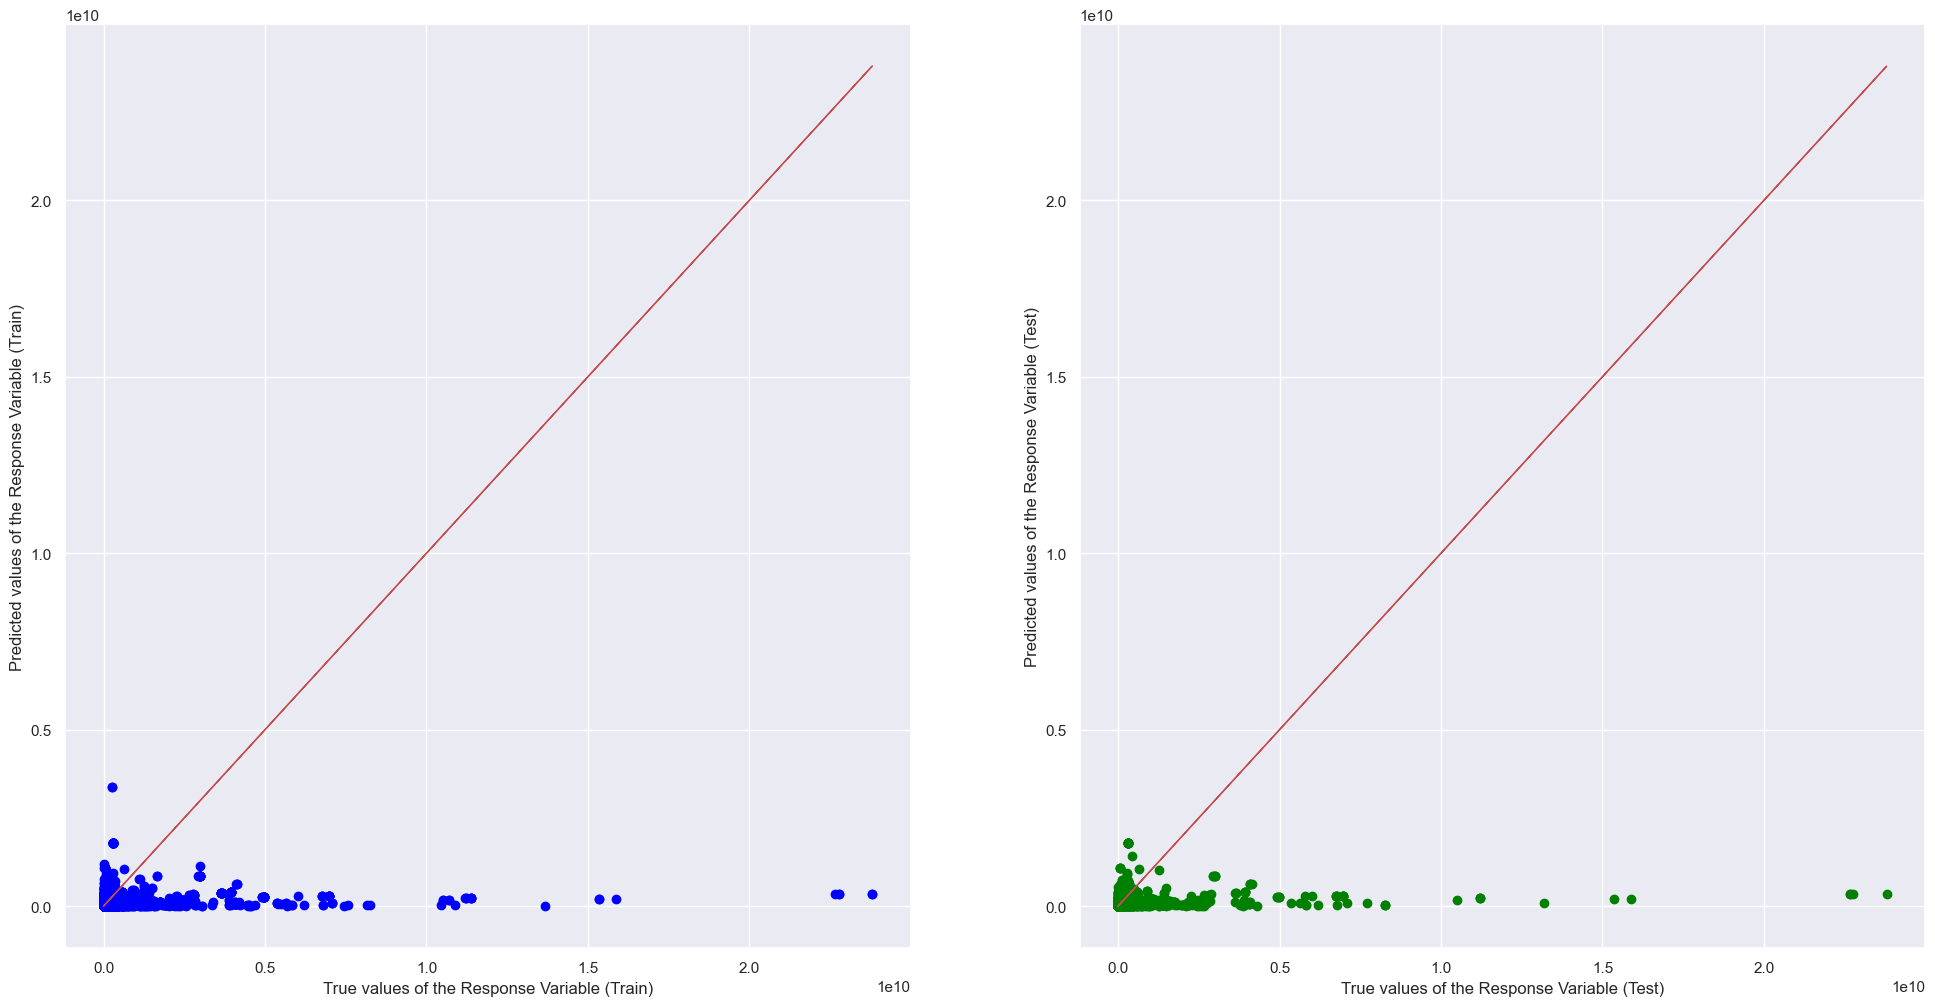

News & Politics


C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+19, tolerance: 1.509e+17
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression
Intercept of Regression 	: b =  [43530081.08851604]
Coefficients of Regression 	: a =  [6826.7379163]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.322240997172043
Mean Squared Error (MSE) 	: 1.4599217360973178e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3246514244843387
Mean Squared Error (MSE) 	: 1.5159355390710134e+17



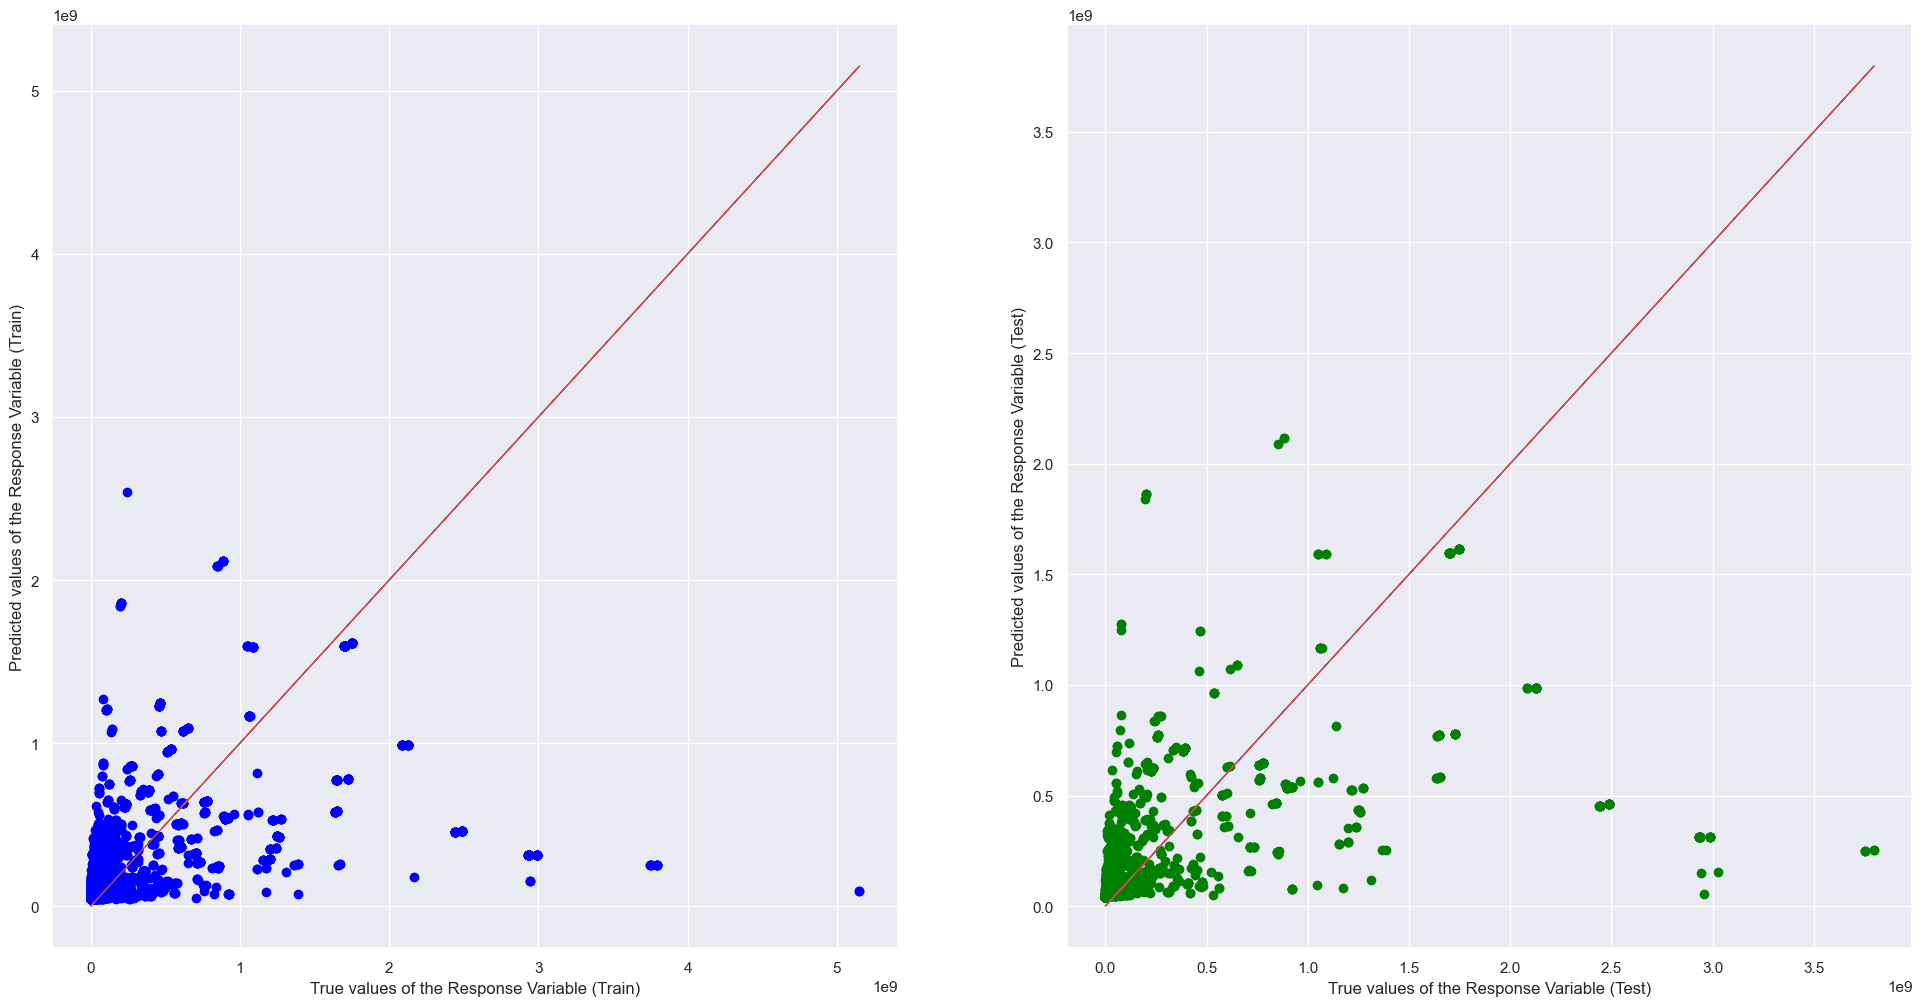

People & Blogs
Elastic Net Regression
Intercept of Regression 	: b =  [6292735.14347062]
Coefficients of Regression 	: a =  [6333.33434082]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.016175463165011172
Mean Squared Error (MSE) 	: 1.4066612525209946e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.008356516444152695
Mean Squared Error (MSE) 	: 1.6453905368319364e+16



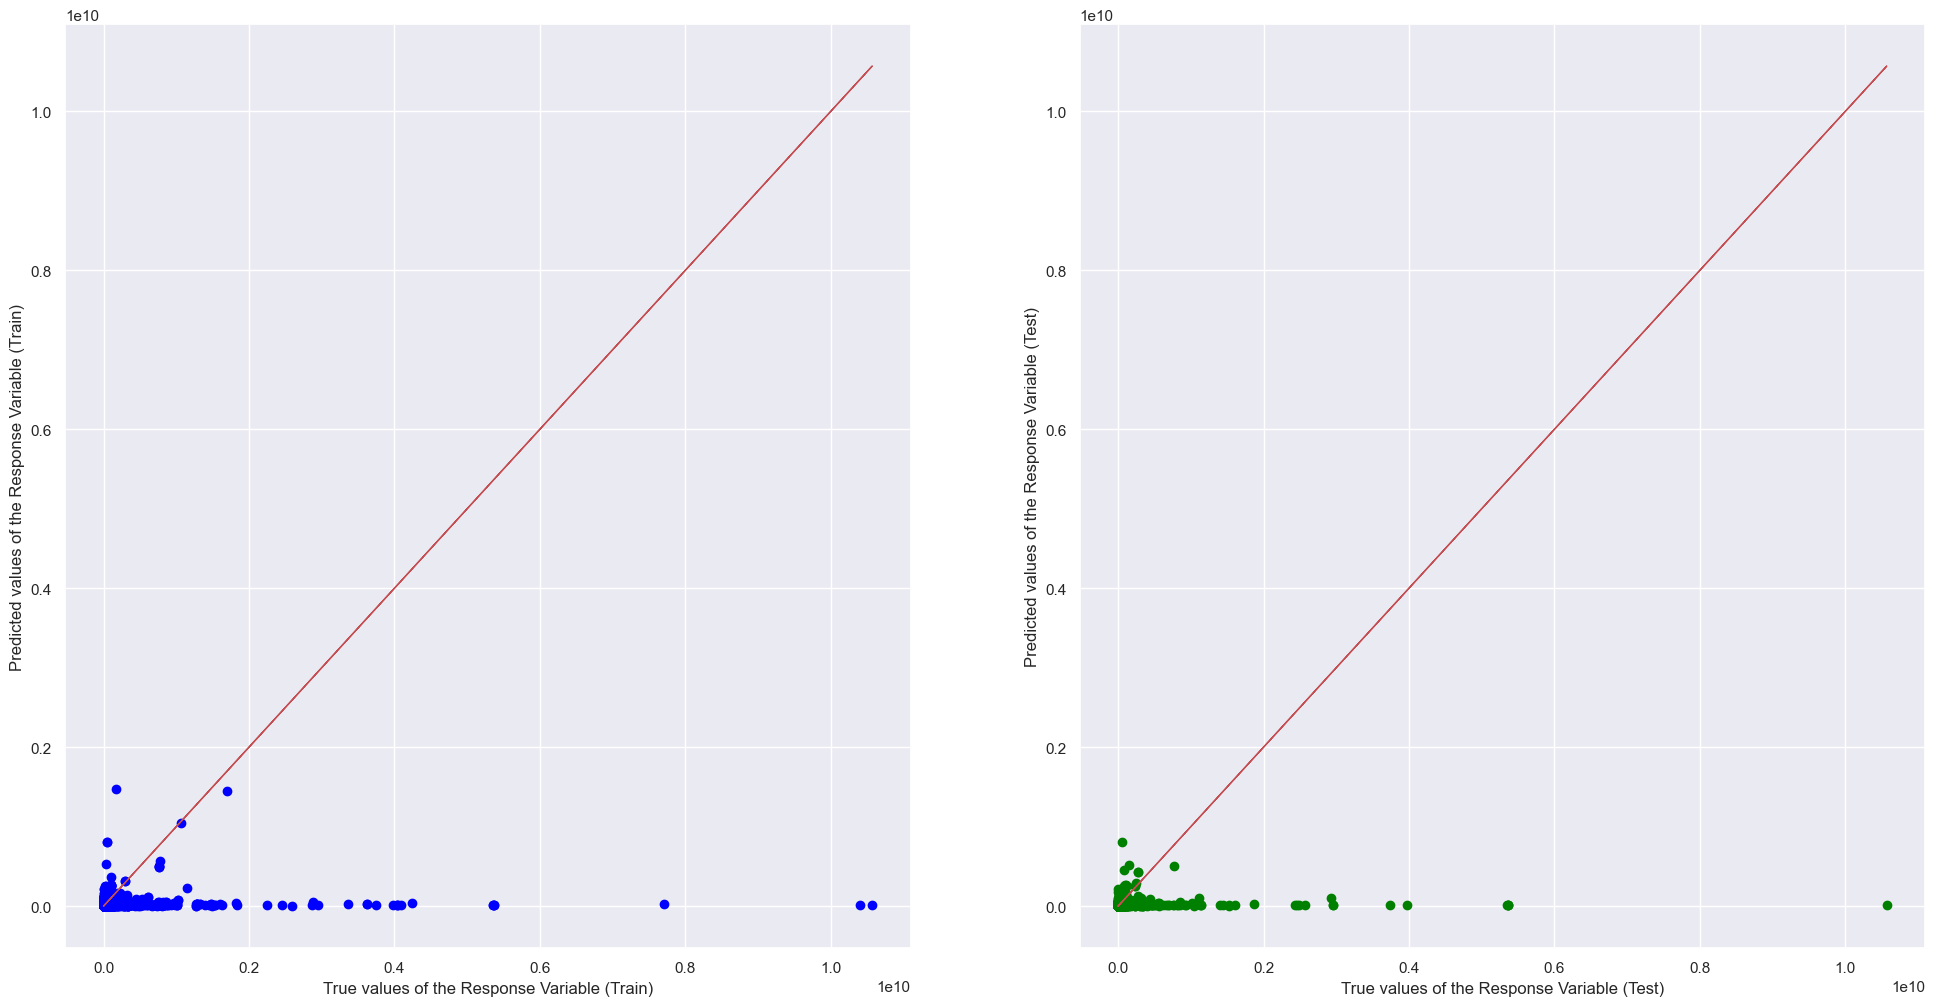

Pets & Animals
Elastic Net Regression
Intercept of Regression 	: b =  [2881377.06747749]
Coefficients of Regression 	: a =  [18326.14715084]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47317827235959775
Mean Squared Error (MSE) 	: 8841130211866081.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5418033515083014
Mean Squared Error (MSE) 	: 8542380195427905.0



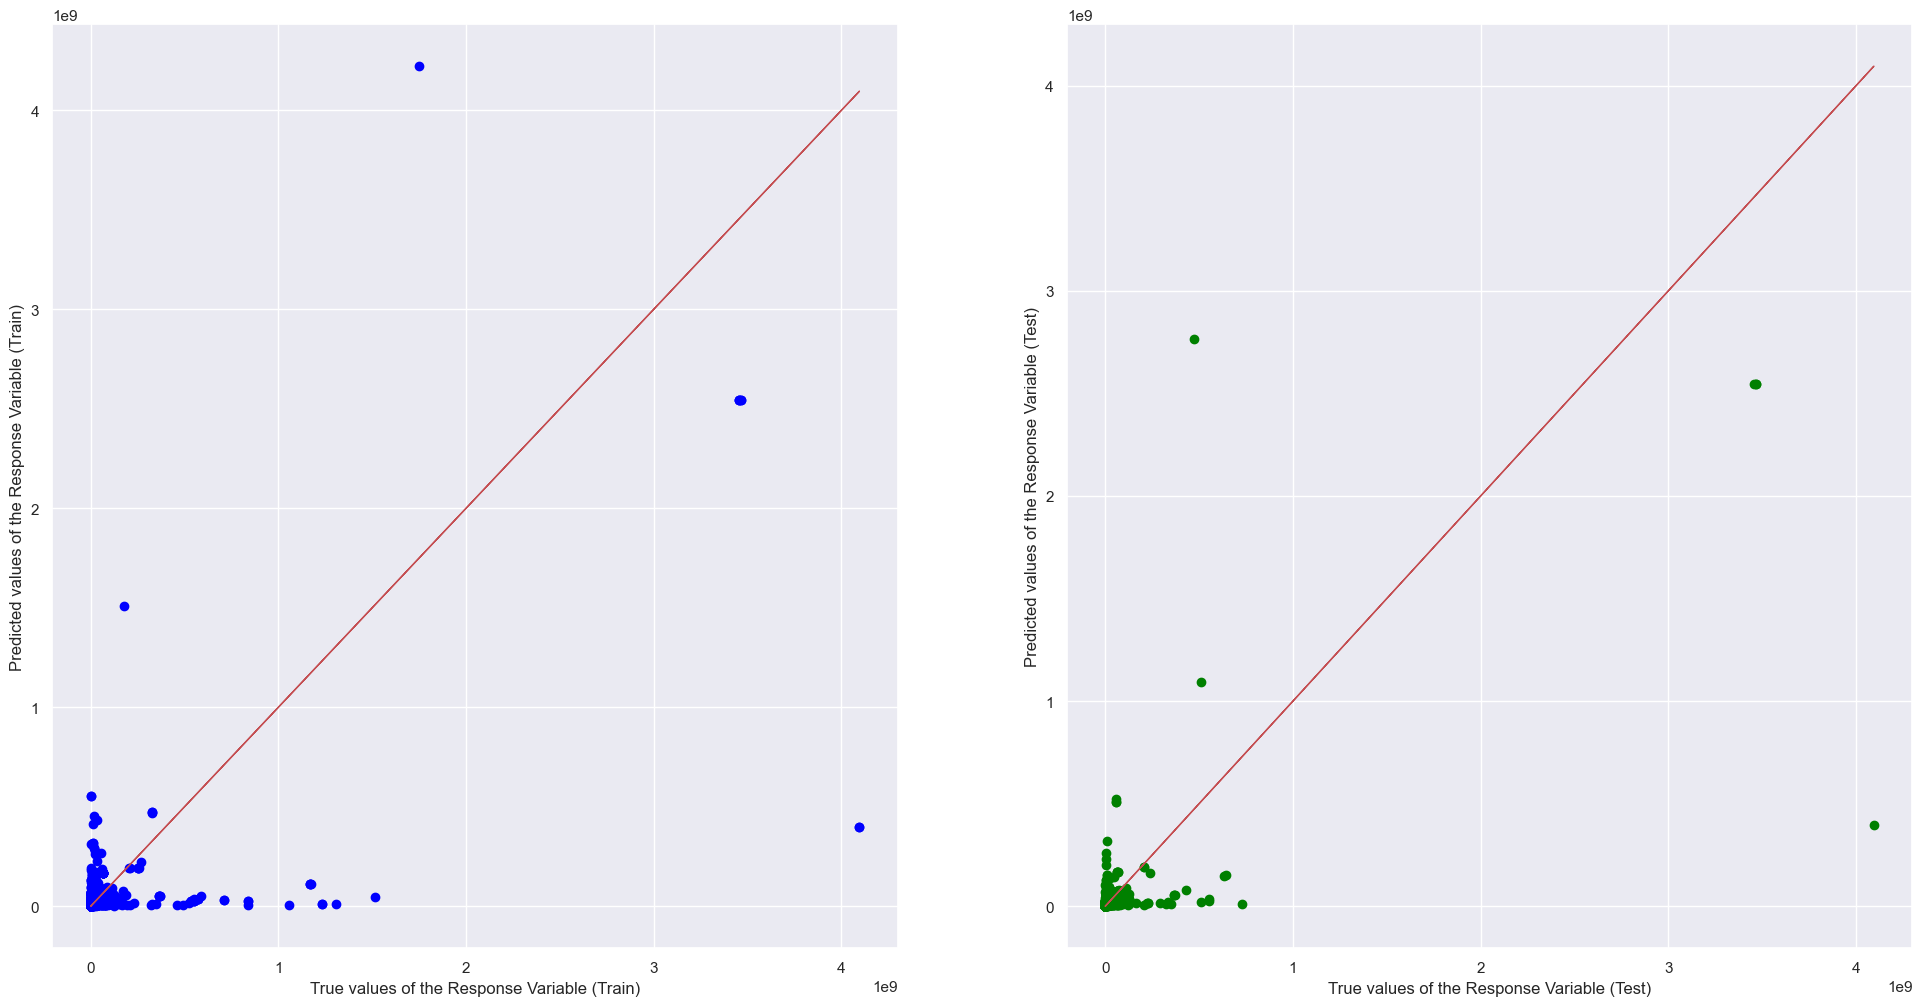

Science & Technology
Elastic Net Regression
Intercept of Regression 	: b =  [8228385.16299719]
Coefficients of Regression 	: a =  [23542.83978855]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38133572768385304
Mean Squared Error (MSE) 	: 1.3315882642342744e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4769886280880954
Mean Squared Error (MSE) 	: 9662107681661678.0



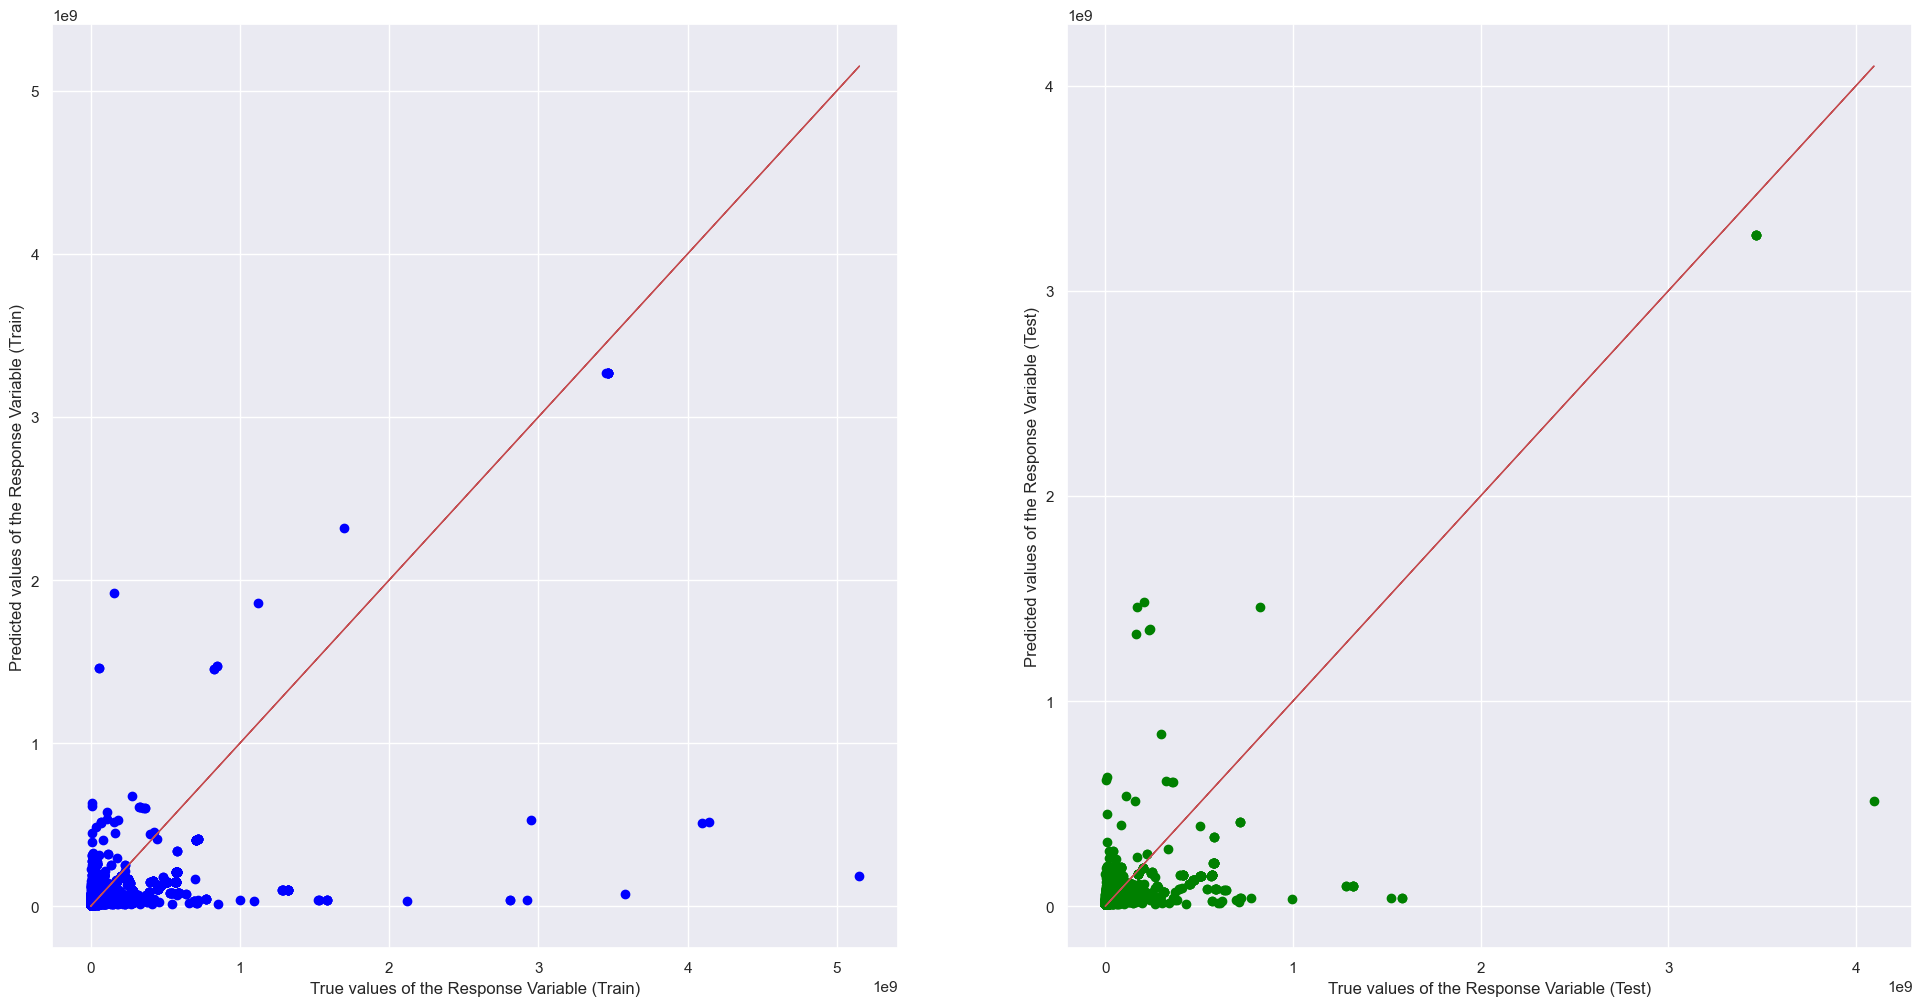

Shows
Elastic Net Regression
Intercept of Regression 	: b =  [6.01764418e+08]
Coefficients of Regression 	: a =  [42963.06486902]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.10796106528115479
Mean Squared Error (MSE) 	: 5.495274408637924e+18

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07610809761799708
Mean Squared Error (MSE) 	: 4.490939851409642e+18



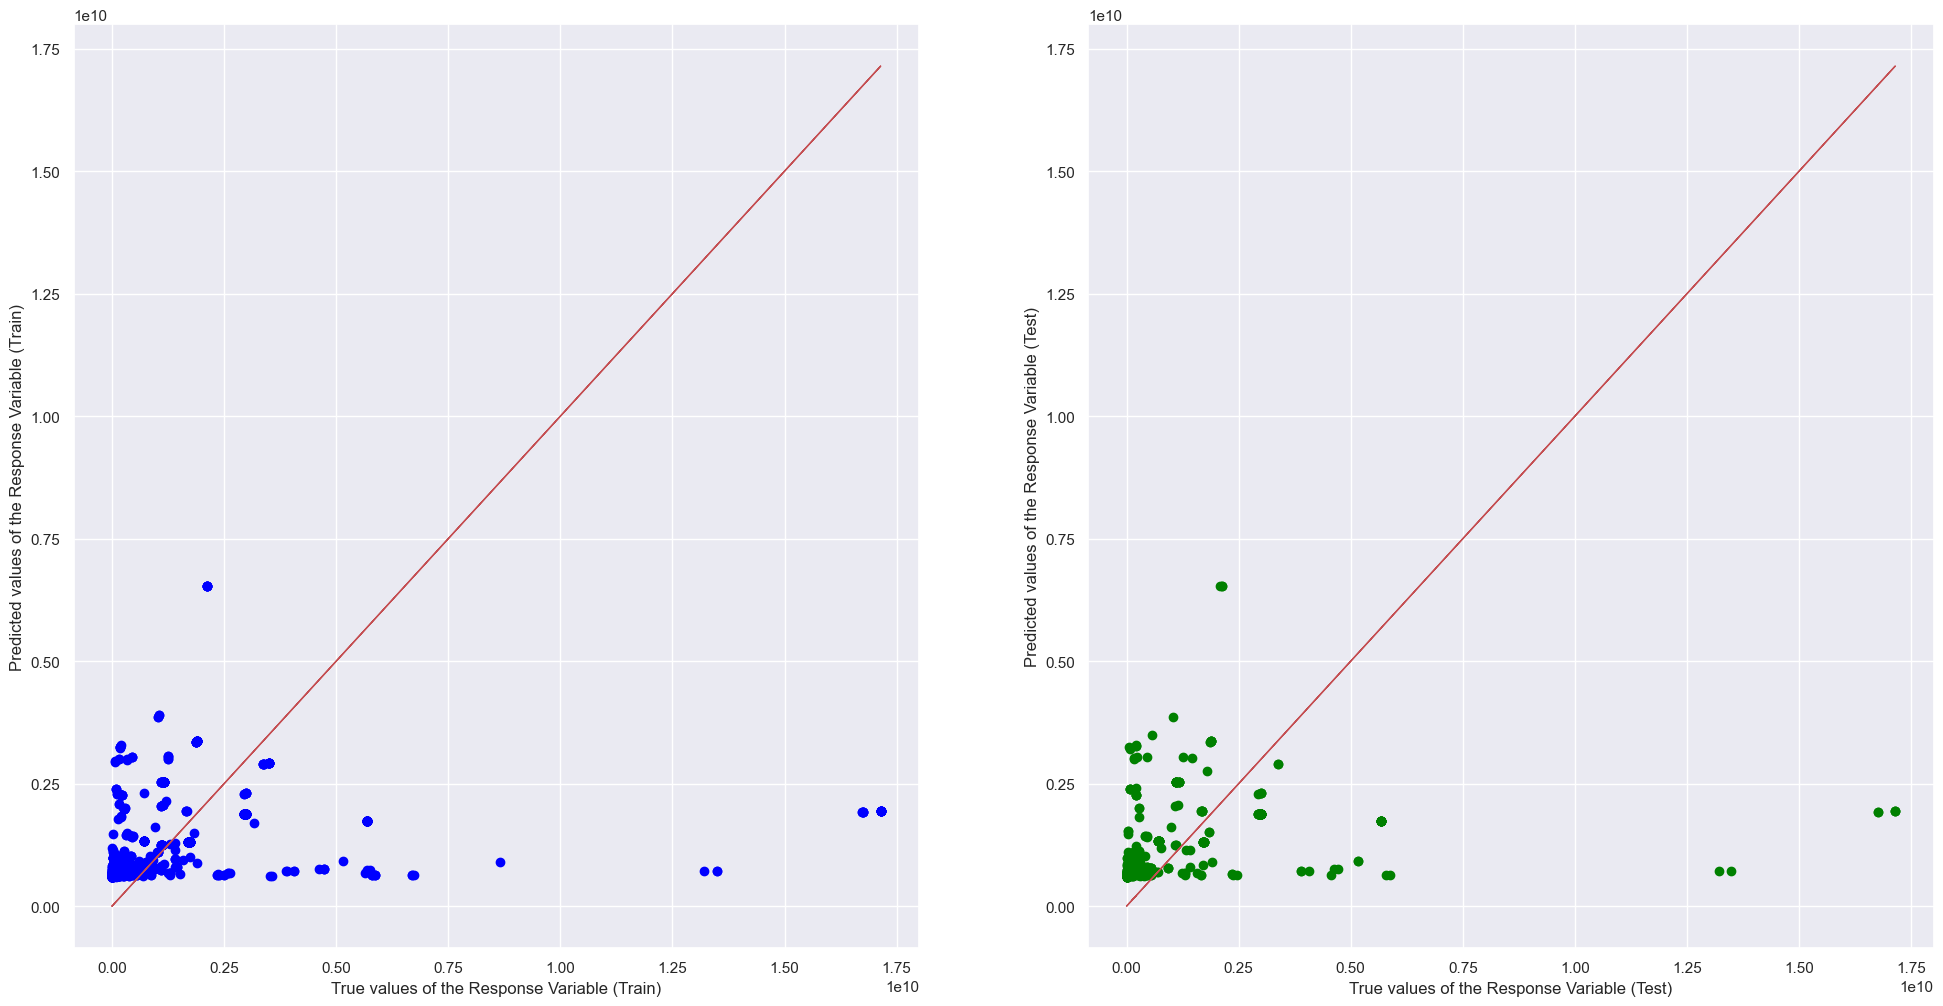

Sports


C:\Users\draco\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.362e+18, tolerance: 1.175e+18
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression
Intercept of Regression 	: b =  [7674218.58603179]
Coefficients of Regression 	: a =  [21514.43515408]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07665524763896214
Mean Squared Error (MSE) 	: 2.577104605762458e+17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07680065873346953
Mean Squared Error (MSE) 	: 1.867737080129975e+17



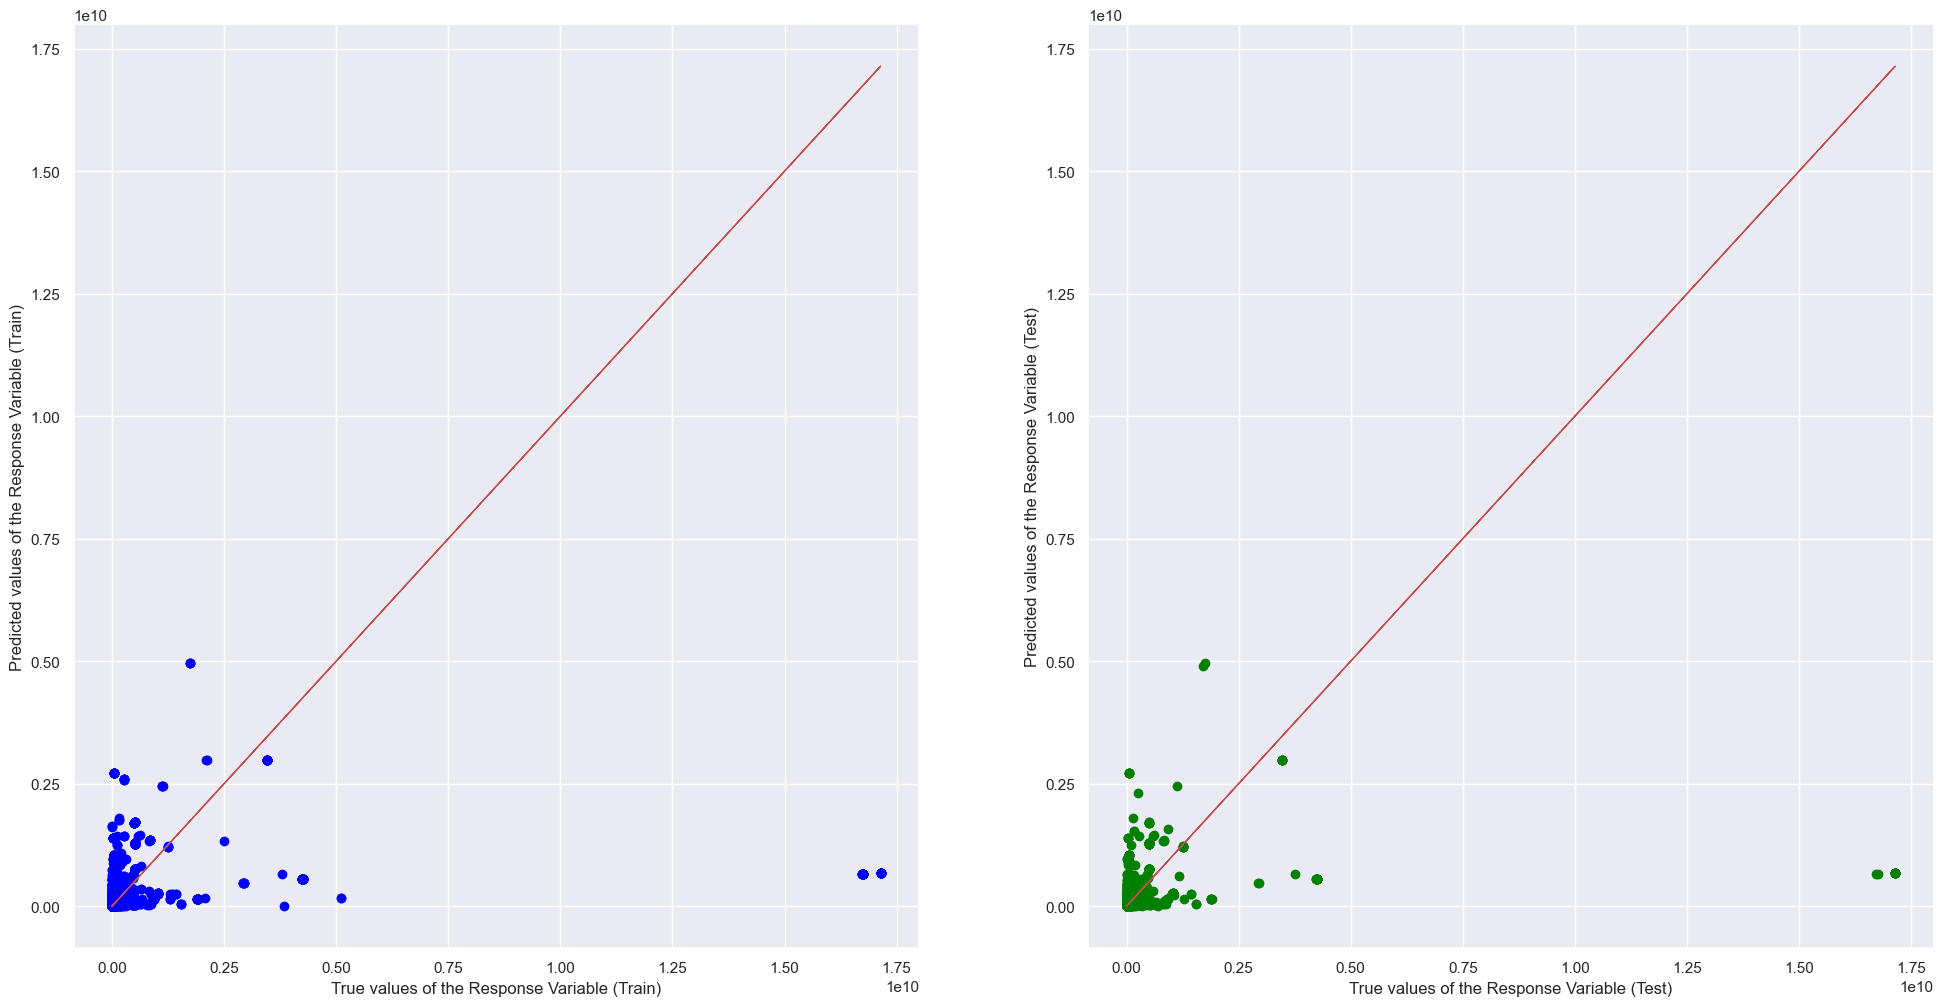

Trailers
Elastic Net Regression
Intercept of Regression 	: b =  [34450240.10016815]
Coefficients of Regression 	: a =  [14887.40157948]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09119325745974827
Mean Squared Error (MSE) 	: 1.1258396587473082e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0636549523754597
Mean Squared Error (MSE) 	: 1.7053715808376464e+17



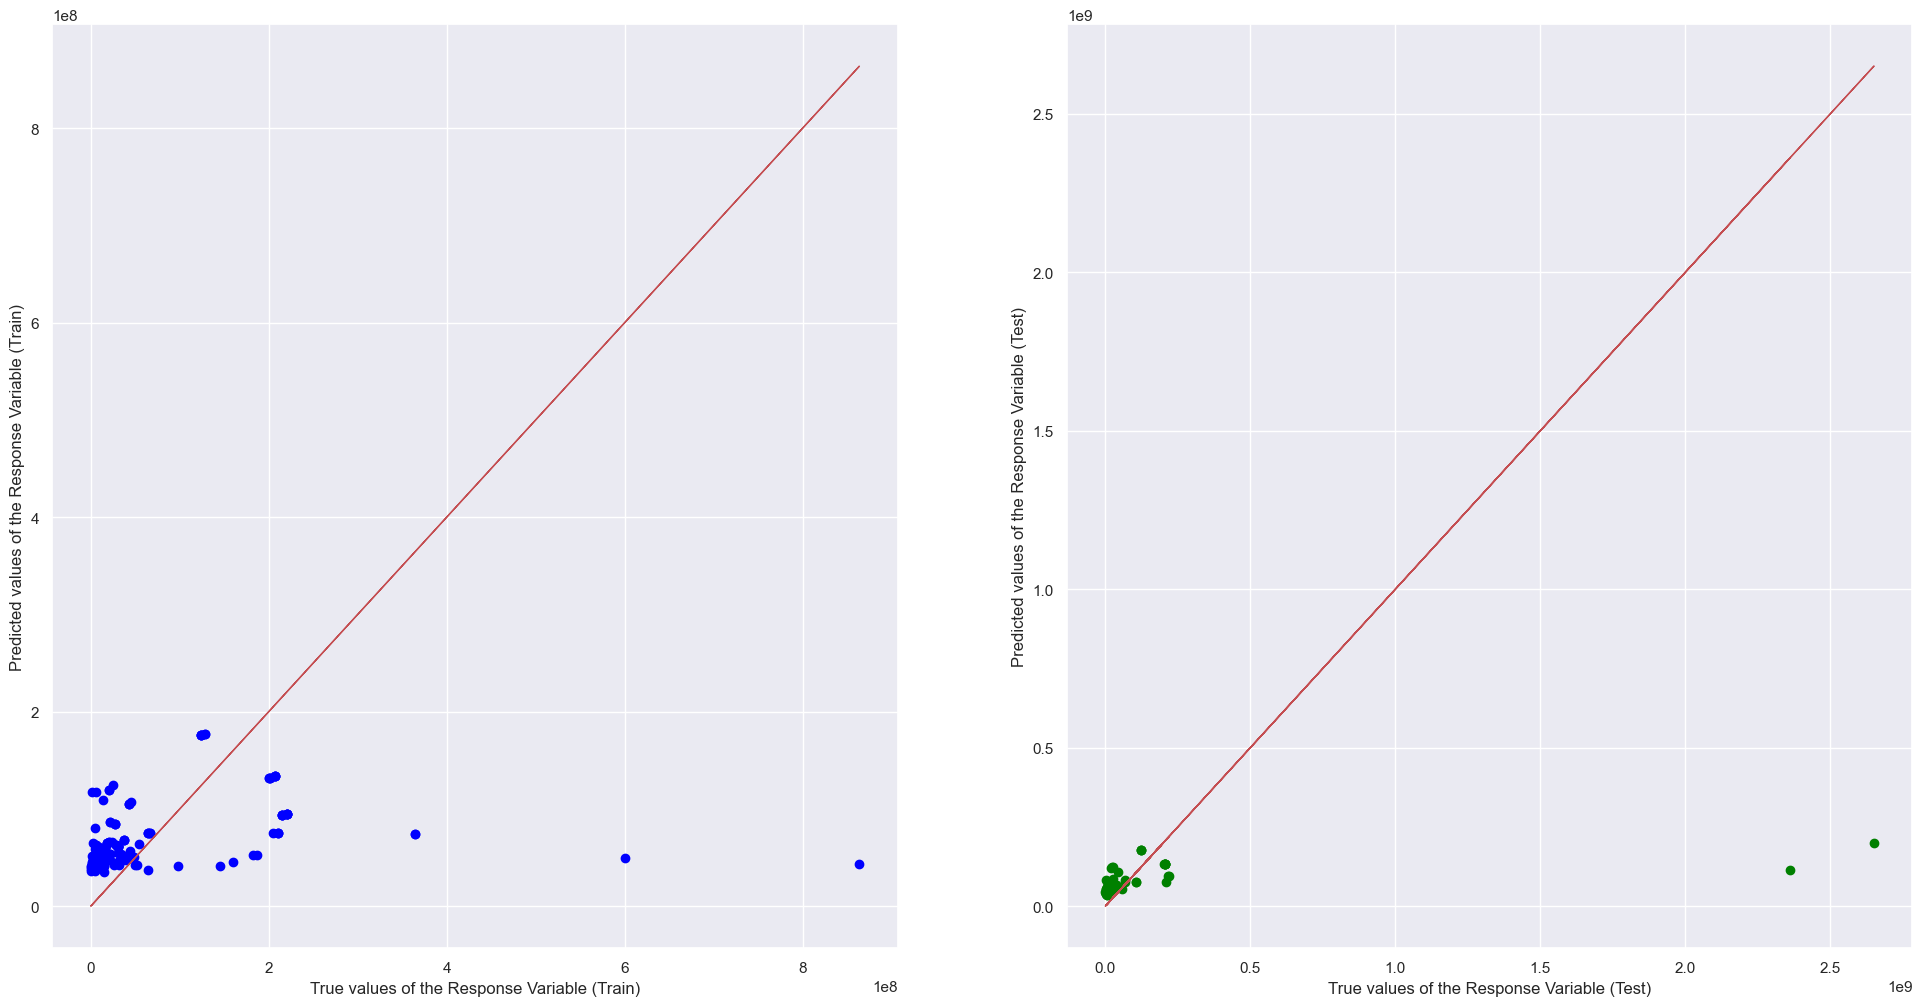

Average Train R^2: 	: 0.25180221636721845
Average Train MSE: 	: 4.524476328683946e+17
Average Test R^2: 	: -19.00405074003542
Average Test MSE: 	: 4.024233176500806e+17


In [46]:
trainr2 = []
trainmse = []
testr2 = []
testmse = []
flag=1
for i in range (0,16):
    print(Genre[i])
    predictorStr = 'videoCount'
    elasticNetRegression(Genre[i], predictorStr, flag)
    

print("Average Train R^2: \t:",Average(trainr2))
print("Average Train MSE: \t:",Average(trainmse))
print("Average Test R^2: \t:",Average(testr2))
print("Average Test MSE: \t:",Average(testmse))

## Conclusion of videocount vs ChannelViewCount

1. Linear

- Average Train R^2: 	: 0.23835104768445897
- Average Train MSE: 	: 4.337400337220276e+17
- Average Test R^2: 	: -122.39939211218918
- Average Test MSE: 	: 5.1443607037346765e+17

2. Ridge

- Average Train R^2: 	: 0.25927125681353946
- Average Train MSE: 	: 3.553104343882506e+17
- Average Test R^2: 	: -19.014856907819233
- Average Test MSE: 	: 6.302427295159613e+17

3. Lasso

- Average Train R^2: 	: 0.2588553458483371
- Average Train MSE: 	: 4.33518143672799e+17
- Average Test R^2: 	: -3.71386338808154
- Average Test MSE: 	: 4.4504422333008966e+17

4. Elastic Net

- Average Train R^2: 	: 0.2567697371629401
- Average Train MSE: 	: 3.9862948945116166e+17
- Average Test R^2: 	: -18.997841302341413
- Average Test MSE: 	: 5.269524879006414e+17